In [70]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import optuna
import sklearn
import pickle
import category_encoders

In [71]:
# Importing the dataset
cars = pd.read_csv("Car_Price_Prediction.csv")
    
# Displaying first five items of the data
cars.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [72]:
# Checking dimension of the data
cars.shape

(8128, 13)

The data contains 8,128 rows and 13 columns

In [73]:
# Checking the basic information of each column
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


From the above result we can observe that:
- There are missing values in five columns (mileage, engine, max_power, torque and seats)
- Some columns are having the wrong data type

## Data Cleaning and Manipulation

In [74]:
# Making a copy of the data for reference purpose
data = cars.copy()

# Displaying first five items of the copied data
data.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

### Dealing with duplicates

In [75]:
# Checking for duplicates
data.duplicated().sum()

1202

There are 1,202 duplicates in the dataset

In [76]:
# Displaying shape before duplicates removal
print(f"Shape before duplicates removal: {data.shape}")

# Removing duplicates
data.drop_duplicates(inplace = True)

# Displaying shape after duplicates removal
print(f"\nShape after duplicates removal: {data.shape}")

Shape before duplicates removal: (8128, 13)

Shape after duplicates removal: (6926, 13)


The rows of the data have been reduced from 8,128 to 6,926 after duplicates have been removed.  

### Formatting columns

In [77]:
# Displaying first 15 unique values of each columns
for col in data.columns:
    # Displaying a heading
    print(f"\nUnique values of {col}")
    # Displaying first 15 unique values
    print(f"{data[col].unique()[:15]}")
    # Displaying a demacator
    print("=========================================================================")


Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' 'Hyundai i20 Sportz Diesel'
 'Maruti Swift VXI BSIII' 'Hyundai Xcent 1.2 VTVT E Plus'
 'Maruti Wagon R LXI DUO BSIII' 'Maruti 800 DX BSII' 'Toyota Etios VXD'
 'Ford Figo Diesel Celebration Edition' 'Renault Duster 110PS Diesel RxL'
 'Maruti Zen LX' 'Maruti Swift Dzire VDi' 'Maruti Swift 1.3 VXi'
 'Maruti Wagon R LXI Minor']

Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018]

Unique values of selling_price
[450000 370000 158000 225000 130000 440000  96000  45000 350000 200000
 500000  92000 280000 180000 400000]

Unique values of km_driven
[145500 120000 140000 127000  45000 175000   5000  90000 169000  68000
 100000  80000  40000  70000  53000]

Unique values of fuel
['Diesel' 'Petrol' 'LPG' 'CNG']

Unique values of seller_type
['Individual' 'Dealer' 'Trustmark Dealer']

Unique values of transmission
['Manual' 'Automatic']

Unique

From the above we see that the reasons why the mileage, engine, max_power and torque columns aren't in their proper datatype format is because of their units. 

Before dealing with missing values, we'll first clean up these columns. 

#### Exploring mileage column

In [78]:
data["mileage"].unique()[:15]

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl'], dtype=object)

From the above we see that the mileage is expressed both in kmpl and km/kg. 

We'll convert values expressed in km/kg to kmpl. The formula is:

`kmpl = km/kg * (density of fuel in kg/L)`

**Approximate Densities of Fuel**
- Petrol (0.75 kg/L)
- Diesel (0.83 kg/L)
- LPG (0.51 kg/L)
- CNG (0.00065 kg/L)

In [79]:
data["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [80]:
def clean_mileage(row):
    fuel_type = row["fuel"]
    mileage = row["mileage"]
    
    # Checking and dealing missing values
    if pd.isna(mileage):
        return np.nan
    
    # Checking if mileage is already in kmpl
    if "kmpl" in mileage.lower():
        # Extacting only the number from it
        mileage = float(mileage.lower().replace(" kmpl", ""))
        return mileage
    
    # Defining the conversion factors based on the fuel type (approximate values in km/L)
    conversion_factors = {
        "Petrol": 0.75,
        "Diesel": 0.83,
        "CNG": 0.00065,
        "LPG": 0.51
    }
    
    # Checking if mileage in km/kg
    if "km/kg" in mileage.lower():
        # Applying the conversion factors
        if fuel_type in conversion_factors.keys():
            mileage = float(mileage.lower().replace(" km/kg", "")) * conversion_factors[fuel_type]
            return mileage

In [81]:
# Applying function to the mileage column
data["mileage"] = data.apply(clean_mileage, axis = 1)

# Displaying first 15 unique values and datatype
print(f"The first 15 unique values of the mileage column:\n{data['mileage'].unique()[:15]}")
print(f"\nThe datatype of the column: {data['mileage'].dtype}")

The first 15 unique values of the mileage column:
[23.4   21.14  17.7   23.    16.1   20.14   8.823 23.59  20.    19.01
 17.3   19.3      nan 18.9   18.15 ]

The datatype of the column: float64


In [82]:
# Renaming mileage column
data.rename(columns = {
    "mileage":"mileage(kmpl)"
}, inplace = True)

# Displaying first two items of the data
data.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner  mileage(kmpl)   engine   max_power  \
0  Individual       Manual   First Owner          23.40  1248 CC      74 bhp   
1  Individual       Manual  Second Owner          21.14  1498 CC  103.52 bhp   

                torque  seats  
0       190Nm@ 2000rpm    5.0  
1  250Nm@ 1500-2500rpm    5.0

The mileage column has been successfully formatted. 

#### Exploring engine column

In [83]:
data["engine"].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

From the above we see that the engine is in CC. We'll remove the CC and convert the values to float

In [84]:
# Cleaing engine column
data["engine"] = data["engine"].apply(lambda x: np.nan if pd.isna(x) else float(x.lower().replace(" cc", "")))

# Displaying first 15 unique values and datatype
print(f"The first 15 unique values of the engine column:\n{data['engine'].unique()[:15]}")
print(f"\nThe datatype of the column: {data['engine'].dtype}")

The first 15 unique values of the engine column:
[1248. 1498. 1497. 1396. 1298. 1197. 1061.  796. 1364. 1399. 1461.  993.
   nan 1198. 1199.]

The datatype of the column: float64


In [85]:
# Renaming the engine column
data.rename(columns = {
   "engine":"engine(CC)" 
}, inplace = True)

# Displaying first two items
data.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
0  Individual       Manual   First Owner          23.40      1248.0   
1  Individual       Manual  Second Owner          21.14      1498.0   

    max_power               torque  seats  
0      74 bhp       190Nm@ 2000rpm    5.0  
1  103.52 bhp  250Nm@ 1500-2500rpm    5.0

The engine column has been successfully formatted.

#### Exploring the max_power column

In [86]:
data["max_power"].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

The max_power are expressed  in bhp. But from the unique values above we notice the following:
- "167.67 bhp" instances of number and the unit
- nan instances of missing values
- " bhp" instances of only unit
- "0" instances of only number without the unit

In [87]:
# Cleaning the max_power column
def clean_max_power(value):
    # Dealing with nan values
    if pd.isna(value):
        return np.nan
    
    # Dealing with cases with numbers without bhp
    if "bhp" not in value:
        return float(value)
    
    # Dealing with cases with only bhp
    if value.rstrip("bhp").replace(" ", "") == "":
        return np.nan
    
    # Dealing with cases with bhp and numbers
    if value.rstrip("bhp").replace(" ", "") != "":
        value_clean = float(value.rstrip("bhp").replace(" ", ""))
        return value_clean

In [88]:
# Applying function to the max_power column
data["max_power"] = data["max_power"].apply(clean_max_power)

# Displaying first 15 unique values and datatype
print(f"The first 15 unique values of the max_power column:\n{data['max_power'].unique()[:15]}")
print(f"\nThe datatype of the column: {data['max_power'].dtype}")

The first 15 unique values of the max_power column:
[ 74.   103.52  78.    90.    88.2   81.86  57.5   37.    67.1   68.1
 108.45  60.    73.9     nan  67.  ]

The datatype of the column: float64


In [89]:
# Renaming the max_power column
data.rename(columns = {
    "max_power":"max_power(bhp)"
}, inplace = True)

# Displaying the first two items of the data
data.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
0  Individual       Manual   First Owner          23.40      1248.0   
1  Individual       Manual  Second Owner          21.14      1498.0   

   max_power(bhp)               torque  seats  
0           74.00       190Nm@ 2000rpm    5.0  
1          103.52  250Nm@ 1500-2500rpm    5.0

The max_power column has been sucessfully formatted. 

#### Exploring the torque column

In [90]:
data["torque"].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [91]:
# Cleaning torque by extracting torque and rpm
def extract_torque_rpm(value):
    # Dealing with null values
    if pd.isna(value):
        return np.nan, np.nan
    
    # Extracting the numbers
    numbers = re.findall(r'[\d\.,]+', value)
    
    # Removing commas from numbers and converting to float
    numbers = [float(num.replace(",", "")) for num in numbers]
    
    # Dealing with instances with kgm
    if "kgm" in value.lower():
        conversion_factor = 9.80665
        # Extracting torque
        torque_value = round(numbers[0] * conversion_factor, 2)
    else:
        torque_value = round(numbers[0], 2)
        
    # Extracting rpm
    if "at" in value.lower() or "-" in value.lower():
        rpm_value = round((numbers[-2] + numbers[-1]) / 2, 2)
    else:
        rpm_value = round(numbers[-1], 2)
    
    return torque_value, rpm_value

In [92]:
# Applying function to torque column
data[["torque(Nm)", "rpm"]] = data.apply(lambda row: extract_torque_rpm(row["torque"]), axis = 1, result_type = "expand")

# Displaying 15 random values of the data
data.sample(15)

name  year  selling_price  km_driven  \
1353                 Maruti Alto LXi BSIII  2009         130000      80000   
398                    Maruti Alto 800 VXI  2016         240000      50000   
635   Ford EcoSport 1.5 TDCi Titanium BSIV  2016         650000     125000   
7662                   Mahindra TUV 300 T8  2016         600000     139000   
7185            Maruti Swift Dzire AMT ZXI  2017         725000      35000   
49              Mercedes-Benz B Class B180  2014        1450000      27800   
7245       Hyundai Santro Xing GL Plus LPG  2015         300000      85000   
4027                Chevrolet Spark 1.0 LT  2011         190000      20000   
2984       Tata Zest Quadrajet 1.3 75PS XE  2015         350000      60000   
585            Maruti Wagon R VXI Optional  2015         400000      40000   
4109         Maruti Wagon R AMT VXI Option  2018         509999       8000   
4874                 Tata Safari Storme VX  2016         650000      60000   
214                 Maruti Swift Dzire VDI  2018         700000      50000   
3267               Maruti Baleno Sigma 1.2  2017         515000      23000   
7363                  Honda City i VTEC VX  2017         890000      18300   

        fuel seller_type transmission         owner  mileage(kmpl)  \
1353  Petrol  Individual       Manual   Third Owner        19.7000   
398   Petrol  Individual       Manual   First Owner        22.7400   
635   Diesel  Individual       Manual   First Owner        22.7700   
7662  Diesel  Individual       Manual   First Owner        18.4900   
7185  Petrol  Individual    Automatic   First Owner        21.2100   
49    Diesel      Dealer    Automatic  Second Owner        14.8000   
7245     LPG  Individual       Manual   First Owner         6.8595   
4027  Petrol  Individual       Manual  Second Owner        18.0000   
2984  Diesel  Individual       Manual   First Owner        22.9500   
585   Petrol  Individual       Manual   First Owner        20.5100   
4109  Petrol  Individual    Automatic  Second Owner        20.5100   
4874  Diesel  Individual       Manual  Second Owner        14.1000   
214   Diesel  Individual       Manual   First Owner        28.4000   
3267  Petrol  Individual       Manual   First Owner        21.4000   
7363  Petrol  Individual       Manual   First Owner        17.8000   

      engine(CC)  max_power(bhp)               torque  seats  torque(Nm)  \
1353       796.0           46.30        62Nm@ 3000rpm    5.0        62.0   
398        796.0           47.30        69Nm@ 3500rpm    5.0        69.0   
635       1498.0           98.59  205Nm@ 1750-3250rpm    5.0       205.0   
7662      1493.0          100.00  240Nm@ 1600-2800rpm    7.0       240.0   
7185      1197.0           81.80       113Nm@ 4200rpm    5.0       113.0   
49        2143.0          120.70  200Nm@ 1250-4000rpm    5.0       200.0   
7245      1086.0           62.10      96.1Nm@ 3000rpm    5.0        96.1   
4027       995.0           62.00      90.3Nm@ 4200rpm    5.0        90.3   
2984      1248.0           74.00  190Nm@ 1750-3000rpm    5.0       190.0   
585        998.0           67.04        90Nm@ 3500rpm    5.0        90.0   
4109       998.0           67.00        90Nm@ 3500rpm    5.0        90.0   
4874      2179.0          148.00  320Nm@ 1700-2700rpm    7.0       320.0   
214       1248.0           74.02       190Nm@ 2000rpm    5.0       190.0   
3267      1197.0           83.10       115Nm@ 4000rpm    5.0       115.0   
7363      1497.0          117.30       145Nm@ 4600rpm    5.0       145.0   

         rpm  
1353  3000.0  
398   3500.0  
635   2500.0  
7662  2200.0  
7185  4200.0  
49    2625.0  
7245  3000.0  
4027  4200.0  
2984  2375.0  
585   3500.0  
4109  3500.0  
4874  2200.0  
214   2000.0  
3267  4000.0  
7363  4600.0

In [93]:
# Dropping torque column
data.drop("torque", axis = 1, inplace = True)

# Displaying first two values of the data
data.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
0  Individual       Manual   First Owner          23.40      1248.0   
1  Individual       Manual  Second Owner          21.14      1498.0   

   max_power(bhp)  seats  torque(Nm)     rpm  
0           74.00    5.0       190.0  2000.0  
1          103.52    5.0       250.0  2000.0

The torque column has been successfully splitted and formatted. 

In [94]:
# Exploring the columns basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6926 non-null   object 
 1   year            6926 non-null   int64  
 2   selling_price   6926 non-null   int64  
 3   km_driven       6926 non-null   int64  
 4   fuel            6926 non-null   object 
 5   seller_type     6926 non-null   object 
 6   transmission    6926 non-null   object 
 7   owner           6926 non-null   object 
 8   mileage(kmpl)   6718 non-null   float64
 9   engine(CC)      6718 non-null   float64
 10  max_power(bhp)  6720 non-null   float64
 11  seats           6718 non-null   float64
 12  torque(Nm)      6717 non-null   float64
 13  rpm             6717 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 811.6+ KB


### Dealing with the missing values

In [95]:
# Creating dataframes of missing values
nulls = data[data.isnull().any(axis = 1)]

nulls.head()

name  year  selling_price  km_driven    fuel  \
13          Maruti Swift 1.3 VXi  2007         200000      80000  Petrol   
31            Fiat Palio 1.2 ELX  2003          70000      50000  Petrol   
78               Tata Indica DLS  2003          50000      70000  Diesel   
87   Maruti Swift VDI BSIV W ABS  2015         475000      78000  Diesel   
119        Maruti Swift VDI BSIV  2010         300000     120000  Diesel   

    seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
13   Individual       Manual  Second Owner            NaN         NaN   
31   Individual       Manual  Second Owner            NaN         NaN   
78   Individual       Manual   First Owner            NaN         NaN   
87       Dealer       Manual   First Owner            NaN         NaN   
119  Individual       Manual  Second Owner            NaN         NaN   

     max_power(bhp)  seats  torque(Nm)  rpm  
13              NaN    NaN         NaN  NaN  
31              NaN    NaN         NaN  NaN  
78              NaN    NaN         NaN  NaN  
87              NaN    NaN         NaN  NaN  
119             NaN    NaN         NaN  NaN

In [96]:
# Creating dataframes of no missing values
no_nulls = data.dropna()

no_nulls.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
0  Individual       Manual   First Owner          23.40      1248.0   
1  Individual       Manual  Second Owner          21.14      1498.0   
2  Individual       Manual   Third Owner          17.70      1497.0   
3  Individual       Manual   First Owner          23.00      1396.0   
4  Individual       Manual   First Owner          16.10      1298.0   

   max_power(bhp)  seats  torque(Nm)     rpm  
0           74.00    5.0      190.00  2000.0  
1          103.52    5.0      250.00  2000.0  
2           78.00    5.0      124.54  2700.0  
3           90.00    5.0      219.67  2250.0  
4           88.20    5.0      112.78  4500.0

In [97]:
# Grouping no nulls by name and year
grouped = no_nulls.groupby(["name", "year"]).size()

grouped.unique()

array([ 1,  2,  3,  4, 10,  5,  7,  8,  6, 12,  9, 15, 14, 11, 13, 20, 25,
       23, 16], dtype=int64)

In [98]:
# Extracting instances of 20 values
grouped_20 = grouped[grouped == 20]

grouped_20

name                    year
Maruti Swift Dzire VDI  2013    20
dtype: int64

In [99]:
# Extracting entire rows with this value
df_20 = no_nulls[no_nulls.set_index(["name", "year"]).index.isin(grouped_20.index)]

df_20

name  year  selling_price  km_driven    fuel  \
245   Maruti Swift Dzire VDI  2013         550000      70000  Diesel   
438   Maruti Swift Dzire VDI  2013         530000     120000  Diesel   
1306  Maruti Swift Dzire VDI  2013         450000     120000  Diesel   
1670  Maruti Swift Dzire VDI  2013         480000      80000  Diesel   
1772  Maruti Swift Dzire VDI  2013         520000      58000  Diesel   
2050  Maruti Swift Dzire VDI  2013         550000     100000  Diesel   
2390  Maruti Swift Dzire VDI  2013         525000     110000  Diesel   
2844  Maruti Swift Dzire VDI  2013         480000     105000  Diesel   
3574  Maruti Swift Dzire VDI  2013         420000     105000  Diesel   
3767  Maruti Swift Dzire VDI  2013         470000      82000  Diesel   
3963  Maruti Swift Dzire VDI  2013         415000     102996  Diesel   
4096  Maruti Swift Dzire VDI  2013         530000      40000  Diesel   
4451  Maruti Swift Dzire VDI  2013         550000      56000  Diesel   
5118  Maruti Swift Dzire VDI  2013         430000      63000  Diesel   
5719  Maruti Swift Dzire VDI  2013         409999     100000  Diesel   
6192  Maruti Swift Dzire VDI  2013         525000     116000  Diesel   
6424  Maruti Swift Dzire VDI  2013         395000      70000  Diesel   
6462  Maruti Swift Dzire VDI  2013         360000      70000  Diesel   
6879  Maruti Swift Dzire VDI  2013         390000     100000  Diesel   
7501  Maruti Swift Dzire VDI  2013         470000     150000  Diesel   

     seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
245   Individual       Manual   First Owner          23.40      1248.0   
438   Individual       Manual  Second Owner          23.40      1248.0   
1306  Individual       Manual  Second Owner          23.40      1248.0   
1670  Individual       Manual   First Owner          23.40      1248.0   
1772  Individual       Manual   First Owner          23.40      1248.0   
2050  Individual       Manual   First Owner          23.40      1248.0   
2390  Individual       Manual   First Owner          23.40      1248.0   
2844  Individual       Manual   Third Owner          23.40      1248.0   
3574  Individual       Manual  Second Owner          23.40      1248.0   
3767      Dealer       Manual  Second Owner          26.59      1248.0   
3963  Individual       Manual  Second Owner          23.40      1248.0   
4096  Individual       Manual   First Owner          23.40      1248.0   
4451  Individual       Manual   First Owner          23.40      1248.0   
5118  Individual       Manual   First Owner          23.40      1248.0   
5719  Individual       Manual  Second Owner          23.40      1248.0   
6192  Individual       Manual  Second Owner          23.40      1248.0   
6424  Individual       Manual  Second Owner          23.40      1248.0   
6462  Individual       Manual   Third Owner          23.40      1248.0   
6879  Individual       Manual   First Owner          23.40      1248.0   
7501  Individual       Manual   First Owner          23.40      1248.0   

      max_power(bhp)  seats  torque(Nm)     rpm  
245             74.0    5.0       190.0  2000.0  
438             74.0    5.0       190.0  2000.0  
1306            74.0    5.0       190.0  2000.0  
1670            74.0    5.0       190.0  2000.0  
1772            74.0    5.0       190.0  2000.0  
2050            74.0    5.0       190.0  2000.0  
2390            74.0    5.0       190.0  2000.0  
2844            74.0    5.0       190.0  2000.0  
3574            74.0    5.0       190.0  2000.0  
3767            74.0    5.0       190.0  2000.0  
3963            74.0    5.0       190.0  2000.0  
4096            74.0    5.0       190.0  2000.0  
4451            74.0    5.0       190.0  2000.0  
5118            74.0    5.0       190.0  2000.0  
5719            74.0    5.0       190.0  2000.0  
6192            74.0    5.0       190.0  2000.0  
6424            74.0    5.0       190.0  2000.0  
6462            74.0    5.0       190.0  2000.0  
6879  

From above we see that, cars with same name and year have same values for mileage, engine, max_power, torque, rpm and seats. 

Next we check if there's any occurence of car with same name and year in both null dataframe and no_nulls dataframe. 

In [100]:
# Creating a unique identifier for no_nulls and nulls dataframe
no_nulls = no_nulls.copy()
nulls = nulls.copy()
no_nulls["name_year"] = no_nulls["name"] + no_nulls["year"].astype(str)
nulls["name_year"] = nulls["name"] + nulls["year"].astype(str)

In [101]:
# Displaying nonulls
no_nulls.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner  mileage(kmpl)  engine(CC)  \
0  Individual       Manual   First Owner          23.40      1248.0   
1  Individual       Manual  Second Owner          21.14      1498.0   

   max_power(bhp)  seats  torque(Nm)     rpm                         name_year  
0           74.00    5.0       190.0  2000.0        Maruti Swift Dzire VDI2014  
1          103.52    5.0       250.0  2000.0  Skoda Rapid 1.5 TDI Ambition2014

In [102]:
# Displaying nulls
nulls.head(2)

name  year  selling_price  km_driven    fuel seller_type  \
13  Maruti Swift 1.3 VXi  2007         200000      80000  Petrol  Individual   
31    Fiat Palio 1.2 ELX  2003          70000      50000  Petrol  Individual   

   transmission         owner  mileage(kmpl)  engine(CC)  max_power(bhp)  \
13       Manual  Second Owner            NaN         NaN             NaN   
31       Manual  Second Owner            NaN         NaN             NaN   

    seats  torque(Nm)  rpm                 name_year  
13    NaN         NaN  NaN  Maruti Swift 1.3 VXi2007  
31    NaN         NaN  NaN    Fiat Palio 1.2 ELX2003

In [103]:
# Checking for availability using merge
merged_df = no_nulls.merge(nulls, on = "name_year", how = "inner")

merged_df

name_x  year_x  selling_price_x  km_driven_x  \
0             Maruti Swift VDI BSIV    2017           585000        90000   
1             Maruti Swift VDI BSIV    2017           590000        30000   
2             Maruti Swift VDI BSIV    2017           640000       110000   
3             Maruti Swift VDI BSIV    2014           430000        80000   
4             Maruti Swift VDI BSIV    2014           400000        90000   
5             Maruti Swift VDI BSIV    2014           530000        90000   
6             Maruti Swift VDI BSIV    2014           395000       120000   
7             Maruti Swift VDI BSIV    2014           375000        88000   
8             Maruti Swift VDI BSIV    2014           425000        65000   
9             Maruti Swift VDI BSIV    2014           570000        15000   
10            Maruti Swift VDI BSIV    2014           399000        70000   
11            Maruti Swift VDI BSIV    2014           520000        70000   
12            Maruti Swift VDI BSIV    2014           470000        70000   
13            Maruti Swift VDI BSIV    2014           570000        70000   
14            Maruti Swift VDI BSIV    2014           495000        77215   
15            Maruti Swift VDI BSIV    2014           455000        40000   
16            Maruti Swift VDI BSIV    2014           700000       141000   
17              Maruti Alto K10 LXI    2011           165000        90000   
18              Maruti Alto K10 LXI    2011           199000        70000   
19              Maruti Alto K10 LXI    2011           180000        70000   
20              Maruti Alto K10 LXI    2011           135000       110048   
21  Maruti Swift Dzire VDI Optional    2017           589000        41232   
22  Maruti Swift Dzire VDI Optional    2017           675000        35000   
23   Tata Indica Vista Quadrajet LS    2012           125000       120000   
24            Maruti Swift VDI BSIV    2011           375000        97000   
25            Maruti Swift VDI BSIV    2011           375000        97000   
26            Maruti Swift VDI BSIV    2011           375000        97000   
27            Maruti Swift VDI BSIV    2011           375000        97000   

    fuel_x seller_type_x transmission_x               owner_x  \
0   Diesel    Individual         Manual           First Owner   
1   Diesel    Individual         Manual           First Owner   
2   Diesel    Individual         Manual           First Owner   
3   Diesel    Individual         Manual          Second Owner   
4   Diesel    Individual         Manual           First Owner   
5   Diesel    Individual         Manual           First Owner   
6   Diesel    Individual         Manual           First Owner   
7   Diesel    Individual         Manual          Second Owner   
8   Diesel    Individual         Manual           First Owner   
9   Diesel    Individual         Manual           First Owner   
10  Diesel    Individual         Manual           Third Owner   
11  Diesel    Individual         Manual          Second Owner   
12  Diesel    Individual         Manual          Second Owner   
13  Diesel    Individual         Manual          Second Owner   
14  Diesel    Individual         Manual          Second Owner   
15  Diesel    Individual         Manual           First Owner   
16  Diesel    Individual         Manual  Fourth & Above Owner   
17  Petrol    Individual         Manual           First Owner   
18  Petrol    Individual         Manual           Third Owner   
19  Petrol    Individual         Manual           First Owner   
20  Petrol    Individual         Manual           Third Owner   
21  Diesel        Dealer         Manual           First Owner   
22  Diesel    Individual         Manual           First Owner   
23  Diesel    Individual         Manual           First Owner   
24  Diesel        Dealer         Manual           First Owner   
25  Diesel        Dealer         Manual           First Owner   
26  Diesel        Dealer         Manual 

From above we see that there are instances with same name and year in both dataframes. We'll first fill missing values with values from their reference columns having same name and year

In [104]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(kmpl)', 'engine(CC)',
       'max_power(bhp)', 'seats', 'torque(Nm)', 'rpm'],
      dtype='object')

In [105]:
data.isnull().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage(kmpl)     208
engine(CC)        208
max_power(bhp)    206
seats             208
torque(Nm)        209
rpm               209
dtype: int64

#### Filling missing values with values from their reference columns having same name and year

In [106]:
columns_to_fill = ['mileage(kmpl)', 'engine(CC)','max_power(bhp)', 'seats', 'torque(Nm)', 'rpm']
# Function to fill missing values using the first complete row as reference
def filled_with_reference(group):
    # Find the first row with all columns complete
    reference_row = group.dropna(subset = columns_to_fill)
    
    if not reference_row.empty:
        # Fill missing values only for specified columns
        for col in columns_to_fill:
            if group[col].isnull().any():
                group[col] = group[col].fillna(reference_row.iloc[0][col])
    return group

# Group by name, year and apply the filling function and reset index
data = data.groupby(["name", "year"], sort = False, group_keys = True).apply(filled_with_reference).reset_index(drop = True)

In [107]:
data.isnull().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage(kmpl)     199
engine(CC)        199
max_power(bhp)    200
seats             199
torque(Nm)        200
rpm               200
dtype: int64

In [108]:
data.head()

name  year  selling_price  km_driven    fuel seller_type  \
0  Maruti Swift Dzire VDI  2014         450000     145500  Diesel  Individual   
1  Maruti Swift Dzire VDI  2014         500000     120000  Diesel  Individual   
2  Maruti Swift Dzire VDI  2014         420000      80000  Diesel  Individual   
3  Maruti Swift Dzire VDI  2014         450000      80000  Diesel  Individual   
4  Maruti Swift Dzire VDI  2014         509999     110000  Diesel  Individual   

  transmission         owner  mileage(kmpl)  engine(CC)  max_power(bhp)  \
0       Manual   First Owner           23.4      1248.0            74.0   
1       Manual  Second Owner           23.4      1248.0            74.0   
2       Manual   First Owner           23.4      1248.0            74.0   
3       Manual   First Owner           23.4      1248.0            74.0   
4       Manual   First Owner           23.4      1248.0            74.0   

   seats  torque(Nm)     rpm  
0    5.0       190.0  2000.0  
1    5.0       190.0  2000.0  
2    5.0       190.0  2000.0  
3    5.0       190.0  2000.0  
4    5.0       190.0  2000.0

The number of missing values have reduced. We'll fill the remaining missing values of the data by interpolating within the cars of same brand name

In [109]:
# Exploring name column
data["name"].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

The name column has a pattern, the first name decribing the brand, while the others is the model. From this we'll extract a new column called brand_name representing the brand of the cars

In [110]:
# Extracting only brand_name
data["brand_name"] = data["name"].apply(lambda x: x.split()[0])

# Displaying the first five rows
data.head()

name  year  selling_price  km_driven    fuel seller_type  \
0  Maruti Swift Dzire VDI  2014         450000     145500  Diesel  Individual   
1  Maruti Swift Dzire VDI  2014         500000     120000  Diesel  Individual   
2  Maruti Swift Dzire VDI  2014         420000      80000  Diesel  Individual   
3  Maruti Swift Dzire VDI  2014         450000      80000  Diesel  Individual   
4  Maruti Swift Dzire VDI  2014         509999     110000  Diesel  Individual   

  transmission         owner  mileage(kmpl)  engine(CC)  max_power(bhp)  \
0       Manual   First Owner           23.4      1248.0            74.0   
1       Manual  Second Owner           23.4      1248.0            74.0   
2       Manual   First Owner           23.4      1248.0            74.0   
3       Manual   First Owner           23.4      1248.0            74.0   
4       Manual   First Owner           23.4      1248.0            74.0   

   seats  torque(Nm)     rpm brand_name  
0    5.0       190.0  2000.0     Maruti  
1    5.0       190.0  2000.0     Maruti  
2    5.0       190.0  2000.0     Maruti  
3    5.0       190.0  2000.0     Maruti  
4    5.0       190.0  2000.0     Maruti

We'll fill missing values in each column with the average of that column with same brand name and round the values. 

In [111]:
for column in ['mileage(kmpl)', 'engine(CC)', 'max_power(bhp)', 'seats', 'torque(Nm)', 'rpm']:
    # Grouping the data by 'brand_name', calculating the mean, then filling in missing values
    data[column] = data.groupby(['brand_name', 'year'])[column].transform(lambda x: np.round(x.fillna(x.mean())))

In [112]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage(kmpl)     23
engine(CC)        23
max_power(bhp)    23
seats             23
torque(Nm)        23
rpm               23
brand_name         0
dtype: int64

In [113]:
# Checking rows with missing values
data[data.isnull().any(axis = 1)]

name  year  selling_price  km_driven    fuel  \
143               Fiat Palio 1.2 ELX  2003          70000      50000  Petrol   
235                  Tata Indica DLS  2003          50000      70000  Diesel   
941        Mahindra Willys CJ 3B 4X4  1983         300000      10000  Diesel   
1915   Hyundai Santro GLS I - Euro I  1999          80000     110000  Petrol   
1916   Hyundai Santro GLS I - Euro I  1999          60000     140000  Petrol   
2438          Toyota Qualis Fleet A3  2000         200000     100000  Diesel   
2605           Mahindra Jeep Classic  1996         163000       5000  Diesel   
2942        Mahindra Jeep CL 500 MDI  1994         120000     100000  Diesel   
3400            Mahindra Jeep MM 540  1995         160000      90000  Diesel   
3582       Hyundai Santro GS zipPlus  2001          60000      71000  Petrol   
4755                 Tata Estate Std  1999          78000      80000  Diesel   
5192               Hyundai Santro LE  2001          33983      80000  Petrol   
5195            Mahindra Jeep MM 540  1998         210000      47990  Diesel   
5392  Hyundai Santro GLS I - Euro II  2001          52000      70000  Petrol   
5720                  Fiat Palio 1.2  2006          80000      35000  Petrol   
5753             Toyota Qualis FS F7  2000         100000     250000  Diesel   
5868        Maruti Omni LPG STD BSIV  1991          55000     120000     LPG   
5904        Mahindra Jeep CL 500 MDI  1997         160000     100000  Diesel   
5950             Mahindra Marshal DI  2000         150000      50000  Diesel   
6051                 Tata Indica DLX  2003          40000      70000  Diesel   
6468                 Peugeot 309 GLD  1997          57000     110000  Diesel   
6483   Hyundai Santro GLS I - Euro I  2000          30000      90000  Petrol   
6867       Hyundai Santro LS zipPlus  2000         140000      50000  Petrol   

     seller_type transmission                 owner  mileage(kmpl)  \
143   Individual       Manual          Second Owner            NaN   
235   Individual       Manual           First Owner            NaN   
941   Individual       Manual           Third Owner            NaN   
1915  Individual       Manual          Second Owner            NaN   
1916  Individual       Manual           Third Owner            NaN   
2438  Individual       Manual           First Owner            NaN   
2605  Individual       Manual          Second Owner            NaN   
2942  Individual       Manual          Second Owner            NaN   
3400  Individual       Manual           Third Owner            NaN   
3582  Individual       Manual          Second Owner            NaN   
4755  Individual       Manual           Third Owner            NaN   
5192  Individual       Manual          Second Owner            NaN   
5195  Individual       Manual          Second Owner            NaN   
5392  Individual       Manual          Second Owner            NaN   
5720  Individual       Manual           First Owner            NaN   
5753  Individual       Manual  Fourth & Above Owner            NaN   
5868  Individual       Manual          Second Owner            NaN   
5904  Individual       Manual  Fourth & Above Owner            NaN   
5950  Individual       Manual           First Owner            NaN   
6051  Individual       Manual           First Owner            NaN   
6468  Individual       Manual           Third Owner            NaN   
6483  Individual       Manual           Third Owner            NaN   
6867  Individual       Manual          Second Owner            NaN   

      engine(CC)  max_power(bhp)  seats  torque(Nm)  rpm brand_name  
143          NaN             NaN    NaN         NaN  NaN       Fiat  
235          NaN             NaN    NaN         NaN  NaN       Tata  
941          NaN             NaN    NaN         NaN  NaN   Mahindra  
1915         NaN             NaN    NaN         NaN  NaN    Hyundai  
1916         NaN             NaN    NaN         NaN  NaN    Hyundai  
2438      

The missing value are cases with only one unique name and year. Wel'll first fill missing values using only the mean of the brandname. 

In [114]:
# Filling missing values using only mean of brand name
for column in ['mileage(kmpl)', 'engine(CC)', 'max_power(bhp)', 'seats', 'torque(Nm)', 'rpm']:
    data[column] = data.groupby("brand_name")[column].transform(lambda x: np.round(x.fillna(x.mean())))

In [115]:
# Checking for missing values
data.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage(kmpl)     1
engine(CC)        1
max_power(bhp)    1
seats             1
torque(Nm)        1
rpm               1
brand_name        0
dtype: int64

In [116]:
# Checking the missing values
data[data.isnull().any(axis = 1)]

name  year  selling_price  km_driven    fuel seller_type  \
6468  Peugeot 309 GLD  1997          57000     110000  Diesel  Individual   

     transmission        owner  mileage(kmpl)  engine(CC)  max_power(bhp)  \
6468       Manual  Third Owner            NaN         NaN             NaN   

      seats  torque(Nm)  rpm brand_name  
6468    NaN         NaN  NaN    Peugeot

In [117]:
# Checking the number of occurrence of the brand
data["brand_name"][data["brand_name"] == "Peugeot"].count()

1

In [118]:
# Dropping the row with missing value
data.dropna(inplace = True)

# Checking for missing values
data.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage(kmpl)     0
engine(CC)        0
max_power(bhp)    0
seats             0
torque(Nm)        0
rpm               0
brand_name        0
dtype: int64

All missing values have been dealt with. 

In [119]:
# Replacing name values with brand_name and dropping brand_name
data["name"] = data["brand_name"]

# Dropping brand_name
data.drop("brand_name", axis = 1, inplace = True)

# Check the first two items
data.head(2)

name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1  Maruti  2014         500000     120000  Diesel  Individual       Manual   

          owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  torque(Nm)  \
0   First Owner           23.0      1248.0            74.0    5.0       190.0   
1  Second Owner           23.0      1248.0            74.0    5.0       190.0   

      rpm  
0  2000.0  
1  2000.0

In [120]:
# Saving a copy of the clean_data
clean_data = data.copy()

# Displaying five rows of the clean data
clean_data.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1  Maruti  2014         500000     120000  Diesel  Individual       Manual   
2  Maruti  2014         420000      80000  Diesel  Individual       Manual   
3  Maruti  2014         450000      80000  Diesel  Individual       Manual   
4  Maruti  2014         509999     110000  Diesel  Individual       Manual   

          owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  torque(Nm)  \
0   First Owner           23.0      1248.0            74.0    5.0       190.0   
1  Second Owner           23.0      1248.0            74.0    5.0       190.0   
2   First Owner           23.0      1248.0            74.0    5.0       190.0   
3   First Owner           23.0      1248.0            74.0    5.0       190.0   
4   First Owner           23.0      1248.0            74.0    5.0       190.0   

      rpm  
0  2000.0  
1  2000.0  
2  2000.0  
3  2000.0  
4  2000.0

### Creating a new column called engine power

Torque value at a particular rpm helps us understand how well a car performs under load. This is known as engine power which describes the output of the engine at a particular time. The higher the value, the higher the ability of the car to accelerate faster under load. 
We will use this understanding to create a new column called engine_power which combines the value of torque and rpm. 
Since our max_power was in bhp (brake horse power), to maintain unit consistency, we'll calculate our engine_power in hp (hp).

In [121]:
# Defining a function to convert torque_value_(Nm) and rpm to engine_power(hp)
def eng_power(torque_value, rpm_value):
    return (torque_value * rpm_value) / 7127 # 7127 is the conversion factor for Nm and rpm to hp. 

# Applying the function to each row in the DataFrame and creatin the new engine_power_hp column
data["engine_power(hp)"] = data.apply(lambda row: eng_power(row["torque(Nm)"], row["rpm"]), axis = 1)

# Displaying first two items
data.head(2)

name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1  Maruti  2014         500000     120000  Diesel  Individual       Manual   

          owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  torque(Nm)  \
0   First Owner           23.0      1248.0            74.0    5.0       190.0   
1  Second Owner           23.0      1248.0            74.0    5.0       190.0   

      rpm  engine_power(hp)  
0  2000.0         53.318367  
1  2000.0         53.318367

In [122]:
# Dropping torque and rpm columns
data.drop(["torque(Nm)", "rpm"], axis = 1, inplace = True)

# Checking the ramdom two items
data.sample(2)

name  year  selling_price  km_driven    fuel seller_type  \
2647  Mahindra  2013         351000     100000  Diesel  Individual   
3907    Maruti  2009         210000     110000  Diesel  Individual   

     transmission         owner  mileage(kmpl)  engine(CC)  max_power(bhp)  \
2647       Manual  Second Owner           14.0      2498.0           112.0   
3907       Manual   First Owner           19.0      1063.0            65.0   

      seats  engine_power(hp)  
2647    8.0         72.961976  
3907    5.0         66.921426

### Converting Seats from float to int

In [123]:
# Converting from float to int
data["seats"] = data["seats"].astype(int)

# Checking the datatype of the column
data["seats"].dtype

dtype('int32')

### Basic Descriptive Statistics

In [124]:
# Showing basic descriptive statistics of numerical variables
data.describe().T

count           mean            std           min  \
year              6925.0    2013.422671       4.073804   1983.000000   
selling_price     6925.0  517337.143538  519775.082642  29999.000000   
km_driven         6925.0   73990.477256   58360.705013      1.000000   
mileage(kmpl)     6925.0      19.173285       4.364099      0.000000   
engine(CC)        6925.0    1432.632202     492.378936    624.000000   
max_power(bhp)    6925.0      87.615884      31.531170      0.000000   
seats             6925.0       5.435235       0.981796      2.000000   
engine_power(hp)  6925.0      64.387128      80.212424     11.786165   

                            25%            50%            75%           max  
year                2011.000000    2014.000000    2017.000000  2.020000e+03  
selling_price     250000.000000  400000.000000  634000.000000  1.000000e+07  
km_driven          40000.000000   70000.000000  100000.000000  2.360457e+06  
mileage(kmpl)         16.000000      19.000000      22.000000  4.200000e+01  
engine(CC)          1197.000000    1248.000000    1498.000000  3.604000e+03  
max_power(bhp)        67.000000      82.000000     100.000000  4.000000e+02  
seats                  5.000000       5.000000       5.000000  1.400000e+01  
engine_power(hp)      47.144661      56.722324      70.155746  5.698527e+03

From the descriptive stats we see some anomalies.
- mileage and max_power has some values as 0 

In [125]:
# Extracting instances with 0 max power and 0 mileage
data[data["mileage(kmpl)"] == 0]

name  year  selling_price  km_driven    fuel seller_type  \
150          Maruti  2019         330000      10000     CNG  Individual   
582          Maruti  2016         360000      50000     CNG  Individual   
583          Maruti  2016         300000      50000     CNG  Individual   
584          Maruti  2016         320000      43000     CNG  Individual   
585          Maruti  2016         310000      35000     CNG  Individual   
...             ...   ...            ...        ...     ...         ...   
6670         Maruti  2012         150000      82300     CNG  Individual   
6673         Maruti  2010         155000      70000     CNG  Individual   
6684  Mercedes-Benz  2017        3300000      60000  Diesel      Dealer   
6801         Maruti  2015         380000      20000     CNG  Individual   
6842         Maruti  2011         209000          1     CNG  Individual   

     transmission                 owner  mileage(kmpl)  engine(CC)  \
150        Manual          Second Owner            0.0       796.0   
582        Manual           First Owner            0.0       998.0   
583        Manual          Second Owner            0.0       998.0   
584        Manual          Second Owner            0.0       998.0   
585        Manual          Second Owner            0.0       998.0   
...           ...                   ...            ...         ...   
6670       Manual          Second Owner            0.0       796.0   
6673       Manual          Second Owner            0.0       796.0   
6684    Automatic           First Owner            0.0      1950.0   
6801       Manual           First Owner            0.0      1196.0   
6842       Manual  Fourth & Above Owner            0.0      1196.0   

      max_power(bhp)  seats  engine_power(hp)  
150             40.0      4         29.465413  
582             58.0      5         37.813947  
583             58.0      5         37.813947  
584             58.0      5         37.813947  
585             58.0      5         37.813947  
...              ...    ...               ...  
6670            38.0      5         26.097937  
6673            38.0      5         26.097937  
6684           194.0      5        157.148870  
6801            62.0      5         35.779430  
6842            73.0      5         42.514382  

[67 rows x 13 columns]

In [126]:
data[data["max_power(bhp)"] == 0]

name  year  selling_price  km_driven    fuel seller_type transmission  \
1343  Maruti  2011         204999      97500  Petrol  Individual       Manual   
2959  Maruti  2017         589000      41232  Diesel      Dealer       Manual   
4201    Tata  2012         240000      70000  Diesel  Individual       Manual   

            owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  \
1343  First Owner           21.0       998.0             0.0      5   
2959  First Owner           27.0      1248.0             0.0      5   
4201  First Owner           22.0      1248.0             0.0      5   

      engine_power(hp)  
1343         44.198120  
2959         53.318367  
4201         63.315561

#### Dealing with 0 values

In [127]:
# Getting their average values of columns
average_max_power = data["max_power(bhp)"].mean()
average_mileage = data["mileage(kmpl)"].mean()

# Replacing zeros with mean values
data["mileage(kmpl)"].replace(0, average_mileage, inplace = True)
data["max_power(bhp)"].replace(0, average_max_power, inplace = True)

# Checking if replacement done
data[(data["mileage(kmpl)"] == 0) | (data["max_power(bhp)"] == 0)]

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage(kmpl), engine(CC), max_power(bhp), seats, engine_power(hp)]
Index: []

In [128]:
# Rechecking basic statistics
data.describe().T

count           mean            std           min  \
year              6925.0    2013.422671       4.073804   1983.000000   
selling_price     6925.0  517337.143538  519775.082642  29999.000000   
km_driven         6925.0   73990.477256   58360.705013      1.000000   
mileage(kmpl)     6925.0      19.358788       3.931122      6.000000   
engine(CC)        6925.0    1432.632202     492.378936    624.000000   
max_power(bhp)    6925.0      87.653841      31.478360     33.000000   
seats             6925.0       5.435235       0.981796      2.000000   
engine_power(hp)  6925.0      64.387128      80.212424     11.786165   

                            25%            50%            75%           max  
year                2011.000000    2014.000000    2017.000000  2.020000e+03  
selling_price     250000.000000  400000.000000  634000.000000  1.000000e+07  
km_driven          40000.000000   70000.000000  100000.000000  2.360457e+06  
mileage(kmpl)         17.000000      19.000000      22.000000  4.200000e+01  
engine(CC)          1197.000000    1248.000000    1498.000000  3.604000e+03  
max_power(bhp)        67.000000      82.000000     100.000000  4.000000e+02  
seats                  5.000000       5.000000       5.000000  1.400000e+01  
engine_power(hp)      47.144661      56.722324      70.155746  5.698527e+03

In [129]:
# Checking basic statistics for categorical variables
data.select_dtypes(include= "object").describe()

name    fuel seller_type transmission        owner
count     6925    6925        6925         6925         6925
unique      31       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      2165    3754        6217         6341         4242

Our columns have both categorical and continuous variables. We'll check for correlation between the selling price and the continuous values using a scatter plot and use bar charts for categorical values. Year column will be visualized using a line chart

# Data Exploration and Visualization

Our columns have both categorical and continuous variables. We'll check for correlation between the selling price and the continuous values using a scatter plot and use bar charts for categorical values. Year column will be visualized using a line chart

In [130]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(kmpl)', 'engine(CC)',
       'max_power(bhp)', 'seats', 'engine_power(hp)'],
      dtype='object')

### Correlation Analysis

In [131]:
# Getting unique data types
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('int32')],
      dtype=object)

In [132]:
# Extracting numerical columns
num_cols = list(data.select_dtypes(include = ["int64", "int32", "float64"]))

# Creating a dataframe of numerical columns
data_num = data[num_cols]

# Displaying numerical columns
data_num.head()

year  selling_price  km_driven  mileage(kmpl)  engine(CC)  max_power(bhp)  \
0  2014         450000     145500           23.0      1248.0            74.0   
1  2014         500000     120000           23.0      1248.0            74.0   
2  2014         420000      80000           23.0      1248.0            74.0   
3  2014         450000      80000           23.0      1248.0            74.0   
4  2014         509999     110000           23.0      1248.0            74.0   

   seats  engine_power(hp)  
0      5         53.318367  
1      5         53.318367  
2      5         53.318367  
3      5         53.318367  
4      5         53.318367

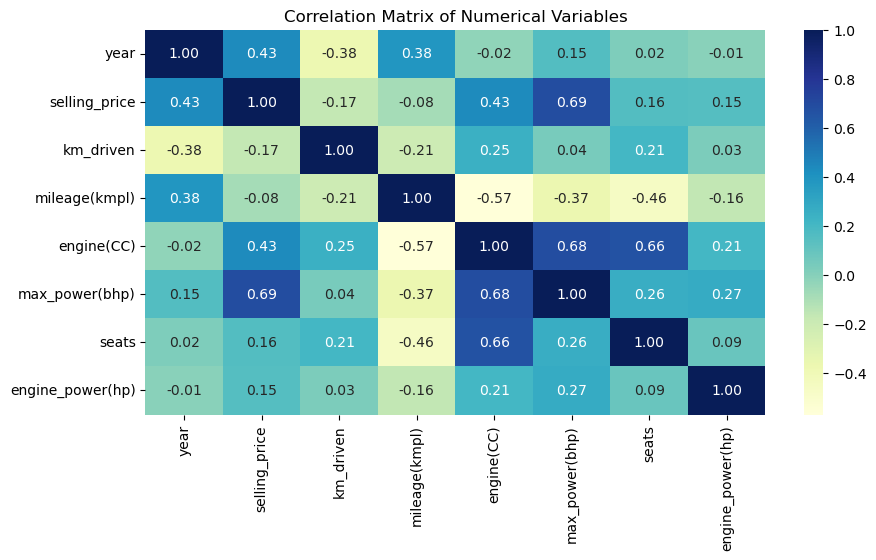

In [133]:
# Computing correlation
corr_matrix = data_num.corr()

# Visualizing correlation
plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, 
           annot = True,
           fmt = ".2f",
           cmap = "YlGnBu")

plt.title("Correlation Matrix of Numerical Variables");

From the correlation matrix above, it can be seen that selling price has a strong correlation with max_power. Engine and year are the other variables with a high correlation with the selling price

### Visualizing Continuous Variables
> km_driven, mileage, engine, max_power, seats and engine_power

In [134]:
# Defining scatterplot fucntion
def plot_scatter(df, feature_name, label = "selling_price"):
    sns.scatterplot(x = df[feature_name], y = df[label], data = df)
    plt.title(f"Scatterplot of {feature_name} and Selling Price")
    plt.yscale("log")
    plt.yticks([10000, 100000, 1000000, 10000000], ["10 Th", "100 Th", "1 M", "10 M"])

#### Examining km_driven

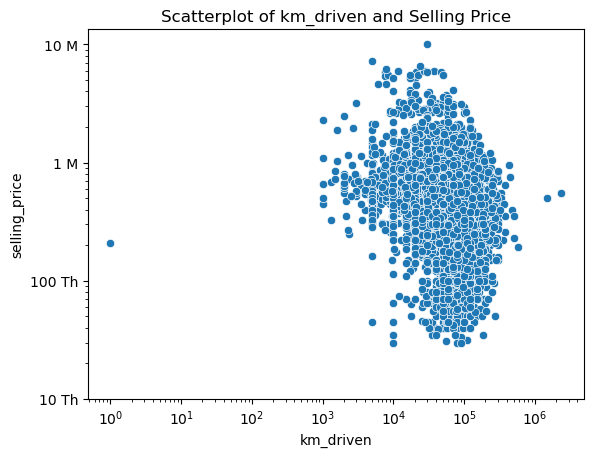

In [135]:
# Checking km_driven
plot_scatter(data, "km_driven")
plt.xscale("log")

There's an outlier from the data. That has to do with the car with only 1km driven. 

In [136]:
# Examing car with 1km driven
data[data["km_driven"] == 1]

name  year  selling_price  km_driven fuel seller_type transmission  \
6842  Maruti  2011         209000          1  CNG  Individual       Manual   

                     owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  \
6842  Fourth & Above Owner      19.173285      1196.0            73.0      5   

      engine_power(hp)  
6842         42.514382

We'll drop this row from our data

In [137]:
# Getting the index
km_index = data[data["km_driven"] == 1].index

# Dropping the data
data.drop(index = km_index, axis = 0, inplace = True)

# Checking if removed
data[data["km_driven"] == 1]

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage(kmpl), engine(CC), max_power(bhp), seats, engine_power(hp)]
Index: []

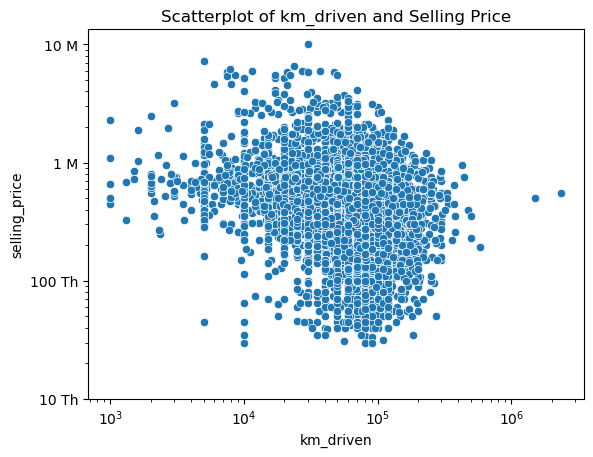

In [138]:
# Checking km_driven
plot_scatter(data, "km_driven")
plt.xscale("log")

In [139]:
# There are still two outliers in the data
data.sort_values(by = "km_driven", ascending = False)

test = data.drop(index = [4899, 3385], axis = 0)

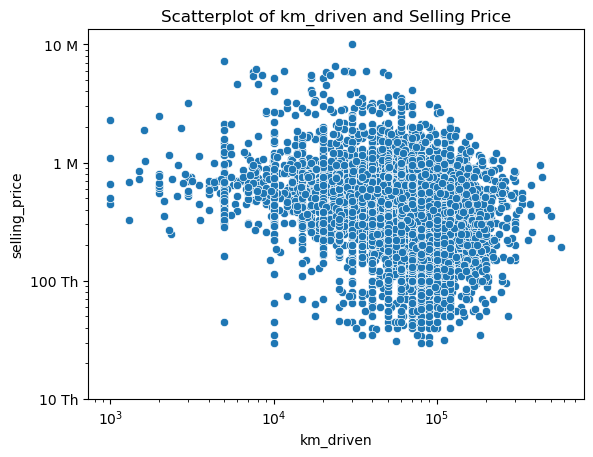

In [140]:
# Checking km_driven
plot_scatter(test, "km_driven")
plt.xscale("log")

The values are quite densed. A trend is not quite obvious from here. 

#### Examing mileage column

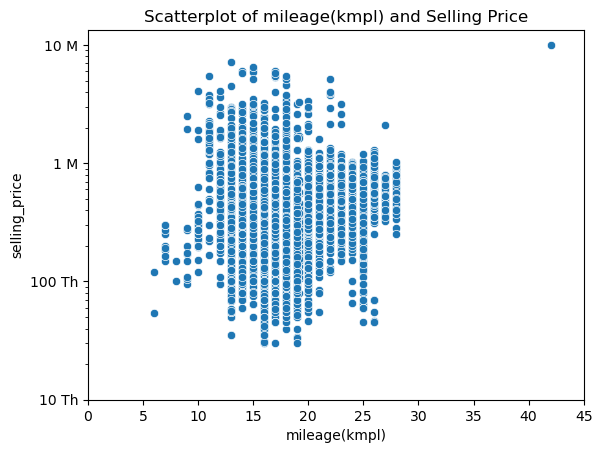

In [141]:
# Checking for mileage
plot_scatter(data, "mileage(kmpl)")
plt.xlim(0, 45);

Like the km_driven, the values are quite densed. A trend is not quite obvious. 

#### Examining engine column

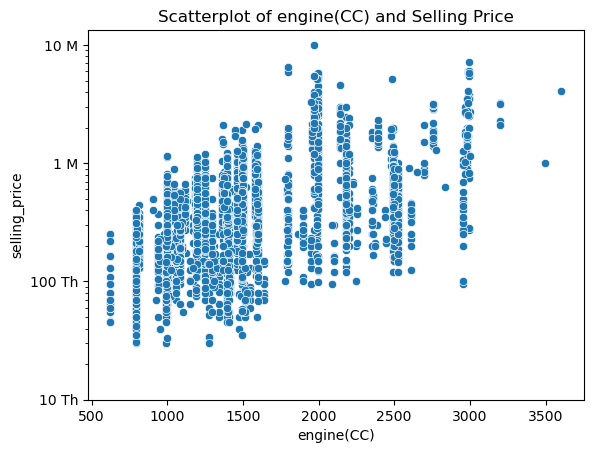

In [142]:
# Checking engine capacity
plot_scatter(data, "engine(CC)")

From the scatterplot it is quite obvious that cars with higher engine capacity have higher selling price than those with lower engine capacity. 

#### Examining the max_power column

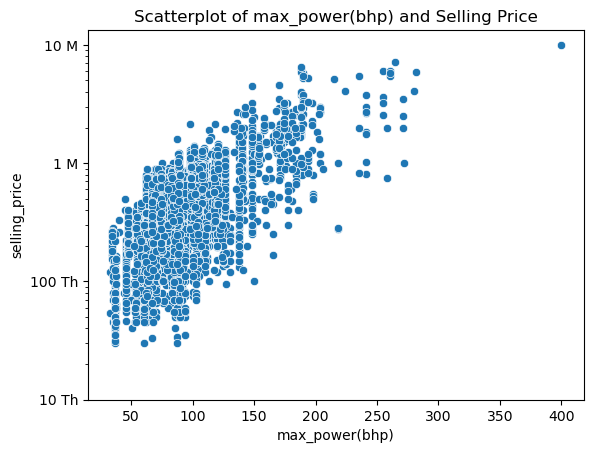

In [143]:
# Checking max_power
plot_scatter(data, "max_power(bhp)")

From the scatterplot it is also obvious that cars with higher maximum power have higher selling price than those with lower maximum power. 

#### Examining engine power

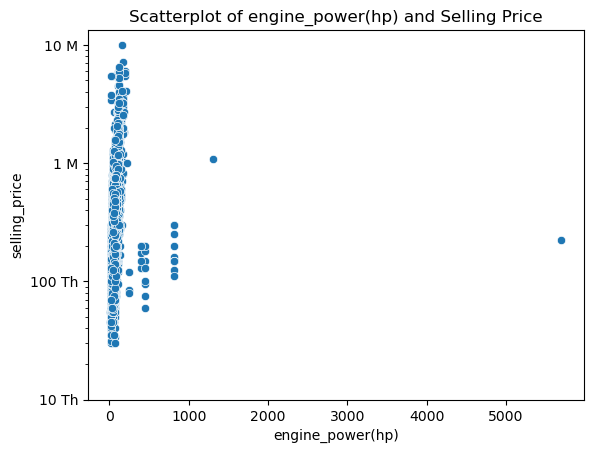

In [144]:
# Checking for torque
plot_scatter(data, "engine_power(hp)")

There's an outlier in the dataset. Other than that there are still geniune data points farther from most other points. We'll perform the following:
- Drop the row with the value of the outlier
- Scale the entire the two columns using log

In [145]:
# Dropping outlier
data.drop(index = data["engine_power(hp)"].idxmax(), axis = 0, inplace = True)

# Creating a new dataframe containing just selling price and torque
power_check = data[["selling_price", "engine_power(hp)"]]

# Taking the log of their values
power_log = np.log(power_check)

power_log.head()

selling_price  engine_power(hp)
0      13.017003          3.976281
1      13.122363          3.976281
2      12.948010          3.976281
3      13.017003          3.976281
4      13.142164          3.976281

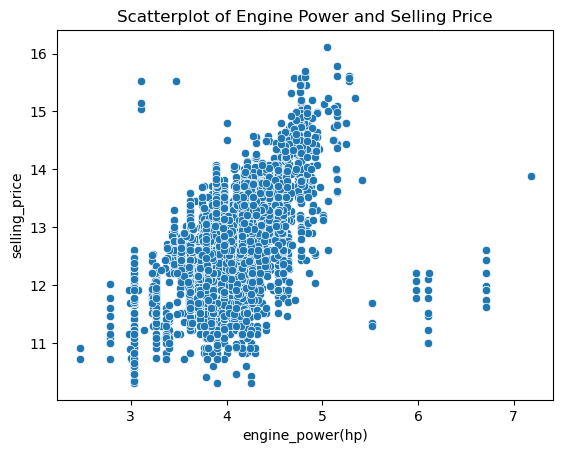

In [146]:
# Checking the distribution in a scatterplot
sns.scatterplot(x = "engine_power(hp)", y = "selling_price", data = power_log)
plt.title("Scatterplot of Engine Power and Selling Price");

The result above shows that the higher the engine power, the higher the selling price of the car. 

### Visualizing categorical variables
> brand_name, fuel, seller_typer, transmission, owner, seats

In [147]:
# defining the bar chart function
def plot_bar(df, feature_name, label = "selling_price"):
    sns.barplot(x = df[feature_name], y = label, data = df, errorbar = None)
    plt.xticks(rotation = 90)
    plt.yscale("log")
    plt.yticks([10000, 100000, 1000000, 10000000], ["10 Th", "100 Th", "1 M", "10 M"])

#### Examining name column

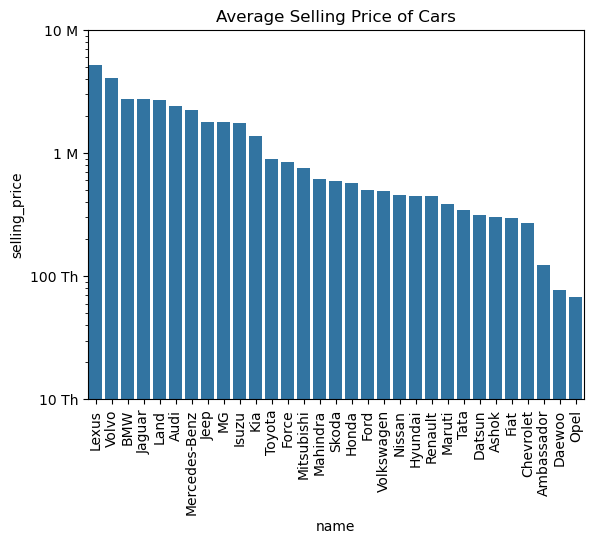

In [148]:
# Checking name
cars_average = data.groupby("name")["selling_price"].mean().reset_index().sort_values(by = "selling_price", ascending = False)

# Visualizing brand_name
plot_bar(cars_average, "name", "selling_price")
plt.title("Average Selling Price of Cars");

Lexus and volvo has the highest average selling prices with Opel and Daewoo with the lowest average selling price.  

#### Examining fuel column

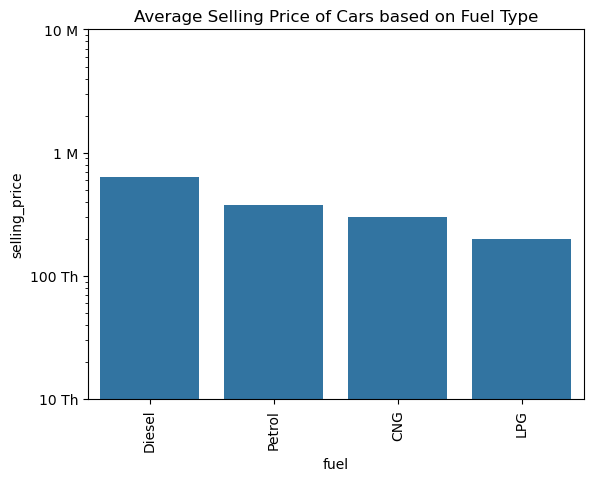

In [149]:
# Checking for fuel
fuel_average = data.groupby("fuel")["selling_price"].mean().reset_index().sort_values(by = "selling_price", ascending = False)

# Visualizing the data
plot_bar(fuel_average, "fuel")
plt.title("Average Selling Price of Cars based on Fuel Type");

Diesel cars have the average highest selling price while LPG cars have the least average selling price

#### Examining seller type


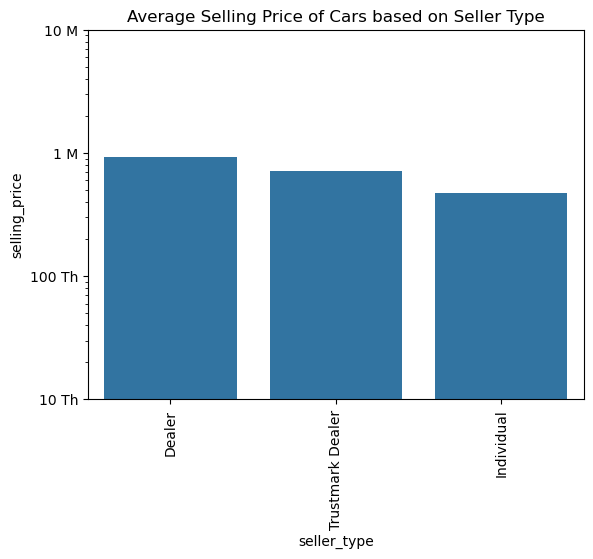

In [150]:
# Checking for fuel
seller_average = data.groupby("seller_type")["selling_price"].mean().reset_index().sort_values(by = "selling_price", ascending = False)

# Visualizing the data
plot_bar(seller_average, "seller_type")
plt.title("Average Selling Price of Cars based on Seller Type");

Cars sold by dealer on average have higher prices while those sold by individuals on average have the least prices.

#### Examining transmission column

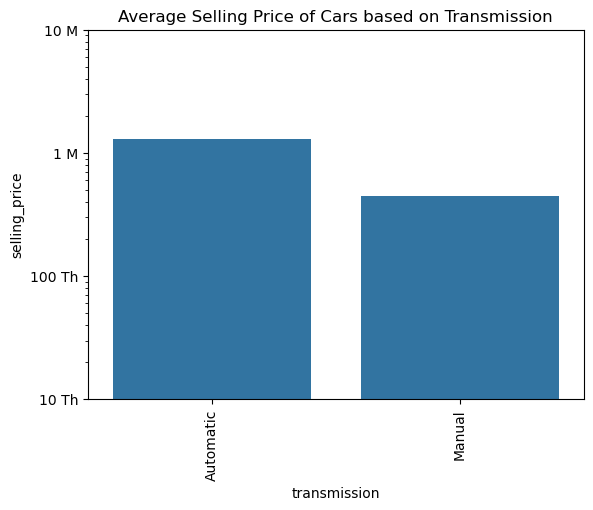

In [151]:
# Checking for transmission
transmission_average = data.groupby("transmission")["selling_price"].mean().reset_index().sort_values(by = "selling_price", ascending = False)

# Visualizing the data
plot_bar(transmission_average, "transmission")
plt.title("Average Selling Price of Cars based on Transmission");

Cars that uses automatic transmission on average are more expensive than cars with manual transmission. 

#### Examining Owner column

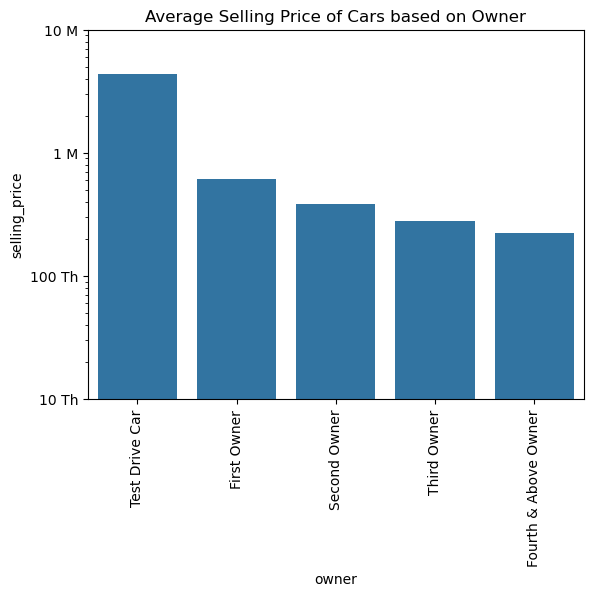

In [152]:
# Checking for owner
owner_average = data.groupby("owner")["selling_price"].mean().reset_index().sort_values(by = "selling_price", ascending = False)

# Visualizing the data
plot_bar(owner_average, "owner")
plt.title("Average Selling Price of Cars based on Owner");

Test drive cars and cars with first owner are more expensive on average. While cars with fourth & above owner being the least expensive on average. 

#### Examining the seats column


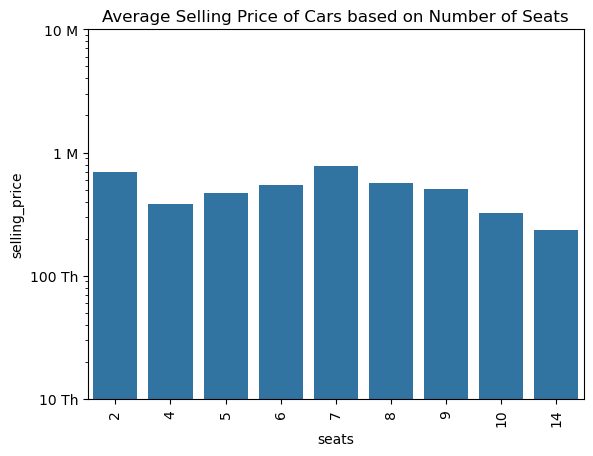

In [153]:
# Checking for seats
seats_average = data.groupby("seats")["selling_price"].mean().reset_index()

# Visualizing the data
plot_bar(seats_average, "seats")
plt.title("Average Selling Price of Cars based on Number of Seats");

On average cars with 7 seats tend to have the highest selling price.

#### Examing the year column

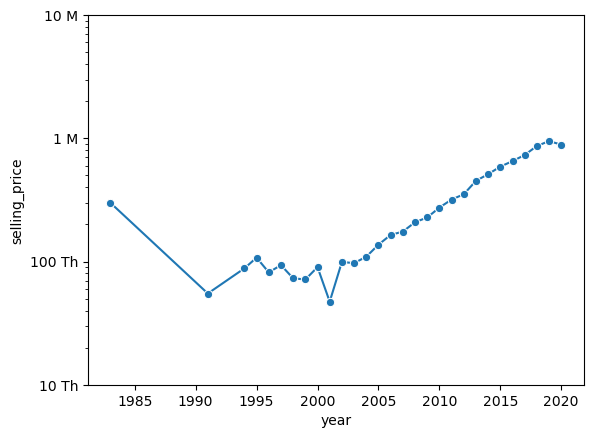

In [154]:
# Checking for the year
year_average = data.groupby("year")["selling_price"].mean().reset_index()

# Visualizing the trend using line chart
sns.lineplot(x = "year", y = "selling_price", data = year_average, marker = "o", errorbar = None)
plt.yscale("log")
plt.yticks([10000, 100000, 1000000, 10000000], ["10 Th", "100 Th", "1 M", "10 M"]);

The line chart shows that on average, the lastest the car the higher it price will be. 

### Data Preprocessing

#### Encoding categorical columns

In [155]:
data.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1  Maruti  2014         500000     120000  Diesel  Individual       Manual   
2  Maruti  2014         420000      80000  Diesel  Individual       Manual   
3  Maruti  2014         450000      80000  Diesel  Individual       Manual   
4  Maruti  2014         509999     110000  Diesel  Individual       Manual   

          owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  \
0   First Owner           23.0      1248.0            74.0      5   
1  Second Owner           23.0      1248.0            74.0      5   
2   First Owner           23.0      1248.0            74.0      5   
3   First Owner           23.0      1248.0            74.0      5   
4   First Owner           23.0      1248.0            74.0      5   

   engine_power(hp)  
0         53.318367  
1         53.318367  
2         53.318367  
3         53.318367  
4         53.318367

In [156]:
data.select_dtypes(include = "object").describe()

name    fuel seller_type transmission        owner
count     6923    6923        6923         6923         6923
unique      31       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      2164    3753        6215         6339         4241

Our data has five categorical features(name, fuel, seller_type, transmission, and owner), all of which are norminal. As such we'll use one hot encoder to encode them excluding the name column where we'll use binary encoder. This is to reduce the dimensions that may result from using one hot encoder for the name column. 

In [157]:
# Making a copy of the data
df = data.copy()

# Displaying the first five values of the copied data
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1  Maruti  2014         500000     120000  Diesel  Individual       Manual   
2  Maruti  2014         420000      80000  Diesel  Individual       Manual   
3  Maruti  2014         450000      80000  Diesel  Individual       Manual   
4  Maruti  2014         509999     110000  Diesel  Individual       Manual   

          owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  \
0   First Owner           23.0      1248.0            74.0      5   
1  Second Owner           23.0      1248.0            74.0      5   
2   First Owner           23.0      1248.0            74.0      5   
3   First Owner           23.0      1248.0            74.0      5   
4   First Owner           23.0      1248.0            74.0      5   

   engine_power(hp)  
0         53.318367  
1         53.318367  
2         53.318367  
3         53.318367  
4         53.318367

In [158]:
# Splitting data into Features and Label
X = df.drop("selling_price", axis = 1)  # Features
y = df["selling_price"]   # Label

# Checking their shape
X.shape, y.shape

((6923, 12), (6923,))

In [159]:
# Importing binary encoder from category_encoders
from category_encoders import BinaryEncoder, OneHotEncoder

# Creating an object of the encoder
one_hot_encoder = OneHotEncoder(cols = ["fuel", "seller_type", "transmission", "owner"])
binary_encoder = BinaryEncoder(cols = ["name"])

# Fitting the binary encoder to the data
binary_encoder.fit(X)
X = binary_encoder.transform(X)

# Fitting the one hot encoder to the data
one_hot_encoder.fit(X)
X = one_hot_encoder.transform(X)

# Dropping first columns of one_hot_encoded columns to avoid dummy variable trap
X.drop(["fuel_1", "seller_type_1", "transmission_1", "owner_1"], axis = 1, inplace = True)

# Displaying first five values
X.head()

name_0  name_1  name_2  name_3  name_4  year  km_driven  fuel_2  fuel_3  \
0       0       0       0       0       1  2014     145500       0       0   
1       0       0       0       0       1  2014     120000       0       0   
2       0       0       0       0       1  2014      80000       0       0   
3       0       0       0       0       1  2014      80000       0       0   
4       0       0       0       0       1  2014     110000       0       0   

   fuel_4  ...  transmission_2  owner_2  owner_3  owner_4  owner_5  \
0       0  ...               0        0        0        0        0   
1       0  ...               0        1        0        0        0   
2       0  ...               0        0        0        0        0   
3       0  ...               0        0        0        0        0   
4       0  ...               0        0        0        0        0   

   mileage(kmpl)  engine(CC)  max_power(bhp)  seats  engine_power(hp)  
0           23.0      1248.0            74.0      5         53.318367  
1           23.0      1248.0            74.0      5         53.318367  
2           23.0      1248.0            74.0      5         53.318367  
3           23.0      1248.0            74.0      5         53.318367  
4           23.0      1248.0            74.0      5         53.318367  

[5 rows x 22 columns]

In [160]:
# Expanding columns
pd.set_option("display.max_columns", None)

X.head()

name_0  name_1  name_2  name_3  name_4  year  km_driven  fuel_2  fuel_3  \
0       0       0       0       0       1  2014     145500       0       0   
1       0       0       0       0       1  2014     120000       0       0   
2       0       0       0       0       1  2014      80000       0       0   
3       0       0       0       0       1  2014      80000       0       0   
4       0       0       0       0       1  2014     110000       0       0   

   fuel_4  seller_type_2  seller_type_3  transmission_2  owner_2  owner_3  \
0       0              0              0               0        0        0   
1       0              0              0               0        1        0   
2       0              0              0               0        0        0   
3       0              0              0               0        0        0   
4       0              0              0               0        0        0   

   owner_4  owner_5  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  \
0        0        0           23.0      1248.0            74.0      5   
1        0        0           23.0      1248.0            74.0      5   
2        0        0           23.0      1248.0            74.0      5   
3        0        0           23.0      1248.0            74.0      5   
4        0        0           23.0      1248.0            74.0      5   

   engine_power(hp)  
0         53.318367  
1         53.318367  
2         53.318367  
3         53.318367  
4         53.318367

#### Scaling the data features

We'll employ Standard Scaler and Robust Scaler and compare their performance across different models

In [161]:
# Importing scalers
from sklearn.preprocessing import StandardScaler, RobustScaler

# Instatiating the scalers
std = StandardScaler()
robust = RobustScaler()

# Scaling features using standard scaler
std.fit(X)
X_std = pd.DataFrame(std.transform(X), columns = X.columns)

# Scaling features using robust scaler
robust.fit(X)
X_robust = pd.DataFrame(robust.transform(X), columns = X.columns)

In [162]:
X_std.head()

name_0    name_1   name_2    name_3    name_4     year  km_driven  \
0 -0.237958 -0.591418 -0.71732 -0.515618  0.835003  0.14137   1.225793   
1 -0.237958 -0.591418 -0.71732 -0.515618  0.835003  0.14137   0.788716   
2 -0.237958 -0.591418 -0.71732 -0.515618  0.835003  0.14137   0.103104   
3 -0.237958 -0.591418 -0.71732 -0.515618  0.835003  0.14137   0.103104   
4 -0.237958 -0.591418 -0.71732 -0.515618  0.835003  0.14137   0.617313   

     fuel_2    fuel_3    fuel_4  seller_type_2  seller_type_3  transmission_2  \
0 -0.894456 -0.074292 -0.089488      -0.330302      -0.062572       -0.303526   
1 -0.894456 -0.074292 -0.089488      -0.330302      -0.062572       -0.303526   
2 -0.894456 -0.074292 -0.089488      -0.330302      -0.062572       -0.303526   
3 -0.894456 -0.074292 -0.089488      -0.330302      -0.062572       -0.303526   
4 -0.894456 -0.074292 -0.089488      -0.330302      -0.062572       -0.303526   

   owner_2   owner_3   owner_4   owner_5  mileage(kmpl)  engine(CC)  \
0 -0.63156 -0.289397 -0.157704 -0.026884       0.926143   -0.374907   
1  1.58338 -0.289397 -0.157704 -0.026884       0.926143   -0.374907   
2 -0.63156 -0.289397 -0.157704 -0.026884       0.926143   -0.374907   
3 -0.63156 -0.289397 -0.157704 -0.026884       0.926143   -0.374907   
4 -0.63156 -0.289397 -0.157704 -0.026884       0.926143   -0.374907   

   max_power(bhp)     seats  engine_power(hp)  
0       -0.433785 -0.443194          -0.23856  
1       -0.433785 -0.443194          -0.23856  
2       -0.433785 -0.443194          -0.23856  
3       -0.433785 -0.443194          -0.23856  
4       -0.433785 -0.443194          -0.23856

In [163]:
X_robust.head()

name_0  name_1  name_2  name_3  name_4  year  km_driven  fuel_2  fuel_3  \
0     0.0     0.0     0.0     0.0     0.0   0.0   1.258333     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0   0.0   0.833333     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0   0.0   0.166667     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0   0.0   0.166667     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0   0.0   0.666667     0.0     0.0   

   fuel_4  seller_type_2  seller_type_3  transmission_2  owner_2  owner_3  \
0     0.0            0.0            0.0             0.0      0.0      0.0   
1     0.0            0.0            0.0             0.0      1.0      0.0   
2     0.0            0.0            0.0             0.0      0.0      0.0   
3     0.0            0.0            0.0             0.0      0.0      0.0   
4     0.0            0.0            0.0             0.0      0.0      0.0   

   owner_4  owner_5  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  \
0      0.0      0.0            0.8         0.0       -0.242424    0.0   
1      0.0      0.0            0.8         0.0       -0.242424    0.0   
2      0.0      0.0            0.8         0.0       -0.242424    0.0   
3      0.0      0.0            0.8         0.0       -0.242424    0.0   
4      0.0      0.0            0.8         0.0       -0.242424    0.0   

   engine_power(hp)  
0         -0.147927  
1         -0.147927  
2         -0.147927  
3         -0.147927  
4         -0.147927

#### Splitting data into training and test split

In [164]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting data using train_test_split for standard scaler
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, test_size= 0.2, 
                                                                    shuffle=True, random_state=101)

# Splitting data using train_test_split for robust scaler
X_robust_train, X_robust_test, y_robust_train, y_robust_test = train_test_split(X_robust, y, test_size= 0.2, 
                                                                                shuffle=True, random_state=101)


# Checking the shape of the splits
print("Shapes for Standard Scaler Split")
print(X_std_train.shape, X_std_test.shape, y_std_train.shape, y_std_test.shape)
print("\nShapes for Robust Scaler Split")
print(X_robust_train.shape, X_robust_test.shape, y_robust_train.shape, y_robust_test.shape)

Shapes for Standard Scaler Split
(5538, 22) (1385, 22) (5538,) (1385,)

Shapes for Robust Scaler Split
(5538, 22) (1385, 22) (5538,) (1385,)


### Baseline Model Training and Evaluation

In [95]:
# Importing algorithms and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [96]:
# Seed to ensure reproducibility
np.random.seed(101)

# Instantiating the models
lr = LinearRegression()
svm = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor(objective = "reg:squarederror")
cat = CatBoostRegressor(iterations = 1000, learning_rate=0.1, depth = 6, verbose = False)

In [97]:
# Creating a for loop and storing results in a dataframe
models = {"Linear Regression":lr,
         "SVM":svm, 
         "KNN":knn,
         "Decision Tree":dt,
         "Random Forest": rf,
         "Extra Trees":et,
         "Gradient Boost": gb,
         "XG Boost":xgb, 
         "Cat Boost": cat}

model_names = [name for name in models.keys()]
scores_std = {name: {} for name in model_names}
scores_robust = {name: {} for name in model_names}

# For loop to train and get scores for standard scaler
for name, model in models.items():
    # Training model
    model.fit(X_std_train, y_std_train)
    
    # Evaluating model score (r2 score) on training and test set
    r2_train = model.score(X_std_train, y_std_train)
    r2_test = model.score(X_std_test, y_std_test)
    
    # Getting model prediction on test set
    y_std_pred = model.predict(X_std_test)
    
    # Evaluating rmse, mse, rmae and mae
    rmse = root_mean_squared_error(y_std_test, y_std_pred)
    mse = mean_squared_error(y_std_test, y_std_pred)
    mae = mean_absolute_error(y_std_test, y_std_pred)
    
    # Adding the scores to the score disctionary
    scores_std[name]["r2 on Training set"] = r2_train
    scores_std[name]["r2 on Test set"] = r2_test
    scores_std[name]["RMSE score"] = rmse
    scores_std[name]["MSE score"] = mse
    scores_std[name]["MAE score"] = mae
    
# Displaying results in a DataFrame
models_evaluation_std = pd.DataFrame(scores_std)

# For loop to train and get scores for robust scaler
for name, model in models.items():
    # Training model
    model.fit(X_robust_train, y_robust_train)
    
    # Evaluating model score (r2 score) on training and test set
    r2_train = model.score(X_robust_train, y_robust_train)
    r2_test = model.score(X_robust_test, y_robust_test)
    
    # Getting model prediction on test set
    y_robust_pred = model.predict(X_robust_test)
    
    # Evaluating rmse, mse, rmae and mae
    rmse = root_mean_squared_error(y_robust_test, y_robust_pred)
    mse = mean_squared_error(y_std_test, y_robust_pred)
    mae = mean_absolute_error(y_robust_test, y_robust_pred)
    
    # Adding the scores to the score disctionary
    scores_robust[name]["r2 on Training set"] = r2_train
    scores_robust[name]["r2 on Test set"] = r2_test
    scores_robust[name]["RMSE score"] = rmse
    scores_robust[name]["MSE score"] = mse
    scores_robust[name]["MAE score"] = mae
    
# Displaying results in a DataFrame
models_evaluation_robust = pd.DataFrame(scores_robust)

In [98]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

In [99]:
models_evaluation_robust

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -4.983921e-02  8.900419e-01   
r2 on Test set           6.632544e-01 -5.194409e-02  8.298038e-01   
RMSE score               2.920312e+05  5.161485e+05  2.076124e+05   
MSE score                8.528223e+10  2.664093e+11  4.310290e+10   
MAE score                1.708217e+05  2.802011e+05  9.760753e+04   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.840473e-01  9.989942e-01   
r2 on Test set       8.008121e-01   8.975078e-01  9.180487e-01   
RMSE score           2.246000e+05   1.611105e+05  1.440642e+05   
MSE score            5.044518e+10   2.595658e+10  2.075450e+10   
MAE score            1.048631e+05   7.986005e+04  8.176110e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.104175e-01  9.009171e-01  9.369306e-01  
RMSE score            1.506225e+05  1.584082e+05  1.263828e+05  
MSE score             2.268713e+10  2.509316e+10  1.597260e+10  
MAE score             8.651393e+04  8.841503e+04  7.027671e+04

From the results above the following were observed:
- The results from both type of scaling is simlilar
- Cat boost had the best performing metrics among all models
- Linear Regression and SVM where the worst performing models
- RandomForest,ExtraTrees, GradientBoost, XG Boost and Cat Boost were the top performing models

**Five steps to carry out:**

1. Cross validation to ensure verify inital performance

2. Features selection

3. Hyper-parameter tuning: After feature selection, the hyper parameters will be tuned to improve model performance.

4. Stacking: After the hyper-parameters have been tuned, all best models will be tested, and the correlation of their predictions wil be checked. If they're not correlated then they will be stacked with a meta learner linear model such as LinearRegression. If they're correlated, then the next step...

5. Weighted Averaging: If their predictions is correlated, the models will be combined using weighted averaging.  Instead of giving each model an equal vote, we would assign weights to their predictions based on their validation performance.

#### 1. Validating initial Standardized Baseline models using Cross validation

In [100]:
# Adding seed for reproducibility
np.random.seed(101)

# Importing cross val score 
from sklearn.model_selection import cross_val_score, KFold

# Instantiating KFold 
k_fold = KFold(n_splits = 5, shuffle=True, random_state=101)

models = {"Linear Regression":lr,
         "SVM":svm, 
         "KNN":knn,
         "Decision Tree":dt,
         "Random Forest": rf,
         "Extra Trees":et,
         "Gradient Boost": gb,
         "XG Boost":xgb, 
         "Cat Boost": cat}

model_names = [name for name in models.keys()]
scores_std = {name: {} for name in model_names}
scores_robust = {name: {} for name in model_names}

# Creating a for loop for standard scaler
for name, model in models.items():
    cv_r2 = np.mean(cross_val_score(model, X_std, y, cv = k_fold))
    cv_rmse = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_root_mean_squared_error"))
    cv_mse = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_mean_squared_error"))
    cv_mae = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_mean_absolute_error"))
    
    # Adding to the scores dictionary
    scores_std[name]["r2 score"] = cv_r2
    scores_std[name]["RMSE score"] = cv_rmse * (-1)
    scores_std[name]["MSE score"] = cv_mse * (-1)
    scores_std[name]["MAE score"] = cv_mae * (-1)

# Converting scores from a dictionary to a dataframe
models_validated_std = pd.DataFrame(scores_std)

In [160]:
models_validated_std

Linear Regression           SVM           KNN  Decision Tree  \
r2 score         6.419061e-01 -4.832242e-02  8.056363e-01   8.251465e-01   
RMSE score       3.100012e+05  5.311213e+05  2.283043e+05   2.136425e+05   
MSE score        9.644243e+10  2.831622e+11  5.282951e+10   4.733807e+10   
MAE score        1.689380e+05  2.778677e+05  1.059388e+05   1.016157e+05   

            Random Forest   Extra Trees  Gradient Boost      XG Boost  \
r2 score     8.884001e-01  8.962741e-01    8.880378e-01  8.856075e-01   
RMSE score   1.742481e+05  1.664428e+05    1.722899e+05  1.750619e+05   
MSE score    3.094913e+10  2.813168e+10    3.055352e+10  3.163324e+10   
MAE score    8.111713e+04  8.200715e+04    8.842864e+04  8.914809e+04   

               Cat Boost  
r2 score    9.073456e-01  
RMSE score  1.572857e+05  
MSE score   2.580959e+10  
MAE score   7.427687e+04

From the above we see that:
- Upon Cross validation KNN, Decision Tree, Random Forest, Gradient Boost, XG Boost and Cat Boost are stil the best performing models. 

#### 2. Feature selection

**Using the feature importance of catboost (the best performing model) via RFE**

In [102]:
# Initial Model Performance
np.random.seed(101)

# Initiating and training the model
model_cat = CatBoostRegressor(iterations = 1000, learning_rate=0.1, depth = 6, verbose = False)
model_cat.fit(X_std_train, y_std_train)

# Evaluating model
r2_score_train = model_cat.score(X_std_train, y_std_train)
y_pred = model_cat.predict(X_std_test)
r2 = r2_score(y_std_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
rmse = root_mean_squared_error(y_std_test, y_pred)
mse = mean_squared_error(y_std_test, y_pred)
mae = mean_absolute_error(y_std_test, y_pred)

# Printing scores
print("r2 on train:", r2_score_train)
print("r2 on test:", r2)
print("adjusted r2", adjusted_r2)
print("rmse:", rmse)
print("mse:", mse)
print("mae:", mae)

r2 on train: 0.9851282419149988
r2 on test: 0.9369917745126652
adjusted r2 0.935974020503325
rmse: 126321.4094030335
mse: 15957098473.568798
mae: 70192.50853707556


In [103]:
# Feature selection using Recursive Feature Elimination
from sklearn.feature_selection import RFE

# Random seed for reproducibilty
np.random.seed(101)

# Initiating model on standard scaler
model_cat = CatBoostRegressor(iterations = 1000, learning_rate=0.1, depth = 6, verbose = False)

# Creating an object of RFE
rfe = RFE(estimator=model_cat,
         n_features_to_select=None, step = 1)

# Fitting RFE to data
rfe.fit(X_std_train, y_std_train)

# Extracting selected features
selected_features = X_std_train.columns[rfe.support_]
selected_features

Index(['name_1', 'name_2', 'year', 'km_driven', 'fuel_2', 'transmission_2',
       'mileage(kmpl)', 'engine(CC)', 'max_power(bhp)', 'seats',
       'engine_power(hp)'],
      dtype='object')

In [104]:
# Testing new features on model
np.random.seed(101)

# Transforming X_train and X_test to only contain selected features
X_train_selected = X_std_train[selected_features]
X_test_selected = X_std_test[selected_features]

# Initiating and training the model
model_cat = CatBoostRegressor(iterations = 1000, learning_rate=0.1, depth = 6, verbose = False)
model_cat.fit(X_train_selected, y_std_train)

# Evaluating model
r2_train = model_cat.score(X_train_selected, y_std_train)
y_pred = model_cat.predict(X_test_selected)
r2 = r2_score(y_std_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (X_test_selected.shape[0]-1)) / (X_test_selected.shape[0]- X_test_selected.shape[1]-1)
rmse = root_mean_squared_error(y_std_test, y_pred)
mse = mean_squared_error(y_std_test, y_pred)
mae = mean_absolute_error(y_std_test, y_pred)

# Displaying model performance score
print("r2 on train:", r2_train)
print("r2:", r2)
print("adjusted_r2", adjusted_r2)
print("rmse:", rmse)
print("mse:", mse)
print("mae:", mae)

r2 on train: 0.983853510973612
r2: 0.929154503528476
adjusted_r2 0.9285869139718942
rmse: 133947.45372046245
mse: 17941920358.195427
mae: 70752.11318950572


After performing feature selection the following were observe:

- The baseline model with all features still performs better than the model based on the selected features. This is good as it probably means there's likely more interaction between our features in the over predictive power of the model. 

We'll move to hyperparameter tuning. 

### 3. Hyper-parameters Tuning

#### 3.1 Cat Boost

In [105]:
# Setting a seed for reproducibility
np.random.seed(101)

# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the CatBoostRegressor
    param = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'verbose': False}
    
    # Creating and training the CatBoostRegressor model    
    model = CatBoostRegressor(**param)
    model.fit(X_std_train, y_std_train, eval_set=(X_std_test, y_std_test), early_stopping_rounds=100, verbose=False)
    
    # Predicting on the test set
    preds = model.predict(X_std_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_std_test, preds)
    return mse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-02 15:11:12,235] A new study created in memory with name: no-name-9e7b9945-2b2a-4745-8eb2-35f320498263
[I 2024-09-02 15:11:14,838] Trial 0 finished with value: 19125353730.240128 and parameters: {'iterations': 1286, 'learning_rate': 0.1994485383028889, 'depth': 5, 'l2_leaf_reg': 2.1555131943740586, 'bagging_temperature': 0.8261460316990566, 'random_strength': 0.8275161140976913, 'border_count': 47}. Best is trial 0 with value: 19125353730.240128.
[I 2024-09-02 15:11:16,753] Trial 1 finished with value: 24169647836.18717 and parameters: {'iterations': 656, 'learning_rate': 0.1739630283062439, 'depth': 7, 'l2_leaf_reg': 3.0820325994668805, 'bagging_temperature': 0.40760297109616406, 'random_strength': 0.18903216853645766, 'border_count': 20}. Best is trial 0 with value: 19125353730.240128.
[I 2024-09-02 15:11:18,028] Trial 2 finished with value: 37282559873.549324 and parameters: {'iterations': 1664, 'learning_rate': 0.19485255636081789, 'depth': 7, 'l2_leaf_reg': 1.4504631788

[I 2024-09-02 15:12:34,518] Trial 24 finished with value: 15819090203.413774 and parameters: {'iterations': 1133, 'learning_rate': 0.053896434413650315, 'depth': 6, 'l2_leaf_reg': 2.164116894566554, 'bagging_temperature': 0.9040536904503909, 'random_strength': 0.07579280764385976, 'border_count': 176}. Best is trial 12 with value: 13566894007.673685.
[I 2024-09-02 15:12:40,460] Trial 25 finished with value: 16452086449.074594 and parameters: {'iterations': 1380, 'learning_rate': 0.08554655395340122, 'depth': 5, 'l2_leaf_reg': 3.841935156820958, 'bagging_temperature': 0.6313848134560083, 'random_strength': 0.11390389546884094, 'border_count': 233}. Best is trial 12 with value: 13566894007.673685.
[I 2024-09-02 15:12:45,544] Trial 26 finished with value: 15361991262.225061 and parameters: {'iterations': 1660, 'learning_rate': 0.037137509660899105, 'depth': 4, 'l2_leaf_reg': 0.7992444581679663, 'bagging_temperature': 0.9070710072066867, 'random_strength': 0.29489255251363233, 'border_coun

[I 2024-09-02 15:13:50,389] Trial 48 finished with value: 17886593264.63975 and parameters: {'iterations': 1617, 'learning_rate': 0.22526952095476374, 'depth': 6, 'l2_leaf_reg': 2.598723617796428, 'bagging_temperature': 0.14534085597882807, 'random_strength': 0.6178994837805752, 'border_count': 154}. Best is trial 43 with value: 13214729228.27436.
[I 2024-09-02 15:13:53,220] Trial 49 finished with value: 20418284874.57683 and parameters: {'iterations': 1702, 'learning_rate': 0.19924788867036106, 'depth': 9, 'l2_leaf_reg': 1.6316110463891564, 'bagging_temperature': 0.4855418667080035, 'random_strength': 0.29842526068610375, 'border_count': 127}. Best is trial 43 with value: 13214729228.27436.
[I 2024-09-02 15:13:56,405] Trial 50 finished with value: 18785828419.17453 and parameters: {'iterations': 1836, 'learning_rate': 0.07603984273038619, 'depth': 7, 'l2_leaf_reg': 1.0481084282461932, 'bagging_temperature': 0.2794796931043807, 'random_strength': 0.5224552917915507, 'border_count': 85}

[I 2024-09-02 15:15:06,748] Trial 72 finished with value: 18249543036.601185 and parameters: {'iterations': 1704, 'learning_rate': 0.15812706372176155, 'depth': 6, 'l2_leaf_reg': 0.0012760462417437668, 'bagging_temperature': 0.43701231924848827, 'random_strength': 0.370771207174815, 'border_count': 176}. Best is trial 43 with value: 13214729228.27436.
[I 2024-09-02 15:15:09,782] Trial 73 finished with value: 15999728621.33407 and parameters: {'iterations': 1640, 'learning_rate': 0.13469411936632314, 'depth': 6, 'l2_leaf_reg': 0.9232671774375651, 'bagging_temperature': 0.3412134854513848, 'random_strength': 0.4087485079841138, 'border_count': 187}. Best is trial 43 with value: 13214729228.27436.
[I 2024-09-02 15:15:11,458] Trial 74 finished with value: 17910677174.86118 and parameters: {'iterations': 1537, 'learning_rate': 0.18398158563428857, 'depth': 6, 'l2_leaf_reg': 1.3231448456813597, 'bagging_temperature': 0.46810215138018435, 'random_strength': 0.4739764961529193, 'border_count':

[I 2024-09-02 15:16:02,076] Trial 96 finished with value: 19137971847.93804 and parameters: {'iterations': 1302, 'learning_rate': 0.2160736220835828, 'depth': 6, 'l2_leaf_reg': 6.597899865424294, 'bagging_temperature': 0.5538828912179402, 'random_strength': 0.5342839993715855, 'border_count': 142}. Best is trial 43 with value: 13214729228.27436.
[I 2024-09-02 15:16:03,717] Trial 97 finished with value: 15848661481.542757 and parameters: {'iterations': 1106, 'learning_rate': 0.24234458231745062, 'depth': 6, 'l2_leaf_reg': 0.5710475357988951, 'bagging_temperature': 0.40207328405724596, 'random_strength': 0.641250194345822, 'border_count': 155}. Best is trial 43 with value: 13214729228.27436.
[I 2024-09-02 15:16:05,193] Trial 98 finished with value: 19172940720.87271 and parameters: {'iterations': 1225, 'learning_rate': 0.2076268574924011, 'depth': 5, 'l2_leaf_reg': 0.23353662461038122, 'bagging_temperature': 0.513724372177435, 'random_strength': 0.4679344199797215, 'border_count': 133}. 

In [106]:
np.random.seed(101)

# Training the final model with the best parameters
best_params = study.best_trial.params
final_cat = CatBoostRegressor(**best_params)
final_cat.fit(X_std_train, y_std_train, eval_set=(X_std_test, y_std_test), early_stopping_rounds=100, verbose=False)

# Evaluating the final model
final_preds = final_cat.predict(X_std_test)
final_r2 = r2_score(y_std_test, final_preds)
final_adjusted_r2 = 1 - ((1 - final_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
final_rmse = root_mean_squared_error(y_std_test, final_preds)
final_mse = mean_squared_error(y_std_test, final_preds)
final_mae = mean_absolute_error(y_std_test, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final Adjusted R2: {final_adjusted_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.9478202982610932
Final Adjusted R2: 0.9469774543269845
Final RMSE: 114955.33579731896
Final MSE: 13214729228.27436
Final MAE: 69105.10476548833


In [107]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

#### 2. Extra Trees

In [123]:
# Setting random seed for reproducibility
np.random.seed(101)

# Defining the objective function for optuna
def objective(trial):
    # Suggesting the parametes
    param = {
        "n_estimators":trial.suggest_int("n_estimators", 100, 1000),
        "max_depth":trial.suggest_int("max_depth", 2, 32),
        "min_samples_split":trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features":trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }
    
    # Creating and training the ExtraTreesRegressor model
    model = ExtraTreesRegressor(**param)
    model.fit(X_std_train, y_std_train)
    
    # Making prediction on test set
    preds = model.predict(X_std_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_std_test, preds)
    return mse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

[I 2024-09-02 16:13:47,048] A new study created in memory with name: no-name-20c15f28-d334-42ab-a549-966b673892a5
[I 2024-09-02 16:13:48,817] Trial 0 finished with value: 64777642341.36178 and parameters: {'n_estimators': 727, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 64777642341.36178.
[I 2024-09-02 16:13:51,066] Trial 1 finished with value: 75146675491.80511 and parameters: {'n_estimators': 966, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 0 with value: 64777642341.36178.
[I 2024-09-02 16:13:55,658] Trial 2 finished with value: 22653612529.408573 and parameters: {'n_estimators': 669, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 2 with value: 22653612529.408573.
[I 2024-09-02 16:13:55,939] Trial 3 finished with value: 67610949175.15361 and parameters: {'n_estimators': 107, 'max_depth': 12, 'min_sam

[I 2024-09-02 16:15:30,918] Trial 33 finished with value: 21755318201.13167 and parameters: {'n_estimators': 156, 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 23 with value: 20976941847.844437.
[I 2024-09-02 16:15:32,545] Trial 34 finished with value: 39141574418.093025 and parameters: {'n_estimators': 179, 'max_depth': 20, 'min_samples_split': 16, 'min_samples_leaf': 18, 'max_features': None}. Best is trial 23 with value: 20976941847.844437.
[I 2024-09-02 16:15:33,070] Trial 35 finished with value: 32534063316.203087 and parameters: {'n_estimators': 110, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 23 with value: 20976941847.844437.
[I 2024-09-02 16:15:34,913] Trial 36 finished with value: 23902514541.93318 and parameters: {'n_estimators': 154, 'max_depth': 22, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 23 with value: 20976941847

[I 2024-09-02 16:17:27,578] Trial 66 finished with value: 42289711217.973366 and parameters: {'n_estimators': 531, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 52 with value: 19891488933.708374.
[I 2024-09-02 16:17:32,870] Trial 67 finished with value: 22323310885.393227 and parameters: {'n_estimators': 446, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 52 with value: 19891488933.708374.
[I 2024-09-02 16:17:34,282] Trial 68 finished with value: 37414332980.0556 and parameters: {'n_estimators': 451, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 19891488933.708374.
[I 2024-09-02 16:17:39,648] Trial 69 finished with value: 34226631742.4471 and parameters: {'n_estimators': 576, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': None}. Best is trial 52 with value: 19891488933.708374

[I 2024-09-02 16:23:20,981] Trial 99 finished with value: 20477266304.12253 and parameters: {'n_estimators': 913, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.
[I 2024-09-02 16:23:33,317] Trial 100 finished with value: 20752643827.69229 and parameters: {'n_estimators': 865, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.
[I 2024-09-02 16:23:45,528] Trial 101 finished with value: 20089641188.773823 and parameters: {'n_estimators': 813, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.
[I 2024-09-02 16:23:59,107] Trial 102 finished with value: 20352520574.44749 and parameters: {'n_estimators': 917, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.


[I 2024-09-02 16:30:10,277] Trial 132 finished with value: 20093882112.233818 and parameters: {'n_estimators': 930, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.
[I 2024-09-02 16:30:25,116] Trial 133 finished with value: 20298402829.503002 and parameters: {'n_estimators': 899, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.
[I 2024-09-02 16:30:39,730] Trial 134 finished with value: 19796135436.034103 and parameters: {'n_estimators': 867, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 19515574101.87705.
[I 2024-09-02 16:30:52,640] Trial 135 finished with value: 20614916637.9329 and parameters: {'n_estimators': 830, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 80 with value: 19515574101.87705

In [124]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_et = ExtraTreesRegressor(**best_params)
final_et.fit(X_std_train, y_std_train)

# Evaluating the final model
final_preds = final_et.predict(X_std_test)
final_r2 = r2_score(y_std_test, final_preds)
final_adjusted_r2 = 1 - ((1 - final_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
final_rmse = root_mean_squared_error(y_std_test, final_preds)
final_mse = mean_squared_error(y_std_test, final_preds)
final_mae = mean_absolute_error(y_std_test, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final Adjusted R2: {final_adjusted_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.9195481063570842
Final Adjusted R2: 0.9182485897196803
Final RMSE: 142740.2567626948
Final MSE: 20374780900.680042
Final MAE: 78744.79236451512


In [125]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

#### 3. Gradient Boost

In [111]:
# Setting a seed for reproducibility
np.random.seed(101)

# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the GradientBoostingRegressor
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Creating and training the GradientBoostingRegressor model
    model = GradientBoostingRegressor(**param)
    model.fit(X_std_train, y_std_train)
    
    # Predicting on the test set
    preds = model.predict(X_std_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_std_test, preds)
    return mse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-02 15:33:11,826] A new study created in memory with name: no-name-3cdd25a5-3145-43ef-9a0f-4490b7953760
[I 2024-09-02 15:33:15,894] Trial 0 finished with value: 27322288579.210674 and parameters: {'n_estimators': 636, 'learning_rate': 0.2905215700790965, 'max_depth': 27, 'min_samples_split': 20, 'min_samples_leaf': 5, 'subsample': 0.7009462744982665, 'max_features': 'log2'}. Best is trial 0 with value: 27322288579.210674.
[I 2024-09-02 15:33:19,342] Trial 1 finished with value: 24180701205.530716 and parameters: {'n_estimators': 800, 'learning_rate': 0.27133836510499326, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 11, 'subsample': 0.5219865909785582, 'max_features': 'log2'}. Best is trial 1 with value: 24180701205.530716.
[I 2024-09-02 15:33:33,178] Trial 2 finished with value: 19043001448.05196 and parameters: {'n_estimators': 548, 'learning_rate': 0.057283353970087304, 'max_depth': 28, 'min_samples_split': 19, 'min_samples_leaf': 10, 'subsample': 0.58347738

[I 2024-09-02 15:37:02,219] Trial 26 finished with value: 23882883149.45188 and parameters: {'n_estimators': 475, 'learning_rate': 0.26148910886494325, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 8, 'subsample': 0.9940635037659298, 'max_features': 'sqrt'}. Best is trial 18 with value: 17030685991.39397.
[I 2024-09-02 15:37:17,568] Trial 27 finished with value: 19306557448.808628 and parameters: {'n_estimators': 859, 'learning_rate': 0.13997977087631852, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 14, 'subsample': 0.786386700294046, 'max_features': None}. Best is trial 18 with value: 17030685991.39397.
[I 2024-09-02 15:37:21,593] Trial 28 finished with value: 22706234233.377636 and parameters: {'n_estimators': 620, 'learning_rate': 0.19542000072742452, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 18, 'subsample': 0.9058255444850369, 'max_features': 'sqrt'}. Best is trial 18 with value: 17030685991.39397.
[I 2024-09-02 15:37:33,949] Tria

[I 2024-09-02 15:41:13,688] Trial 52 finished with value: 21310779080.218376 and parameters: {'n_estimators': 484, 'learning_rate': 0.04134832642135555, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 16, 'subsample': 0.8032832231685294, 'max_features': 'log2'}. Best is trial 18 with value: 17030685991.39397.
[I 2024-09-02 15:41:30,616] Trial 53 finished with value: 16731084926.43429 and parameters: {'n_estimators': 769, 'learning_rate': 0.1328696782110571, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 13, 'subsample': 0.9739492052470428, 'max_features': None}. Best is trial 53 with value: 16731084926.43429.
[I 2024-09-02 15:41:43,773] Trial 54 finished with value: 18642273695.886208 and parameters: {'n_estimators': 599, 'learning_rate': 0.1303233408495198, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 12, 'subsample': 0.9759102074225843, 'max_features': None}. Best is trial 53 with value: 16731084926.43429.
[I 2024-09-02 15:42:01,793] Trial 5

[I 2024-09-02 15:44:44,882] Trial 78 finished with value: 20171007557.438965 and parameters: {'n_estimators': 941, 'learning_rate': 0.07278796793715546, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 17, 'subsample': 0.7612418318016753, 'max_features': 'log2'}. Best is trial 74 with value: 16192609649.287674.
[I 2024-09-02 15:44:47,687] Trial 79 finished with value: 18595063845.200035 and parameters: {'n_estimators': 917, 'learning_rate': 0.09773434391274913, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 18, 'subsample': 0.8238711522307749, 'max_features': 'log2'}. Best is trial 74 with value: 16192609649.287674.
[I 2024-09-02 15:44:49,870] Trial 80 finished with value: 20377667013.240257 and parameters: {'n_estimators': 960, 'learning_rate': 0.09769123272804428, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 16, 'subsample': 0.7775304809979667, 'max_features': 'log2'}. Best is trial 74 with value: 16192609649.287674.
[I 2024-09-02 15:44:52,630

In [112]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_gb = GradientBoostingRegressor(**best_params)
final_gb.fit(X_std_train, y_std_train)

# Evaluating the final model
final_preds = final_gb.predict(X_std_test)
final_r2 = r2_score(y_std_test, final_preds)
final_adjusted_r2 = 1 - ((1 - final_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
final_rmse = root_mean_squared_error(y_std_test, final_preds)
final_mse = mean_squared_error(y_std_test, final_preds)
final_mae = mean_absolute_error(y_std_test, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final Adjusted R2: {final_adjusted_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.9286060013204993
Final Adjusted R2: 0.9274527942933708
Final RMSE: 134464.98002256025
Final MSE: 18080830852.467525
Final MAE: 76470.41947844734


In [113]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

### 4. XG Boost

In [114]:
# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the XGBRegressor
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    # Creating and training the XGBRegressor model
    final_xgb = XGBRegressor(**param, objective = "reg:squarederror")
    final_xgb.fit(X_std_train, y_std_train, eval_set=[(X_std_test, y_std_test)], early_stopping_rounds=100, verbose=False)
    
    # Predicting on the test set
    preds = model.predict(X_std_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_std_test, preds)
    return mse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-02 15:45:44,787] A new study created in memory with name: no-name-347cc36d-5fad-4903-a232-af8c72537457
[I 2024-09-02 15:45:51,375] Trial 0 finished with value: 31174287281.474674 and parameters: {'n_estimators': 821, 'learning_rate': 0.24569426244018025, 'max_depth': 25, 'min_child_weight': 5, 'subsample': 0.8217574159635227, 'colsample_bytree': 0.9425214789171046, 'gamma': 2.619612080997682, 'reg_alpha': 4.719342322207334, 'reg_lambda': 0.03316068584229115}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:45:58,650] Trial 1 finished with value: 31174287281.474674 and parameters: {'n_estimators': 750, 'learning_rate': 0.17918736114023356, 'max_depth': 26, 'min_child_weight': 7, 'subsample': 0.9798174745645775, 'colsample_bytree': 0.8836634012876707, 'gamma': 2.591052484787168, 'reg_alpha': 3.7466773620731297, 'reg_lambda': 4.9693638412744185}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:46:12,596] Trial 2 finished with value: 31174287281

[I 2024-09-02 15:48:00,467] Trial 20 finished with value: 31174287281.474674 and parameters: {'n_estimators': 640, 'learning_rate': 0.2617999342906663, 'max_depth': 28, 'min_child_weight': 8, 'subsample': 0.6133650306872591, 'colsample_bytree': 0.9436468348856031, 'gamma': 3.2684059052008, 'reg_alpha': 4.440438619857578, 'reg_lambda': 3.3386872211021075}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:48:14,297] Trial 21 finished with value: 31174287281.474674 and parameters: {'n_estimators': 523, 'learning_rate': 0.14419390445839517, 'max_depth': 20, 'min_child_weight': 3, 'subsample': 0.6750471247353433, 'colsample_bytree': 0.9638691200448788, 'gamma': 2.207682383263247, 'reg_alpha': 1.553339448559069, 'reg_lambda': 0.7784874904537712}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:48:26,202] Trial 22 finished with value: 31174287281.474674 and parameters: {'n_estimators': 594, 'learning_rate': 0.12597518989992992, 'max_depth': 18, 'min_child_weig

[I 2024-09-02 15:50:28,166] Trial 41 finished with value: 31174287281.474674 and parameters: {'n_estimators': 710, 'learning_rate': 0.2509504568324982, 'max_depth': 29, 'min_child_weight': 8, 'subsample': 0.7088398875916703, 'colsample_bytree': 0.6904792605199689, 'gamma': 3.8882117981538142, 'reg_alpha': 2.5410319720415027, 'reg_lambda': 0.2904786713807265}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:50:34,792] Trial 42 finished with value: 31174287281.474674 and parameters: {'n_estimators': 635, 'learning_rate': 0.27091398522626864, 'max_depth': 25, 'min_child_weight': 9, 'subsample': 0.7416540715808277, 'colsample_bytree': 0.6669106408283153, 'gamma': 4.581967481951733, 'reg_alpha': 3.2109538397010664, 'reg_lambda': 0.0013907191098721516}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:50:40,543] Trial 43 finished with value: 31174287281.474674 and parameters: {'n_estimators': 868, 'learning_rate': 0.2274182736463033, 'max_depth': 27, 'min_chi

[I 2024-09-02 15:53:38,610] Trial 62 finished with value: 31174287281.474674 and parameters: {'n_estimators': 672, 'learning_rate': 0.05756121322055337, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.7253182970516718, 'colsample_bytree': 0.5211225205084762, 'gamma': 3.7873179746171135, 'reg_alpha': 2.7459624584905553, 'reg_lambda': 3.129434296974289}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:53:41,513] Trial 63 finished with value: 31174287281.474674 and parameters: {'n_estimators': 508, 'learning_rate': 0.20818364675453344, 'max_depth': 2, 'min_child_weight': 3, 'subsample': 0.746109910362149, 'colsample_bytree': 0.5356720155086692, 'gamma': 2.5162652084973387, 'reg_alpha': 3.823911477436252, 'reg_lambda': 2.8925834975444262}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:53:46,126] Trial 64 finished with value: 31174287281.474674 and parameters: {'n_estimators': 827, 'learning_rate': 0.14256916044981194, 'max_depth': 7, 'min_child_wei

[I 2024-09-02 15:55:43,104] Trial 83 finished with value: 31174287281.474674 and parameters: {'n_estimators': 847, 'learning_rate': 0.22058666465415153, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.7791675357737179, 'colsample_bytree': 0.9351071478915557, 'gamma': 1.4749452488081065, 'reg_alpha': 0.2124820951126632, 'reg_lambda': 1.2302758830186673}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:55:47,210] Trial 84 finished with value: 31174287281.474674 and parameters: {'n_estimators': 533, 'learning_rate': 0.03507567016188162, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7260018272600808, 'colsample_bytree': 0.9611319982915782, 'gamma': 2.7925746108377805, 'reg_alpha': 0.8321042194396319, 'reg_lambda': 1.3942526305520992}. Best is trial 0 with value: 31174287281.474674.
[I 2024-09-02 15:55:52,662] Trial 85 finished with value: 31174287281.474674 and parameters: {'n_estimators': 889, 'learning_rate': 0.26777219042271894, 'max_depth': 15, 'min_child

In [115]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_xgb = XGBRegressor(**best_params, objective = "reg:squarederror")
final_xgb.fit(X_std_train, y_std_train)

# Evaluating the final model
final_preds = final_xgb.predict(X_std_test)
final_r2 = r2_score(y_std_test, final_preds)
final_adjusted_r2 = 1 - ((1 - final_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
final_rmse = root_mean_squared_error(y_std_test, final_preds)
final_mse = mean_squared_error(y_std_test, final_preds)
final_mae = mean_absolute_error(y_std_test, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final Adjusted R2: {final_adjusted_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.8910707235336304
Final Adjusted R2: 0.8893112198021619
Final RMSE: 166092.7380719542
Final MSE: 27586797640.238785
Final MAE: 87073.13532970443


In [116]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

#### 5. Random Forest

In [117]:
np.random.seed(101)

# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the RandomForestRegressor
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Creating and training the RandomForestRegressor model
    model = RandomForestRegressor(**param)
    model.fit(X_std_train, y_std_train)
    
    # Predicting on the test set
    preds = model.predict(X_std_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_std_test, preds)
    return mse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-02 15:57:50,710] A new study created in memory with name: no-name-f855847f-0a8f-48f3-b138-c3ce325dbecb
[I 2024-09-02 15:57:53,774] Trial 0 finished with value: 40810022699.54965 and parameters: {'n_estimators': 652, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 40810022699.54965.
[I 2024-09-02 15:58:05,103] Trial 1 finished with value: 28456020935.095024 and parameters: {'n_estimators': 762, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 1 with value: 28456020935.095024.
[I 2024-09-02 15:58:08,351] Trial 2 finished with value: 46327082500.992966 and parameters: {'n_estimators': 706, 'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 1 with value: 28456020935.095024.
[I 2024-09-02 15:58:08,974] Trial 3 finished with value: 50175662403.81521 and parameters: {'n_estimators': 114, 'max_depth': 9, 'min_s

[I 2024-09-02 16:01:23,980] Trial 33 finished with value: 27669869492.293625 and parameters: {'n_estimators': 444, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 33 with value: 27669869492.293625.
[I 2024-09-02 16:01:27,152] Trial 34 finished with value: 38800561641.941315 and parameters: {'n_estimators': 389, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 33 with value: 27669869492.293625.
[I 2024-09-02 16:01:33,998] Trial 35 finished with value: 31071689813.935535 and parameters: {'n_estimators': 455, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 33 with value: 27669869492.293625.
[I 2024-09-02 16:01:36,589] Trial 36 finished with value: 43516081584.82327 and parameters: {'n_estimators': 553, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 33 with value: 27669869492.

[I 2024-09-02 16:04:54,821] Trial 66 finished with value: 43646995263.67322 and parameters: {'n_estimators': 208, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 33 with value: 27669869492.293625.
[I 2024-09-02 16:04:56,812] Trial 67 finished with value: 45521180436.52349 and parameters: {'n_estimators': 289, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 33 with value: 27669869492.293625.
[I 2024-09-02 16:04:59,036] Trial 68 finished with value: 47046535996.145676 and parameters: {'n_estimators': 580, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 33 with value: 27669869492.293625.
[I 2024-09-02 16:05:10,736] Trial 69 finished with value: 30224923072.94904 and parameters: {'n_estimators': 823, 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 33 with value: 27669869492.2

[I 2024-09-02 16:07:17,789] Trial 99 finished with value: 26175570265.06954 and parameters: {'n_estimators': 174, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 97 with value: 25819086208.607063.


In [118]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_rf = RandomForestRegressor(**best_params)
final_rf.fit(X_std_train, y_std_train)

# Evaluating the final model
final_preds = final_rf.predict(X_std_test)
final_r2 = r2_score(y_std_test, final_preds)
final_adjusted_r2 = 1 - ((1 - final_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
final_rmse = root_mean_squared_error(y_std_test, final_preds)
final_mse = mean_squared_error(y_std_test, final_preds)
final_mae = mean_absolute_error(y_std_test, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final Adjusted R2: {final_adjusted_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.8824386396705362
Final Adjusted R2: 0.880539704334818
Final RMSE: 172548.2820294521
Final MSE: 29772909631.315342
Final MAE: 80287.65658294394


In [119]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

#### 6. KNN

In [120]:
# Random seed for reproducibility
np.random.seed(101)

# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the KNeighborsRegressor
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 30),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2)
    }

    # Creating and training the KNeighborsRegressor model
    model = KNeighborsRegressor(**param)
    model.fit(X_std_train, y_std_train)
    
    # Predicting on the test set
    preds = model.predict(X_std_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_std_test, preds)
    return mse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=250)

[I 2024-09-02 16:07:20,981] A new study created in memory with name: no-name-fc286303-dfa1-4f56-8e50-fd5081340ea3
[I 2024-09-02 16:07:21,201] Trial 0 finished with value: 48058977895.59616 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 48058977895.59616.
[I 2024-09-02 16:07:21,420] Trial 1 finished with value: 52170760704.35999 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 48058977895.59616.
[I 2024-09-02 16:07:21,654] Trial 2 finished with value: 41748204036.21277 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 41748204036.21277.
[I 2024-09-02 16:07:21,857] Trial 3 finished with value: 36484264084.51298 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 36484264084.51298.
[I 2024-09-02 16:07:22,103] Trial 4 finished with value: 44636130387.5866 and parameters: {'n_neighbors': 3, 'weights': 'uniform',

[I 2024-09-02 16:07:30,669] Trial 43 finished with value: 36789278974.071175 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:30,910] Trial 44 finished with value: 36698236414.325325 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:31,140] Trial 45 finished with value: 36567827648.59627 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:31,407] Trial 46 finished with value: 37148871638.05941 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:31,642] Trial 47 finished with value: 36335795839.33555 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:31,876] Trial 48 f

[I 2024-09-02 16:07:41,293] Trial 86 finished with value: 36698236414.325325 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:41,531] Trial 87 finished with value: 36457526785.58751 and parameters: {'n_neighbors': 27, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:41,746] Trial 88 finished with value: 36459863615.64072 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:41,991] Trial 89 finished with value: 36789278974.071175 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:42,081] Trial 90 finished with value: 45610434365.76603 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:42,293] Trial 91 f

[I 2024-09-02 16:07:51,212] Trial 129 finished with value: 36567827648.59627 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:51,464] Trial 130 finished with value: 54346787104.687706 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:51,673] Trial 131 finished with value: 36457526785.58751 and parameters: {'n_neighbors': 27, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:51,898] Trial 132 finished with value: 36335795839.33555 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:52,126] Trial 133 finished with value: 36789278974.071175 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:07:52,348] Trial 

[I 2024-09-02 16:08:01,426] Trial 172 finished with value: 36335795839.33555 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:01,681] Trial 173 finished with value: 36567827648.59627 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:01,918] Trial 174 finished with value: 36459863615.64072 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:02,164] Trial 175 finished with value: 36457526785.58751 and parameters: {'n_neighbors': 27, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:02,232] Trial 176 finished with value: 45912757894.39169 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:02,486] Trial 1

[I 2024-09-02 16:08:11,742] Trial 215 finished with value: 36335795839.33555 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:11,991] Trial 216 finished with value: 36567827648.59627 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:12,236] Trial 217 finished with value: 36335795839.33555 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:12,486] Trial 218 finished with value: 36457526785.58751 and parameters: {'n_neighbors': 27, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:12,735] Trial 219 finished with value: 36789278974.071175 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'p': 1}. Best is trial 15 with value: 36335795839.33555.
[I 2024-09-02 16:08:12,980] Trial 

In [121]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_knn = KNeighborsRegressor(**best_params)
final_knn.fit(X_std_train, y_std_train)

# Evaluating the final model
final_preds = final_knn.predict(X_std_test)
final_r2 = r2_score(y_std_test, final_preds)
final_adjusted_r2 = 1 - ((1 - final_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
final_rmse = root_mean_squared_error(y_std_test, final_preds)
final_mse = mean_squared_error(y_std_test, final_preds)
final_mae = mean_absolute_error(y_std_test, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final Adjusted R2: {final_adjusted_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.856524416309215
Final Adjusted R2: 0.8542068958678074
Final RMSE: 190619.5054010359
Final MSE: 36335795839.33555
Final MAE: 98077.07823139631


In [122]:
models_evaluation_std

Linear Regression           SVM           KNN  \
r2 on Training set       6.484534e-01 -5.014427e-02  8.838661e-01   
r2 on Test set           6.632544e-01 -5.229193e-02  7.824845e-01   
RMSE score               2.920312e+05  5.162338e+05  2.347056e+05   
MSE score                8.528223e+10  2.664974e+11  5.508670e+10   
MAE score                1.708217e+05  2.802726e+05  1.086984e+05   

                    Decision Tree  Random Forest   Extra Trees  \
r2 on Training set   9.989952e-01   9.853261e-01  9.989937e-01   
r2 on Test set       8.170494e-01   8.856302e-01  9.195039e-01   
RMSE score           2.152510e+05   1.701900e+05  1.427795e+05   
MSE score            4.633301e+10   2.896464e+10  2.038598e+10   
MAE score            1.016988e+05   7.959070e+04  8.216747e+04   

                    Gradient Boost      XG Boost     Cat Boost  
r2 on Training set    9.415999e-01  9.338408e-01  9.851282e-01  
r2 on Test set        9.133100e-01  9.008822e-01  9.369918e-01  
RMSE score            1.481709e+05  1.584361e+05  1.263214e+05  
MSE score             2.195461e+10  2.510199e+10  1.595710e+10  
MAE score             8.630969e+04  8.848861e+04  7.019251e+04

We've improved the baseline models using hyperparameters tuning. We'll evaluate these parameters using cross validation 

**Validating the new parameters**

In [134]:
# Adding seed for reproducibility
np.random.seed(101)

# Importing cross val score 
from sklearn.model_selection import cross_val_score, KFold

# Instantiating KFold 
k_fold = KFold(n_splits = 5, shuffle=True, random_state=101)

final_models = { 
         "KNN":final_knn,
         "Random Forest": final_rf,
         "Extra Trees":final_et,
         "Gradient Boost": final_gb,
         "XG Boost":final_xgb, 
         "Cat Boost": final_cat}

final_scores_std = {name: {} for name in final_models.keys()}

# Creating a for loop for standard scaler
for name, model in final_models.items():
    cv_r2 = np.mean(cross_val_score(model, X_std, y, cv = k_fold))
    cv_rmse = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_root_mean_squared_error"))
    cv_mse = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_mean_squared_error"))
    cv_mae = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_mean_absolute_error"))
    
    # Adding to the scores dictionary
    final_scores_std[name]["r2 score"] = cv_r2
    final_scores_std[name]["RMSE score"] = cv_rmse * (-1)
    final_scores_std[name]["MSE score"] = cv_mse * (-1)
    final_scores_std[name]["MAE score"] = cv_mae * (-1)

# Converting scores from a dictionary to a dataframe
final_models_validated_std = pd.DataFrame(final_scores_std)

0:	learn: 453174.3286361	total: 7ms	remaining: 11.9s
1:	learn: 394707.0208923	total: 10ms	remaining: 8.54s
2:	learn: 351182.1119767	total: 12.4ms	remaining: 7.05s
3:	learn: 314446.5205682	total: 14.8ms	remaining: 6.29s
4:	learn: 286019.6132760	total: 17.2ms	remaining: 5.83s
5:	learn: 260857.0439570	total: 19.7ms	remaining: 5.56s
6:	learn: 237978.4951245	total: 22.1ms	remaining: 5.35s
7:	learn: 222936.9904941	total: 24.4ms	remaining: 5.18s
8:	learn: 210490.7589436	total: 26.7ms	remaining: 5.04s
9:	learn: 197664.7419202	total: 29.1ms	remaining: 4.93s
10:	learn: 187458.7492024	total: 31.3ms	remaining: 4.81s
11:	learn: 179731.4051884	total: 33.5ms	remaining: 4.72s
12:	learn: 173271.7989279	total: 35.8ms	remaining: 4.66s
13:	learn: 168106.7242438	total: 38.2ms	remaining: 4.61s
14:	learn: 163589.4208764	total: 40.6ms	remaining: 4.57s
15:	learn: 158709.3501363	total: 42.9ms	remaining: 4.53s
16:	learn: 155291.6628115	total: 45.4ms	remaining: 4.5s
17:	learn: 151918.5262511	total: 47.9ms	remaini

191:	learn: 74167.1779834	total: 602ms	remaining: 4.74s
192:	learn: 74067.6758918	total: 606ms	remaining: 4.74s
193:	learn: 73937.8513375	total: 609ms	remaining: 4.74s
194:	learn: 73741.0865435	total: 612ms	remaining: 4.74s
195:	learn: 73676.5266502	total: 615ms	remaining: 4.73s
196:	learn: 73620.0302191	total: 619ms	remaining: 4.73s
197:	learn: 73472.2079929	total: 622ms	remaining: 4.73s
198:	learn: 73405.2186538	total: 625ms	remaining: 4.73s
199:	learn: 73300.6526676	total: 628ms	remaining: 4.73s
200:	learn: 73157.5102134	total: 632ms	remaining: 4.72s
201:	learn: 73052.9569784	total: 635ms	remaining: 4.72s
202:	learn: 72966.8545857	total: 638ms	remaining: 4.72s
203:	learn: 72861.2896584	total: 642ms	remaining: 4.72s
204:	learn: 72756.0495279	total: 645ms	remaining: 4.72s
205:	learn: 72707.2778750	total: 649ms	remaining: 4.72s
206:	learn: 72605.9005970	total: 653ms	remaining: 4.72s
207:	learn: 72493.0406846	total: 656ms	remaining: 4.71s
208:	learn: 72398.9804661	total: 659ms	remaining

365:	learn: 61484.3620916	total: 1.2s	remaining: 4.38s
366:	learn: 61410.9893755	total: 1.2s	remaining: 4.38s
367:	learn: 61368.3041060	total: 1.21s	remaining: 4.38s
368:	learn: 61323.3439006	total: 1.21s	remaining: 4.38s
369:	learn: 61310.9594368	total: 1.21s	remaining: 4.37s
370:	learn: 61257.6630034	total: 1.22s	remaining: 4.37s
371:	learn: 61203.9207490	total: 1.22s	remaining: 4.37s
372:	learn: 61074.5767275	total: 1.22s	remaining: 4.37s
373:	learn: 61033.7084898	total: 1.23s	remaining: 4.36s
374:	learn: 60972.6853239	total: 1.23s	remaining: 4.36s
375:	learn: 60922.9602427	total: 1.23s	remaining: 4.36s
376:	learn: 60897.9242969	total: 1.24s	remaining: 4.35s
377:	learn: 60859.9603781	total: 1.24s	remaining: 4.35s
378:	learn: 60813.9212693	total: 1.24s	remaining: 4.35s
379:	learn: 60752.7212945	total: 1.25s	remaining: 4.35s
380:	learn: 60710.0060407	total: 1.25s	remaining: 4.34s
381:	learn: 60679.6307124	total: 1.25s	remaining: 4.34s
382:	learn: 60596.0013910	total: 1.26s	remaining: 

531:	learn: 54443.1371827	total: 1.8s	remaining: 3.97s
532:	learn: 54406.5714767	total: 1.8s	remaining: 3.96s
533:	learn: 54365.2147025	total: 1.81s	remaining: 3.96s
534:	learn: 54346.3430586	total: 1.81s	remaining: 3.96s
535:	learn: 54298.9779887	total: 1.81s	remaining: 3.96s
536:	learn: 54275.8173138	total: 1.82s	remaining: 3.95s
537:	learn: 54230.8883632	total: 1.82s	remaining: 3.95s
538:	learn: 54185.6389224	total: 1.83s	remaining: 3.95s
539:	learn: 54142.5632449	total: 1.83s	remaining: 3.94s
540:	learn: 54093.5795628	total: 1.83s	remaining: 3.94s
541:	learn: 54032.7242009	total: 1.84s	remaining: 3.94s
542:	learn: 54019.8711451	total: 1.84s	remaining: 3.94s
543:	learn: 53987.9173093	total: 1.84s	remaining: 3.93s
544:	learn: 53975.6420660	total: 1.85s	remaining: 3.93s
545:	learn: 53930.9862872	total: 1.85s	remaining: 3.92s
546:	learn: 53913.1010957	total: 1.85s	remaining: 3.92s
547:	learn: 53885.7043543	total: 1.86s	remaining: 3.92s
548:	learn: 53846.5373770	total: 1.86s	remaining: 

703:	learn: 49774.0311455	total: 2.38s	remaining: 3.38s
704:	learn: 49760.4648868	total: 2.38s	remaining: 3.38s
705:	learn: 49743.7249949	total: 2.39s	remaining: 3.38s
706:	learn: 49738.6062343	total: 2.39s	remaining: 3.37s
707:	learn: 49699.2320404	total: 2.4s	remaining: 3.37s
708:	learn: 49690.8563683	total: 2.4s	remaining: 3.37s
709:	learn: 49678.5268588	total: 2.4s	remaining: 3.36s
710:	learn: 49639.9746344	total: 2.4s	remaining: 3.36s
711:	learn: 49620.6214930	total: 2.41s	remaining: 3.36s
712:	learn: 49596.3949105	total: 2.41s	remaining: 3.35s
713:	learn: 49579.7713363	total: 2.42s	remaining: 3.35s
714:	learn: 49559.8138504	total: 2.42s	remaining: 3.35s
715:	learn: 49526.4349526	total: 2.42s	remaining: 3.34s
716:	learn: 49511.0909932	total: 2.43s	remaining: 3.34s
717:	learn: 49493.2781622	total: 2.43s	remaining: 3.34s
718:	learn: 49470.9269205	total: 2.43s	remaining: 3.33s
719:	learn: 49456.9448073	total: 2.44s	remaining: 3.33s
720:	learn: 49430.8207336	total: 2.44s	remaining: 3.

880:	learn: 46452.5059390	total: 2.98s	remaining: 2.78s
881:	learn: 46435.3141419	total: 2.98s	remaining: 2.78s
882:	learn: 46413.1771766	total: 2.99s	remaining: 2.78s
883:	learn: 46400.9198754	total: 2.99s	remaining: 2.77s
884:	learn: 46389.4322272	total: 2.99s	remaining: 2.77s
885:	learn: 46382.9397518	total: 3s	remaining: 2.77s
886:	learn: 46374.0125047	total: 3s	remaining: 2.76s
887:	learn: 46360.5490934	total: 3s	remaining: 2.76s
888:	learn: 46344.1551998	total: 3.01s	remaining: 2.76s
889:	learn: 46334.1435806	total: 3.01s	remaining: 2.75s
890:	learn: 46322.3588763	total: 3.02s	remaining: 2.75s
891:	learn: 46309.4687660	total: 3.02s	remaining: 2.75s
892:	learn: 46295.8329908	total: 3.02s	remaining: 2.75s
893:	learn: 46267.6462892	total: 3.03s	remaining: 2.74s
894:	learn: 46252.9639134	total: 3.03s	remaining: 2.74s
895:	learn: 46242.3995671	total: 3.03s	remaining: 2.73s
896:	learn: 46224.9075075	total: 3.04s	remaining: 2.73s
897:	learn: 46193.9830506	total: 3.04s	remaining: 2.73s
8

1053:	learn: 43971.3372618	total: 3.57s	remaining: 2.2s
1054:	learn: 43961.7683405	total: 3.58s	remaining: 2.2s
1055:	learn: 43952.8182018	total: 3.58s	remaining: 2.2s
1056:	learn: 43943.5512978	total: 3.58s	remaining: 2.19s
1057:	learn: 43932.6770297	total: 3.59s	remaining: 2.19s
1058:	learn: 43922.3187025	total: 3.59s	remaining: 2.19s
1059:	learn: 43888.0227495	total: 3.6s	remaining: 2.18s
1060:	learn: 43869.9951165	total: 3.6s	remaining: 2.18s
1061:	learn: 43853.5827601	total: 3.6s	remaining: 2.18s
1062:	learn: 43845.8335972	total: 3.6s	remaining: 2.17s
1063:	learn: 43835.2304652	total: 3.61s	remaining: 2.17s
1064:	learn: 43825.9438316	total: 3.61s	remaining: 2.17s
1065:	learn: 43812.7553248	total: 3.62s	remaining: 2.16s
1066:	learn: 43805.3431155	total: 3.62s	remaining: 2.16s
1067:	learn: 43798.8038851	total: 3.62s	remaining: 2.16s
1068:	learn: 43783.3236782	total: 3.63s	remaining: 2.15s
1069:	learn: 43766.7539451	total: 3.63s	remaining: 2.15s
1070:	learn: 43763.6346112	total: 3.63

1227:	learn: 41720.7590314	total: 4.17s	remaining: 1.61s
1228:	learn: 41711.5046638	total: 4.17s	remaining: 1.61s
1229:	learn: 41693.1252584	total: 4.17s	remaining: 1.61s
1230:	learn: 41682.9857566	total: 4.18s	remaining: 1.6s
1231:	learn: 41675.9801959	total: 4.18s	remaining: 1.6s
1232:	learn: 41662.5548171	total: 4.18s	remaining: 1.6s
1233:	learn: 41650.4221853	total: 4.19s	remaining: 1.59s
1234:	learn: 41643.3443369	total: 4.19s	remaining: 1.59s
1235:	learn: 41635.5265284	total: 4.2s	remaining: 1.59s
1236:	learn: 41624.2493242	total: 4.2s	remaining: 1.58s
1237:	learn: 41614.4646863	total: 4.2s	remaining: 1.58s
1238:	learn: 41608.3751135	total: 4.21s	remaining: 1.58s
1239:	learn: 41598.8977290	total: 4.21s	remaining: 1.57s
1240:	learn: 41583.0947355	total: 4.21s	remaining: 1.57s
1241:	learn: 41544.8245312	total: 4.22s	remaining: 1.57s
1242:	learn: 41536.8129236	total: 4.22s	remaining: 1.56s
1243:	learn: 41531.2811181	total: 4.22s	remaining: 1.56s
1244:	learn: 41520.6456552	total: 4.2

1399:	learn: 39886.7148495	total: 4.75s	remaining: 1.03s
1400:	learn: 39882.7610767	total: 4.76s	remaining: 1.03s
1401:	learn: 39878.1319187	total: 4.76s	remaining: 1.02s
1402:	learn: 39873.5625415	total: 4.76s	remaining: 1.02s
1403:	learn: 39871.6482740	total: 4.77s	remaining: 1.02s
1404:	learn: 39845.9237563	total: 4.77s	remaining: 1.01s
1405:	learn: 39842.4860543	total: 4.78s	remaining: 1.01s
1406:	learn: 39837.9052869	total: 4.78s	remaining: 1.01s
1407:	learn: 39827.1718286	total: 4.78s	remaining: 1s
1408:	learn: 39815.9896191	total: 4.79s	remaining: 1s
1409:	learn: 39810.3895312	total: 4.79s	remaining: 999ms
1410:	learn: 39803.8538921	total: 4.82s	remaining: 1s
1411:	learn: 39797.8622102	total: 4.82s	remaining: 998ms
1412:	learn: 39780.8216246	total: 4.83s	remaining: 994ms
1413:	learn: 39773.1193336	total: 4.83s	remaining: 991ms
1414:	learn: 39744.5002993	total: 4.84s	remaining: 988ms
1415:	learn: 39733.9899598	total: 4.84s	remaining: 985ms
1416:	learn: 39732.6140385	total: 4.84s	

1558:	learn: 38475.1433726	total: 5.34s	remaining: 497ms
1559:	learn: 38464.2709844	total: 5.35s	remaining: 494ms
1560:	learn: 38463.6610465	total: 5.35s	remaining: 490ms
1561:	learn: 38451.6553124	total: 5.35s	remaining: 487ms
1562:	learn: 38437.3211012	total: 5.36s	remaining: 483ms
1563:	learn: 38429.9320510	total: 5.36s	remaining: 480ms
1564:	learn: 38413.6541799	total: 5.36s	remaining: 476ms
1565:	learn: 38411.8218070	total: 5.37s	remaining: 473ms
1566:	learn: 38407.6137772	total: 5.37s	remaining: 470ms
1567:	learn: 38392.5143576	total: 5.37s	remaining: 466ms
1568:	learn: 38390.9768293	total: 5.38s	remaining: 463ms
1569:	learn: 38389.8324707	total: 5.38s	remaining: 459ms
1570:	learn: 38381.3629741	total: 5.38s	remaining: 456ms
1571:	learn: 38373.0601070	total: 5.39s	remaining: 452ms
1572:	learn: 38356.5327772	total: 5.39s	remaining: 449ms
1573:	learn: 38349.7258083	total: 5.39s	remaining: 446ms
1574:	learn: 38333.6135876	total: 5.4s	remaining: 442ms
1575:	learn: 38331.2116523	total

0:	learn: 454700.6121277	total: 11.2ms	remaining: 19.1s
1:	learn: 399799.6632032	total: 20.7ms	remaining: 17.6s
2:	learn: 353218.5432086	total: 30ms	remaining: 17s
3:	learn: 314010.5009269	total: 39.7ms	remaining: 16.9s
4:	learn: 284852.6767835	total: 49ms	remaining: 16.7s
5:	learn: 258170.9201806	total: 55.6ms	remaining: 15.7s
6:	learn: 237861.7989571	total: 60.3ms	remaining: 14.6s
7:	learn: 220900.7474241	total: 64.7ms	remaining: 13.7s
8:	learn: 208718.7382058	total: 68.2ms	remaining: 12.8s
9:	learn: 197015.1887259	total: 71.2ms	remaining: 12.1s
10:	learn: 187248.3128862	total: 74ms	remaining: 11.4s
11:	learn: 179871.4616114	total: 76.7ms	remaining: 10.8s
12:	learn: 173264.0639965	total: 79.2ms	remaining: 10.3s
13:	learn: 168214.0098331	total: 81.7ms	remaining: 9.86s
14:	learn: 162429.9434137	total: 83.9ms	remaining: 9.45s
15:	learn: 158920.9829437	total: 86.1ms	remaining: 9.09s
16:	learn: 155037.0986880	total: 88.3ms	remaining: 8.76s
17:	learn: 151988.3017243	total: 90.5ms	remaining

161:	learn: 78144.4742289	total: 512ms	remaining: 4.87s
162:	learn: 77997.2488373	total: 516ms	remaining: 4.87s
163:	learn: 77900.3637366	total: 519ms	remaining: 4.87s
164:	learn: 77830.5611199	total: 522ms	remaining: 4.87s
165:	learn: 77766.1839044	total: 525ms	remaining: 4.87s
166:	learn: 77580.4325431	total: 529ms	remaining: 4.87s
167:	learn: 77476.3794193	total: 532ms	remaining: 4.86s
168:	learn: 77359.7364482	total: 535ms	remaining: 4.86s
169:	learn: 77190.5688142	total: 538ms	remaining: 4.86s
170:	learn: 77099.7859188	total: 542ms	remaining: 4.86s
171:	learn: 76993.3864689	total: 545ms	remaining: 4.86s
172:	learn: 76901.5856953	total: 549ms	remaining: 4.86s
173:	learn: 76845.9986656	total: 552ms	remaining: 4.86s
174:	learn: 76679.3684551	total: 556ms	remaining: 4.86s
175:	learn: 76614.3384163	total: 559ms	remaining: 4.85s
176:	learn: 76525.2347111	total: 562ms	remaining: 4.85s
177:	learn: 76363.8768207	total: 565ms	remaining: 4.84s
178:	learn: 76237.0822041	total: 569ms	remaining

340:	learn: 63904.9009804	total: 1.11s	remaining: 4.43s
341:	learn: 63805.3107501	total: 1.11s	remaining: 4.43s
342:	learn: 63733.2267082	total: 1.12s	remaining: 4.43s
343:	learn: 63645.5243821	total: 1.12s	remaining: 4.43s
344:	learn: 63575.0206335	total: 1.12s	remaining: 4.42s
345:	learn: 63511.1449096	total: 1.13s	remaining: 4.42s
346:	learn: 63456.1942674	total: 1.13s	remaining: 4.42s
347:	learn: 63402.5179761	total: 1.13s	remaining: 4.42s
348:	learn: 63362.3932775	total: 1.14s	remaining: 4.42s
349:	learn: 63336.4899876	total: 1.14s	remaining: 4.41s
350:	learn: 63269.5864805	total: 1.14s	remaining: 4.41s
351:	learn: 63244.9947897	total: 1.15s	remaining: 4.41s
352:	learn: 63207.7425156	total: 1.15s	remaining: 4.41s
353:	learn: 63111.4453005	total: 1.16s	remaining: 4.4s
354:	learn: 63027.9451454	total: 1.16s	remaining: 4.4s
355:	learn: 62938.5273035	total: 1.16s	remaining: 4.4s
356:	learn: 62907.5701901	total: 1.17s	remaining: 4.39s
357:	learn: 62899.8704644	total: 1.17s	remaining: 4

548:	learn: 55301.4407319	total: 1.82s	remaining: 3.83s
549:	learn: 55255.4247711	total: 1.82s	remaining: 3.82s
550:	learn: 55222.9375580	total: 1.82s	remaining: 3.82s
551:	learn: 55181.3742689	total: 1.83s	remaining: 3.82s
552:	learn: 55154.1227041	total: 1.83s	remaining: 3.81s
553:	learn: 55090.9421495	total: 1.84s	remaining: 3.81s
554:	learn: 55072.7276126	total: 1.84s	remaining: 3.81s
555:	learn: 55067.8715179	total: 1.84s	remaining: 3.8s
556:	learn: 55037.9339252	total: 1.84s	remaining: 3.8s
557:	learn: 54987.8993944	total: 1.85s	remaining: 3.8s
558:	learn: 54937.9635299	total: 1.85s	remaining: 3.79s
559:	learn: 54906.7097208	total: 1.85s	remaining: 3.79s
560:	learn: 54869.1760507	total: 1.86s	remaining: 3.79s
561:	learn: 54828.4725043	total: 1.86s	remaining: 3.79s
562:	learn: 54807.7391006	total: 1.87s	remaining: 3.78s
563:	learn: 54787.9248931	total: 1.87s	remaining: 3.78s
564:	learn: 54756.4117149	total: 1.87s	remaining: 3.78s
565:	learn: 54731.4113620	total: 1.88s	remaining: 3

705:	learn: 50861.7798732	total: 2.4s	remaining: 3.39s
706:	learn: 50844.4149844	total: 2.4s	remaining: 3.39s
707:	learn: 50819.7844382	total: 2.4s	remaining: 3.38s
708:	learn: 50791.8864311	total: 2.41s	remaining: 3.38s
709:	learn: 50761.4001698	total: 2.41s	remaining: 3.38s
710:	learn: 50745.5340324	total: 2.42s	remaining: 3.37s
711:	learn: 50733.9105950	total: 2.42s	remaining: 3.37s
712:	learn: 50708.9039844	total: 2.42s	remaining: 3.37s
713:	learn: 50678.9235516	total: 2.42s	remaining: 3.36s
714:	learn: 50669.7220603	total: 2.43s	remaining: 3.36s
715:	learn: 50644.2075286	total: 2.43s	remaining: 3.36s
716:	learn: 50625.9400911	total: 2.44s	remaining: 3.35s
717:	learn: 50598.7828452	total: 2.44s	remaining: 3.35s
718:	learn: 50576.2550476	total: 2.44s	remaining: 3.35s
719:	learn: 50549.5125363	total: 2.45s	remaining: 3.34s
720:	learn: 50512.4101755	total: 2.45s	remaining: 3.34s
721:	learn: 50490.4237468	total: 2.45s	remaining: 3.34s
722:	learn: 50441.7353525	total: 2.46s	remaining: 3

861:	learn: 47600.5732911	total: 2.94s	remaining: 2.87s
862:	learn: 47595.7694482	total: 2.94s	remaining: 2.87s
863:	learn: 47580.0947830	total: 2.94s	remaining: 2.86s
864:	learn: 47561.7993881	total: 2.95s	remaining: 2.86s
865:	learn: 47543.4528251	total: 2.95s	remaining: 2.85s
866:	learn: 47520.2529326	total: 2.95s	remaining: 2.85s
867:	learn: 47507.2052802	total: 2.96s	remaining: 2.85s
868:	learn: 47487.0779427	total: 2.96s	remaining: 2.84s
869:	learn: 47448.1128431	total: 2.96s	remaining: 2.84s
870:	learn: 47433.3129537	total: 2.97s	remaining: 2.84s
871:	learn: 47417.3458847	total: 2.97s	remaining: 2.83s
872:	learn: 47404.5436537	total: 2.97s	remaining: 2.83s
873:	learn: 47377.9350387	total: 2.98s	remaining: 2.83s
874:	learn: 47356.5401187	total: 2.98s	remaining: 2.82s
875:	learn: 47320.8967529	total: 2.98s	remaining: 2.82s
876:	learn: 47308.3423575	total: 2.99s	remaining: 2.82s
877:	learn: 47287.7024716	total: 2.99s	remaining: 2.81s
878:	learn: 47269.9294835	total: 2.99s	remaining

1042:	learn: 44623.2569836	total: 3.54s	remaining: 2.24s
1043:	learn: 44607.7941482	total: 3.54s	remaining: 2.24s
1044:	learn: 44596.4607199	total: 3.54s	remaining: 2.23s
1045:	learn: 44588.2885946	total: 3.55s	remaining: 2.23s
1046:	learn: 44572.9506456	total: 3.55s	remaining: 2.23s
1047:	learn: 44549.9228160	total: 3.55s	remaining: 2.22s
1048:	learn: 44545.3176512	total: 3.56s	remaining: 2.22s
1049:	learn: 44521.4468826	total: 3.56s	remaining: 2.22s
1050:	learn: 44512.5227204	total: 3.56s	remaining: 2.21s
1051:	learn: 44497.3365554	total: 3.57s	remaining: 2.21s
1052:	learn: 44476.9292844	total: 3.57s	remaining: 2.21s
1053:	learn: 44467.5018196	total: 3.58s	remaining: 2.21s
1054:	learn: 44460.8785992	total: 3.58s	remaining: 2.2s
1055:	learn: 44441.0554170	total: 3.58s	remaining: 2.2s
1056:	learn: 44416.2691747	total: 3.59s	remaining: 2.2s
1057:	learn: 44406.7571967	total: 3.59s	remaining: 2.19s
1058:	learn: 44397.1066511	total: 3.59s	remaining: 2.19s
1059:	learn: 44371.9678435	total: 

1210:	learn: 42545.6235146	total: 4.1s	remaining: 1.67s
1211:	learn: 42540.9542581	total: 4.11s	remaining: 1.67s
1212:	learn: 42526.7942410	total: 4.11s	remaining: 1.66s
1213:	learn: 42509.4333175	total: 4.11s	remaining: 1.66s
1214:	learn: 42505.2527743	total: 4.12s	remaining: 1.66s
1215:	learn: 42484.9091873	total: 4.12s	remaining: 1.65s
1216:	learn: 42478.0594609	total: 4.12s	remaining: 1.65s
1217:	learn: 42463.9180613	total: 4.13s	remaining: 1.65s
1218:	learn: 42436.3062387	total: 4.13s	remaining: 1.64s
1219:	learn: 42427.7465209	total: 4.14s	remaining: 1.64s
1220:	learn: 42392.8724708	total: 4.14s	remaining: 1.64s
1221:	learn: 42382.1883107	total: 4.14s	remaining: 1.63s
1222:	learn: 42373.6686671	total: 4.15s	remaining: 1.63s
1223:	learn: 42370.8966015	total: 4.15s	remaining: 1.63s
1224:	learn: 42354.8501050	total: 4.15s	remaining: 1.62s
1225:	learn: 42347.8062645	total: 4.16s	remaining: 1.62s
1226:	learn: 42339.2388442	total: 4.16s	remaining: 1.62s
1227:	learn: 42332.7334741	total

1382:	learn: 40695.2304554	total: 4.69s	remaining: 1.09s
1383:	learn: 40674.1897378	total: 4.69s	remaining: 1.08s
1384:	learn: 40666.2457320	total: 4.7s	remaining: 1.08s
1385:	learn: 40651.4537244	total: 4.7s	remaining: 1.08s
1386:	learn: 40642.4789823	total: 4.7s	remaining: 1.07s
1387:	learn: 40632.3776457	total: 4.71s	remaining: 1.07s
1388:	learn: 40626.2416159	total: 4.71s	remaining: 1.07s
1389:	learn: 40614.6197440	total: 4.71s	remaining: 1.06s
1390:	learn: 40597.2156561	total: 4.72s	remaining: 1.06s
1391:	learn: 40587.0989449	total: 4.72s	remaining: 1.06s
1392:	learn: 40581.4922099	total: 4.72s	remaining: 1.05s
1393:	learn: 40571.6121892	total: 4.73s	remaining: 1.05s
1394:	learn: 40562.2241671	total: 4.73s	remaining: 1.05s
1395:	learn: 40554.4080254	total: 4.74s	remaining: 1.04s
1396:	learn: 40541.6634432	total: 4.74s	remaining: 1.04s
1397:	learn: 40529.7175180	total: 4.74s	remaining: 1.04s
1398:	learn: 40527.1947629	total: 4.75s	remaining: 1.03s
1399:	learn: 40521.4376897	total: 

1553:	learn: 39116.3887470	total: 5.27s	remaining: 509ms
1554:	learn: 39091.9795859	total: 5.28s	remaining: 506ms
1555:	learn: 39083.5957120	total: 5.29s	remaining: 503ms
1556:	learn: 39076.9221528	total: 5.29s	remaining: 500ms
1557:	learn: 39069.5073352	total: 5.3s	remaining: 497ms
1558:	learn: 39061.5821272	total: 5.31s	remaining: 494ms
1559:	learn: 39053.4004475	total: 5.32s	remaining: 491ms
1560:	learn: 39049.3132607	total: 5.33s	remaining: 488ms
1561:	learn: 39041.3527882	total: 5.33s	remaining: 485ms
1562:	learn: 39030.5585609	total: 5.34s	remaining: 481ms
1563:	learn: 39024.7622315	total: 5.34s	remaining: 478ms
1564:	learn: 39014.8405388	total: 5.34s	remaining: 475ms
1565:	learn: 39010.2139838	total: 5.35s	remaining: 471ms
1566:	learn: 39002.9656937	total: 5.35s	remaining: 468ms
1567:	learn: 38994.3796180	total: 5.35s	remaining: 464ms
1568:	learn: 38973.5542597	total: 5.36s	remaining: 461ms
1569:	learn: 38956.3878793	total: 5.36s	remaining: 457ms
1570:	learn: 38952.8455594	total

0:	learn: 459130.7841771	total: 4.53ms	remaining: 7.71s
1:	learn: 403056.2925969	total: 8.93ms	remaining: 7.6s
2:	learn: 355515.8190208	total: 13.2ms	remaining: 7.47s
3:	learn: 318317.8677269	total: 16.7ms	remaining: 7.09s
4:	learn: 286098.7133216	total: 19.8ms	remaining: 6.73s
5:	learn: 260066.7828867	total: 22.4ms	remaining: 6.35s
6:	learn: 237712.6249491	total: 25.1ms	remaining: 6.08s
7:	learn: 221096.8017762	total: 27.5ms	remaining: 5.84s
8:	learn: 207026.5343457	total: 29.9ms	remaining: 5.63s
9:	learn: 193952.0438615	total: 32.4ms	remaining: 5.49s
10:	learn: 184678.5231665	total: 34.7ms	remaining: 5.34s
11:	learn: 177054.0590357	total: 37ms	remaining: 5.21s
12:	learn: 170936.6223828	total: 39.3ms	remaining: 5.11s
13:	learn: 163928.7935906	total: 41.7ms	remaining: 5.04s
14:	learn: 158094.0050353	total: 44.1ms	remaining: 4.96s
15:	learn: 154461.8547137	total: 46.4ms	remaining: 4.9s
16:	learn: 150991.9911063	total: 49ms	remaining: 4.87s
17:	learn: 148461.7113664	total: 51.5ms	remaini

182:	learn: 74883.1380968	total: 567ms	remaining: 4.71s
183:	learn: 74806.9373541	total: 571ms	remaining: 4.71s
184:	learn: 74681.8389061	total: 574ms	remaining: 4.71s
185:	learn: 74579.4331583	total: 578ms	remaining: 4.71s
186:	learn: 74506.8282455	total: 581ms	remaining: 4.71s
187:	learn: 74403.0342804	total: 585ms	remaining: 4.71s
188:	learn: 74349.1877303	total: 588ms	remaining: 4.71s
189:	learn: 74214.7225666	total: 592ms	remaining: 4.71s
190:	learn: 74150.9480390	total: 595ms	remaining: 4.71s
191:	learn: 74102.9659872	total: 599ms	remaining: 4.71s
192:	learn: 73987.2672264	total: 602ms	remaining: 4.71s
193:	learn: 73878.1720236	total: 606ms	remaining: 4.71s
194:	learn: 73804.2640861	total: 609ms	remaining: 4.71s
195:	learn: 73706.6326887	total: 613ms	remaining: 4.72s
196:	learn: 73642.4862689	total: 616ms	remaining: 4.71s
197:	learn: 73570.2149564	total: 620ms	remaining: 4.71s
198:	learn: 73469.3386336	total: 623ms	remaining: 4.71s
199:	learn: 73394.7317757	total: 627ms	remaining

350:	learn: 62139.5921615	total: 1.15s	remaining: 4.42s
351:	learn: 62089.0663076	total: 1.15s	remaining: 4.41s
352:	learn: 62019.2384360	total: 1.15s	remaining: 4.41s
353:	learn: 61960.4086719	total: 1.16s	remaining: 4.41s
354:	learn: 61934.9529998	total: 1.16s	remaining: 4.41s
355:	learn: 61859.8549267	total: 1.16s	remaining: 4.4s
356:	learn: 61784.6320143	total: 1.17s	remaining: 4.4s
357:	learn: 61748.8909015	total: 1.17s	remaining: 4.4s
358:	learn: 61664.8340200	total: 1.17s	remaining: 4.4s
359:	learn: 61584.9340861	total: 1.18s	remaining: 4.39s
360:	learn: 61563.0331807	total: 1.18s	remaining: 4.39s
361:	learn: 61533.8575915	total: 1.18s	remaining: 4.39s
362:	learn: 61472.6947746	total: 1.19s	remaining: 4.39s
363:	learn: 61397.2579245	total: 1.19s	remaining: 4.38s
364:	learn: 61349.2077371	total: 1.19s	remaining: 4.38s
365:	learn: 61311.8249939	total: 1.2s	remaining: 4.38s
366:	learn: 61262.1520269	total: 1.2s	remaining: 4.38s
367:	learn: 61203.0607869	total: 1.2s	remaining: 4.37s

510:	learn: 55681.1678679	total: 1.7s	remaining: 3.97s
511:	learn: 55672.5374788	total: 1.7s	remaining: 3.97s
512:	learn: 55632.1055080	total: 1.71s	remaining: 3.96s
513:	learn: 55582.9148952	total: 1.71s	remaining: 3.96s
514:	learn: 55546.6567350	total: 1.71s	remaining: 3.96s
515:	learn: 55520.9349463	total: 1.72s	remaining: 3.96s
516:	learn: 55490.4408787	total: 1.72s	remaining: 3.95s
517:	learn: 55474.0948621	total: 1.73s	remaining: 3.95s
518:	learn: 55457.5268075	total: 1.73s	remaining: 3.95s
519:	learn: 55414.6704301	total: 1.73s	remaining: 3.94s
520:	learn: 55382.1056636	total: 1.74s	remaining: 3.94s
521:	learn: 55359.3088007	total: 1.74s	remaining: 3.94s
522:	learn: 55345.1860871	total: 1.74s	remaining: 3.94s
523:	learn: 55322.7739675	total: 1.75s	remaining: 3.93s
524:	learn: 55311.5428927	total: 1.75s	remaining: 3.93s
525:	learn: 55293.3553446	total: 1.75s	remaining: 3.93s
526:	learn: 55253.8823425	total: 1.76s	remaining: 3.92s
527:	learn: 55237.5708019	total: 1.76s	remaining: 

680:	learn: 50744.8075357	total: 2.28s	remaining: 3.43s
681:	learn: 50737.7805887	total: 2.29s	remaining: 3.42s
682:	learn: 50711.6867186	total: 2.29s	remaining: 3.42s
683:	learn: 50660.6271368	total: 2.29s	remaining: 3.42s
684:	learn: 50640.6896189	total: 2.3s	remaining: 3.42s
685:	learn: 50624.3964200	total: 2.3s	remaining: 3.41s
686:	learn: 50609.1374680	total: 2.3s	remaining: 3.41s
687:	learn: 50598.0014467	total: 2.31s	remaining: 3.41s
688:	learn: 50565.8809600	total: 2.31s	remaining: 3.4s
689:	learn: 50533.4794786	total: 2.31s	remaining: 3.4s
690:	learn: 50509.3058841	total: 2.32s	remaining: 3.4s
691:	learn: 50495.4218577	total: 2.32s	remaining: 3.39s
692:	learn: 50458.2015343	total: 2.32s	remaining: 3.39s
693:	learn: 50447.3371926	total: 2.33s	remaining: 3.39s
694:	learn: 50426.7965990	total: 2.33s	remaining: 3.38s
695:	learn: 50402.2936343	total: 2.33s	remaining: 3.38s
696:	learn: 50368.6968844	total: 2.34s	remaining: 3.38s
697:	learn: 50354.2134848	total: 2.34s	remaining: 3.38

832:	learn: 47430.6394606	total: 2.82s	remaining: 2.95s
833:	learn: 47418.6943820	total: 2.83s	remaining: 2.95s
834:	learn: 47398.4958984	total: 2.84s	remaining: 2.95s
835:	learn: 47385.8866600	total: 2.85s	remaining: 2.95s
836:	learn: 47381.4796830	total: 2.85s	remaining: 2.95s
837:	learn: 47361.7014489	total: 2.85s	remaining: 2.95s
838:	learn: 47333.5417964	total: 2.86s	remaining: 2.95s
839:	learn: 47323.2662166	total: 2.86s	remaining: 2.94s
840:	learn: 47294.0341772	total: 2.87s	remaining: 2.94s
841:	learn: 47278.3327068	total: 2.87s	remaining: 2.94s
842:	learn: 47266.2411316	total: 2.87s	remaining: 2.93s
843:	learn: 47246.9747549	total: 2.87s	remaining: 2.93s
844:	learn: 47216.3881232	total: 2.88s	remaining: 2.92s
845:	learn: 47204.7426792	total: 2.88s	remaining: 2.92s
846:	learn: 47196.0232727	total: 2.88s	remaining: 2.92s
847:	learn: 47175.4283175	total: 2.88s	remaining: 2.91s
848:	learn: 47156.6778879	total: 2.89s	remaining: 2.91s
849:	learn: 47135.8515272	total: 2.89s	remaining

1010:	learn: 44269.0817361	total: 3.41s	remaining: 2.33s
1011:	learn: 44235.8104662	total: 3.41s	remaining: 2.33s
1012:	learn: 44213.8788309	total: 3.41s	remaining: 2.33s
1013:	learn: 44192.7460075	total: 3.42s	remaining: 2.33s
1014:	learn: 44164.9967455	total: 3.42s	remaining: 2.32s
1015:	learn: 44157.8267395	total: 3.42s	remaining: 2.32s
1016:	learn: 44143.5344527	total: 3.43s	remaining: 2.32s
1017:	learn: 44132.6509324	total: 3.43s	remaining: 2.31s
1018:	learn: 44113.5253688	total: 3.44s	remaining: 2.31s
1019:	learn: 44107.8727161	total: 3.44s	remaining: 2.31s
1020:	learn: 44075.9033155	total: 3.44s	remaining: 2.3s
1021:	learn: 44044.1081008	total: 3.45s	remaining: 2.3s
1022:	learn: 44029.1384119	total: 3.45s	remaining: 2.3s
1023:	learn: 44012.2300679	total: 3.45s	remaining: 2.29s
1024:	learn: 43997.7898247	total: 3.46s	remaining: 2.29s
1025:	learn: 43993.9780467	total: 3.46s	remaining: 2.29s
1026:	learn: 43991.5807359	total: 3.46s	remaining: 2.28s
1027:	learn: 43972.6795392	total: 

1181:	learn: 41813.4489971	total: 4s	remaining: 1.77s
1182:	learn: 41804.6437189	total: 4s	remaining: 1.76s
1183:	learn: 41803.2823190	total: 4.01s	remaining: 1.76s
1184:	learn: 41794.7787593	total: 4.01s	remaining: 1.76s
1185:	learn: 41779.0518557	total: 4.01s	remaining: 1.75s
1186:	learn: 41761.0892456	total: 4.02s	remaining: 1.75s
1187:	learn: 41754.0676834	total: 4.02s	remaining: 1.75s
1188:	learn: 41743.0523919	total: 4.02s	remaining: 1.74s
1189:	learn: 41731.4741345	total: 4.03s	remaining: 1.74s
1190:	learn: 41723.0072051	total: 4.03s	remaining: 1.74s
1191:	learn: 41706.8115360	total: 4.04s	remaining: 1.73s
1192:	learn: 41696.0847167	total: 4.04s	remaining: 1.73s
1193:	learn: 41682.2430143	total: 4.04s	remaining: 1.73s
1194:	learn: 41656.9650246	total: 4.04s	remaining: 1.72s
1195:	learn: 41644.0066700	total: 4.05s	remaining: 1.72s
1196:	learn: 41638.3366424	total: 4.05s	remaining: 1.72s
1197:	learn: 41635.1771764	total: 4.05s	remaining: 1.71s
1198:	learn: 41627.7448540	total: 4.0

1352:	learn: 39925.2648237	total: 4.58s	remaining: 1.19s
1353:	learn: 39905.9285082	total: 4.59s	remaining: 1.19s
1354:	learn: 39895.9316344	total: 4.59s	remaining: 1.18s
1355:	learn: 39890.6939120	total: 4.6s	remaining: 1.18s
1356:	learn: 39849.5924046	total: 4.6s	remaining: 1.18s
1357:	learn: 39847.1403955	total: 4.6s	remaining: 1.17s
1358:	learn: 39832.3968814	total: 4.61s	remaining: 1.17s
1359:	learn: 39826.8859556	total: 4.61s	remaining: 1.17s
1360:	learn: 39808.6651135	total: 4.61s	remaining: 1.16s
1361:	learn: 39788.7829458	total: 4.62s	remaining: 1.16s
1362:	learn: 39778.3333494	total: 4.62s	remaining: 1.16s
1363:	learn: 39762.2229818	total: 4.62s	remaining: 1.15s
1364:	learn: 39756.1241751	total: 4.63s	remaining: 1.15s
1365:	learn: 39750.1510428	total: 4.63s	remaining: 1.15s
1366:	learn: 39735.0205802	total: 4.63s	remaining: 1.14s
1367:	learn: 39725.3593534	total: 4.64s	remaining: 1.14s
1368:	learn: 39722.7001246	total: 4.64s	remaining: 1.14s
1369:	learn: 39712.8869820	total: 

1521:	learn: 38230.9133933	total: 5.17s	remaining: 618ms
1522:	learn: 38220.3769836	total: 5.17s	remaining: 615ms
1523:	learn: 38208.3576553	total: 5.17s	remaining: 611ms
1524:	learn: 38200.5779467	total: 5.18s	remaining: 608ms
1525:	learn: 38196.7774703	total: 5.18s	remaining: 604ms
1526:	learn: 38192.1111812	total: 5.18s	remaining: 601ms
1527:	learn: 38189.8706139	total: 5.19s	remaining: 598ms
1528:	learn: 38186.6968400	total: 5.19s	remaining: 594ms
1529:	learn: 38173.8248150	total: 5.2s	remaining: 591ms
1530:	learn: 38169.0875084	total: 5.2s	remaining: 588ms
1531:	learn: 38165.6756339	total: 5.2s	remaining: 584ms
1532:	learn: 38156.3329079	total: 5.21s	remaining: 581ms
1533:	learn: 38149.3343968	total: 5.21s	remaining: 578ms
1534:	learn: 38144.2924630	total: 5.21s	remaining: 574ms
1535:	learn: 38139.0689663	total: 5.22s	remaining: 571ms
1536:	learn: 38128.7048871	total: 5.22s	remaining: 567ms
1537:	learn: 38125.8098112	total: 5.22s	remaining: 564ms
1538:	learn: 38116.4430748	total: 

1676:	learn: 37017.9434847	total: 5.71s	remaining: 91.9ms
1677:	learn: 37002.3822387	total: 5.71s	remaining: 88.5ms
1678:	learn: 36992.5300062	total: 5.71s	remaining: 85.1ms
1679:	learn: 36984.6546367	total: 5.72s	remaining: 81.7ms
1680:	learn: 36980.8496157	total: 5.72s	remaining: 78.3ms
1681:	learn: 36966.2935221	total: 5.72s	remaining: 74.9ms
1682:	learn: 36963.9606125	total: 5.73s	remaining: 71.5ms
1683:	learn: 36961.2154361	total: 5.73s	remaining: 68.1ms
1684:	learn: 36956.3320237	total: 5.73s	remaining: 64.7ms
1685:	learn: 36953.1357333	total: 5.74s	remaining: 61.3ms
1686:	learn: 36947.5095917	total: 5.74s	remaining: 57.9ms
1687:	learn: 36939.7602592	total: 5.74s	remaining: 54.5ms
1688:	learn: 36926.1872102	total: 5.75s	remaining: 51.1ms
1689:	learn: 36914.2503279	total: 5.75s	remaining: 47.6ms
1690:	learn: 36902.4275955	total: 5.75s	remaining: 44.2ms
1691:	learn: 36892.5948208	total: 5.76s	remaining: 40.8ms
1692:	learn: 36891.1254443	total: 5.76s	remaining: 37.4ms
1693:	learn: 3

133:	learn: 79928.9192413	total: 404ms	remaining: 4.73s
134:	learn: 79589.6019071	total: 408ms	remaining: 4.74s
135:	learn: 79431.1540864	total: 411ms	remaining: 4.74s
136:	learn: 79306.9345775	total: 415ms	remaining: 4.75s
137:	learn: 79153.8833686	total: 419ms	remaining: 4.75s
138:	learn: 79043.4944210	total: 422ms	remaining: 4.75s
139:	learn: 78929.3550384	total: 427ms	remaining: 4.77s
140:	learn: 78814.9203561	total: 436ms	remaining: 4.83s
141:	learn: 78670.1724717	total: 443ms	remaining: 4.88s
142:	learn: 78526.4446560	total: 451ms	remaining: 4.93s
143:	learn: 78392.1131712	total: 459ms	remaining: 4.97s
144:	learn: 78297.5374862	total: 467ms	remaining: 5.02s
145:	learn: 78072.0907841	total: 473ms	remaining: 5.04s
146:	learn: 77921.0252100	total: 477ms	remaining: 5.06s
147:	learn: 77860.2488717	total: 482ms	remaining: 5.06s
148:	learn: 77712.0019052	total: 485ms	remaining: 5.06s
149:	learn: 77608.2760795	total: 488ms	remaining: 5.06s
150:	learn: 77489.9869722	total: 491ms	remaining

331:	learn: 62562.6519408	total: 1.1s	remaining: 4.55s
332:	learn: 62509.5840364	total: 1.1s	remaining: 4.55s
333:	learn: 62454.5708898	total: 1.11s	remaining: 4.55s
334:	learn: 62420.1917376	total: 1.11s	remaining: 4.54s
335:	learn: 62388.0398429	total: 1.11s	remaining: 4.54s
336:	learn: 62363.1201420	total: 1.12s	remaining: 4.54s
337:	learn: 62297.8843003	total: 1.12s	remaining: 4.53s
338:	learn: 62204.9980570	total: 1.13s	remaining: 4.53s
339:	learn: 62109.0178146	total: 1.13s	remaining: 4.53s
340:	learn: 62061.5252518	total: 1.13s	remaining: 4.53s
341:	learn: 62037.7674976	total: 1.14s	remaining: 4.53s
342:	learn: 61997.7087237	total: 1.14s	remaining: 4.53s
343:	learn: 61904.3017030	total: 1.14s	remaining: 4.52s
344:	learn: 61841.5093538	total: 1.15s	remaining: 4.52s
345:	learn: 61801.7345981	total: 1.15s	remaining: 4.52s
346:	learn: 61778.9670827	total: 1.16s	remaining: 4.52s
347:	learn: 61765.4359324	total: 1.16s	remaining: 4.51s
348:	learn: 61729.5387520	total: 1.16s	remaining: 

499:	learn: 55636.5986484	total: 1.69s	remaining: 4.06s
500:	learn: 55601.6966316	total: 1.69s	remaining: 4.06s
501:	learn: 55569.6907733	total: 1.69s	remaining: 4.05s
502:	learn: 55552.4088340	total: 1.7s	remaining: 4.05s
503:	learn: 55539.2998917	total: 1.7s	remaining: 4.05s
504:	learn: 55510.6703542	total: 1.7s	remaining: 4.05s
505:	learn: 55464.2924568	total: 1.71s	remaining: 4.04s
506:	learn: 55446.6766336	total: 1.71s	remaining: 4.04s
507:	learn: 55400.6444062	total: 1.72s	remaining: 4.04s
508:	learn: 55352.0393612	total: 1.72s	remaining: 4.03s
509:	learn: 55343.1874941	total: 1.72s	remaining: 4.03s
510:	learn: 55295.2391846	total: 1.73s	remaining: 4.03s
511:	learn: 55270.1190254	total: 1.73s	remaining: 4.03s
512:	learn: 55234.8983554	total: 1.73s	remaining: 4.02s
513:	learn: 55215.8498581	total: 1.74s	remaining: 4.02s
514:	learn: 55174.7736783	total: 1.74s	remaining: 4.02s
515:	learn: 55166.5928551	total: 1.74s	remaining: 4.01s
516:	learn: 55138.2122748	total: 1.75s	remaining: 4

668:	learn: 51266.1702150	total: 2.27s	remaining: 3.52s
669:	learn: 51251.5321950	total: 2.28s	remaining: 3.52s
670:	learn: 51248.2488340	total: 2.28s	remaining: 3.51s
671:	learn: 51209.1459726	total: 2.29s	remaining: 3.51s
672:	learn: 51192.7508597	total: 2.29s	remaining: 3.51s
673:	learn: 51161.9140733	total: 2.29s	remaining: 3.5s
674:	learn: 51134.8282701	total: 2.29s	remaining: 3.5s
675:	learn: 51115.6631147	total: 2.3s	remaining: 3.5s
676:	learn: 51112.1410289	total: 2.3s	remaining: 3.49s
677:	learn: 51085.3293852	total: 2.31s	remaining: 3.49s
678:	learn: 51025.9342610	total: 2.31s	remaining: 3.49s
679:	learn: 51009.5548073	total: 2.31s	remaining: 3.48s
680:	learn: 50969.6489368	total: 2.32s	remaining: 3.48s
681:	learn: 50917.5058086	total: 2.32s	remaining: 3.48s
682:	learn: 50901.6763559	total: 2.32s	remaining: 3.47s
683:	learn: 50874.4663572	total: 2.33s	remaining: 3.47s
684:	learn: 50848.9396088	total: 2.33s	remaining: 3.47s
685:	learn: 50840.5018364	total: 2.33s	remaining: 3.4

839:	learn: 47675.6472305	total: 2.87s	remaining: 2.95s
840:	learn: 47652.6875864	total: 2.87s	remaining: 2.95s
841:	learn: 47615.3305639	total: 2.88s	remaining: 2.94s
842:	learn: 47603.7098361	total: 2.88s	remaining: 2.94s
843:	learn: 47589.2951093	total: 2.88s	remaining: 2.94s
844:	learn: 47572.2729950	total: 2.88s	remaining: 2.93s
845:	learn: 47549.7201888	total: 2.89s	remaining: 2.93s
846:	learn: 47537.0476791	total: 2.89s	remaining: 2.93s
847:	learn: 47525.6704863	total: 2.9s	remaining: 2.92s
848:	learn: 47517.5498979	total: 2.9s	remaining: 2.92s
849:	learn: 47497.7304945	total: 2.9s	remaining: 2.92s
850:	learn: 47471.9915405	total: 2.91s	remaining: 2.91s
851:	learn: 47448.2594758	total: 2.91s	remaining: 2.91s
852:	learn: 47435.7823979	total: 2.91s	remaining: 2.91s
853:	learn: 47427.7736201	total: 2.92s	remaining: 2.9s
854:	learn: 47404.0961014	total: 2.92s	remaining: 2.9s
855:	learn: 47393.7724368	total: 2.92s	remaining: 2.9s
856:	learn: 47384.4868234	total: 2.93s	remaining: 2.89

1009:	learn: 45040.1368099	total: 3.45s	remaining: 2.37s
1010:	learn: 45032.1631325	total: 3.46s	remaining: 2.37s
1011:	learn: 45025.8455112	total: 3.46s	remaining: 2.37s
1012:	learn: 45018.7097189	total: 3.46s	remaining: 2.36s
1013:	learn: 45004.8442140	total: 3.47s	remaining: 2.36s
1014:	learn: 44997.4986788	total: 3.47s	remaining: 2.36s
1015:	learn: 44982.1082178	total: 3.48s	remaining: 2.35s
1016:	learn: 44963.1488150	total: 3.48s	remaining: 2.35s
1017:	learn: 44932.2914073	total: 3.48s	remaining: 2.35s
1018:	learn: 44922.0283545	total: 3.49s	remaining: 2.34s
1019:	learn: 44900.6703028	total: 3.49s	remaining: 2.34s
1020:	learn: 44887.2141599	total: 3.5s	remaining: 2.34s
1021:	learn: 44873.1817109	total: 3.5s	remaining: 2.33s
1022:	learn: 44855.7936064	total: 3.5s	remaining: 2.33s
1023:	learn: 44843.9402499	total: 3.51s	remaining: 2.33s
1024:	learn: 44834.8148158	total: 3.51s	remaining: 2.33s
1025:	learn: 44822.5371673	total: 3.52s	remaining: 2.32s
1026:	learn: 44815.1526473	total: 

1177:	learn: 42729.0701609	total: 4.05s	remaining: 1.81s
1178:	learn: 42713.1370523	total: 4.06s	remaining: 1.81s
1179:	learn: 42699.2901934	total: 4.06s	remaining: 1.8s
1180:	learn: 42686.4912574	total: 4.06s	remaining: 1.8s
1181:	learn: 42679.1651898	total: 4.07s	remaining: 1.8s
1182:	learn: 42650.7383069	total: 4.07s	remaining: 1.79s
1183:	learn: 42615.4258054	total: 4.08s	remaining: 1.79s
1184:	learn: 42604.1177244	total: 4.08s	remaining: 1.79s
1185:	learn: 42596.4419716	total: 4.08s	remaining: 1.78s
1186:	learn: 42589.2802294	total: 4.09s	remaining: 1.78s
1187:	learn: 42584.8618318	total: 4.09s	remaining: 1.78s
1188:	learn: 42573.5310569	total: 4.09s	remaining: 1.77s
1189:	learn: 42562.4956396	total: 4.1s	remaining: 1.77s
1190:	learn: 42552.1922907	total: 4.1s	remaining: 1.77s
1191:	learn: 42540.1826981	total: 4.1s	remaining: 1.76s
1192:	learn: 42526.8863364	total: 4.11s	remaining: 1.76s
1193:	learn: 42516.8302042	total: 4.11s	remaining: 1.76s
1194:	learn: 42504.3505014	total: 4.1

1339:	learn: 40903.1889457	total: 4.62s	remaining: 1.25s
1340:	learn: 40881.7779538	total: 4.62s	remaining: 1.25s
1341:	learn: 40874.0045607	total: 4.62s	remaining: 1.25s
1342:	learn: 40858.3243305	total: 4.63s	remaining: 1.24s
1343:	learn: 40851.5950160	total: 4.63s	remaining: 1.24s
1344:	learn: 40834.9644736	total: 4.63s	remaining: 1.24s
1345:	learn: 40827.0237439	total: 4.64s	remaining: 1.23s
1346:	learn: 40819.5082765	total: 4.64s	remaining: 1.23s
1347:	learn: 40810.6364416	total: 4.64s	remaining: 1.23s
1348:	learn: 40798.4152362	total: 4.65s	remaining: 1.22s
1349:	learn: 40794.3088205	total: 4.65s	remaining: 1.22s
1350:	learn: 40793.1992674	total: 4.66s	remaining: 1.22s
1351:	learn: 40772.6828380	total: 4.66s	remaining: 1.21s
1352:	learn: 40748.6675251	total: 4.66s	remaining: 1.21s
1353:	learn: 40737.0434904	total: 4.67s	remaining: 1.21s
1354:	learn: 40729.4505624	total: 4.67s	remaining: 1.2s
1355:	learn: 40725.2057465	total: 4.68s	remaining: 1.2s
1356:	learn: 40723.5992673	total:

1498:	learn: 39283.0294620	total: 5.18s	remaining: 709ms
1499:	learn: 39278.5755180	total: 5.19s	remaining: 706ms
1500:	learn: 39273.8459614	total: 5.19s	remaining: 702ms
1501:	learn: 39266.6507905	total: 5.19s	remaining: 699ms
1502:	learn: 39255.2114911	total: 5.2s	remaining: 695ms
1503:	learn: 39251.1725424	total: 5.2s	remaining: 692ms
1504:	learn: 39238.8482680	total: 5.21s	remaining: 688ms
1505:	learn: 39223.9297934	total: 5.21s	remaining: 685ms
1506:	learn: 39220.5980310	total: 5.21s	remaining: 681ms
1507:	learn: 39209.5523306	total: 5.22s	remaining: 678ms
1508:	learn: 39202.0337160	total: 5.22s	remaining: 675ms
1509:	learn: 39198.0705270	total: 5.22s	remaining: 671ms
1510:	learn: 39195.1641708	total: 5.23s	remaining: 668ms
1511:	learn: 39187.9107655	total: 5.23s	remaining: 664ms
1512:	learn: 39163.8538988	total: 5.24s	remaining: 661ms
1513:	learn: 39159.8207213	total: 5.24s	remaining: 657ms
1514:	learn: 39157.0435486	total: 5.24s	remaining: 654ms
1515:	learn: 39155.2906707	total:

1658:	learn: 37832.7917784	total: 5.75s	remaining: 156ms
1659:	learn: 37825.8684826	total: 5.75s	remaining: 153ms
1660:	learn: 37816.5354434	total: 5.76s	remaining: 149ms
1661:	learn: 37809.1763694	total: 5.76s	remaining: 146ms
1662:	learn: 37783.8463907	total: 5.76s	remaining: 142ms
1663:	learn: 37767.5482118	total: 5.77s	remaining: 139ms
1664:	learn: 37761.9340606	total: 5.77s	remaining: 135ms
1665:	learn: 37744.6799441	total: 5.78s	remaining: 132ms
1666:	learn: 37722.8640760	total: 5.78s	remaining: 128ms
1667:	learn: 37719.1528527	total: 5.78s	remaining: 125ms
1668:	learn: 37709.1813739	total: 5.79s	remaining: 121ms
1669:	learn: 37695.1787710	total: 5.79s	remaining: 118ms
1670:	learn: 37690.7658432	total: 5.79s	remaining: 114ms
1671:	learn: 37682.3174322	total: 5.8s	remaining: 111ms
1672:	learn: 37669.9990474	total: 5.8s	remaining: 107ms
1673:	learn: 37663.9458830	total: 5.8s	remaining: 104ms
1674:	learn: 37659.2306446	total: 5.81s	remaining: 101ms
1675:	learn: 37644.1418467	total: 

130:	learn: 81996.4404884	total: 399ms	remaining: 4.79s
131:	learn: 81899.5397918	total: 403ms	remaining: 4.8s
132:	learn: 81829.9753305	total: 407ms	remaining: 4.81s
133:	learn: 81489.5640554	total: 411ms	remaining: 4.81s
134:	learn: 81214.0558873	total: 414ms	remaining: 4.81s
135:	learn: 81048.6363165	total: 418ms	remaining: 4.82s
136:	learn: 80942.8514379	total: 421ms	remaining: 4.82s
137:	learn: 80822.3487354	total: 425ms	remaining: 4.82s
138:	learn: 80583.8543507	total: 428ms	remaining: 4.82s
139:	learn: 80490.8272793	total: 436ms	remaining: 4.88s
140:	learn: 80385.5452928	total: 446ms	remaining: 4.94s
141:	learn: 80120.2158888	total: 456ms	remaining: 5.01s
142:	learn: 80036.5181426	total: 464ms	remaining: 5.06s
143:	learn: 79929.1858751	total: 471ms	remaining: 5.11s
144:	learn: 79805.4757832	total: 480ms	remaining: 5.16s
145:	learn: 79700.4637225	total: 487ms	remaining: 5.2s
146:	learn: 79612.8234661	total: 493ms	remaining: 5.22s
147:	learn: 79336.1126059	total: 497ms	remaining: 

331:	learn: 62536.8428965	total: 1.11s	remaining: 4.58s
332:	learn: 62490.0805087	total: 1.11s	remaining: 4.57s
333:	learn: 62439.2375729	total: 1.11s	remaining: 4.57s
334:	learn: 62396.0672525	total: 1.12s	remaining: 4.57s
335:	learn: 62344.4729663	total: 1.12s	remaining: 4.57s
336:	learn: 62297.7252668	total: 1.13s	remaining: 4.57s
337:	learn: 62221.9031814	total: 1.13s	remaining: 4.56s
338:	learn: 62186.3743741	total: 1.13s	remaining: 4.56s
339:	learn: 62115.1889381	total: 1.14s	remaining: 4.56s
340:	learn: 62061.0423007	total: 1.14s	remaining: 4.56s
341:	learn: 62017.1043005	total: 1.14s	remaining: 4.55s
342:	learn: 61983.9391316	total: 1.15s	remaining: 4.55s
343:	learn: 61895.5469160	total: 1.15s	remaining: 4.55s
344:	learn: 61847.1520550	total: 1.16s	remaining: 4.55s
345:	learn: 61806.7791823	total: 1.16s	remaining: 4.55s
346:	learn: 61767.7174183	total: 1.16s	remaining: 4.55s
347:	learn: 61685.3869000	total: 1.17s	remaining: 4.55s
348:	learn: 61653.2980688	total: 1.17s	remaining

479:	learn: 56449.7034198	total: 1.65s	remaining: 4.21s
480:	learn: 56428.0507598	total: 1.66s	remaining: 4.22s
481:	learn: 56405.7027632	total: 1.67s	remaining: 4.23s
482:	learn: 56381.0604692	total: 1.68s	remaining: 4.24s
483:	learn: 56345.4237837	total: 1.68s	remaining: 4.24s
484:	learn: 56315.0133126	total: 1.69s	remaining: 4.24s
485:	learn: 56272.8974479	total: 1.69s	remaining: 4.23s
486:	learn: 56260.1778713	total: 1.69s	remaining: 4.23s
487:	learn: 56248.2091339	total: 1.7s	remaining: 4.23s
488:	learn: 56175.2177100	total: 1.7s	remaining: 4.22s
489:	learn: 56111.6369222	total: 1.7s	remaining: 4.22s
490:	learn: 56060.4696095	total: 1.7s	remaining: 4.21s
491:	learn: 56020.2606225	total: 1.71s	remaining: 4.2s
492:	learn: 55998.4040269	total: 1.71s	remaining: 4.2s
493:	learn: 55979.8861646	total: 1.71s	remaining: 4.19s
494:	learn: 55958.1087337	total: 1.71s	remaining: 4.19s
495:	learn: 55944.4383909	total: 1.72s	remaining: 4.18s
496:	learn: 55900.8808260	total: 1.72s	remaining: 4.18

650:	learn: 51229.9126853	total: 2.25s	remaining: 3.63s
651:	learn: 51214.2047934	total: 2.25s	remaining: 3.63s
652:	learn: 51182.5013933	total: 2.25s	remaining: 3.63s
653:	learn: 51159.5824735	total: 2.26s	remaining: 3.62s
654:	learn: 51138.3717166	total: 2.26s	remaining: 3.62s
655:	learn: 51117.8090533	total: 2.27s	remaining: 3.62s
656:	learn: 51103.4671637	total: 2.27s	remaining: 3.62s
657:	learn: 51080.8965842	total: 2.27s	remaining: 3.61s
658:	learn: 51056.7363311	total: 2.28s	remaining: 3.61s
659:	learn: 51027.4504847	total: 2.28s	remaining: 3.61s
660:	learn: 51004.0247175	total: 2.28s	remaining: 3.6s
661:	learn: 50965.0000329	total: 2.29s	remaining: 3.6s
662:	learn: 50940.7771904	total: 2.29s	remaining: 3.6s
663:	learn: 50898.2021653	total: 2.29s	remaining: 3.6s
664:	learn: 50861.6767656	total: 2.3s	remaining: 3.59s
665:	learn: 50822.9647825	total: 2.3s	remaining: 3.59s
666:	learn: 50795.0498123	total: 2.31s	remaining: 3.59s
667:	learn: 50782.4101289	total: 2.31s	remaining: 3.58

813:	learn: 47567.7433995	total: 2.83s	remaining: 3.1s
814:	learn: 47551.2533955	total: 2.84s	remaining: 3.1s
815:	learn: 47524.8856681	total: 2.84s	remaining: 3.09s
816:	learn: 47522.3917787	total: 2.85s	remaining: 3.09s
817:	learn: 47495.1254901	total: 2.85s	remaining: 3.09s
818:	learn: 47473.1517641	total: 2.85s	remaining: 3.08s
819:	learn: 47416.3060744	total: 2.86s	remaining: 3.08s
820:	learn: 47409.0815504	total: 2.86s	remaining: 3.08s
821:	learn: 47389.9679541	total: 2.86s	remaining: 3.07s
822:	learn: 47366.3207439	total: 2.87s	remaining: 3.07s
823:	learn: 47326.7375283	total: 2.87s	remaining: 3.06s
824:	learn: 47306.7145809	total: 2.87s	remaining: 3.06s
825:	learn: 47290.4665074	total: 2.88s	remaining: 3.06s
826:	learn: 47282.5568389	total: 2.88s	remaining: 3.05s
827:	learn: 47273.8273709	total: 2.88s	remaining: 3.05s
828:	learn: 47243.1847692	total: 2.89s	remaining: 3.05s
829:	learn: 47223.8865267	total: 2.89s	remaining: 3.04s
830:	learn: 47194.5143672	total: 2.89s	remaining: 

982:	learn: 44469.6061386	total: 3.43s	remaining: 2.52s
983:	learn: 44456.2629758	total: 3.44s	remaining: 2.51s
984:	learn: 44431.5772421	total: 3.44s	remaining: 2.51s
985:	learn: 44394.8491353	total: 3.44s	remaining: 2.51s
986:	learn: 44376.8271019	total: 3.45s	remaining: 2.5s
987:	learn: 44345.0791274	total: 3.45s	remaining: 2.5s
988:	learn: 44329.4902016	total: 3.45s	remaining: 2.5s
989:	learn: 44327.3457958	total: 3.46s	remaining: 2.49s
990:	learn: 44312.5552548	total: 3.46s	remaining: 2.49s
991:	learn: 44309.4742696	total: 3.46s	remaining: 2.49s
992:	learn: 44300.7694986	total: 3.47s	remaining: 2.48s
993:	learn: 44282.2785849	total: 3.47s	remaining: 2.48s
994:	learn: 44238.6930157	total: 3.5s	remaining: 2.49s
995:	learn: 44225.1844076	total: 3.51s	remaining: 2.49s
996:	learn: 44201.3467147	total: 3.51s	remaining: 2.49s
997:	learn: 44180.4017684	total: 3.52s	remaining: 2.49s
998:	learn: 44173.2085930	total: 3.52s	remaining: 2.48s
999:	learn: 44168.8375026	total: 3.53s	remaining: 2.

1136:	learn: 42154.2448458	total: 4.02s	remaining: 2s
1137:	learn: 42130.0846236	total: 4.03s	remaining: 2s
1138:	learn: 42122.5851778	total: 4.03s	remaining: 2s
1139:	learn: 42113.9580004	total: 4.03s	remaining: 2s
1140:	learn: 42105.5216790	total: 4.04s	remaining: 1.99s
1141:	learn: 42096.5715965	total: 4.04s	remaining: 1.99s
1142:	learn: 42086.0313732	total: 4.04s	remaining: 1.99s
1143:	learn: 42075.7891184	total: 4.05s	remaining: 1.98s
1144:	learn: 42068.4642256	total: 4.05s	remaining: 1.98s
1145:	learn: 42059.2678371	total: 4.06s	remaining: 1.98s
1146:	learn: 42045.5869399	total: 4.06s	remaining: 1.97s
1147:	learn: 42034.8377006	total: 4.06s	remaining: 1.97s
1148:	learn: 42020.7663337	total: 4.07s	remaining: 1.97s
1149:	learn: 42014.6721897	total: 4.07s	remaining: 1.96s
1150:	learn: 41993.5926842	total: 4.08s	remaining: 1.96s
1151:	learn: 41981.8760701	total: 4.08s	remaining: 1.96s
1152:	learn: 41974.3642141	total: 4.08s	remaining: 1.95s
1153:	learn: 41968.4756531	total: 4.09s	rem

1301:	learn: 40181.8375307	total: 4.61s	remaining: 1.42s
1302:	learn: 40180.9737866	total: 4.61s	remaining: 1.42s
1303:	learn: 40175.6697852	total: 4.62s	remaining: 1.42s
1304:	learn: 40173.6184747	total: 4.62s	remaining: 1.41s
1305:	learn: 40172.2004162	total: 4.62s	remaining: 1.41s
1306:	learn: 40152.5049548	total: 4.63s	remaining: 1.41s
1307:	learn: 40146.8370676	total: 4.63s	remaining: 1.4s
1308:	learn: 40114.3566038	total: 4.64s	remaining: 1.4s
1309:	learn: 40105.7510494	total: 4.64s	remaining: 1.4s
1310:	learn: 40091.9754385	total: 4.64s	remaining: 1.39s
1311:	learn: 40087.7680653	total: 4.65s	remaining: 1.39s
1312:	learn: 40049.6652863	total: 4.65s	remaining: 1.39s
1313:	learn: 40033.1863179	total: 4.66s	remaining: 1.38s
1314:	learn: 40015.7358551	total: 4.66s	remaining: 1.38s
1315:	learn: 40001.1960775	total: 4.66s	remaining: 1.38s
1316:	learn: 39969.2031725	total: 4.67s	remaining: 1.37s
1317:	learn: 39965.3735865	total: 4.67s	remaining: 1.37s
1318:	learn: 39960.7056642	total: 

1466:	learn: 38430.1123647	total: 5.2s	remaining: 839ms
1467:	learn: 38426.8842332	total: 5.2s	remaining: 836ms
1468:	learn: 38425.2362405	total: 5.2s	remaining: 832ms
1469:	learn: 38412.1170194	total: 5.21s	remaining: 829ms
1470:	learn: 38402.5439124	total: 5.21s	remaining: 825ms
1471:	learn: 38397.0776280	total: 5.21s	remaining: 822ms
1472:	learn: 38383.9186334	total: 5.22s	remaining: 818ms
1473:	learn: 38370.1072570	total: 5.22s	remaining: 815ms
1474:	learn: 38368.2234593	total: 5.23s	remaining: 811ms
1475:	learn: 38364.6714364	total: 5.23s	remaining: 808ms
1476:	learn: 38360.2069358	total: 5.23s	remaining: 804ms
1477:	learn: 38354.1797313	total: 5.24s	remaining: 801ms
1478:	learn: 38342.8975562	total: 5.24s	remaining: 798ms
1479:	learn: 38330.1570975	total: 5.25s	remaining: 794ms
1480:	learn: 38320.0659080	total: 5.25s	remaining: 791ms
1481:	learn: 38312.9845169	total: 5.25s	remaining: 787ms
1482:	learn: 38309.0403741	total: 5.26s	remaining: 784ms
1483:	learn: 38301.6209101	total: 

1626:	learn: 37024.1522718	total: 5.78s	remaining: 273ms
1627:	learn: 37018.6068600	total: 5.78s	remaining: 270ms
1628:	learn: 37007.8084616	total: 5.79s	remaining: 266ms
1629:	learn: 37001.5507748	total: 5.79s	remaining: 263ms
1630:	learn: 36999.0860377	total: 5.79s	remaining: 259ms
1631:	learn: 36991.9750939	total: 5.8s	remaining: 256ms
1632:	learn: 36979.4596246	total: 5.8s	remaining: 252ms
1633:	learn: 36972.8049266	total: 5.8s	remaining: 249ms
1634:	learn: 36966.9246710	total: 5.81s	remaining: 245ms
1635:	learn: 36965.1724193	total: 5.81s	remaining: 242ms
1636:	learn: 36961.1423954	total: 5.81s	remaining: 238ms
1637:	learn: 36956.4827817	total: 5.82s	remaining: 234ms
1638:	learn: 36953.8304985	total: 5.82s	remaining: 231ms
1639:	learn: 36933.3693839	total: 5.83s	remaining: 227ms
1640:	learn: 36903.8811978	total: 5.83s	remaining: 224ms
1641:	learn: 36894.7140606	total: 5.83s	remaining: 220ms
1642:	learn: 36885.8535982	total: 5.84s	remaining: 217ms
1643:	learn: 36881.4136667	total: 

74:	learn: 96474.3085237	total: 212ms	remaining: 4.61s
75:	learn: 96210.6427444	total: 216ms	remaining: 4.62s
76:	learn: 95788.1881686	total: 219ms	remaining: 4.63s
77:	learn: 95280.1981146	total: 223ms	remaining: 4.65s
78:	learn: 94815.4204800	total: 227ms	remaining: 4.66s
79:	learn: 94517.4091846	total: 230ms	remaining: 4.67s
80:	learn: 94309.5808332	total: 234ms	remaining: 4.69s
81:	learn: 93950.7000099	total: 238ms	remaining: 4.7s
82:	learn: 93631.7525951	total: 241ms	remaining: 4.71s
83:	learn: 93278.3787009	total: 245ms	remaining: 4.72s
84:	learn: 92909.1206332	total: 248ms	remaining: 4.73s
85:	learn: 92506.4264403	total: 252ms	remaining: 4.74s
86:	learn: 92236.7271006	total: 256ms	remaining: 4.75s
87:	learn: 91859.8974309	total: 259ms	remaining: 4.75s
88:	learn: 91658.6739510	total: 262ms	remaining: 4.76s
89:	learn: 91416.2150583	total: 266ms	remaining: 4.77s
90:	learn: 91240.6920174	total: 270ms	remaining: 4.78s
91:	learn: 90795.1673740	total: 273ms	remaining: 4.78s
92:	learn: 

263:	learn: 67543.5402865	total: 857ms	remaining: 4.67s
264:	learn: 67501.5003104	total: 861ms	remaining: 4.67s
265:	learn: 67390.3497719	total: 864ms	remaining: 4.67s
266:	learn: 67344.3281774	total: 867ms	remaining: 4.67s
267:	learn: 67292.6803905	total: 871ms	remaining: 4.66s
268:	learn: 67229.5363269	total: 874ms	remaining: 4.66s
269:	learn: 67168.8183484	total: 877ms	remaining: 4.66s
270:	learn: 67139.6204834	total: 880ms	remaining: 4.66s
271:	learn: 67089.9101202	total: 884ms	remaining: 4.65s
272:	learn: 66995.5090349	total: 887ms	remaining: 4.65s
273:	learn: 66910.1416742	total: 891ms	remaining: 4.65s
274:	learn: 66837.0175877	total: 894ms	remaining: 4.65s
275:	learn: 66753.4732074	total: 898ms	remaining: 4.64s
276:	learn: 66669.6884141	total: 902ms	remaining: 4.64s
277:	learn: 66593.6146178	total: 905ms	remaining: 4.64s
278:	learn: 66501.8259982	total: 908ms	remaining: 4.64s
279:	learn: 66443.8917022	total: 912ms	remaining: 4.63s
280:	learn: 66348.1654773	total: 915ms	remaining

423:	learn: 58654.9838278	total: 1.43s	remaining: 4.33s
424:	learn: 58622.7945088	total: 1.44s	remaining: 4.34s
425:	learn: 58577.0445906	total: 1.45s	remaining: 4.35s
426:	learn: 58524.3427742	total: 1.46s	remaining: 4.35s
427:	learn: 58457.1724750	total: 1.46s	remaining: 4.35s
428:	learn: 58414.8185891	total: 1.46s	remaining: 4.35s
429:	learn: 58386.8768067	total: 1.47s	remaining: 4.35s
430:	learn: 58324.1429302	total: 1.47s	remaining: 4.34s
431:	learn: 58242.5100728	total: 1.47s	remaining: 4.34s
432:	learn: 58205.6300858	total: 1.48s	remaining: 4.33s
433:	learn: 58158.5436991	total: 1.48s	remaining: 4.33s
434:	learn: 58114.8338282	total: 1.48s	remaining: 4.33s
435:	learn: 58081.0353669	total: 1.49s	remaining: 4.32s
436:	learn: 58014.5572751	total: 1.49s	remaining: 4.31s
437:	learn: 57981.8445701	total: 1.49s	remaining: 4.31s
438:	learn: 57917.7738593	total: 1.49s	remaining: 4.3s
439:	learn: 57875.5213503	total: 1.5s	remaining: 4.3s
440:	learn: 57784.0955833	total: 1.5s	remaining: 4.

591:	learn: 52640.3307723	total: 2.03s	remaining: 3.81s
592:	learn: 52619.5095057	total: 2.03s	remaining: 3.81s
593:	learn: 52579.9587833	total: 2.04s	remaining: 3.81s
594:	learn: 52559.4194059	total: 2.04s	remaining: 3.8s
595:	learn: 52502.1129906	total: 2.04s	remaining: 3.8s
596:	learn: 52467.4460289	total: 2.05s	remaining: 3.8s
597:	learn: 52443.6901076	total: 2.05s	remaining: 3.79s
598:	learn: 52433.3310370	total: 2.06s	remaining: 3.79s
599:	learn: 52403.0755630	total: 2.06s	remaining: 3.79s
600:	learn: 52369.8676012	total: 2.06s	remaining: 3.78s
601:	learn: 52348.8007847	total: 2.06s	remaining: 3.78s
602:	learn: 52335.7574740	total: 2.07s	remaining: 3.78s
603:	learn: 52319.1053900	total: 2.07s	remaining: 3.77s
604:	learn: 52303.9258056	total: 2.08s	remaining: 3.77s
605:	learn: 52276.6864401	total: 2.08s	remaining: 3.77s
606:	learn: 52230.2325617	total: 2.08s	remaining: 3.77s
607:	learn: 52189.3099877	total: 2.09s	remaining: 3.76s
608:	learn: 52159.3974043	total: 2.09s	remaining: 3

755:	learn: 48679.1187255	total: 2.62s	remaining: 3.28s
756:	learn: 48639.3935046	total: 2.62s	remaining: 3.28s
757:	learn: 48632.4273180	total: 2.63s	remaining: 3.28s
758:	learn: 48621.8861296	total: 2.63s	remaining: 3.27s
759:	learn: 48610.6965761	total: 2.63s	remaining: 3.27s
760:	learn: 48602.4294216	total: 2.63s	remaining: 3.27s
761:	learn: 48580.9833746	total: 2.64s	remaining: 3.26s
762:	learn: 48571.7402006	total: 2.64s	remaining: 3.26s
763:	learn: 48567.4145688	total: 2.65s	remaining: 3.25s
764:	learn: 48557.5429232	total: 2.65s	remaining: 3.25s
765:	learn: 48553.8500446	total: 2.65s	remaining: 3.25s
766:	learn: 48516.2718983	total: 2.66s	remaining: 3.25s
767:	learn: 48507.1188192	total: 2.66s	remaining: 3.24s
768:	learn: 48500.2524178	total: 2.66s	remaining: 3.24s
769:	learn: 48487.2277819	total: 2.67s	remaining: 3.23s
770:	learn: 48464.9515044	total: 2.67s	remaining: 3.23s
771:	learn: 48456.2803122	total: 2.67s	remaining: 3.23s
772:	learn: 48438.9976019	total: 2.68s	remaining

916:	learn: 45918.9164028	total: 3.17s	remaining: 2.72s
917:	learn: 45908.8414765	total: 3.18s	remaining: 2.72s
918:	learn: 45901.8481605	total: 3.18s	remaining: 2.72s
919:	learn: 45895.0817484	total: 3.19s	remaining: 2.71s
920:	learn: 45894.6640758	total: 3.19s	remaining: 2.71s
921:	learn: 45882.3027985	total: 3.19s	remaining: 2.71s
922:	learn: 45855.6331834	total: 3.2s	remaining: 2.71s
923:	learn: 45829.7190442	total: 3.2s	remaining: 2.7s
924:	learn: 45822.6616432	total: 3.21s	remaining: 2.7s
925:	learn: 45803.3966798	total: 3.21s	remaining: 2.7s
926:	learn: 45778.9614456	total: 3.21s	remaining: 2.69s
927:	learn: 45773.1905405	total: 3.22s	remaining: 2.69s
928:	learn: 45759.9517545	total: 3.22s	remaining: 2.69s
929:	learn: 45726.1460148	total: 3.23s	remaining: 2.69s
930:	learn: 45716.8872416	total: 3.23s	remaining: 2.68s
931:	learn: 45695.8850075	total: 3.23s	remaining: 2.68s
932:	learn: 45685.1945894	total: 3.24s	remaining: 2.67s
933:	learn: 45660.7751212	total: 3.24s	remaining: 2.6

1085:	learn: 43516.6447412	total: 3.78s	remaining: 2.15s
1086:	learn: 43505.5650901	total: 3.78s	remaining: 2.15s
1087:	learn: 43492.1513163	total: 3.78s	remaining: 2.14s
1088:	learn: 43479.3242783	total: 3.79s	remaining: 2.14s
1089:	learn: 43471.8989706	total: 3.79s	remaining: 2.13s
1090:	learn: 43461.9895000	total: 3.79s	remaining: 2.13s
1091:	learn: 43453.8256504	total: 3.8s	remaining: 2.13s
1092:	learn: 43442.5004647	total: 3.8s	remaining: 2.12s
1093:	learn: 43425.9597040	total: 3.8s	remaining: 2.12s
1094:	learn: 43421.0986464	total: 3.81s	remaining: 2.12s
1095:	learn: 43416.7467741	total: 3.81s	remaining: 2.11s
1096:	learn: 43413.6265602	total: 3.81s	remaining: 2.11s
1097:	learn: 43393.4324328	total: 3.82s	remaining: 2.11s
1098:	learn: 43375.7350834	total: 3.82s	remaining: 2.1s
1099:	learn: 43371.2204392	total: 3.83s	remaining: 2.1s
1100:	learn: 43366.2119228	total: 3.83s	remaining: 2.1s
1101:	learn: 43354.6671108	total: 3.83s	remaining: 2.09s
1102:	learn: 43350.5112937	total: 3.8

1247:	learn: 41501.5415253	total: 4.36s	remaining: 1.59s
1248:	learn: 41498.0892860	total: 4.36s	remaining: 1.59s
1249:	learn: 41490.6822230	total: 4.36s	remaining: 1.58s
1250:	learn: 41482.5637286	total: 4.37s	remaining: 1.58s
1251:	learn: 41465.4527158	total: 4.37s	remaining: 1.58s
1252:	learn: 41451.2110622	total: 4.37s	remaining: 1.57s
1253:	learn: 41448.1813024	total: 4.38s	remaining: 1.57s
1254:	learn: 41443.2026786	total: 4.38s	remaining: 1.57s
1255:	learn: 41438.2907908	total: 4.38s	remaining: 1.56s
1256:	learn: 41421.0453382	total: 4.39s	remaining: 1.56s
1257:	learn: 41416.5288276	total: 4.39s	remaining: 1.56s
1258:	learn: 41414.0549298	total: 4.39s	remaining: 1.55s
1259:	learn: 41400.1645170	total: 4.4s	remaining: 1.55s
1260:	learn: 41386.7349702	total: 4.4s	remaining: 1.55s
1261:	learn: 41375.0628433	total: 4.41s	remaining: 1.54s
1262:	learn: 41356.0462118	total: 4.41s	remaining: 1.54s
1263:	learn: 41354.7203587	total: 4.41s	remaining: 1.54s
1264:	learn: 41342.4472365	total:

1413:	learn: 39773.1193336	total: 4.95s	remaining: 1.01s
1414:	learn: 39744.5002993	total: 4.95s	remaining: 1.01s
1415:	learn: 39733.9899598	total: 4.95s	remaining: 1.01s
1416:	learn: 39732.6140385	total: 4.96s	remaining: 1s
1417:	learn: 39724.2897082	total: 4.96s	remaining: 1s
1418:	learn: 39717.9931372	total: 4.97s	remaining: 998ms
1419:	learn: 39708.2581105	total: 4.97s	remaining: 994ms
1420:	learn: 39702.0124773	total: 4.97s	remaining: 991ms
1421:	learn: 39694.4492197	total: 4.98s	remaining: 987ms
1422:	learn: 39690.9877113	total: 4.98s	remaining: 984ms
1423:	learn: 39682.2655066	total: 4.99s	remaining: 981ms
1424:	learn: 39676.9082098	total: 4.99s	remaining: 977ms
1425:	learn: 39676.3853179	total: 4.99s	remaining: 974ms
1426:	learn: 39668.8770422	total: 5s	remaining: 970ms
1427:	learn: 39660.1130843	total: 5s	remaining: 967ms
1428:	learn: 39647.8254788	total: 5.01s	remaining: 963ms
1429:	learn: 39645.7959707	total: 5.01s	remaining: 960ms
1430:	learn: 39635.6404643	total: 5.01s	rem

1582:	learn: 38249.7813615	total: 5.54s	remaining: 424ms
1583:	learn: 38236.3911230	total: 5.55s	remaining: 420ms
1584:	learn: 38211.4245471	total: 5.55s	remaining: 417ms
1585:	learn: 38206.7586031	total: 5.56s	remaining: 413ms
1586:	learn: 38203.4339324	total: 5.56s	remaining: 410ms
1587:	learn: 38196.8008246	total: 5.56s	remaining: 406ms
1588:	learn: 38189.0440106	total: 5.57s	remaining: 403ms
1589:	learn: 38186.9662224	total: 5.57s	remaining: 399ms
1590:	learn: 38184.6293836	total: 5.57s	remaining: 396ms
1591:	learn: 38180.5804953	total: 5.58s	remaining: 392ms
1592:	learn: 38175.0543838	total: 5.58s	remaining: 389ms
1593:	learn: 38165.7116306	total: 5.58s	remaining: 385ms
1594:	learn: 38155.7744589	total: 5.59s	remaining: 382ms
1595:	learn: 38148.6617724	total: 5.59s	remaining: 378ms
1596:	learn: 38146.2376572	total: 5.6s	remaining: 375ms
1597:	learn: 38130.8775272	total: 5.6s	remaining: 372ms
1598:	learn: 38125.6172991	total: 5.6s	remaining: 368ms
1599:	learn: 38116.0259137	total: 

69:	learn: 100477.9038926	total: 204ms	remaining: 4.77s
70:	learn: 100042.5875734	total: 208ms	remaining: 4.79s
71:	learn: 99596.4130898	total: 211ms	remaining: 4.79s
72:	learn: 99367.2427144	total: 214ms	remaining: 4.79s
73:	learn: 99056.1590009	total: 218ms	remaining: 4.79s
74:	learn: 98258.2920219	total: 221ms	remaining: 4.81s
75:	learn: 97852.1320292	total: 225ms	remaining: 4.82s
76:	learn: 97539.0515527	total: 228ms	remaining: 4.83s
77:	learn: 97110.6195756	total: 232ms	remaining: 4.83s
78:	learn: 96795.1325764	total: 235ms	remaining: 4.84s
79:	learn: 96529.3083149	total: 239ms	remaining: 4.85s
80:	learn: 96015.8779063	total: 242ms	remaining: 4.85s
81:	learn: 95756.0916714	total: 246ms	remaining: 4.86s
82:	learn: 95624.0577899	total: 250ms	remaining: 4.88s
83:	learn: 95299.9085255	total: 254ms	remaining: 4.89s
84:	learn: 94739.3563524	total: 257ms	remaining: 4.9s
85:	learn: 94249.6834759	total: 261ms	remaining: 4.91s
86:	learn: 94100.3080101	total: 264ms	remaining: 4.91s
87:	learn

236:	learn: 70490.9033386	total: 789ms	remaining: 4.88s
237:	learn: 70421.5531522	total: 793ms	remaining: 4.88s
238:	learn: 70389.7992005	total: 796ms	remaining: 4.88s
239:	learn: 70332.9953868	total: 800ms	remaining: 4.88s
240:	learn: 70254.1114500	total: 804ms	remaining: 4.88s
241:	learn: 70120.8434995	total: 808ms	remaining: 4.88s
242:	learn: 70001.9798880	total: 812ms	remaining: 4.88s
243:	learn: 69951.5461969	total: 815ms	remaining: 4.88s
244:	learn: 69910.1471908	total: 819ms	remaining: 4.88s
245:	learn: 69818.8306845	total: 822ms	remaining: 4.87s
246:	learn: 69759.7869496	total: 826ms	remaining: 4.87s
247:	learn: 69633.2939631	total: 830ms	remaining: 4.87s
248:	learn: 69568.1239768	total: 835ms	remaining: 4.88s
249:	learn: 69532.8132775	total: 838ms	remaining: 4.88s
250:	learn: 69455.7416734	total: 842ms	remaining: 4.88s
251:	learn: 69414.1534009	total: 846ms	remaining: 4.87s
252:	learn: 69307.8123380	total: 850ms	remaining: 4.88s
253:	learn: 69235.0678474	total: 854ms	remaining

403:	learn: 60707.2473941	total: 1.39s	remaining: 4.46s
404:	learn: 60636.5795411	total: 1.39s	remaining: 4.46s
405:	learn: 60595.0505996	total: 1.39s	remaining: 4.45s
406:	learn: 60530.4283362	total: 1.4s	remaining: 4.45s
407:	learn: 60508.0485415	total: 1.4s	remaining: 4.45s
408:	learn: 60464.2042438	total: 1.4s	remaining: 4.44s
409:	learn: 60444.3892517	total: 1.41s	remaining: 4.44s
410:	learn: 60397.4570564	total: 1.41s	remaining: 4.44s
411:	learn: 60349.8738792	total: 1.41s	remaining: 4.43s
412:	learn: 60295.5002400	total: 1.42s	remaining: 4.43s
413:	learn: 60261.8266575	total: 1.42s	remaining: 4.43s
414:	learn: 60236.6778097	total: 1.42s	remaining: 4.42s
415:	learn: 60187.0054918	total: 1.43s	remaining: 4.43s
416:	learn: 60171.7798271	total: 1.45s	remaining: 4.46s
417:	learn: 60138.5214186	total: 1.45s	remaining: 4.47s
418:	learn: 60097.6755251	total: 1.47s	remaining: 4.5s
419:	learn: 60034.3347648	total: 1.47s	remaining: 4.5s
420:	learn: 60012.8387617	total: 1.48s	remaining: 4.5

554:	learn: 55072.7276126	total: 1.98s	remaining: 4.09s
555:	learn: 55067.8715179	total: 1.98s	remaining: 4.09s
556:	learn: 55037.9339252	total: 1.98s	remaining: 4.08s
557:	learn: 54987.8993944	total: 1.99s	remaining: 4.08s
558:	learn: 54937.9635299	total: 1.99s	remaining: 4.08s
559:	learn: 54906.7097208	total: 1.99s	remaining: 4.07s
560:	learn: 54869.1760507	total: 2s	remaining: 4.07s
561:	learn: 54828.4725043	total: 2s	remaining: 4.06s
562:	learn: 54807.7391006	total: 2s	remaining: 4.06s
563:	learn: 54787.9248931	total: 2.01s	remaining: 4.06s
564:	learn: 54756.4117149	total: 2.01s	remaining: 4.05s
565:	learn: 54731.4113620	total: 2.01s	remaining: 4.05s
566:	learn: 54710.7429416	total: 2.02s	remaining: 4.05s
567:	learn: 54698.1658727	total: 2.02s	remaining: 4.04s
568:	learn: 54677.1358284	total: 2.02s	remaining: 4.04s
569:	learn: 54649.8219230	total: 2.03s	remaining: 4.03s
570:	learn: 54627.8233608	total: 2.03s	remaining: 4.03s
571:	learn: 54607.7163631	total: 2.03s	remaining: 4.03s
5

722:	learn: 50441.7353525	total: 2.56s	remaining: 3.48s
723:	learn: 50422.4317486	total: 2.57s	remaining: 3.47s
724:	learn: 50417.5854686	total: 2.57s	remaining: 3.47s
725:	learn: 50394.9045629	total: 2.57s	remaining: 3.47s
726:	learn: 50372.9969450	total: 2.58s	remaining: 3.46s
727:	learn: 50332.4518998	total: 2.58s	remaining: 3.46s
728:	learn: 50321.8837284	total: 2.58s	remaining: 3.46s
729:	learn: 50304.1622860	total: 2.59s	remaining: 3.45s
730:	learn: 50286.4281841	total: 2.59s	remaining: 3.45s
731:	learn: 50277.5284037	total: 2.59s	remaining: 3.44s
732:	learn: 50258.4437585	total: 2.6s	remaining: 3.44s
733:	learn: 50236.4512033	total: 2.6s	remaining: 3.44s
734:	learn: 50223.2007197	total: 2.6s	remaining: 3.43s
735:	learn: 50207.5880238	total: 2.61s	remaining: 3.43s
736:	learn: 50185.8586395	total: 2.61s	remaining: 3.43s
737:	learn: 50140.4372561	total: 2.62s	remaining: 3.42s
738:	learn: 50129.4417814	total: 2.62s	remaining: 3.42s
739:	learn: 50101.0277804	total: 2.62s	remaining: 3

887:	learn: 47082.8612480	total: 3.16s	remaining: 2.9s
888:	learn: 47067.3014106	total: 3.16s	remaining: 2.9s
889:	learn: 47050.1215553	total: 3.16s	remaining: 2.89s
890:	learn: 47042.1925222	total: 3.17s	remaining: 2.89s
891:	learn: 47023.0346155	total: 3.17s	remaining: 2.89s
892:	learn: 46990.5930681	total: 3.17s	remaining: 2.88s
893:	learn: 46964.9784954	total: 3.18s	remaining: 2.88s
894:	learn: 46943.2182993	total: 3.18s	remaining: 2.88s
895:	learn: 46930.4966386	total: 3.19s	remaining: 2.87s
896:	learn: 46911.4489987	total: 3.19s	remaining: 2.87s
897:	learn: 46891.1792833	total: 3.19s	remaining: 2.87s
898:	learn: 46874.6007497	total: 3.19s	remaining: 2.86s
899:	learn: 46870.4616373	total: 3.2s	remaining: 2.86s
900:	learn: 46850.8614897	total: 3.2s	remaining: 2.85s
901:	learn: 46844.2466986	total: 3.21s	remaining: 2.85s
902:	learn: 46826.9530066	total: 3.21s	remaining: 2.85s
903:	learn: 46812.5786450	total: 3.21s	remaining: 2.84s
904:	learn: 46799.8397483	total: 3.22s	remaining: 2.

1047:	learn: 44549.9228160	total: 3.74s	remaining: 2.34s
1048:	learn: 44545.3176512	total: 3.75s	remaining: 2.34s
1049:	learn: 44521.4468826	total: 3.75s	remaining: 2.34s
1050:	learn: 44512.5227204	total: 3.75s	remaining: 2.33s
1051:	learn: 44497.3365554	total: 3.76s	remaining: 2.33s
1052:	learn: 44476.9292844	total: 3.76s	remaining: 2.33s
1053:	learn: 44467.5018196	total: 3.77s	remaining: 2.32s
1054:	learn: 44460.8785992	total: 3.77s	remaining: 2.32s
1055:	learn: 44441.0554170	total: 3.77s	remaining: 2.32s
1056:	learn: 44416.2691747	total: 3.78s	remaining: 2.31s
1057:	learn: 44406.7571967	total: 3.78s	remaining: 2.31s
1058:	learn: 44397.1066511	total: 3.79s	remaining: 2.31s
1059:	learn: 44371.9678435	total: 3.79s	remaining: 2.3s
1060:	learn: 44359.5291423	total: 3.79s	remaining: 2.3s
1061:	learn: 44327.1297677	total: 3.8s	remaining: 2.29s
1062:	learn: 44314.9120584	total: 3.8s	remaining: 2.29s
1063:	learn: 44294.6101906	total: 3.81s	remaining: 2.29s
1064:	learn: 44280.5460382	total: 3

1209:	learn: 42556.1157823	total: 4.34s	remaining: 1.77s
1210:	learn: 42545.6235146	total: 4.34s	remaining: 1.77s
1211:	learn: 42540.9542581	total: 4.34s	remaining: 1.76s
1212:	learn: 42526.7942410	total: 4.35s	remaining: 1.76s
1213:	learn: 42509.4333175	total: 4.35s	remaining: 1.76s
1214:	learn: 42505.2527743	total: 4.35s	remaining: 1.75s
1215:	learn: 42484.9091873	total: 4.36s	remaining: 1.75s
1216:	learn: 42478.0594609	total: 4.36s	remaining: 1.75s
1217:	learn: 42463.9180613	total: 4.36s	remaining: 1.74s
1218:	learn: 42436.3062387	total: 4.37s	remaining: 1.74s
1219:	learn: 42427.7465209	total: 4.37s	remaining: 1.73s
1220:	learn: 42392.8724708	total: 4.38s	remaining: 1.73s
1221:	learn: 42382.1883107	total: 4.38s	remaining: 1.73s
1222:	learn: 42373.6686671	total: 4.38s	remaining: 1.72s
1223:	learn: 42370.8966015	total: 4.39s	remaining: 1.72s
1224:	learn: 42354.8501050	total: 4.39s	remaining: 1.72s
1225:	learn: 42347.8062645	total: 4.39s	remaining: 1.71s
1226:	learn: 42339.2388442	tota

1378:	learn: 40738.2413337	total: 4.94s	remaining: 1.16s
1379:	learn: 40727.8563737	total: 4.94s	remaining: 1.16s
1380:	learn: 40722.5043875	total: 4.94s	remaining: 1.16s
1381:	learn: 40710.3927580	total: 4.95s	remaining: 1.15s
1382:	learn: 40695.2304554	total: 4.95s	remaining: 1.15s
1383:	learn: 40674.1897378	total: 4.96s	remaining: 1.15s
1384:	learn: 40666.2457320	total: 4.96s	remaining: 1.14s
1385:	learn: 40651.4537244	total: 4.96s	remaining: 1.14s
1386:	learn: 40642.4789823	total: 4.97s	remaining: 1.14s
1387:	learn: 40632.3776457	total: 4.97s	remaining: 1.13s
1388:	learn: 40626.2416159	total: 4.98s	remaining: 1.13s
1389:	learn: 40614.6197440	total: 4.98s	remaining: 1.13s
1390:	learn: 40597.2156561	total: 4.99s	remaining: 1.12s
1391:	learn: 40587.0989449	total: 4.99s	remaining: 1.12s
1392:	learn: 40581.4922099	total: 4.99s	remaining: 1.11s
1393:	learn: 40571.6121892	total: 5s	remaining: 1.11s
1394:	learn: 40562.2241671	total: 5s	remaining: 1.11s
1395:	learn: 40554.4080254	total: 5s	

1536:	learn: 39269.3292546	total: 5.53s	remaining: 600ms
1537:	learn: 39265.6215786	total: 5.53s	remaining: 597ms
1538:	learn: 39259.1447373	total: 5.53s	remaining: 593ms
1539:	learn: 39245.4626794	total: 5.54s	remaining: 590ms
1540:	learn: 39226.9517879	total: 5.54s	remaining: 586ms
1541:	learn: 39222.7340962	total: 5.54s	remaining: 583ms
1542:	learn: 39207.5023402	total: 5.55s	remaining: 579ms
1543:	learn: 39201.0255671	total: 5.55s	remaining: 575ms
1544:	learn: 39191.2738658	total: 5.56s	remaining: 572ms
1545:	learn: 39186.3812389	total: 5.56s	remaining: 568ms
1546:	learn: 39180.8193343	total: 5.56s	remaining: 565ms
1547:	learn: 39164.9655813	total: 5.57s	remaining: 561ms
1548:	learn: 39160.0933024	total: 5.57s	remaining: 558ms
1549:	learn: 39150.7406360	total: 5.58s	remaining: 554ms
1550:	learn: 39138.4411074	total: 5.58s	remaining: 550ms
1551:	learn: 39130.9525859	total: 5.58s	remaining: 547ms
1552:	learn: 39118.5768536	total: 5.59s	remaining: 543ms
1553:	learn: 39116.3887470	tota

1699:	learn: 37881.6710729	total: 6.12s	remaining: 14.4ms
1700:	learn: 37877.7517034	total: 6.12s	remaining: 10.8ms
1701:	learn: 37865.0452124	total: 6.13s	remaining: 7.2ms
1702:	learn: 37860.1572979	total: 6.13s	remaining: 3.6ms
1703:	learn: 37857.4759379	total: 6.13s	remaining: 0us
0:	learn: 459130.7841771	total: 4.36ms	remaining: 7.42s
1:	learn: 403056.2925969	total: 8.65ms	remaining: 7.36s
2:	learn: 355515.8190208	total: 12.8ms	remaining: 7.25s
3:	learn: 318317.8677269	total: 16.7ms	remaining: 7.08s
4:	learn: 286098.7133216	total: 20.6ms	remaining: 7s
5:	learn: 260066.7828867	total: 24.3ms	remaining: 6.88s
6:	learn: 237712.6249491	total: 28.5ms	remaining: 6.92s
7:	learn: 221096.8017762	total: 32.6ms	remaining: 6.91s
8:	learn: 207026.5343457	total: 36.5ms	remaining: 6.88s
9:	learn: 193952.0438615	total: 40.5ms	remaining: 6.87s
10:	learn: 184678.5231665	total: 44.4ms	remaining: 6.83s
11:	learn: 177054.0590357	total: 48.3ms	remaining: 6.81s
12:	learn: 170936.6223828	total: 51.4ms	rema

171:	learn: 75958.0803408	total: 568ms	remaining: 5.06s
172:	learn: 75874.4356736	total: 572ms	remaining: 5.06s
173:	learn: 75783.5705333	total: 576ms	remaining: 5.06s
174:	learn: 75676.8376344	total: 579ms	remaining: 5.06s
175:	learn: 75589.2850627	total: 583ms	remaining: 5.06s
176:	learn: 75488.5588470	total: 586ms	remaining: 5.06s
177:	learn: 75374.4322267	total: 590ms	remaining: 5.06s
178:	learn: 75246.6005964	total: 594ms	remaining: 5.06s
179:	learn: 75132.9575009	total: 598ms	remaining: 5.06s
180:	learn: 75033.3244819	total: 601ms	remaining: 5.06s
181:	learn: 74945.6237632	total: 605ms	remaining: 5.06s
182:	learn: 74883.1380968	total: 609ms	remaining: 5.06s
183:	learn: 74806.9373541	total: 613ms	remaining: 5.06s
184:	learn: 74681.8389061	total: 616ms	remaining: 5.06s
185:	learn: 74579.4331583	total: 620ms	remaining: 5.06s
186:	learn: 74506.8282455	total: 624ms	remaining: 5.06s
187:	learn: 74403.0342804	total: 628ms	remaining: 5.06s
188:	learn: 74349.1877303	total: 631ms	remaining

339:	learn: 62720.0262067	total: 1.15s	remaining: 4.63s
340:	learn: 62667.8092776	total: 1.16s	remaining: 4.63s
341:	learn: 62622.2608808	total: 1.16s	remaining: 4.63s
342:	learn: 62554.4251509	total: 1.17s	remaining: 4.62s
343:	learn: 62507.1629168	total: 1.17s	remaining: 4.62s
344:	learn: 62399.1704203	total: 1.17s	remaining: 4.62s
345:	learn: 62348.0614942	total: 1.18s	remaining: 4.62s
346:	learn: 62321.0831780	total: 1.18s	remaining: 4.61s
347:	learn: 62289.3053853	total: 1.18s	remaining: 4.61s
348:	learn: 62261.9882946	total: 1.19s	remaining: 4.61s
349:	learn: 62160.3400851	total: 1.19s	remaining: 4.61s
350:	learn: 62139.5921615	total: 1.19s	remaining: 4.6s
351:	learn: 62089.0663076	total: 1.2s	remaining: 4.6s
352:	learn: 62019.2384360	total: 1.2s	remaining: 4.6s
353:	learn: 61960.4086719	total: 1.21s	remaining: 4.6s
354:	learn: 61934.9529998	total: 1.21s	remaining: 4.59s
355:	learn: 61859.8549267	total: 1.21s	remaining: 4.59s
356:	learn: 61784.6320143	total: 1.22s	remaining: 4.59

505:	learn: 55886.4089986	total: 1.74s	remaining: 4.12s
506:	learn: 55865.7577001	total: 1.74s	remaining: 4.12s
507:	learn: 55813.5863016	total: 1.75s	remaining: 4.12s
508:	learn: 55771.0099798	total: 1.75s	remaining: 4.11s
509:	learn: 55741.4415350	total: 1.75s	remaining: 4.11s
510:	learn: 55681.1678679	total: 1.76s	remaining: 4.11s
511:	learn: 55672.5374788	total: 1.76s	remaining: 4.1s
512:	learn: 55632.1055080	total: 1.76s	remaining: 4.1s
513:	learn: 55582.9148952	total: 1.77s	remaining: 4.1s
514:	learn: 55546.6567350	total: 1.77s	remaining: 4.09s
515:	learn: 55520.9349463	total: 1.78s	remaining: 4.09s
516:	learn: 55490.4408787	total: 1.78s	remaining: 4.09s
517:	learn: 55474.0948621	total: 1.78s	remaining: 4.08s
518:	learn: 55457.5268075	total: 1.79s	remaining: 4.08s
519:	learn: 55414.6704301	total: 1.79s	remaining: 4.08s
520:	learn: 55382.1056636	total: 1.79s	remaining: 4.08s
521:	learn: 55359.3088007	total: 1.8s	remaining: 4.07s
522:	learn: 55345.1860871	total: 1.8s	remaining: 4.0

663:	learn: 51283.5974168	total: 2.31s	remaining: 3.62s
664:	learn: 51235.0453401	total: 2.31s	remaining: 3.61s
665:	learn: 51186.2038770	total: 2.32s	remaining: 3.61s
666:	learn: 51138.5063414	total: 2.32s	remaining: 3.61s
667:	learn: 51121.5262075	total: 2.32s	remaining: 3.6s
668:	learn: 51098.8611149	total: 2.33s	remaining: 3.6s
669:	learn: 51075.2759138	total: 2.33s	remaining: 3.6s
670:	learn: 51041.9789083	total: 2.33s	remaining: 3.59s
671:	learn: 51020.6822058	total: 2.34s	remaining: 3.59s
672:	learn: 50979.4715591	total: 2.34s	remaining: 3.59s
673:	learn: 50955.4064933	total: 2.35s	remaining: 3.58s
674:	learn: 50935.0209859	total: 2.35s	remaining: 3.58s
675:	learn: 50914.8720959	total: 2.35s	remaining: 3.58s
676:	learn: 50874.2232308	total: 2.35s	remaining: 3.57s
677:	learn: 50845.6277654	total: 2.36s	remaining: 3.57s
678:	learn: 50832.2470334	total: 2.36s	remaining: 3.57s
679:	learn: 50776.5844822	total: 2.37s	remaining: 3.56s
680:	learn: 50744.8075357	total: 2.37s	remaining: 3

826:	learn: 47571.9782390	total: 2.89s	remaining: 3.07s
827:	learn: 47553.1561181	total: 2.9s	remaining: 3.06s
828:	learn: 47543.0922077	total: 2.9s	remaining: 3.06s
829:	learn: 47534.6504762	total: 2.9s	remaining: 3.06s
830:	learn: 47514.1970824	total: 2.91s	remaining: 3.05s
831:	learn: 47502.0557099	total: 2.91s	remaining: 3.05s
832:	learn: 47430.6394606	total: 2.91s	remaining: 3.05s
833:	learn: 47418.6943820	total: 2.92s	remaining: 3.04s
834:	learn: 47398.4958984	total: 2.92s	remaining: 3.04s
835:	learn: 47385.8866600	total: 2.92s	remaining: 3.04s
836:	learn: 47381.4796830	total: 2.93s	remaining: 3.03s
837:	learn: 47361.7014489	total: 2.93s	remaining: 3.03s
838:	learn: 47333.5417964	total: 2.93s	remaining: 3.02s
839:	learn: 47323.2662166	total: 2.94s	remaining: 3.02s
840:	learn: 47294.0341772	total: 2.94s	remaining: 3.02s
841:	learn: 47278.3327068	total: 2.95s	remaining: 3.02s
842:	learn: 47266.2411316	total: 2.95s	remaining: 3.01s
843:	learn: 47246.9747549	total: 2.95s	remaining: 3

983:	learn: 44631.2158382	total: 3.46s	remaining: 2.54s
984:	learn: 44626.1131107	total: 3.47s	remaining: 2.53s
985:	learn: 44619.4249874	total: 3.47s	remaining: 2.53s
986:	learn: 44610.8732327	total: 3.48s	remaining: 2.52s
987:	learn: 44593.0799173	total: 3.48s	remaining: 2.52s
988:	learn: 44582.6562213	total: 3.48s	remaining: 2.52s
989:	learn: 44576.9166024	total: 3.49s	remaining: 2.52s
990:	learn: 44569.2589321	total: 3.49s	remaining: 2.51s
991:	learn: 44562.0117410	total: 3.5s	remaining: 2.51s
992:	learn: 44548.4561983	total: 3.5s	remaining: 2.5s
993:	learn: 44527.2403486	total: 3.5s	remaining: 2.5s
994:	learn: 44516.2197642	total: 3.51s	remaining: 2.5s
995:	learn: 44476.3229336	total: 3.51s	remaining: 2.5s
996:	learn: 44456.7754789	total: 3.51s	remaining: 2.49s
997:	learn: 44451.4978671	total: 3.52s	remaining: 2.49s
998:	learn: 44443.7231197	total: 3.52s	remaining: 2.49s
999:	learn: 44428.2934534	total: 3.53s	remaining: 2.48s
1000:	learn: 44423.8791197	total: 3.53s	remaining: 2.48

1145:	learn: 42327.3493035	total: 4.06s	remaining: 1.98s
1146:	learn: 42273.0028104	total: 4.06s	remaining: 1.97s
1147:	learn: 42264.6200052	total: 4.06s	remaining: 1.97s
1148:	learn: 42253.3040854	total: 4.07s	remaining: 1.97s
1149:	learn: 42242.5221181	total: 4.07s	remaining: 1.96s
1150:	learn: 42229.8723045	total: 4.08s	remaining: 1.96s
1151:	learn: 42221.9141774	total: 4.08s	remaining: 1.96s
1152:	learn: 42208.7009288	total: 4.08s	remaining: 1.95s
1153:	learn: 42196.0389671	total: 4.09s	remaining: 1.95s
1154:	learn: 42183.3489956	total: 4.09s	remaining: 1.95s
1155:	learn: 42173.2823677	total: 4.1s	remaining: 1.94s
1156:	learn: 42166.5153007	total: 4.1s	remaining: 1.94s
1157:	learn: 42155.9225826	total: 4.1s	remaining: 1.94s
1158:	learn: 42139.4356003	total: 4.11s	remaining: 1.93s
1159:	learn: 42126.7801548	total: 4.11s	remaining: 1.93s
1160:	learn: 42113.8947248	total: 4.12s	remaining: 1.93s
1161:	learn: 42100.3302865	total: 4.12s	remaining: 1.92s
1162:	learn: 42084.5009827	total: 

1313:	learn: 40287.4331131	total: 4.67s	remaining: 1.39s
1314:	learn: 40278.1212683	total: 4.68s	remaining: 1.38s
1315:	learn: 40264.8036450	total: 4.68s	remaining: 1.38s
1316:	learn: 40252.9812964	total: 4.68s	remaining: 1.38s
1317:	learn: 40240.9482699	total: 4.69s	remaining: 1.37s
1318:	learn: 40236.1631519	total: 4.69s	remaining: 1.37s
1319:	learn: 40228.2150827	total: 4.69s	remaining: 1.36s
1320:	learn: 40219.3390555	total: 4.7s	remaining: 1.36s
1321:	learn: 40199.1040507	total: 4.7s	remaining: 1.36s
1322:	learn: 40195.8022405	total: 4.7s	remaining: 1.35s
1323:	learn: 40194.1924661	total: 4.71s	remaining: 1.35s
1324:	learn: 40184.0353257	total: 4.71s	remaining: 1.35s
1325:	learn: 40174.7948866	total: 4.71s	remaining: 1.34s
1326:	learn: 40162.8150960	total: 4.72s	remaining: 1.34s
1327:	learn: 40156.3880169	total: 4.72s	remaining: 1.34s
1328:	learn: 40151.7321161	total: 4.73s	remaining: 1.33s
1329:	learn: 40140.7852725	total: 4.73s	remaining: 1.33s
1330:	learn: 40134.7609865	total: 

1468:	learn: 38728.6588325	total: 5.24s	remaining: 838ms
1469:	learn: 38694.9577145	total: 5.25s	remaining: 836ms
1470:	learn: 38691.5553071	total: 5.26s	remaining: 833ms
1471:	learn: 38685.5826702	total: 5.27s	remaining: 830ms
1472:	learn: 38682.5090171	total: 5.27s	remaining: 827ms
1473:	learn: 38675.2372650	total: 5.28s	remaining: 824ms
1474:	learn: 38673.2845694	total: 5.28s	remaining: 820ms
1475:	learn: 38655.4360393	total: 5.29s	remaining: 817ms
1476:	learn: 38633.3213625	total: 5.29s	remaining: 813ms
1477:	learn: 38628.2519382	total: 5.29s	remaining: 809ms
1478:	learn: 38619.4823179	total: 5.3s	remaining: 806ms
1479:	learn: 38597.6529734	total: 5.3s	remaining: 802ms
1480:	learn: 38588.4829902	total: 5.3s	remaining: 798ms
1481:	learn: 38577.0769241	total: 5.3s	remaining: 795ms
1482:	learn: 38566.4975258	total: 5.31s	remaining: 791ms
1483:	learn: 38556.2828116	total: 5.31s	remaining: 787ms
1484:	learn: 38541.4044116	total: 5.31s	remaining: 783ms
1485:	learn: 38537.5731020	total: 5

1634:	learn: 37304.3609204	total: 5.82s	remaining: 246ms
1635:	learn: 37272.0078393	total: 5.83s	remaining: 242ms
1636:	learn: 37264.7898376	total: 5.83s	remaining: 239ms
1637:	learn: 37262.1629127	total: 5.83s	remaining: 235ms
1638:	learn: 37260.4864568	total: 5.83s	remaining: 231ms
1639:	learn: 37247.5314566	total: 5.84s	remaining: 228ms
1640:	learn: 37245.9555695	total: 5.84s	remaining: 224ms
1641:	learn: 37240.0361340	total: 5.85s	remaining: 221ms
1642:	learn: 37211.5333324	total: 5.85s	remaining: 217ms
1643:	learn: 37210.0414134	total: 5.85s	remaining: 214ms
1644:	learn: 37208.4625592	total: 5.86s	remaining: 210ms
1645:	learn: 37198.2625021	total: 5.86s	remaining: 207ms
1646:	learn: 37189.8118976	total: 5.87s	remaining: 203ms
1647:	learn: 37176.9245641	total: 5.87s	remaining: 199ms
1648:	learn: 37173.0527441	total: 5.87s	remaining: 196ms
1649:	learn: 37171.8336809	total: 5.88s	remaining: 192ms
1650:	learn: 37164.1082705	total: 5.88s	remaining: 189ms
1651:	learn: 37161.7936022	tota

124:	learn: 81253.3120594	total: 383ms	remaining: 4.84s
125:	learn: 81106.2267908	total: 387ms	remaining: 4.85s
126:	learn: 81000.6941759	total: 391ms	remaining: 4.86s
127:	learn: 80864.5173394	total: 395ms	remaining: 4.86s
128:	learn: 80666.8980474	total: 398ms	remaining: 4.86s
129:	learn: 80479.4691364	total: 402ms	remaining: 4.87s
130:	learn: 80336.2947306	total: 406ms	remaining: 4.87s
131:	learn: 80232.2838163	total: 409ms	remaining: 4.87s
132:	learn: 80047.3351465	total: 413ms	remaining: 4.88s
133:	learn: 79928.9192413	total: 417ms	remaining: 4.88s
134:	learn: 79589.6019071	total: 421ms	remaining: 4.89s
135:	learn: 79431.1540864	total: 424ms	remaining: 4.89s
136:	learn: 79306.9345775	total: 428ms	remaining: 4.9s
137:	learn: 79153.8833686	total: 432ms	remaining: 4.9s
138:	learn: 79043.4944210	total: 436ms	remaining: 4.91s
139:	learn: 78929.3550384	total: 440ms	remaining: 4.91s
140:	learn: 78814.9203561	total: 443ms	remaining: 4.92s
141:	learn: 78670.1724717	total: 447ms	remaining: 

297:	learn: 64293.8466700	total: 982ms	remaining: 4.63s
298:	learn: 64234.0213798	total: 986ms	remaining: 4.63s
299:	learn: 64200.8972860	total: 990ms	remaining: 4.63s
300:	learn: 64157.6283998	total: 993ms	remaining: 4.63s
301:	learn: 64091.8659090	total: 997ms	remaining: 4.63s
302:	learn: 64022.1701261	total: 1s	remaining: 4.62s
303:	learn: 63944.6060042	total: 1s	remaining: 4.62s
304:	learn: 63902.8631394	total: 1.01s	remaining: 4.62s
305:	learn: 63880.2978628	total: 1.01s	remaining: 4.62s
306:	learn: 63862.5465431	total: 1.01s	remaining: 4.61s
307:	learn: 63823.2941070	total: 1.02s	remaining: 4.61s
308:	learn: 63739.4384205	total: 1.02s	remaining: 4.61s
309:	learn: 63697.0514048	total: 1.02s	remaining: 4.61s
310:	learn: 63636.1507843	total: 1.03s	remaining: 4.61s
311:	learn: 63623.6272720	total: 1.03s	remaining: 4.6s
312:	learn: 63582.4368533	total: 1.03s	remaining: 4.6s
313:	learn: 63522.7244930	total: 1.04s	remaining: 4.6s
314:	learn: 63457.5159824	total: 1.04s	remaining: 4.59s
3

460:	learn: 56920.0724433	total: 1.56s	remaining: 4.22s
461:	learn: 56906.6652535	total: 1.57s	remaining: 4.21s
462:	learn: 56875.1144026	total: 1.57s	remaining: 4.21s
463:	learn: 56833.2855461	total: 1.57s	remaining: 4.21s
464:	learn: 56772.0125246	total: 1.58s	remaining: 4.2s
465:	learn: 56737.5283053	total: 1.58s	remaining: 4.2s
466:	learn: 56723.5188099	total: 1.58s	remaining: 4.2s
467:	learn: 56685.2348371	total: 1.59s	remaining: 4.19s
468:	learn: 56655.3717600	total: 1.59s	remaining: 4.19s
469:	learn: 56621.0909559	total: 1.59s	remaining: 4.19s
470:	learn: 56601.1133004	total: 1.6s	remaining: 4.18s
471:	learn: 56564.6304796	total: 1.6s	remaining: 4.18s
472:	learn: 56530.5853598	total: 1.6s	remaining: 4.18s
473:	learn: 56506.3502198	total: 1.62s	remaining: 4.2s
474:	learn: 56436.9904234	total: 1.63s	remaining: 4.21s
475:	learn: 56401.5149208	total: 1.64s	remaining: 4.22s
476:	learn: 56357.2234422	total: 1.65s	remaining: 4.23s
477:	learn: 56331.0929703	total: 1.65s	remaining: 4.24s

614:	learn: 52551.1843441	total: 2.16s	remaining: 3.83s
615:	learn: 52535.5530130	total: 2.17s	remaining: 3.83s
616:	learn: 52495.5482196	total: 2.17s	remaining: 3.83s
617:	learn: 52478.4867373	total: 2.17s	remaining: 3.82s
618:	learn: 52458.9775536	total: 2.18s	remaining: 3.82s
619:	learn: 52434.8358218	total: 2.18s	remaining: 3.82s
620:	learn: 52414.8584812	total: 2.19s	remaining: 3.81s
621:	learn: 52399.5108289	total: 2.19s	remaining: 3.81s
622:	learn: 52389.5114396	total: 2.19s	remaining: 3.81s
623:	learn: 52375.5911102	total: 2.2s	remaining: 3.81s
624:	learn: 52336.8968065	total: 2.2s	remaining: 3.8s
625:	learn: 52324.1679603	total: 2.21s	remaining: 3.8s
626:	learn: 52289.0694554	total: 2.21s	remaining: 3.8s
627:	learn: 52266.9461710	total: 2.21s	remaining: 3.79s
628:	learn: 52209.7974626	total: 2.22s	remaining: 3.79s
629:	learn: 52183.5939142	total: 2.22s	remaining: 3.79s
630:	learn: 52164.5866043	total: 2.23s	remaining: 3.79s
631:	learn: 52159.2754892	total: 2.23s	remaining: 3.7

779:	learn: 48758.1002362	total: 2.76s	remaining: 3.27s
780:	learn: 48720.6407121	total: 2.77s	remaining: 3.27s
781:	learn: 48707.6590817	total: 2.77s	remaining: 3.27s
782:	learn: 48695.0994340	total: 2.77s	remaining: 3.26s
783:	learn: 48659.0052514	total: 2.78s	remaining: 3.26s
784:	learn: 48646.4764880	total: 2.78s	remaining: 3.25s
785:	learn: 48627.0684452	total: 2.78s	remaining: 3.25s
786:	learn: 48617.7515385	total: 2.79s	remaining: 3.25s
787:	learn: 48559.8440669	total: 2.79s	remaining: 3.24s
788:	learn: 48536.9713632	total: 2.79s	remaining: 3.24s
789:	learn: 48526.4719717	total: 2.8s	remaining: 3.23s
790:	learn: 48515.2823198	total: 2.8s	remaining: 3.23s
791:	learn: 48502.4319552	total: 2.8s	remaining: 3.23s
792:	learn: 48498.1409568	total: 2.81s	remaining: 3.23s
793:	learn: 48485.9835604	total: 2.81s	remaining: 3.22s
794:	learn: 48447.4667481	total: 2.82s	remaining: 3.22s
795:	learn: 48433.4529748	total: 2.82s	remaining: 3.22s
796:	learn: 48415.2387552	total: 2.82s	remaining: 3

946:	learn: 46072.1740181	total: 3.36s	remaining: 2.69s
947:	learn: 46055.4536889	total: 3.36s	remaining: 2.68s
948:	learn: 46026.2748728	total: 3.37s	remaining: 2.68s
949:	learn: 46018.5086282	total: 3.37s	remaining: 2.67s
950:	learn: 46007.4872593	total: 3.37s	remaining: 2.67s
951:	learn: 45999.4356791	total: 3.38s	remaining: 2.67s
952:	learn: 45967.1368022	total: 3.38s	remaining: 2.67s
953:	learn: 45955.2367208	total: 3.38s	remaining: 2.66s
954:	learn: 45905.7637532	total: 3.39s	remaining: 2.66s
955:	learn: 45888.1754380	total: 3.39s	remaining: 2.65s
956:	learn: 45859.0857665	total: 3.4s	remaining: 2.65s
957:	learn: 45835.2581541	total: 3.4s	remaining: 2.65s
958:	learn: 45818.4915011	total: 3.4s	remaining: 2.64s
959:	learn: 45793.1259264	total: 3.41s	remaining: 2.64s
960:	learn: 45776.3023176	total: 3.41s	remaining: 2.64s
961:	learn: 45765.5606078	total: 3.41s	remaining: 2.63s
962:	learn: 45746.7744556	total: 3.42s	remaining: 2.63s
963:	learn: 45730.7766736	total: 3.42s	remaining: 2

1113:	learn: 43544.6504150	total: 3.94s	remaining: 2.09s
1114:	learn: 43532.0277763	total: 3.95s	remaining: 2.09s
1115:	learn: 43521.2735919	total: 3.95s	remaining: 2.08s
1116:	learn: 43517.2170742	total: 3.96s	remaining: 2.08s
1117:	learn: 43509.2458488	total: 3.96s	remaining: 2.08s
1118:	learn: 43493.6277991	total: 3.96s	remaining: 2.07s
1119:	learn: 43478.8162653	total: 3.97s	remaining: 2.07s
1120:	learn: 43462.0562489	total: 3.97s	remaining: 2.06s
1121:	learn: 43435.1578557	total: 3.97s	remaining: 2.06s
1122:	learn: 43413.0854213	total: 3.98s	remaining: 2.06s
1123:	learn: 43397.6192311	total: 3.98s	remaining: 2.05s
1124:	learn: 43386.0803161	total: 3.98s	remaining: 2.05s
1125:	learn: 43375.3492374	total: 3.99s	remaining: 2.05s
1126:	learn: 43360.2029659	total: 3.99s	remaining: 2.04s
1127:	learn: 43356.3746086	total: 3.99s	remaining: 2.04s
1128:	learn: 43339.0832950	total: 4s	remaining: 2.04s
1129:	learn: 43333.5422954	total: 4s	remaining: 2.03s
1130:	learn: 43298.4230980	total: 4s	

1281:	learn: 41440.6410110	total: 4.54s	remaining: 1.49s
1282:	learn: 41431.9307298	total: 4.54s	remaining: 1.49s
1283:	learn: 41425.6407663	total: 4.54s	remaining: 1.49s
1284:	learn: 41422.2404261	total: 4.55s	remaining: 1.48s
1285:	learn: 41411.9459043	total: 4.55s	remaining: 1.48s
1286:	learn: 41385.5238294	total: 4.55s	remaining: 1.48s
1287:	learn: 41381.0452662	total: 4.56s	remaining: 1.47s
1288:	learn: 41365.1428942	total: 4.56s	remaining: 1.47s
1289:	learn: 41358.4384398	total: 4.57s	remaining: 1.47s
1290:	learn: 41342.4069482	total: 4.57s	remaining: 1.46s
1291:	learn: 41330.1302380	total: 4.57s	remaining: 1.46s
1292:	learn: 41327.8475336	total: 4.58s	remaining: 1.45s
1293:	learn: 41316.6948280	total: 4.58s	remaining: 1.45s
1294:	learn: 41305.1275609	total: 4.58s	remaining: 1.45s
1295:	learn: 41287.7280995	total: 4.59s	remaining: 1.44s
1296:	learn: 41282.0844449	total: 4.59s	remaining: 1.44s
1297:	learn: 41261.0631319	total: 4.6s	remaining: 1.44s
1298:	learn: 41255.9508350	total

1440:	learn: 39805.1979047	total: 5.12s	remaining: 934ms
1441:	learn: 39785.7858457	total: 5.12s	remaining: 931ms
1442:	learn: 39782.2120879	total: 5.13s	remaining: 927ms
1443:	learn: 39776.9301238	total: 5.13s	remaining: 923ms
1444:	learn: 39771.2280872	total: 5.13s	remaining: 920ms
1445:	learn: 39747.5925367	total: 5.13s	remaining: 916ms
1446:	learn: 39745.8786049	total: 5.14s	remaining: 913ms
1447:	learn: 39745.8068620	total: 5.14s	remaining: 909ms
1448:	learn: 39731.3081169	total: 5.14s	remaining: 906ms
1449:	learn: 39718.6565274	total: 5.15s	remaining: 902ms
1450:	learn: 39713.0230821	total: 5.15s	remaining: 898ms
1451:	learn: 39702.3177978	total: 5.16s	remaining: 895ms
1452:	learn: 39684.9625261	total: 5.16s	remaining: 891ms
1453:	learn: 39670.5962222	total: 5.16s	remaining: 888ms
1454:	learn: 39661.0675988	total: 5.17s	remaining: 884ms
1455:	learn: 39648.0765561	total: 5.17s	remaining: 880ms
1456:	learn: 39647.4537371	total: 5.17s	remaining: 877ms
1457:	learn: 39641.8637857	tota

1599:	learn: 38315.5161409	total: 5.68s	remaining: 369ms
1600:	learn: 38304.6023303	total: 5.68s	remaining: 366ms
1601:	learn: 38294.3556425	total: 5.69s	remaining: 362ms
1602:	learn: 38291.2408406	total: 5.69s	remaining: 359ms
1603:	learn: 38272.0801990	total: 5.7s	remaining: 355ms
1604:	learn: 38269.9199020	total: 5.7s	remaining: 352ms
1605:	learn: 38258.3681553	total: 5.7s	remaining: 348ms
1606:	learn: 38238.1422860	total: 5.71s	remaining: 344ms
1607:	learn: 38236.0071377	total: 5.71s	remaining: 341ms
1608:	learn: 38227.2841718	total: 5.71s	remaining: 337ms
1609:	learn: 38223.1586713	total: 5.72s	remaining: 334ms
1610:	learn: 38207.1837831	total: 5.72s	remaining: 330ms
1611:	learn: 38203.5423628	total: 5.72s	remaining: 327ms
1612:	learn: 38200.0572849	total: 5.73s	remaining: 323ms
1613:	learn: 38196.0416575	total: 5.73s	remaining: 320ms
1614:	learn: 38188.1163565	total: 5.74s	remaining: 316ms
1615:	learn: 38169.2723167	total: 5.74s	remaining: 313ms
1616:	learn: 38168.2185187	total: 

68:	learn: 97646.3374285	total: 200ms	remaining: 4.75s
69:	learn: 97388.0435018	total: 204ms	remaining: 4.75s
70:	learn: 96989.7515512	total: 207ms	remaining: 4.76s
71:	learn: 96604.4386995	total: 211ms	remaining: 4.77s
72:	learn: 96220.4840523	total: 214ms	remaining: 4.78s
73:	learn: 95902.9005484	total: 217ms	remaining: 4.79s
74:	learn: 95434.6891114	total: 221ms	remaining: 4.79s
75:	learn: 95145.5404843	total: 224ms	remaining: 4.8s
76:	learn: 94801.0103578	total: 228ms	remaining: 4.81s
77:	learn: 94542.0460416	total: 231ms	remaining: 4.81s
78:	learn: 94372.3093811	total: 234ms	remaining: 4.82s
79:	learn: 93834.0305460	total: 238ms	remaining: 4.82s
80:	learn: 93610.7807413	total: 241ms	remaining: 4.83s
81:	learn: 93148.6290380	total: 245ms	remaining: 4.84s
82:	learn: 92889.0474217	total: 248ms	remaining: 4.85s
83:	learn: 92588.9149036	total: 252ms	remaining: 4.85s
84:	learn: 92375.5726497	total: 255ms	remaining: 4.86s
85:	learn: 92185.3754809	total: 259ms	remaining: 4.87s
86:	learn: 

233:	learn: 68952.9431500	total: 784ms	remaining: 4.92s
234:	learn: 68882.8889389	total: 788ms	remaining: 4.92s
235:	learn: 68843.7837036	total: 791ms	remaining: 4.92s
236:	learn: 68678.0084195	total: 794ms	remaining: 4.92s
237:	learn: 68630.2970969	total: 798ms	remaining: 4.92s
238:	learn: 68510.1566550	total: 802ms	remaining: 4.91s
239:	learn: 68470.3960109	total: 805ms	remaining: 4.91s
240:	learn: 68424.9373564	total: 808ms	remaining: 4.91s
241:	learn: 68292.9936286	total: 812ms	remaining: 4.9s
242:	learn: 68181.0572764	total: 815ms	remaining: 4.9s
243:	learn: 68125.4773769	total: 819ms	remaining: 4.9s
244:	learn: 68096.9135831	total: 823ms	remaining: 4.9s
245:	learn: 68004.4208837	total: 826ms	remaining: 4.9s
246:	learn: 67946.4699018	total: 830ms	remaining: 4.9s
247:	learn: 67935.5290178	total: 834ms	remaining: 4.9s
248:	learn: 67866.4607617	total: 838ms	remaining: 4.89s
249:	learn: 67789.3784452	total: 841ms	remaining: 4.89s
250:	learn: 67719.9565970	total: 845ms	remaining: 4.89s

399:	learn: 59545.3980004	total: 1.36s	remaining: 4.43s
400:	learn: 59509.9320783	total: 1.36s	remaining: 4.43s
401:	learn: 59452.5011695	total: 1.37s	remaining: 4.43s
402:	learn: 59399.6094655	total: 1.37s	remaining: 4.43s
403:	learn: 59361.9023296	total: 1.37s	remaining: 4.42s
404:	learn: 59322.7841680	total: 1.38s	remaining: 4.42s
405:	learn: 59270.7551412	total: 1.38s	remaining: 4.42s
406:	learn: 59238.2939630	total: 1.39s	remaining: 4.41s
407:	learn: 59207.4268666	total: 1.39s	remaining: 4.41s
408:	learn: 59165.6068498	total: 1.39s	remaining: 4.41s
409:	learn: 59111.3054061	total: 1.4s	remaining: 4.41s
410:	learn: 59024.6594226	total: 1.4s	remaining: 4.4s
411:	learn: 58992.6502934	total: 1.4s	remaining: 4.4s
412:	learn: 58963.8406907	total: 1.41s	remaining: 4.4s
413:	learn: 58910.1750884	total: 1.41s	remaining: 4.39s
414:	learn: 58881.6360698	total: 1.41s	remaining: 4.39s
415:	learn: 58846.6210583	total: 1.42s	remaining: 4.39s
416:	learn: 58800.9857565	total: 1.42s	remaining: 4.39

571:	learn: 53522.8028945	total: 1.96s	remaining: 3.88s
572:	learn: 53447.2324565	total: 1.97s	remaining: 3.88s
573:	learn: 53399.5923254	total: 1.97s	remaining: 3.88s
574:	learn: 53385.6735462	total: 1.97s	remaining: 3.88s
575:	learn: 53367.3187827	total: 1.98s	remaining: 3.87s
576:	learn: 53337.5732567	total: 1.98s	remaining: 3.87s
577:	learn: 53312.6955168	total: 1.99s	remaining: 3.87s
578:	learn: 53257.8503442	total: 1.99s	remaining: 3.87s
579:	learn: 53190.9758956	total: 1.99s	remaining: 3.86s
580:	learn: 53170.0722381	total: 2s	remaining: 3.86s
581:	learn: 53104.1385915	total: 2s	remaining: 3.86s
582:	learn: 53074.5603230	total: 2.01s	remaining: 3.86s
583:	learn: 53058.8858136	total: 2.01s	remaining: 3.86s
584:	learn: 53040.8830667	total: 2.02s	remaining: 3.85s
585:	learn: 53023.9494948	total: 2.02s	remaining: 3.85s
586:	learn: 52999.6068435	total: 2.02s	remaining: 3.85s
587:	learn: 52974.4892670	total: 2.03s	remaining: 3.85s
588:	learn: 52913.7917931	total: 2.03s	remaining: 3.84

729:	learn: 49502.0923595	total: 2.54s	remaining: 3.39s
730:	learn: 49470.6918863	total: 2.55s	remaining: 3.39s
731:	learn: 49462.5568521	total: 2.55s	remaining: 3.39s
732:	learn: 49452.5644078	total: 2.55s	remaining: 3.38s
733:	learn: 49441.6049828	total: 2.56s	remaining: 3.38s
734:	learn: 49405.6930341	total: 2.56s	remaining: 3.38s
735:	learn: 49368.7238570	total: 2.56s	remaining: 3.37s
736:	learn: 49349.4333677	total: 2.57s	remaining: 3.37s
737:	learn: 49336.4761320	total: 2.57s	remaining: 3.37s
738:	learn: 49301.8635936	total: 2.58s	remaining: 3.36s
739:	learn: 49248.5201050	total: 2.58s	remaining: 3.36s
740:	learn: 49211.5092184	total: 2.58s	remaining: 3.36s
741:	learn: 49201.9966956	total: 2.59s	remaining: 3.35s
742:	learn: 49180.1818530	total: 2.59s	remaining: 3.35s
743:	learn: 49154.7012002	total: 2.59s	remaining: 3.35s
744:	learn: 49140.6387270	total: 2.6s	remaining: 3.34s
745:	learn: 49122.6983066	total: 2.6s	remaining: 3.34s
746:	learn: 49102.0289600	total: 2.6s	remaining: 3

895:	learn: 45891.2270534	total: 3.13s	remaining: 2.82s
896:	learn: 45882.0355333	total: 3.14s	remaining: 2.83s
897:	learn: 45873.6365379	total: 3.15s	remaining: 2.82s
898:	learn: 45851.5900110	total: 3.15s	remaining: 2.82s
899:	learn: 45835.8381131	total: 3.15s	remaining: 2.82s
900:	learn: 45816.8960215	total: 3.16s	remaining: 2.81s
901:	learn: 45792.1920831	total: 3.16s	remaining: 2.81s
902:	learn: 45783.3677967	total: 3.16s	remaining: 2.81s
903:	learn: 45777.2861465	total: 3.17s	remaining: 2.8s
904:	learn: 45764.2269525	total: 3.17s	remaining: 2.8s
905:	learn: 45735.2818761	total: 3.17s	remaining: 2.79s
906:	learn: 45725.7624486	total: 3.18s	remaining: 2.79s
907:	learn: 45711.6502677	total: 3.18s	remaining: 2.79s
908:	learn: 45708.0195614	total: 3.18s	remaining: 2.78s
909:	learn: 45669.9512720	total: 3.19s	remaining: 2.78s
910:	learn: 45664.0732013	total: 3.19s	remaining: 2.78s
911:	learn: 45634.6555591	total: 3.19s	remaining: 2.77s
912:	learn: 45625.6765639	total: 3.2s	remaining: 2

1063:	learn: 43282.8546681	total: 3.73s	remaining: 2.24s
1064:	learn: 43278.9775359	total: 3.73s	remaining: 2.24s
1065:	learn: 43263.7529760	total: 3.73s	remaining: 2.23s
1066:	learn: 43239.0110581	total: 3.74s	remaining: 2.23s
1067:	learn: 43230.0269992	total: 3.74s	remaining: 2.23s
1068:	learn: 43217.8466457	total: 3.75s	remaining: 2.22s
1069:	learn: 43195.0925279	total: 3.75s	remaining: 2.22s
1070:	learn: 43176.3767616	total: 3.75s	remaining: 2.22s
1071:	learn: 43119.5216127	total: 3.76s	remaining: 2.21s
1072:	learn: 43108.5059168	total: 3.76s	remaining: 2.21s
1073:	learn: 43095.5941047	total: 3.76s	remaining: 2.21s
1074:	learn: 43077.3189591	total: 3.77s	remaining: 2.2s
1075:	learn: 43074.4294351	total: 3.77s	remaining: 2.2s
1076:	learn: 43069.8528473	total: 3.77s	remaining: 2.2s
1077:	learn: 43054.2588803	total: 3.78s	remaining: 2.19s
1078:	learn: 43047.8282022	total: 3.78s	remaining: 2.19s
1079:	learn: 43037.7907698	total: 3.79s	remaining: 2.19s
1080:	learn: 43020.2141479	total: 

1232:	learn: 40931.5962200	total: 4.32s	remaining: 1.65s
1233:	learn: 40923.3147756	total: 4.33s	remaining: 1.65s
1234:	learn: 40919.6286843	total: 4.33s	remaining: 1.64s
1235:	learn: 40908.6613388	total: 4.33s	remaining: 1.64s
1236:	learn: 40888.9751132	total: 4.34s	remaining: 1.64s
1237:	learn: 40880.1094778	total: 4.34s	remaining: 1.63s
1238:	learn: 40871.8186390	total: 4.35s	remaining: 1.63s
1239:	learn: 40853.1650234	total: 4.35s	remaining: 1.63s
1240:	learn: 40847.8676285	total: 4.35s	remaining: 1.62s
1241:	learn: 40837.2339812	total: 4.36s	remaining: 1.62s
1242:	learn: 40821.2713062	total: 4.36s	remaining: 1.62s
1243:	learn: 40806.4467889	total: 4.36s	remaining: 1.61s
1244:	learn: 40796.9134938	total: 4.37s	remaining: 1.61s
1245:	learn: 40783.1988272	total: 4.37s	remaining: 1.61s
1246:	learn: 40779.2710739	total: 4.38s	remaining: 1.6s
1247:	learn: 40765.1987028	total: 4.38s	remaining: 1.6s
1248:	learn: 40763.6282946	total: 4.38s	remaining: 1.6s
1249:	learn: 40744.7525715	total: 

1398:	learn: 39085.7738154	total: 4.92s	remaining: 1.07s
1399:	learn: 39082.5668471	total: 4.92s	remaining: 1.07s
1400:	learn: 39060.3470206	total: 4.92s	remaining: 1.06s
1401:	learn: 39055.2473216	total: 4.93s	remaining: 1.06s
1402:	learn: 39046.0960425	total: 4.93s	remaining: 1.06s
1403:	learn: 39035.4889231	total: 4.93s	remaining: 1.05s
1404:	learn: 39011.7883785	total: 4.94s	remaining: 1.05s
1405:	learn: 39007.0951862	total: 4.94s	remaining: 1.05s
1406:	learn: 39000.2120496	total: 4.95s	remaining: 1.04s
1407:	learn: 38988.9648131	total: 4.95s	remaining: 1.04s
1408:	learn: 38984.2512695	total: 4.95s	remaining: 1.04s
1409:	learn: 38976.5556214	total: 4.96s	remaining: 1.03s
1410:	learn: 38968.2390644	total: 4.96s	remaining: 1.03s
1411:	learn: 38963.9968470	total: 4.96s	remaining: 1.03s
1412:	learn: 38953.4827608	total: 4.97s	remaining: 1.02s
1413:	learn: 38947.7477187	total: 4.97s	remaining: 1.02s
1414:	learn: 38937.9241524	total: 4.97s	remaining: 1.02s
1415:	learn: 38928.5587314	tota

1570:	learn: 37565.0084750	total: 5.51s	remaining: 467ms
1571:	learn: 37557.8413112	total: 5.51s	remaining: 463ms
1572:	learn: 37554.9293735	total: 5.52s	remaining: 460ms
1573:	learn: 37546.2513828	total: 5.52s	remaining: 456ms
1574:	learn: 37543.1991688	total: 5.53s	remaining: 453ms
1575:	learn: 37539.1352748	total: 5.53s	remaining: 449ms
1576:	learn: 37522.2621725	total: 5.53s	remaining: 446ms
1577:	learn: 37502.0072645	total: 5.54s	remaining: 442ms
1578:	learn: 37488.6840681	total: 5.54s	remaining: 439ms
1579:	learn: 37483.4067485	total: 5.54s	remaining: 435ms
1580:	learn: 37476.6187620	total: 5.55s	remaining: 432ms
1581:	learn: 37470.8568473	total: 5.55s	remaining: 428ms
1582:	learn: 37458.2038442	total: 5.55s	remaining: 425ms
1583:	learn: 37452.9094919	total: 5.56s	remaining: 421ms
1584:	learn: 37450.7613134	total: 5.56s	remaining: 418ms
1585:	learn: 37443.2490655	total: 5.57s	remaining: 414ms
1586:	learn: 37441.5951283	total: 5.57s	remaining: 411ms
1587:	learn: 37437.6210844	tota

71:	learn: 97800.2881743	total: 204ms	remaining: 4.63s
72:	learn: 97483.3720102	total: 208ms	remaining: 4.64s
73:	learn: 96929.4045003	total: 211ms	remaining: 4.66s
74:	learn: 96474.3085237	total: 215ms	remaining: 4.66s
75:	learn: 96210.6427444	total: 218ms	remaining: 4.67s
76:	learn: 95788.1881686	total: 221ms	remaining: 4.68s
77:	learn: 95280.1981146	total: 225ms	remaining: 4.68s
78:	learn: 94815.4204800	total: 228ms	remaining: 4.69s
79:	learn: 94517.4091846	total: 231ms	remaining: 4.7s
80:	learn: 94309.5808332	total: 235ms	remaining: 4.7s
81:	learn: 93950.7000099	total: 238ms	remaining: 4.71s
82:	learn: 93631.7525951	total: 241ms	remaining: 4.71s
83:	learn: 93278.3787009	total: 245ms	remaining: 4.72s
84:	learn: 92909.1206332	total: 248ms	remaining: 4.73s
85:	learn: 92506.4264403	total: 252ms	remaining: 4.74s
86:	learn: 92236.7271006	total: 255ms	remaining: 4.75s
87:	learn: 91859.8974309	total: 259ms	remaining: 4.75s
88:	learn: 91658.6739510	total: 262ms	remaining: 4.75s
89:	learn: 9

240:	learn: 69377.6068338	total: 799ms	remaining: 4.85s
241:	learn: 69299.7489685	total: 803ms	remaining: 4.85s
242:	learn: 69199.7466644	total: 807ms	remaining: 4.85s
243:	learn: 69059.4107430	total: 811ms	remaining: 4.85s
244:	learn: 68938.7101882	total: 815ms	remaining: 4.85s
245:	learn: 68881.0399399	total: 818ms	remaining: 4.85s
246:	learn: 68794.4327358	total: 822ms	remaining: 4.85s
247:	learn: 68720.3605181	total: 826ms	remaining: 4.85s
248:	learn: 68604.7185246	total: 829ms	remaining: 4.84s
249:	learn: 68544.0056172	total: 833ms	remaining: 4.84s
250:	learn: 68450.5079007	total: 836ms	remaining: 4.84s
251:	learn: 68401.1612673	total: 840ms	remaining: 4.84s
252:	learn: 68323.7789076	total: 843ms	remaining: 4.83s
253:	learn: 68217.6620227	total: 847ms	remaining: 4.83s
254:	learn: 68145.5340805	total: 850ms	remaining: 4.83s
255:	learn: 68071.2957045	total: 854ms	remaining: 4.83s
256:	learn: 67978.2176756	total: 857ms	remaining: 4.83s
257:	learn: 67884.7809514	total: 861ms	remaining

403:	learn: 59483.5742286	total: 1.37s	remaining: 4.42s
404:	learn: 59444.6764349	total: 1.38s	remaining: 4.41s
405:	learn: 59415.4268902	total: 1.38s	remaining: 4.41s
406:	learn: 59381.2923180	total: 1.38s	remaining: 4.41s
407:	learn: 59324.0300346	total: 1.39s	remaining: 4.41s
408:	learn: 59292.6100335	total: 1.39s	remaining: 4.4s
409:	learn: 59240.2907981	total: 1.39s	remaining: 4.4s
410:	learn: 59178.6441113	total: 1.4s	remaining: 4.4s
411:	learn: 59092.2762820	total: 1.4s	remaining: 4.39s
412:	learn: 59052.5639295	total: 1.41s	remaining: 4.39s
413:	learn: 58994.9127324	total: 1.41s	remaining: 4.39s
414:	learn: 58975.6308782	total: 1.41s	remaining: 4.39s
415:	learn: 58938.1870474	total: 1.42s	remaining: 4.4s
416:	learn: 58891.4479014	total: 1.43s	remaining: 4.42s
417:	learn: 58873.8697884	total: 1.44s	remaining: 4.44s
418:	learn: 58822.9355583	total: 1.45s	remaining: 4.46s
419:	learn: 58760.9594880	total: 1.46s	remaining: 4.47s
420:	learn: 58714.1698072	total: 1.47s	remaining: 4.48

584:	learn: 52821.6662579	total: 2.01s	remaining: 3.85s
585:	learn: 52803.2044989	total: 2.02s	remaining: 3.85s
586:	learn: 52794.1418167	total: 2.02s	remaining: 3.85s
587:	learn: 52776.8043501	total: 2.02s	remaining: 3.84s
588:	learn: 52758.5748883	total: 2.03s	remaining: 3.84s
589:	learn: 52729.1796971	total: 2.03s	remaining: 3.84s
590:	learn: 52693.3548601	total: 2.04s	remaining: 3.83s
591:	learn: 52640.3307723	total: 2.04s	remaining: 3.83s
592:	learn: 52619.5095057	total: 2.04s	remaining: 3.83s
593:	learn: 52579.9587833	total: 2.05s	remaining: 3.83s
594:	learn: 52559.4194059	total: 2.05s	remaining: 3.83s
595:	learn: 52502.1129906	total: 2.06s	remaining: 3.82s
596:	learn: 52467.4460289	total: 2.06s	remaining: 3.82s
597:	learn: 52443.6901076	total: 2.06s	remaining: 3.82s
598:	learn: 52433.3310370	total: 2.07s	remaining: 3.82s
599:	learn: 52403.0755630	total: 2.07s	remaining: 3.81s
600:	learn: 52369.8676012	total: 2.08s	remaining: 3.81s
601:	learn: 52348.8007847	total: 2.08s	remaining

751:	learn: 48749.4569988	total: 2.61s	remaining: 3.3s
752:	learn: 48725.2802063	total: 2.61s	remaining: 3.3s
753:	learn: 48711.5154533	total: 2.62s	remaining: 3.29s
754:	learn: 48688.8984713	total: 2.62s	remaining: 3.29s
755:	learn: 48679.1187255	total: 2.62s	remaining: 3.29s
756:	learn: 48639.3935046	total: 2.63s	remaining: 3.29s
757:	learn: 48632.4273180	total: 2.63s	remaining: 3.28s
758:	learn: 48621.8861296	total: 2.63s	remaining: 3.28s
759:	learn: 48610.6965761	total: 2.64s	remaining: 3.28s
760:	learn: 48602.4294216	total: 2.64s	remaining: 3.27s
761:	learn: 48580.9833746	total: 2.65s	remaining: 3.27s
762:	learn: 48571.7402006	total: 2.65s	remaining: 3.27s
763:	learn: 48567.4145688	total: 2.65s	remaining: 3.27s
764:	learn: 48557.5429232	total: 2.66s	remaining: 3.26s
765:	learn: 48553.8500446	total: 2.66s	remaining: 3.26s
766:	learn: 48516.2718983	total: 2.67s	remaining: 3.26s
767:	learn: 48507.1188192	total: 2.67s	remaining: 3.26s
768:	learn: 48500.2524178	total: 2.67s	remaining: 

913:	learn: 45940.4818277	total: 3.19s	remaining: 2.76s
914:	learn: 45935.4280539	total: 3.2s	remaining: 2.76s
915:	learn: 45929.2699317	total: 3.2s	remaining: 2.75s
916:	learn: 45918.9164028	total: 3.21s	remaining: 2.75s
917:	learn: 45908.8414765	total: 3.21s	remaining: 2.75s
918:	learn: 45901.8481605	total: 3.21s	remaining: 2.74s
919:	learn: 45895.0817484	total: 3.21s	remaining: 2.74s
920:	learn: 45894.6640758	total: 3.22s	remaining: 2.74s
921:	learn: 45882.3027985	total: 3.22s	remaining: 2.73s
922:	learn: 45855.6331834	total: 3.23s	remaining: 2.73s
923:	learn: 45829.7190442	total: 3.23s	remaining: 2.73s
924:	learn: 45822.6616432	total: 3.23s	remaining: 2.72s
925:	learn: 45803.3966798	total: 3.24s	remaining: 2.72s
926:	learn: 45778.9614456	total: 3.24s	remaining: 2.72s
927:	learn: 45773.1905405	total: 3.24s	remaining: 2.71s
928:	learn: 45759.9517545	total: 3.25s	remaining: 2.71s
929:	learn: 45726.1460148	total: 3.25s	remaining: 2.71s
930:	learn: 45716.8872416	total: 3.26s	remaining: 

1110:	learn: 43232.4612419	total: 3.98s	remaining: 2.12s
1111:	learn: 43222.6120447	total: 3.98s	remaining: 2.12s
1112:	learn: 43209.4783067	total: 3.99s	remaining: 2.12s
1113:	learn: 43208.0487878	total: 3.99s	remaining: 2.11s
1114:	learn: 43202.5459672	total: 3.99s	remaining: 2.11s
1115:	learn: 43183.8465089	total: 4s	remaining: 2.11s
1116:	learn: 43181.5461843	total: 4s	remaining: 2.1s
1117:	learn: 43140.8458204	total: 4s	remaining: 2.1s
1118:	learn: 43123.6582343	total: 4.01s	remaining: 2.1s
1119:	learn: 43115.7496297	total: 4.01s	remaining: 2.09s
1120:	learn: 43110.2457077	total: 4.02s	remaining: 2.09s
1121:	learn: 43090.4696735	total: 4.02s	remaining: 2.08s
1122:	learn: 43084.2997111	total: 4.02s	remaining: 2.08s
1123:	learn: 43073.9703490	total: 4.03s	remaining: 2.08s
1124:	learn: 43060.5581976	total: 4.03s	remaining: 2.07s
1125:	learn: 43048.2460182	total: 4.03s	remaining: 2.07s
1126:	learn: 43024.3681040	total: 4.04s	remaining: 2.07s
1127:	learn: 43017.5730296	total: 4.04s	rem

1269:	learn: 41287.4612340	total: 4.57s	remaining: 1.56s
1270:	learn: 41281.0392923	total: 4.57s	remaining: 1.56s
1271:	learn: 41277.4063270	total: 4.58s	remaining: 1.55s
1272:	learn: 41259.7634110	total: 4.58s	remaining: 1.55s
1273:	learn: 41251.6173653	total: 4.58s	remaining: 1.55s
1274:	learn: 41247.0081685	total: 4.59s	remaining: 1.54s
1275:	learn: 41222.0697499	total: 4.59s	remaining: 1.54s
1276:	learn: 41181.4111628	total: 4.59s	remaining: 1.54s
1277:	learn: 41151.9603937	total: 4.6s	remaining: 1.53s
1278:	learn: 41137.2550353	total: 4.6s	remaining: 1.53s
1279:	learn: 41128.6272896	total: 4.61s	remaining: 1.52s
1280:	learn: 41116.5279579	total: 4.61s	remaining: 1.52s
1281:	learn: 41108.9144158	total: 4.61s	remaining: 1.52s
1282:	learn: 41105.1166203	total: 4.62s	remaining: 1.51s
1283:	learn: 41081.4028227	total: 4.62s	remaining: 1.51s
1284:	learn: 41073.0995499	total: 4.62s	remaining: 1.51s
1285:	learn: 41066.2560864	total: 4.63s	remaining: 1.5s
1286:	learn: 41059.9088849	total: 

1426:	learn: 39668.8770422	total: 5.15s	remaining: 999ms
1427:	learn: 39660.1130843	total: 5.15s	remaining: 996ms
1428:	learn: 39647.8254788	total: 5.16s	remaining: 993ms
1429:	learn: 39645.7959707	total: 5.17s	remaining: 990ms
1430:	learn: 39635.6404643	total: 5.17s	remaining: 986ms
1431:	learn: 39623.4951224	total: 5.17s	remaining: 982ms
1432:	learn: 39615.8476704	total: 5.17s	remaining: 979ms
1433:	learn: 39603.1657781	total: 5.18s	remaining: 975ms
1434:	learn: 39598.5848894	total: 5.18s	remaining: 971ms
1435:	learn: 39596.2074733	total: 5.18s	remaining: 967ms
1436:	learn: 39576.2024820	total: 5.19s	remaining: 964ms
1437:	learn: 39569.2494614	total: 5.19s	remaining: 960ms
1438:	learn: 39553.5463532	total: 5.19s	remaining: 956ms
1439:	learn: 39540.9890995	total: 5.19s	remaining: 952ms
1440:	learn: 39532.7536468	total: 5.2s	remaining: 949ms
1441:	learn: 39523.3309032	total: 5.2s	remaining: 945ms
1442:	learn: 39516.6235967	total: 5.2s	remaining: 941ms
1443:	learn: 39507.1660480	total: 

1599:	learn: 38116.0259137	total: 5.75s	remaining: 374ms
1600:	learn: 38105.2047578	total: 5.75s	remaining: 370ms
1601:	learn: 38098.0032855	total: 5.76s	remaining: 367ms
1602:	learn: 38087.2485803	total: 5.76s	remaining: 363ms
1603:	learn: 38074.5595440	total: 5.76s	remaining: 359ms
1604:	learn: 38064.3652371	total: 5.77s	remaining: 356ms
1605:	learn: 38054.3215334	total: 5.77s	remaining: 352ms
1606:	learn: 38046.6186508	total: 5.77s	remaining: 349ms
1607:	learn: 38041.8476032	total: 5.78s	remaining: 345ms
1608:	learn: 38034.3044987	total: 5.78s	remaining: 341ms
1609:	learn: 38026.7469385	total: 5.79s	remaining: 338ms
1610:	learn: 38011.3593403	total: 5.79s	remaining: 334ms
1611:	learn: 37995.4568618	total: 5.79s	remaining: 331ms
1612:	learn: 37987.8447876	total: 5.8s	remaining: 327ms
1613:	learn: 37972.1063345	total: 5.8s	remaining: 323ms
1614:	learn: 37966.8140426	total: 5.8s	remaining: 320ms
1615:	learn: 37957.2080992	total: 5.81s	remaining: 316ms
1616:	learn: 37950.2775877	total: 

70:	learn: 100042.5875734	total: 204ms	remaining: 4.7s
71:	learn: 99596.4130898	total: 208ms	remaining: 4.71s
72:	learn: 99367.2427144	total: 211ms	remaining: 4.71s
73:	learn: 99056.1590009	total: 214ms	remaining: 4.71s
74:	learn: 98258.2920219	total: 218ms	remaining: 4.72s
75:	learn: 97852.1320292	total: 221ms	remaining: 4.73s
76:	learn: 97539.0515527	total: 224ms	remaining: 4.73s
77:	learn: 97110.6195756	total: 227ms	remaining: 4.74s
78:	learn: 96795.1325764	total: 230ms	remaining: 4.74s
79:	learn: 96529.3083149	total: 234ms	remaining: 4.74s
80:	learn: 96015.8779063	total: 237ms	remaining: 4.74s
81:	learn: 95756.0916714	total: 240ms	remaining: 4.75s
82:	learn: 95624.0577899	total: 244ms	remaining: 4.76s
83:	learn: 95299.9085255	total: 247ms	remaining: 4.76s
84:	learn: 94739.3563524	total: 250ms	remaining: 4.77s
85:	learn: 94249.6834759	total: 254ms	remaining: 4.78s
86:	learn: 94100.3080101	total: 257ms	remaining: 4.78s
87:	learn: 93902.3562217	total: 261ms	remaining: 4.79s
88:	learn:

235:	learn: 70548.6904413	total: 788ms	remaining: 4.9s
236:	learn: 70490.9033386	total: 792ms	remaining: 4.9s
237:	learn: 70421.5531522	total: 795ms	remaining: 4.9s
238:	learn: 70389.7992005	total: 799ms	remaining: 4.9s
239:	learn: 70332.9953868	total: 803ms	remaining: 4.9s
240:	learn: 70254.1114500	total: 807ms	remaining: 4.9s
241:	learn: 70120.8434995	total: 810ms	remaining: 4.89s
242:	learn: 70001.9798880	total: 814ms	remaining: 4.89s
243:	learn: 69951.5461969	total: 817ms	remaining: 4.89s
244:	learn: 69910.1471908	total: 821ms	remaining: 4.89s
245:	learn: 69818.8306845	total: 824ms	remaining: 4.88s
246:	learn: 69759.7869496	total: 828ms	remaining: 4.88s
247:	learn: 69633.2939631	total: 831ms	remaining: 4.88s
248:	learn: 69568.1239768	total: 836ms	remaining: 4.88s
249:	learn: 69532.8132775	total: 839ms	remaining: 4.88s
250:	learn: 69455.7416734	total: 842ms	remaining: 4.88s
251:	learn: 69414.1534009	total: 846ms	remaining: 4.87s
252:	learn: 69307.8123380	total: 849ms	remaining: 4.87

393:	learn: 61173.8344504	total: 1.35s	remaining: 4.5s
394:	learn: 61129.6651971	total: 1.36s	remaining: 4.5s
395:	learn: 61116.6455587	total: 1.36s	remaining: 4.5s
396:	learn: 61090.9690252	total: 1.36s	remaining: 4.49s
397:	learn: 60960.4835874	total: 1.37s	remaining: 4.49s
398:	learn: 60885.5578015	total: 1.37s	remaining: 4.49s
399:	learn: 60855.1389490	total: 1.38s	remaining: 4.49s
400:	learn: 60827.4715760	total: 1.38s	remaining: 4.49s
401:	learn: 60804.1263593	total: 1.39s	remaining: 4.49s
402:	learn: 60737.5152528	total: 1.39s	remaining: 4.49s
403:	learn: 60707.2473941	total: 1.39s	remaining: 4.49s
404:	learn: 60636.5795411	total: 1.4s	remaining: 4.49s
405:	learn: 60595.0505996	total: 1.4s	remaining: 4.49s
406:	learn: 60530.4283362	total: 1.41s	remaining: 4.49s
407:	learn: 60508.0485415	total: 1.41s	remaining: 4.48s
408:	learn: 60464.2042438	total: 1.42s	remaining: 4.48s
409:	learn: 60444.3892517	total: 1.42s	remaining: 4.48s
410:	learn: 60397.4570564	total: 1.42s	remaining: 4.4

542:	learn: 55520.0125673	total: 1.94s	remaining: 4.15s
543:	learn: 55493.0386445	total: 1.94s	remaining: 4.14s
544:	learn: 55455.1184207	total: 1.95s	remaining: 4.14s
545:	learn: 55406.6322532	total: 1.95s	remaining: 4.13s
546:	learn: 55362.6349470	total: 1.95s	remaining: 4.13s
547:	learn: 55343.0860260	total: 1.96s	remaining: 4.13s
548:	learn: 55301.4407319	total: 1.96s	remaining: 4.12s
549:	learn: 55255.4247711	total: 1.96s	remaining: 4.12s
550:	learn: 55222.9375580	total: 1.97s	remaining: 4.12s
551:	learn: 55181.3742689	total: 1.97s	remaining: 4.11s
552:	learn: 55154.1227041	total: 1.97s	remaining: 4.11s
553:	learn: 55090.9421495	total: 1.98s	remaining: 4.1s
554:	learn: 55072.7276126	total: 1.98s	remaining: 4.1s
555:	learn: 55067.8715179	total: 1.98s	remaining: 4.09s
556:	learn: 55037.9339252	total: 1.99s	remaining: 4.09s
557:	learn: 54987.8993944	total: 1.99s	remaining: 4.08s
558:	learn: 54937.9635299	total: 1.99s	remaining: 4.08s
559:	learn: 54906.7097208	total: 2s	remaining: 4.0

697:	learn: 51093.6454257	total: 2.51s	remaining: 3.62s
698:	learn: 51082.6769286	total: 2.51s	remaining: 3.62s
699:	learn: 51069.1942567	total: 2.52s	remaining: 3.61s
700:	learn: 51039.8701640	total: 2.52s	remaining: 3.61s
701:	learn: 51002.6044068	total: 2.53s	remaining: 3.61s
702:	learn: 50982.8401131	total: 2.53s	remaining: 3.6s
703:	learn: 50895.6694517	total: 2.53s	remaining: 3.6s
704:	learn: 50877.1818552	total: 2.54s	remaining: 3.6s
705:	learn: 50861.7798732	total: 2.54s	remaining: 3.59s
706:	learn: 50844.4149844	total: 2.55s	remaining: 3.59s
707:	learn: 50819.7844382	total: 2.55s	remaining: 3.59s
708:	learn: 50791.8864311	total: 2.56s	remaining: 3.59s
709:	learn: 50761.4001698	total: 2.56s	remaining: 3.58s
710:	learn: 50745.5340324	total: 2.56s	remaining: 3.58s
711:	learn: 50733.9105950	total: 2.57s	remaining: 3.58s
712:	learn: 50708.9039844	total: 2.57s	remaining: 3.58s
713:	learn: 50678.9235516	total: 2.58s	remaining: 3.57s
714:	learn: 50669.7220603	total: 2.58s	remaining: 3

856:	learn: 47662.3662242	total: 3.09s	remaining: 3.06s
857:	learn: 47650.7835932	total: 3.1s	remaining: 3.05s
858:	learn: 47649.1430617	total: 3.1s	remaining: 3.05s
859:	learn: 47627.8846240	total: 3.1s	remaining: 3.04s
860:	learn: 47605.7914170	total: 3.1s	remaining: 3.04s
861:	learn: 47600.5732911	total: 3.11s	remaining: 3.04s
862:	learn: 47595.7694482	total: 3.11s	remaining: 3.03s
863:	learn: 47580.0947830	total: 3.12s	remaining: 3.03s
864:	learn: 47561.7993881	total: 3.12s	remaining: 3.03s
865:	learn: 47543.4528251	total: 3.12s	remaining: 3.02s
866:	learn: 47520.2529326	total: 3.13s	remaining: 3.02s
867:	learn: 47507.2052802	total: 3.13s	remaining: 3.02s
868:	learn: 47487.0779427	total: 3.13s	remaining: 3.01s
869:	learn: 47448.1128431	total: 3.14s	remaining: 3.01s
870:	learn: 47433.3129537	total: 3.14s	remaining: 3.01s
871:	learn: 47417.3458847	total: 3.15s	remaining: 3s
872:	learn: 47404.5436537	total: 3.15s	remaining: 3s
873:	learn: 47377.9350387	total: 3.15s	remaining: 3s
874:	

1016:	learn: 45023.9475902	total: 3.67s	remaining: 2.48s
1017:	learn: 45019.2772286	total: 3.68s	remaining: 2.48s
1018:	learn: 45007.9649860	total: 3.68s	remaining: 2.48s
1019:	learn: 45000.2107373	total: 3.69s	remaining: 2.47s
1020:	learn: 44984.4958594	total: 3.69s	remaining: 2.47s
1021:	learn: 44981.3123987	total: 3.69s	remaining: 2.46s
1022:	learn: 44969.6769129	total: 3.7s	remaining: 2.46s
1023:	learn: 44965.2154523	total: 3.7s	remaining: 2.46s
1024:	learn: 44940.5066898	total: 3.7s	remaining: 2.45s
1025:	learn: 44938.4429404	total: 3.7s	remaining: 2.45s
1026:	learn: 44918.0808840	total: 3.71s	remaining: 2.44s
1027:	learn: 44900.9576770	total: 3.71s	remaining: 2.44s
1028:	learn: 44888.3405572	total: 3.71s	remaining: 2.44s
1029:	learn: 44856.7200078	total: 3.72s	remaining: 2.43s
1030:	learn: 44831.0929724	total: 3.72s	remaining: 2.43s
1031:	learn: 44813.5155241	total: 3.72s	remaining: 2.42s
1032:	learn: 44796.0589189	total: 3.73s	remaining: 2.42s
1033:	learn: 44782.2116743	total: 3

1173:	learn: 43042.7963939	total: 4.28s	remaining: 1.93s
1174:	learn: 43033.5130626	total: 4.28s	remaining: 1.93s
1175:	learn: 43017.0933133	total: 4.29s	remaining: 1.92s
1176:	learn: 43012.3072116	total: 4.29s	remaining: 1.92s
1177:	learn: 43004.1964740	total: 4.29s	remaining: 1.92s
1178:	learn: 42996.8272351	total: 4.3s	remaining: 1.91s
1179:	learn: 42981.3490324	total: 4.3s	remaining: 1.91s
1180:	learn: 42966.2179858	total: 4.31s	remaining: 1.91s
1181:	learn: 42962.6370061	total: 4.31s	remaining: 1.9s
1182:	learn: 42950.0907884	total: 4.31s	remaining: 1.9s
1183:	learn: 42927.6713035	total: 4.32s	remaining: 1.9s
1184:	learn: 42919.9711286	total: 4.32s	remaining: 1.89s
1185:	learn: 42909.2192399	total: 4.32s	remaining: 1.89s
1186:	learn: 42904.0651878	total: 4.33s	remaining: 1.89s
1187:	learn: 42898.1485776	total: 4.33s	remaining: 1.88s
1188:	learn: 42881.1804465	total: 4.34s	remaining: 1.88s
1189:	learn: 42873.1529235	total: 4.34s	remaining: 1.87s
1190:	learn: 42869.3489414	total: 4.

1334:	learn: 41179.6631981	total: 4.86s	remaining: 1.34s
1335:	learn: 41173.2995189	total: 4.86s	remaining: 1.34s
1336:	learn: 41163.2828876	total: 4.87s	remaining: 1.33s
1337:	learn: 41156.6539070	total: 4.87s	remaining: 1.33s
1338:	learn: 41144.4276281	total: 4.87s	remaining: 1.33s
1339:	learn: 41134.9428646	total: 4.88s	remaining: 1.32s
1340:	learn: 41120.7557755	total: 4.88s	remaining: 1.32s
1341:	learn: 41104.0148801	total: 4.88s	remaining: 1.32s
1342:	learn: 41084.4899205	total: 4.89s	remaining: 1.31s
1343:	learn: 41074.3419819	total: 4.89s	remaining: 1.31s
1344:	learn: 41069.0828022	total: 4.89s	remaining: 1.31s
1345:	learn: 41058.6606492	total: 4.9s	remaining: 1.3s
1346:	learn: 41056.9811484	total: 4.9s	remaining: 1.3s
1347:	learn: 41048.6088723	total: 4.9s	remaining: 1.29s
1348:	learn: 41033.0172023	total: 4.91s	remaining: 1.29s
1349:	learn: 41026.9526278	total: 4.91s	remaining: 1.29s
1350:	learn: 41020.7586204	total: 4.92s	remaining: 1.28s
1351:	learn: 40998.4440838	total: 4.

1525:	learn: 39374.7689576	total: 5.51s	remaining: 643ms
1526:	learn: 39358.5279915	total: 5.51s	remaining: 639ms
1527:	learn: 39356.6156779	total: 5.52s	remaining: 636ms
1528:	learn: 39355.4131445	total: 5.52s	remaining: 632ms
1529:	learn: 39331.2944043	total: 5.53s	remaining: 628ms
1530:	learn: 39324.9871604	total: 5.53s	remaining: 625ms
1531:	learn: 39317.3607514	total: 5.53s	remaining: 621ms
1532:	learn: 39310.4131212	total: 5.54s	remaining: 618ms
1533:	learn: 39304.8944472	total: 5.54s	remaining: 614ms
1534:	learn: 39287.6560550	total: 5.54s	remaining: 610ms
1535:	learn: 39284.1309551	total: 5.55s	remaining: 607ms
1536:	learn: 39269.3292546	total: 5.55s	remaining: 603ms
1537:	learn: 39265.6215786	total: 5.56s	remaining: 600ms
1538:	learn: 39259.1447373	total: 5.56s	remaining: 596ms
1539:	learn: 39245.4626794	total: 5.56s	remaining: 593ms
1540:	learn: 39226.9517879	total: 5.57s	remaining: 589ms
1541:	learn: 39222.7340962	total: 5.57s	remaining: 585ms
1542:	learn: 39207.5023402	tota

1688:	learn: 37964.7655786	total: 6.08s	remaining: 54ms
1689:	learn: 37959.4636519	total: 6.09s	remaining: 50.4ms
1690:	learn: 37952.2789047	total: 6.09s	remaining: 46.8ms
1691:	learn: 37950.6041247	total: 6.09s	remaining: 43.2ms
1692:	learn: 37949.0805623	total: 6.1s	remaining: 39.6ms
1693:	learn: 37940.5474455	total: 6.1s	remaining: 36ms
1694:	learn: 37933.4013188	total: 6.11s	remaining: 32.4ms
1695:	learn: 37926.2002797	total: 6.11s	remaining: 28.8ms
1696:	learn: 37922.6248345	total: 6.11s	remaining: 25.2ms
1697:	learn: 37913.0511665	total: 6.12s	remaining: 21.6ms
1698:	learn: 37905.5805260	total: 6.12s	remaining: 18ms
1699:	learn: 37881.6710729	total: 6.13s	remaining: 14.4ms
1700:	learn: 37877.7517034	total: 6.13s	remaining: 10.8ms
1701:	learn: 37865.0452124	total: 6.13s	remaining: 7.21ms
1702:	learn: 37860.1572979	total: 6.14s	remaining: 3.6ms
1703:	learn: 37857.4759379	total: 6.14s	remaining: 0us
0:	learn: 459130.7841771	total: 8.88ms	remaining: 15.1s
1:	learn: 403056.2925969	tot

177:	learn: 75374.4322267	total: 603ms	remaining: 5.17s
178:	learn: 75246.6005964	total: 607ms	remaining: 5.17s
179:	learn: 75132.9575009	total: 611ms	remaining: 5.17s
180:	learn: 75033.3244819	total: 614ms	remaining: 5.17s
181:	learn: 74945.6237632	total: 618ms	remaining: 5.17s
182:	learn: 74883.1380968	total: 622ms	remaining: 5.17s
183:	learn: 74806.9373541	total: 625ms	remaining: 5.16s
184:	learn: 74681.8389061	total: 629ms	remaining: 5.16s
185:	learn: 74579.4331583	total: 632ms	remaining: 5.16s
186:	learn: 74506.8282455	total: 636ms	remaining: 5.16s
187:	learn: 74403.0342804	total: 640ms	remaining: 5.16s
188:	learn: 74349.1877303	total: 643ms	remaining: 5.16s
189:	learn: 74214.7225666	total: 647ms	remaining: 5.15s
190:	learn: 74150.9480390	total: 651ms	remaining: 5.15s
191:	learn: 74102.9659872	total: 655ms	remaining: 5.16s
192:	learn: 73987.2672264	total: 658ms	remaining: 5.15s
193:	learn: 73878.1720236	total: 662ms	remaining: 5.15s
194:	learn: 73804.2640861	total: 665ms	remaining

330:	learn: 63289.6426320	total: 1.16s	remaining: 4.8s
331:	learn: 63247.9924280	total: 1.16s	remaining: 4.8s
332:	learn: 63184.1615934	total: 1.17s	remaining: 4.8s
333:	learn: 63119.1381103	total: 1.17s	remaining: 4.8s
334:	learn: 63028.9507983	total: 1.17s	remaining: 4.8s
335:	learn: 62987.5296210	total: 1.18s	remaining: 4.79s
336:	learn: 62923.5158565	total: 1.18s	remaining: 4.79s
337:	learn: 62890.3481298	total: 1.18s	remaining: 4.79s
338:	learn: 62780.6705876	total: 1.19s	remaining: 4.79s
339:	learn: 62720.0262067	total: 1.19s	remaining: 4.78s
340:	learn: 62667.8092776	total: 1.2s	remaining: 4.78s
341:	learn: 62622.2608808	total: 1.2s	remaining: 4.78s
342:	learn: 62554.4251509	total: 1.2s	remaining: 4.78s
343:	learn: 62507.1629168	total: 1.21s	remaining: 4.78s
344:	learn: 62399.1704203	total: 1.21s	remaining: 4.77s
345:	learn: 62348.0614942	total: 1.22s	remaining: 4.77s
346:	learn: 62321.0831780	total: 1.22s	remaining: 4.77s
347:	learn: 62289.3053853	total: 1.22s	remaining: 4.76s


495:	learn: 56144.9431493	total: 1.75s	remaining: 4.26s
496:	learn: 56137.5836391	total: 1.75s	remaining: 4.26s
497:	learn: 56118.0984164	total: 1.76s	remaining: 4.26s
498:	learn: 56083.8459138	total: 1.76s	remaining: 4.26s
499:	learn: 56056.3787873	total: 1.77s	remaining: 4.25s
500:	learn: 56047.9520891	total: 1.77s	remaining: 4.25s
501:	learn: 56027.5539325	total: 1.77s	remaining: 4.25s
502:	learn: 56007.3643050	total: 1.78s	remaining: 4.25s
503:	learn: 55946.5764703	total: 1.78s	remaining: 4.25s
504:	learn: 55915.1097972	total: 1.79s	remaining: 4.25s
505:	learn: 55886.4089986	total: 1.79s	remaining: 4.24s
506:	learn: 55865.7577001	total: 1.8s	remaining: 4.24s
507:	learn: 55813.5863016	total: 1.8s	remaining: 4.24s
508:	learn: 55771.0099798	total: 1.8s	remaining: 4.24s
509:	learn: 55741.4415350	total: 1.81s	remaining: 4.23s
510:	learn: 55681.1678679	total: 1.81s	remaining: 4.23s
511:	learn: 55672.5374788	total: 1.82s	remaining: 4.23s
512:	learn: 55632.1055080	total: 1.82s	remaining: 4

653:	learn: 51550.5217900	total: 2.33s	remaining: 3.74s
654:	learn: 51518.2357386	total: 2.33s	remaining: 3.73s
655:	learn: 51496.2047050	total: 2.34s	remaining: 3.73s
656:	learn: 51481.9984136	total: 2.34s	remaining: 3.73s
657:	learn: 51445.1518733	total: 2.34s	remaining: 3.73s
658:	learn: 51413.3829636	total: 2.35s	remaining: 3.72s
659:	learn: 51355.6269405	total: 2.35s	remaining: 3.72s
660:	learn: 51333.7049328	total: 2.36s	remaining: 3.72s
661:	learn: 51323.7932102	total: 2.36s	remaining: 3.71s
662:	learn: 51292.7998972	total: 2.36s	remaining: 3.71s
663:	learn: 51283.5974168	total: 2.37s	remaining: 3.71s
664:	learn: 51235.0453401	total: 2.37s	remaining: 3.71s
665:	learn: 51186.2038770	total: 2.38s	remaining: 3.7s
666:	learn: 51138.5063414	total: 2.38s	remaining: 3.7s
667:	learn: 51121.5262075	total: 2.38s	remaining: 3.7s
668:	learn: 51098.8611149	total: 2.39s	remaining: 3.69s
669:	learn: 51075.2759138	total: 2.39s	remaining: 3.69s
670:	learn: 51041.9789083	total: 2.4s	remaining: 3.

814:	learn: 47778.7326165	total: 2.93s	remaining: 3.19s
815:	learn: 47774.9067160	total: 2.93s	remaining: 3.19s
816:	learn: 47743.8322995	total: 2.93s	remaining: 3.19s
817:	learn: 47717.7739887	total: 2.94s	remaining: 3.18s
818:	learn: 47705.0052058	total: 2.94s	remaining: 3.18s
819:	learn: 47691.6883769	total: 2.95s	remaining: 3.18s
820:	learn: 47677.7906093	total: 2.95s	remaining: 3.17s
821:	learn: 47660.2426351	total: 2.95s	remaining: 3.17s
822:	learn: 47650.3061527	total: 2.96s	remaining: 3.17s
823:	learn: 47635.8996987	total: 2.96s	remaining: 3.16s
824:	learn: 47622.7792555	total: 2.96s	remaining: 3.16s
825:	learn: 47597.6967210	total: 2.97s	remaining: 3.15s
826:	learn: 47571.9782390	total: 2.97s	remaining: 3.15s
827:	learn: 47553.1561181	total: 2.98s	remaining: 3.15s
828:	learn: 47543.0922077	total: 2.98s	remaining: 3.14s
829:	learn: 47534.6504762	total: 2.98s	remaining: 3.14s
830:	learn: 47514.1970824	total: 2.99s	remaining: 3.14s
831:	learn: 47502.0557099	total: 2.99s	remaining

978:	learn: 44711.5045502	total: 3.52s	remaining: 2.61s
979:	learn: 44671.9691444	total: 3.53s	remaining: 2.61s
980:	learn: 44665.3145094	total: 3.53s	remaining: 2.6s
981:	learn: 44656.6173800	total: 3.54s	remaining: 2.6s
982:	learn: 44638.1358571	total: 3.54s	remaining: 2.6s
983:	learn: 44631.2158382	total: 3.54s	remaining: 2.59s
984:	learn: 44626.1131107	total: 3.55s	remaining: 2.59s
985:	learn: 44619.4249874	total: 3.55s	remaining: 2.59s
986:	learn: 44610.8732327	total: 3.56s	remaining: 2.58s
987:	learn: 44593.0799173	total: 3.56s	remaining: 2.58s
988:	learn: 44582.6562213	total: 3.57s	remaining: 2.58s
989:	learn: 44576.9166024	total: 3.57s	remaining: 2.58s
990:	learn: 44569.2589321	total: 3.57s	remaining: 2.57s
991:	learn: 44562.0117410	total: 3.58s	remaining: 2.57s
992:	learn: 44548.4561983	total: 3.58s	remaining: 2.56s
993:	learn: 44527.2403486	total: 3.59s	remaining: 2.56s
994:	learn: 44516.2197642	total: 3.59s	remaining: 2.56s
995:	learn: 44476.3229336	total: 3.6s	remaining: 2.

1134:	learn: 42443.5629050	total: 4.11s	remaining: 2.06s
1135:	learn: 42432.5845141	total: 4.12s	remaining: 2.06s
1136:	learn: 42417.8207757	total: 4.12s	remaining: 2.05s
1137:	learn: 42403.8482814	total: 4.12s	remaining: 2.05s
1138:	learn: 42397.2510836	total: 4.13s	remaining: 2.05s
1139:	learn: 42388.2492515	total: 4.13s	remaining: 2.04s
1140:	learn: 42375.2330875	total: 4.13s	remaining: 2.04s
1141:	learn: 42366.4469129	total: 4.14s	remaining: 2.04s
1142:	learn: 42361.4557659	total: 4.14s	remaining: 2.03s
1143:	learn: 42352.1134045	total: 4.14s	remaining: 2.03s
1144:	learn: 42340.0946961	total: 4.15s	remaining: 2.02s
1145:	learn: 42327.3493035	total: 4.15s	remaining: 2.02s
1146:	learn: 42273.0028104	total: 4.16s	remaining: 2.02s
1147:	learn: 42264.6200052	total: 4.16s	remaining: 2.02s
1148:	learn: 42253.3040854	total: 4.17s	remaining: 2.01s
1149:	learn: 42242.5221181	total: 4.17s	remaining: 2.01s
1150:	learn: 42229.8723045	total: 4.17s	remaining: 2s
1151:	learn: 42221.9141774	total: 

1292:	learn: 40495.0656849	total: 4.7s	remaining: 1.49s
1293:	learn: 40490.7429800	total: 4.71s	remaining: 1.49s
1294:	learn: 40474.1541467	total: 4.71s	remaining: 1.49s
1295:	learn: 40462.9682576	total: 4.71s	remaining: 1.48s
1296:	learn: 40459.2795156	total: 4.72s	remaining: 1.48s
1297:	learn: 40456.1774020	total: 4.72s	remaining: 1.48s
1298:	learn: 40432.3276841	total: 4.73s	remaining: 1.47s
1299:	learn: 40422.3173129	total: 4.73s	remaining: 1.47s
1300:	learn: 40408.7421609	total: 4.73s	remaining: 1.47s
1301:	learn: 40407.2462024	total: 4.74s	remaining: 1.46s
1302:	learn: 40394.6909419	total: 4.74s	remaining: 1.46s
1303:	learn: 40392.1471434	total: 4.75s	remaining: 1.46s
1304:	learn: 40383.2656455	total: 4.75s	remaining: 1.45s
1305:	learn: 40367.9226054	total: 4.75s	remaining: 1.45s
1306:	learn: 40361.5610317	total: 4.76s	remaining: 1.45s
1307:	learn: 40353.5504146	total: 4.76s	remaining: 1.44s
1308:	learn: 40344.2577989	total: 4.76s	remaining: 1.44s
1309:	learn: 40325.2062241	total

1451:	learn: 38903.4166628	total: 5.29s	remaining: 918ms
1452:	learn: 38896.2902809	total: 5.29s	remaining: 914ms
1453:	learn: 38883.3752321	total: 5.29s	remaining: 911ms
1454:	learn: 38863.5658773	total: 5.3s	remaining: 907ms
1455:	learn: 38853.9045654	total: 5.3s	remaining: 903ms
1456:	learn: 38837.6892181	total: 5.31s	remaining: 900ms
1457:	learn: 38818.0185713	total: 5.31s	remaining: 896ms
1458:	learn: 38793.8477559	total: 5.32s	remaining: 893ms
1459:	learn: 38786.8383606	total: 5.32s	remaining: 889ms
1460:	learn: 38783.3847817	total: 5.32s	remaining: 885ms
1461:	learn: 38772.5571223	total: 5.33s	remaining: 882ms
1462:	learn: 38767.3340525	total: 5.33s	remaining: 878ms
1463:	learn: 38766.0890849	total: 5.33s	remaining: 875ms
1464:	learn: 38758.8420171	total: 5.34s	remaining: 871ms
1465:	learn: 38748.1409294	total: 5.34s	remaining: 868ms
1466:	learn: 38738.7168588	total: 5.35s	remaining: 864ms
1467:	learn: 38735.3509552	total: 5.35s	remaining: 860ms
1468:	learn: 38728.6588325	total:

1599:	learn: 37598.3142673	total: 5.88s	remaining: 382ms
1600:	learn: 37589.0969727	total: 5.89s	remaining: 379ms
1601:	learn: 37581.2057135	total: 5.89s	remaining: 375ms
1602:	learn: 37571.5007354	total: 5.9s	remaining: 372ms
1603:	learn: 37554.6719944	total: 5.9s	remaining: 368ms
1604:	learn: 37553.7340235	total: 5.91s	remaining: 364ms
1605:	learn: 37549.9660376	total: 5.91s	remaining: 361ms
1606:	learn: 37535.6360004	total: 5.91s	remaining: 357ms
1607:	learn: 37527.3648995	total: 5.92s	remaining: 353ms
1608:	learn: 37513.1196262	total: 5.92s	remaining: 350ms
1609:	learn: 37505.7506082	total: 5.92s	remaining: 346ms
1610:	learn: 37502.7634151	total: 5.93s	remaining: 342ms
1611:	learn: 37492.6108715	total: 5.93s	remaining: 339ms
1612:	learn: 37487.3099311	total: 5.94s	remaining: 335ms
1613:	learn: 37480.7826936	total: 5.94s	remaining: 331ms
1614:	learn: 37455.5619198	total: 5.95s	remaining: 328ms
1615:	learn: 37448.1311632	total: 5.95s	remaining: 324ms
1616:	learn: 37441.7248286	total:

67:	learn: 96872.4007356	total: 210ms	remaining: 5.05s
68:	learn: 96266.1008708	total: 213ms	remaining: 5.06s
69:	learn: 95798.2654054	total: 217ms	remaining: 5.06s
70:	learn: 95496.4254400	total: 220ms	remaining: 5.06s
71:	learn: 95255.5879699	total: 224ms	remaining: 5.07s
72:	learn: 94933.0136079	total: 227ms	remaining: 5.07s
73:	learn: 94561.0888590	total: 230ms	remaining: 5.07s
74:	learn: 94162.7644301	total: 233ms	remaining: 5.06s
75:	learn: 93840.2621417	total: 237ms	remaining: 5.07s
76:	learn: 93642.5377594	total: 240ms	remaining: 5.06s
77:	learn: 92998.7137857	total: 243ms	remaining: 5.06s
78:	learn: 92628.9695996	total: 246ms	remaining: 5.06s
79:	learn: 92446.6724901	total: 249ms	remaining: 5.06s
80:	learn: 92168.2750991	total: 253ms	remaining: 5.06s
81:	learn: 91849.2441564	total: 256ms	remaining: 5.07s
82:	learn: 91534.9533065	total: 260ms	remaining: 5.07s
83:	learn: 91269.0745932	total: 263ms	remaining: 5.07s
84:	learn: 90896.4050666	total: 266ms	remaining: 5.08s
85:	learn:

224:	learn: 69589.4941111	total: 775ms	remaining: 5.09s
225:	learn: 69481.4523457	total: 779ms	remaining: 5.09s
226:	learn: 69380.4908858	total: 783ms	remaining: 5.09s
227:	learn: 69333.6493589	total: 786ms	remaining: 5.09s
228:	learn: 69315.1925718	total: 790ms	remaining: 5.09s
229:	learn: 69227.6513826	total: 793ms	remaining: 5.08s
230:	learn: 69082.0326446	total: 797ms	remaining: 5.08s
231:	learn: 69032.2312587	total: 800ms	remaining: 5.08s
232:	learn: 68980.6471083	total: 804ms	remaining: 5.07s
233:	learn: 68845.2818955	total: 807ms	remaining: 5.07s
234:	learn: 68777.5827869	total: 810ms	remaining: 5.07s
235:	learn: 68711.9110981	total: 814ms	remaining: 5.06s
236:	learn: 68634.4184202	total: 818ms	remaining: 5.06s
237:	learn: 68559.0787489	total: 822ms	remaining: 5.06s
238:	learn: 68480.3257504	total: 825ms	remaining: 5.06s
239:	learn: 68400.6392073	total: 829ms	remaining: 5.06s
240:	learn: 68347.1118211	total: 832ms	remaining: 5.05s
241:	learn: 68305.4401495	total: 836ms	remaining

388:	learn: 60045.7224690	total: 1.36s	remaining: 4.61s
389:	learn: 59978.8153331	total: 1.37s	remaining: 4.61s
390:	learn: 59965.7495027	total: 1.37s	remaining: 4.61s
391:	learn: 59932.8704991	total: 1.38s	remaining: 4.61s
392:	learn: 59875.1797027	total: 1.38s	remaining: 4.61s
393:	learn: 59796.5345114	total: 1.39s	remaining: 4.61s
394:	learn: 59701.0014598	total: 1.39s	remaining: 4.61s
395:	learn: 59676.7852533	total: 1.4s	remaining: 4.61s
396:	learn: 59617.8887732	total: 1.4s	remaining: 4.61s
397:	learn: 59554.0752151	total: 1.4s	remaining: 4.61s
398:	learn: 59514.8064712	total: 1.41s	remaining: 4.61s
399:	learn: 59484.7551474	total: 1.41s	remaining: 4.61s
400:	learn: 59463.2637629	total: 1.42s	remaining: 4.61s
401:	learn: 59422.7481235	total: 1.42s	remaining: 4.61s
402:	learn: 59395.8092492	total: 1.43s	remaining: 4.61s
403:	learn: 59360.1181542	total: 1.43s	remaining: 4.61s
404:	learn: 59307.5327204	total: 1.44s	remaining: 4.61s
405:	learn: 59274.4211215	total: 1.44s	remaining: 4

578:	learn: 53530.8657897	total: 2.09s	remaining: 4.07s
579:	learn: 53514.4884645	total: 2.1s	remaining: 4.07s
580:	learn: 53475.5477907	total: 2.1s	remaining: 4.06s
581:	learn: 53453.5775773	total: 2.11s	remaining: 4.06s
582:	learn: 53436.6667933	total: 2.11s	remaining: 4.06s
583:	learn: 53426.8325473	total: 2.11s	remaining: 4.05s
584:	learn: 53409.1063168	total: 2.12s	remaining: 4.05s
585:	learn: 53383.0047585	total: 2.12s	remaining: 4.05s
586:	learn: 53356.3546631	total: 2.12s	remaining: 4.04s
587:	learn: 53304.0452009	total: 2.13s	remaining: 4.04s
588:	learn: 53295.4058564	total: 2.13s	remaining: 4.04s
589:	learn: 53272.8612912	total: 2.14s	remaining: 4.03s
590:	learn: 53238.3291239	total: 2.14s	remaining: 4.03s
591:	learn: 53216.0679990	total: 2.14s	remaining: 4.03s
592:	learn: 53192.6837109	total: 2.15s	remaining: 4.03s
593:	learn: 53174.1392859	total: 2.15s	remaining: 4.02s
594:	learn: 53141.3900678	total: 2.15s	remaining: 4.02s
595:	learn: 53116.7451352	total: 2.16s	remaining: 

736:	learn: 49700.2369330	total: 2.68s	remaining: 3.52s
737:	learn: 49693.6856701	total: 2.69s	remaining: 3.52s
738:	learn: 49682.8749406	total: 2.69s	remaining: 3.51s
739:	learn: 49664.5587992	total: 2.69s	remaining: 3.51s
740:	learn: 49640.6182664	total: 2.7s	remaining: 3.51s
741:	learn: 49618.6142870	total: 2.7s	remaining: 3.5s
742:	learn: 49599.3737707	total: 2.71s	remaining: 3.5s
743:	learn: 49587.3641618	total: 2.71s	remaining: 3.5s
744:	learn: 49569.1665572	total: 2.71s	remaining: 3.49s
745:	learn: 49552.5733849	total: 2.72s	remaining: 3.49s
746:	learn: 49543.7053657	total: 2.72s	remaining: 3.49s
747:	learn: 49512.8792736	total: 2.73s	remaining: 3.48s
748:	learn: 49504.8977879	total: 2.73s	remaining: 3.48s
749:	learn: 49495.9330318	total: 2.73s	remaining: 3.48s
750:	learn: 49484.9569857	total: 2.74s	remaining: 3.47s
751:	learn: 49446.3519108	total: 2.74s	remaining: 3.47s
752:	learn: 49399.2255163	total: 2.75s	remaining: 3.47s
753:	learn: 49376.2854620	total: 2.75s	remaining: 3.4

900:	learn: 46737.8085224	total: 3.28s	remaining: 2.92s
901:	learn: 46719.0152218	total: 3.28s	remaining: 2.92s
902:	learn: 46707.5812507	total: 3.28s	remaining: 2.91s
903:	learn: 46691.9909838	total: 3.29s	remaining: 2.91s
904:	learn: 46670.3961949	total: 3.29s	remaining: 2.91s
905:	learn: 46623.0664014	total: 3.3s	remaining: 2.9s
906:	learn: 46607.8453063	total: 3.3s	remaining: 2.9s
907:	learn: 46593.6609022	total: 3.31s	remaining: 2.9s
908:	learn: 46581.7078048	total: 3.31s	remaining: 2.89s
909:	learn: 46558.7775439	total: 3.31s	remaining: 2.89s
910:	learn: 46553.4795858	total: 3.32s	remaining: 2.89s
911:	learn: 46548.2031309	total: 3.32s	remaining: 2.88s
912:	learn: 46538.0479490	total: 3.33s	remaining: 2.88s
913:	learn: 46514.8667605	total: 3.33s	remaining: 2.88s
914:	learn: 46492.2232066	total: 3.33s	remaining: 2.88s
915:	learn: 46478.8598124	total: 3.34s	remaining: 2.87s
916:	learn: 46466.0363536	total: 3.34s	remaining: 2.87s
917:	learn: 46456.7815249	total: 3.35s	remaining: 2.8

1061:	learn: 44313.7291555	total: 3.87s	remaining: 2.34s
1062:	learn: 44297.2417956	total: 3.88s	remaining: 2.34s
1063:	learn: 44288.7563081	total: 3.88s	remaining: 2.33s
1064:	learn: 44253.3484659	total: 3.88s	remaining: 2.33s
1065:	learn: 44213.4593664	total: 3.89s	remaining: 2.33s
1066:	learn: 44203.0647634	total: 3.89s	remaining: 2.32s
1067:	learn: 44194.0090776	total: 3.9s	remaining: 2.32s
1068:	learn: 44179.5835053	total: 3.9s	remaining: 2.32s
1069:	learn: 44169.1856462	total: 3.9s	remaining: 2.31s
1070:	learn: 44151.3329578	total: 3.91s	remaining: 2.31s
1071:	learn: 44139.4381903	total: 3.91s	remaining: 2.31s
1072:	learn: 44129.1783112	total: 3.92s	remaining: 2.3s
1073:	learn: 44118.1299122	total: 3.92s	remaining: 2.3s
1074:	learn: 44109.9970446	total: 3.93s	remaining: 2.3s
1075:	learn: 44088.5995086	total: 3.93s	remaining: 2.29s
1076:	learn: 44067.5528695	total: 3.93s	remaining: 2.29s
1077:	learn: 44053.2470002	total: 3.94s	remaining: 2.29s
1078:	learn: 44036.4901721	total: 3.9

1224:	learn: 42145.3186201	total: 4.47s	remaining: 1.75s
1225:	learn: 42141.1107914	total: 4.47s	remaining: 1.74s
1226:	learn: 42134.8969773	total: 4.47s	remaining: 1.74s
1227:	learn: 42108.8598673	total: 4.48s	remaining: 1.74s
1228:	learn: 42099.2021425	total: 4.48s	remaining: 1.73s
1229:	learn: 42074.0339628	total: 4.49s	remaining: 1.73s
1230:	learn: 42072.8754531	total: 4.49s	remaining: 1.73s
1231:	learn: 42060.8754162	total: 4.49s	remaining: 1.72s
1232:	learn: 42036.8755353	total: 4.5s	remaining: 1.72s
1233:	learn: 42028.5963532	total: 4.5s	remaining: 1.71s
1234:	learn: 42017.4205864	total: 4.51s	remaining: 1.71s
1235:	learn: 41991.1355476	total: 4.51s	remaining: 1.71s
1236:	learn: 41974.3972420	total: 4.51s	remaining: 1.7s
1237:	learn: 41966.2208535	total: 4.52s	remaining: 1.7s
1238:	learn: 41956.9790272	total: 4.52s	remaining: 1.7s
1239:	learn: 41933.1784330	total: 4.53s	remaining: 1.69s
1240:	learn: 41908.2703436	total: 4.53s	remaining: 1.69s
1241:	learn: 41899.4360294	total: 4.

1382:	learn: 40413.9727073	total: 5.04s	remaining: 1.17s
1383:	learn: 40405.5554516	total: 5.05s	remaining: 1.17s
1384:	learn: 40401.1648987	total: 5.05s	remaining: 1.16s
1385:	learn: 40395.5433338	total: 5.06s	remaining: 1.16s
1386:	learn: 40391.7337870	total: 5.06s	remaining: 1.16s
1387:	learn: 40372.8862716	total: 5.06s	remaining: 1.15s
1388:	learn: 40356.2671824	total: 5.07s	remaining: 1.15s
1389:	learn: 40335.8310885	total: 5.07s	remaining: 1.15s
1390:	learn: 40332.7819497	total: 5.08s	remaining: 1.14s
1391:	learn: 40318.3928590	total: 5.08s	remaining: 1.14s
1392:	learn: 40305.2117529	total: 5.08s	remaining: 1.14s
1393:	learn: 40282.0253546	total: 5.09s	remaining: 1.13s
1394:	learn: 40263.4680322	total: 5.09s	remaining: 1.13s
1395:	learn: 40240.1580638	total: 5.1s	remaining: 1.12s
1396:	learn: 40223.2985976	total: 5.1s	remaining: 1.12s
1397:	learn: 40207.2806856	total: 5.1s	remaining: 1.12s
1398:	learn: 40191.0420665	total: 5.11s	remaining: 1.11s
1399:	learn: 40171.4479136	total: 

1543:	learn: 38865.9423420	total: 5.64s	remaining: 584ms
1544:	learn: 38857.8878711	total: 5.64s	remaining: 581ms
1545:	learn: 38845.2022508	total: 5.65s	remaining: 577ms
1546:	learn: 38826.4991865	total: 5.65s	remaining: 574ms
1547:	learn: 38820.6784153	total: 5.65s	remaining: 570ms
1548:	learn: 38816.8961127	total: 5.66s	remaining: 566ms
1549:	learn: 38789.7111594	total: 5.66s	remaining: 563ms
1550:	learn: 38773.7007278	total: 5.67s	remaining: 559ms
1551:	learn: 38768.8351263	total: 5.67s	remaining: 555ms
1552:	learn: 38766.9391844	total: 5.67s	remaining: 552ms
1553:	learn: 38757.3165460	total: 5.68s	remaining: 548ms
1554:	learn: 38736.1341923	total: 5.68s	remaining: 545ms
1555:	learn: 38728.2132178	total: 5.69s	remaining: 541ms
1556:	learn: 38724.6848708	total: 5.69s	remaining: 537ms
1557:	learn: 38710.3899325	total: 5.7s	remaining: 534ms
1558:	learn: 38709.3589698	total: 5.7s	remaining: 530ms
1559:	learn: 38684.8808505	total: 5.7s	remaining: 526ms
1560:	learn: 38683.3040842	total: 

1703:	learn: 37464.2677496	total: 6.22s	remaining: 0us
0:	learn: 435369.6566403	total: 3.79ms	remaining: 6.46s
1:	learn: 378423.2848316	total: 7.45ms	remaining: 6.34s
2:	learn: 334711.6425070	total: 10.8ms	remaining: 6.14s
3:	learn: 298673.9096463	total: 14.2ms	remaining: 6.04s
4:	learn: 270648.5477254	total: 17.5ms	remaining: 5.95s
5:	learn: 247540.0647403	total: 20.7ms	remaining: 5.87s
6:	learn: 228706.2606227	total: 24.1ms	remaining: 5.85s
7:	learn: 213428.5179360	total: 27.4ms	remaining: 5.8s
8:	learn: 200989.3288009	total: 30.5ms	remaining: 5.75s
9:	learn: 189093.4138664	total: 33.3ms	remaining: 5.64s
10:	learn: 180201.3575429	total: 36.1ms	remaining: 5.55s
11:	learn: 173207.8753213	total: 38.6ms	remaining: 5.45s
12:	learn: 166811.8011506	total: 41ms	remaining: 5.34s
13:	learn: 161588.6674910	total: 43.5ms	remaining: 5.25s
14:	learn: 155538.7918622	total: 45.7ms	remaining: 5.14s
15:	learn: 152077.4108063	total: 47.9ms	remaining: 5.05s
16:	learn: 149290.7898975	total: 50.3ms	remain

176:	learn: 75201.0498417	total: 601ms	remaining: 5.18s
177:	learn: 75000.1093661	total: 605ms	remaining: 5.18s
178:	learn: 74900.4666942	total: 608ms	remaining: 5.18s
179:	learn: 74738.2652840	total: 612ms	remaining: 5.18s
180:	learn: 74635.2618668	total: 615ms	remaining: 5.17s
181:	learn: 74477.6285872	total: 618ms	remaining: 5.17s
182:	learn: 74393.0463439	total: 621ms	remaining: 5.17s
183:	learn: 74241.3893670	total: 625ms	remaining: 5.17s
184:	learn: 74108.4943642	total: 629ms	remaining: 5.16s
185:	learn: 74065.3792462	total: 632ms	remaining: 5.16s
186:	learn: 73893.6944519	total: 635ms	remaining: 5.16s
187:	learn: 73789.1894303	total: 639ms	remaining: 5.15s
188:	learn: 73644.0060171	total: 643ms	remaining: 5.15s
189:	learn: 73498.9092301	total: 646ms	remaining: 5.15s
190:	learn: 73322.5745833	total: 650ms	remaining: 5.15s
191:	learn: 73249.0244294	total: 653ms	remaining: 5.14s
192:	learn: 73106.3076637	total: 657ms	remaining: 5.14s
193:	learn: 73025.9554718	total: 660ms	remaining

335:	learn: 62344.4729663	total: 1.18s	remaining: 4.79s
336:	learn: 62297.7252668	total: 1.18s	remaining: 4.78s
337:	learn: 62221.9031814	total: 1.18s	remaining: 4.78s
338:	learn: 62186.3743741	total: 1.19s	remaining: 4.78s
339:	learn: 62115.1889381	total: 1.19s	remaining: 4.77s
340:	learn: 62061.0423007	total: 1.19s	remaining: 4.77s
341:	learn: 62017.1043005	total: 1.2s	remaining: 4.77s
342:	learn: 61983.9391316	total: 1.2s	remaining: 4.76s
343:	learn: 61895.5469160	total: 1.2s	remaining: 4.76s
344:	learn: 61847.1520550	total: 1.21s	remaining: 4.76s
345:	learn: 61806.7791823	total: 1.21s	remaining: 4.75s
346:	learn: 61767.7174183	total: 1.22s	remaining: 4.75s
347:	learn: 61685.3869000	total: 1.22s	remaining: 4.75s
348:	learn: 61653.2980688	total: 1.22s	remaining: 4.75s
349:	learn: 61580.5690512	total: 1.23s	remaining: 4.74s
350:	learn: 61538.3321170	total: 1.23s	remaining: 4.74s
351:	learn: 61491.3420629	total: 1.23s	remaining: 4.74s
352:	learn: 61482.1976546	total: 1.24s	remaining: 4

488:	learn: 56175.2177100	total: 1.74s	remaining: 4.33s
489:	learn: 56111.6369222	total: 1.75s	remaining: 4.33s
490:	learn: 56060.4696095	total: 1.75s	remaining: 4.33s
491:	learn: 56020.2606225	total: 1.75s	remaining: 4.32s
492:	learn: 55998.4040269	total: 1.76s	remaining: 4.32s
493:	learn: 55979.8861646	total: 1.76s	remaining: 4.32s
494:	learn: 55958.1087337	total: 1.76s	remaining: 4.31s
495:	learn: 55944.4383909	total: 1.77s	remaining: 4.31s
496:	learn: 55900.8808260	total: 1.77s	remaining: 4.31s
497:	learn: 55871.5802845	total: 1.78s	remaining: 4.3s
498:	learn: 55858.5603018	total: 1.78s	remaining: 4.3s
499:	learn: 55808.3079497	total: 1.78s	remaining: 4.3s
500:	learn: 55768.4110937	total: 1.79s	remaining: 4.3s
501:	learn: 55716.6126295	total: 1.79s	remaining: 4.29s
502:	learn: 55663.5332697	total: 1.8s	remaining: 4.29s
503:	learn: 55641.2482174	total: 1.8s	remaining: 4.29s
504:	learn: 55598.9042474	total: 1.8s	remaining: 4.28s
505:	learn: 55555.1622593	total: 1.81s	remaining: 4.28s

650:	learn: 51229.9126853	total: 2.34s	remaining: 3.78s
651:	learn: 51214.2047934	total: 2.34s	remaining: 3.78s
652:	learn: 51182.5013933	total: 2.35s	remaining: 3.78s
653:	learn: 51159.5824735	total: 2.35s	remaining: 3.77s
654:	learn: 51138.3717166	total: 2.35s	remaining: 3.77s
655:	learn: 51117.8090533	total: 2.36s	remaining: 3.77s
656:	learn: 51103.4671637	total: 2.36s	remaining: 3.76s
657:	learn: 51080.8965842	total: 2.37s	remaining: 3.76s
658:	learn: 51056.7363311	total: 2.37s	remaining: 3.76s
659:	learn: 51027.4504847	total: 2.37s	remaining: 3.75s
660:	learn: 51004.0247175	total: 2.38s	remaining: 3.75s
661:	learn: 50965.0000329	total: 2.38s	remaining: 3.75s
662:	learn: 50940.7771904	total: 2.38s	remaining: 3.74s
663:	learn: 50898.2021653	total: 2.39s	remaining: 3.74s
664:	learn: 50861.6767656	total: 2.39s	remaining: 3.74s
665:	learn: 50822.9647825	total: 2.4s	remaining: 3.73s
666:	learn: 50795.0498123	total: 2.4s	remaining: 3.73s
667:	learn: 50782.4101289	total: 2.4s	remaining: 3

813:	learn: 47567.7433995	total: 2.93s	remaining: 3.21s
814:	learn: 47551.2533955	total: 2.94s	remaining: 3.2s
815:	learn: 47524.8856681	total: 2.94s	remaining: 3.2s
816:	learn: 47522.3917787	total: 2.94s	remaining: 3.2s
817:	learn: 47495.1254901	total: 2.95s	remaining: 3.19s
818:	learn: 47473.1517641	total: 2.95s	remaining: 3.19s
819:	learn: 47416.3060744	total: 2.96s	remaining: 3.19s
820:	learn: 47409.0815504	total: 2.96s	remaining: 3.18s
821:	learn: 47389.9679541	total: 2.96s	remaining: 3.18s
822:	learn: 47366.3207439	total: 2.96s	remaining: 3.17s
823:	learn: 47326.7375283	total: 2.97s	remaining: 3.17s
824:	learn: 47306.7145809	total: 2.97s	remaining: 3.17s
825:	learn: 47290.4665074	total: 2.98s	remaining: 3.16s
826:	learn: 47282.5568389	total: 2.98s	remaining: 3.16s
827:	learn: 47273.8273709	total: 2.98s	remaining: 3.15s
828:	learn: 47243.1847692	total: 2.99s	remaining: 3.15s
829:	learn: 47223.8865267	total: 2.99s	remaining: 3.15s
830:	learn: 47194.5143672	total: 2.99s	remaining: 3

982:	learn: 44469.6061386	total: 3.53s	remaining: 2.59s
983:	learn: 44456.2629758	total: 3.53s	remaining: 2.58s
984:	learn: 44431.5772421	total: 3.54s	remaining: 2.58s
985:	learn: 44394.8491353	total: 3.54s	remaining: 2.58s
986:	learn: 44376.8271019	total: 3.54s	remaining: 2.57s
987:	learn: 44345.0791274	total: 3.55s	remaining: 2.57s
988:	learn: 44329.4902016	total: 3.55s	remaining: 2.57s
989:	learn: 44327.3457958	total: 3.56s	remaining: 2.56s
990:	learn: 44312.5552548	total: 3.56s	remaining: 2.56s
991:	learn: 44309.4742696	total: 3.56s	remaining: 2.56s
992:	learn: 44300.7694986	total: 3.57s	remaining: 2.55s
993:	learn: 44282.2785849	total: 3.57s	remaining: 2.55s
994:	learn: 44238.6930157	total: 3.58s	remaining: 2.55s
995:	learn: 44225.1844076	total: 3.58s	remaining: 2.54s
996:	learn: 44201.3467147	total: 3.58s	remaining: 2.54s
997:	learn: 44180.4017684	total: 3.59s	remaining: 2.54s
998:	learn: 44173.2085930	total: 3.59s	remaining: 2.53s
999:	learn: 44168.8375026	total: 3.59s	remaining

1152:	learn: 41974.3642141	total: 4.13s	remaining: 1.97s
1153:	learn: 41968.4756531	total: 4.13s	remaining: 1.97s
1154:	learn: 41956.6981799	total: 4.14s	remaining: 1.97s
1155:	learn: 41950.9784675	total: 4.14s	remaining: 1.96s
1156:	learn: 41943.5707308	total: 4.15s	remaining: 1.96s
1157:	learn: 41925.7216304	total: 4.15s	remaining: 1.96s
1158:	learn: 41907.4342211	total: 4.15s	remaining: 1.95s
1159:	learn: 41889.8726736	total: 4.16s	remaining: 1.95s
1160:	learn: 41872.2296585	total: 4.16s	remaining: 1.95s
1161:	learn: 41857.7003576	total: 4.17s	remaining: 1.94s
1162:	learn: 41838.1844727	total: 4.17s	remaining: 1.94s
1163:	learn: 41807.6039601	total: 4.17s	remaining: 1.94s
1164:	learn: 41792.9373940	total: 4.18s	remaining: 1.93s
1165:	learn: 41779.0629667	total: 4.18s	remaining: 1.93s
1166:	learn: 41770.6941746	total: 4.19s	remaining: 1.93s
1167:	learn: 41765.8562789	total: 4.19s	remaining: 1.92s
1168:	learn: 41724.6400586	total: 4.19s	remaining: 1.92s
1169:	learn: 41719.5104229	tota

1313:	learn: 40033.1863179	total: 4.71s	remaining: 1.4s
1314:	learn: 40015.7358551	total: 4.72s	remaining: 1.4s
1315:	learn: 40001.1960775	total: 4.72s	remaining: 1.39s
1316:	learn: 39969.2031725	total: 4.72s	remaining: 1.39s
1317:	learn: 39965.3735865	total: 4.73s	remaining: 1.38s
1318:	learn: 39960.7056642	total: 4.73s	remaining: 1.38s
1319:	learn: 39944.9437484	total: 4.74s	remaining: 1.38s
1320:	learn: 39938.9919142	total: 4.74s	remaining: 1.37s
1321:	learn: 39923.9744413	total: 4.74s	remaining: 1.37s
1322:	learn: 39922.1604620	total: 4.75s	remaining: 1.37s
1323:	learn: 39918.3909501	total: 4.75s	remaining: 1.36s
1324:	learn: 39898.6148533	total: 4.75s	remaining: 1.36s
1325:	learn: 39889.5190052	total: 4.76s	remaining: 1.36s
1326:	learn: 39884.3029806	total: 4.76s	remaining: 1.35s
1327:	learn: 39875.2777892	total: 4.76s	remaining: 1.35s
1328:	learn: 39867.0637724	total: 4.77s	remaining: 1.34s
1329:	learn: 39859.2606942	total: 4.77s	remaining: 1.34s
1330:	learn: 39848.5170041	total:

1463:	learn: 38456.9934047	total: 5.27s	remaining: 864ms
1464:	learn: 38451.7848215	total: 5.28s	remaining: 861ms
1465:	learn: 38442.7585553	total: 5.28s	remaining: 857ms
1466:	learn: 38430.1123647	total: 5.29s	remaining: 854ms
1467:	learn: 38426.8842332	total: 5.29s	remaining: 850ms
1468:	learn: 38425.2362405	total: 5.29s	remaining: 847ms
1469:	learn: 38412.1170194	total: 5.29s	remaining: 843ms
1470:	learn: 38402.5439124	total: 5.3s	remaining: 839ms
1471:	learn: 38397.0776280	total: 5.3s	remaining: 835ms
1472:	learn: 38383.9186334	total: 5.3s	remaining: 832ms
1473:	learn: 38370.1072570	total: 5.31s	remaining: 828ms
1474:	learn: 38368.2234593	total: 5.31s	remaining: 824ms
1475:	learn: 38364.6714364	total: 5.31s	remaining: 821ms
1476:	learn: 38360.2069358	total: 5.32s	remaining: 817ms
1477:	learn: 38354.1797313	total: 5.32s	remaining: 813ms
1478:	learn: 38342.8975562	total: 5.32s	remaining: 810ms
1479:	learn: 38330.1570975	total: 5.33s	remaining: 806ms
1480:	learn: 38320.0659080	total: 

1617:	learn: 37112.9318829	total: 5.84s	remaining: 310ms
1618:	learn: 37107.6428260	total: 5.84s	remaining: 307ms
1619:	learn: 37094.0510916	total: 5.84s	remaining: 303ms
1620:	learn: 37090.6467728	total: 5.85s	remaining: 299ms
1621:	learn: 37083.4886259	total: 5.85s	remaining: 296ms
1622:	learn: 37064.7427398	total: 5.86s	remaining: 292ms
1623:	learn: 37055.9363549	total: 5.86s	remaining: 289ms
1624:	learn: 37043.6493547	total: 5.86s	remaining: 285ms
1625:	learn: 37033.0010933	total: 5.87s	remaining: 281ms
1626:	learn: 37024.1522718	total: 5.87s	remaining: 278ms
1627:	learn: 37018.6068600	total: 5.88s	remaining: 274ms
1628:	learn: 37007.8084616	total: 5.88s	remaining: 271ms
1629:	learn: 37001.5507748	total: 5.88s	remaining: 267ms
1630:	learn: 36999.0860377	total: 5.89s	remaining: 263ms
1631:	learn: 36991.9750939	total: 5.89s	remaining: 260ms
1632:	learn: 36979.4596246	total: 5.89s	remaining: 256ms
1633:	learn: 36972.8049266	total: 5.9s	remaining: 253ms
1634:	learn: 36966.9246710	total

65:	learn: 100417.4135048	total: 201ms	remaining: 5s
66:	learn: 100020.7843684	total: 205ms	remaining: 5.01s
67:	learn: 99557.0412105	total: 209ms	remaining: 5.02s
68:	learn: 99266.9827065	total: 212ms	remaining: 5.03s
69:	learn: 98826.2089611	total: 216ms	remaining: 5.04s
70:	learn: 98162.2920683	total: 220ms	remaining: 5.05s
71:	learn: 97800.2881743	total: 223ms	remaining: 5.05s
72:	learn: 97483.3720102	total: 227ms	remaining: 5.06s
73:	learn: 96929.4045003	total: 230ms	remaining: 5.07s
74:	learn: 96474.3085237	total: 234ms	remaining: 5.07s
75:	learn: 96210.6427444	total: 237ms	remaining: 5.09s
76:	learn: 95788.1881686	total: 241ms	remaining: 5.1s
77:	learn: 95280.1981146	total: 245ms	remaining: 5.11s
78:	learn: 94815.4204800	total: 249ms	remaining: 5.12s
79:	learn: 94517.4091846	total: 253ms	remaining: 5.13s
80:	learn: 94309.5808332	total: 257ms	remaining: 5.15s
81:	learn: 93950.7000099	total: 261ms	remaining: 5.16s
82:	learn: 93631.7525951	total: 265ms	remaining: 5.17s
83:	learn: 9

218:	learn: 71169.9732659	total: 806ms	remaining: 5.46s
219:	learn: 71072.4383270	total: 810ms	remaining: 5.47s
220:	learn: 71010.0500174	total: 815ms	remaining: 5.47s
221:	learn: 70863.6406564	total: 819ms	remaining: 5.47s
222:	learn: 70828.6316087	total: 824ms	remaining: 5.47s
223:	learn: 70743.9575169	total: 828ms	remaining: 5.47s
224:	learn: 70660.4733211	total: 832ms	remaining: 5.47s
225:	learn: 70603.3769320	total: 836ms	remaining: 5.47s
226:	learn: 70523.6474799	total: 840ms	remaining: 5.46s
227:	learn: 70514.6628293	total: 844ms	remaining: 5.46s
228:	learn: 70413.9548539	total: 848ms	remaining: 5.46s
229:	learn: 70316.9400268	total: 852ms	remaining: 5.46s
230:	learn: 70197.8916255	total: 856ms	remaining: 5.46s
231:	learn: 70117.2315623	total: 860ms	remaining: 5.46s
232:	learn: 70061.1479949	total: 864ms	remaining: 5.46s
233:	learn: 69986.3463783	total: 868ms	remaining: 5.45s
234:	learn: 69924.3559721	total: 873ms	remaining: 5.45s
235:	learn: 69856.6233681	total: 877ms	remaining

396:	learn: 59815.6602987	total: 1.55s	remaining: 5.12s
397:	learn: 59786.0106378	total: 1.56s	remaining: 5.12s
398:	learn: 59736.3992667	total: 1.56s	remaining: 5.11s
399:	learn: 59693.9339172	total: 1.57s	remaining: 5.11s
400:	learn: 59657.5495698	total: 1.57s	remaining: 5.1s
401:	learn: 59586.4883291	total: 1.57s	remaining: 5.09s
402:	learn: 59538.6414959	total: 1.58s	remaining: 5.09s
403:	learn: 59483.5742286	total: 1.58s	remaining: 5.08s
404:	learn: 59444.6764349	total: 1.58s	remaining: 5.08s
405:	learn: 59415.4268902	total: 1.59s	remaining: 5.07s
406:	learn: 59381.2923180	total: 1.59s	remaining: 5.07s
407:	learn: 59324.0300346	total: 1.59s	remaining: 5.06s
408:	learn: 59292.6100335	total: 1.6s	remaining: 5.06s
409:	learn: 59240.2907981	total: 1.6s	remaining: 5.05s
410:	learn: 59178.6441113	total: 1.6s	remaining: 5.05s
411:	learn: 59092.2762820	total: 1.61s	remaining: 5.05s
412:	learn: 59052.5639295	total: 1.61s	remaining: 5.04s
413:	learn: 58994.9127324	total: 1.62s	remaining: 5.

581:	learn: 52878.8319648	total: 2.34s	remaining: 4.51s
582:	learn: 52862.8320380	total: 2.34s	remaining: 4.51s
583:	learn: 52841.7768231	total: 2.35s	remaining: 4.5s
584:	learn: 52821.6662579	total: 2.35s	remaining: 4.5s
585:	learn: 52803.2044989	total: 2.36s	remaining: 4.5s
586:	learn: 52794.1418167	total: 2.36s	remaining: 4.5s
587:	learn: 52776.8043501	total: 2.37s	remaining: 4.49s
588:	learn: 52758.5748883	total: 2.37s	remaining: 4.49s
589:	learn: 52729.1796971	total: 2.38s	remaining: 4.49s
590:	learn: 52693.3548601	total: 2.38s	remaining: 4.49s
591:	learn: 52640.3307723	total: 2.39s	remaining: 4.49s
592:	learn: 52619.5095057	total: 2.39s	remaining: 4.48s
593:	learn: 52579.9587833	total: 2.4s	remaining: 4.48s
594:	learn: 52559.4194059	total: 2.4s	remaining: 4.48s
595:	learn: 52502.1129906	total: 2.41s	remaining: 4.47s
596:	learn: 52467.4460289	total: 2.41s	remaining: 4.47s
597:	learn: 52443.6901076	total: 2.42s	remaining: 4.47s
598:	learn: 52433.3310370	total: 2.42s	remaining: 4.47

748:	learn: 48802.8396216	total: 3.13s	remaining: 3.99s
749:	learn: 48776.7114651	total: 3.13s	remaining: 3.99s
750:	learn: 48756.8365824	total: 3.14s	remaining: 3.98s
751:	learn: 48749.4569988	total: 3.15s	remaining: 3.98s
752:	learn: 48725.2802063	total: 3.15s	remaining: 3.98s
753:	learn: 48711.5154533	total: 3.15s	remaining: 3.98s
754:	learn: 48688.8984713	total: 3.16s	remaining: 3.97s
755:	learn: 48679.1187255	total: 3.17s	remaining: 3.97s
756:	learn: 48639.3935046	total: 3.17s	remaining: 3.97s
757:	learn: 48632.4273180	total: 3.18s	remaining: 3.96s
758:	learn: 48621.8861296	total: 3.18s	remaining: 3.96s
759:	learn: 48610.6965761	total: 3.19s	remaining: 3.96s
760:	learn: 48602.4294216	total: 3.19s	remaining: 3.96s
761:	learn: 48580.9833746	total: 3.2s	remaining: 3.95s
762:	learn: 48571.7402006	total: 3.2s	remaining: 3.95s
763:	learn: 48567.4145688	total: 3.21s	remaining: 3.95s
764:	learn: 48557.5429232	total: 3.21s	remaining: 3.94s
765:	learn: 48553.8500446	total: 3.22s	remaining: 

931:	learn: 45695.8850075	total: 3.92s	remaining: 3.24s
932:	learn: 45685.1945894	total: 3.92s	remaining: 3.24s
933:	learn: 45660.7751212	total: 3.92s	remaining: 3.23s
934:	learn: 45649.7000443	total: 3.93s	remaining: 3.23s
935:	learn: 45622.2432277	total: 3.93s	remaining: 3.23s
936:	learn: 45617.5763768	total: 3.93s	remaining: 3.22s
937:	learn: 45612.8857139	total: 3.94s	remaining: 3.22s
938:	learn: 45584.4133972	total: 3.94s	remaining: 3.21s
939:	learn: 45565.5067338	total: 3.94s	remaining: 3.21s
940:	learn: 45546.9267291	total: 3.95s	remaining: 3.2s
941:	learn: 45537.9078818	total: 3.95s	remaining: 3.2s
942:	learn: 45526.6855826	total: 3.96s	remaining: 3.19s
943:	learn: 45518.1918864	total: 3.96s	remaining: 3.19s
944:	learn: 45473.8579129	total: 3.96s	remaining: 3.18s
945:	learn: 45464.3485495	total: 3.97s	remaining: 3.18s
946:	learn: 45448.8669454	total: 3.97s	remaining: 3.17s
947:	learn: 45385.9090249	total: 3.98s	remaining: 3.17s
948:	learn: 45373.7083262	total: 3.98s	remaining: 

1082:	learn: 43587.9957258	total: 4.51s	remaining: 2.59s
1083:	learn: 43575.7752283	total: 4.52s	remaining: 2.58s
1084:	learn: 43562.9673119	total: 4.52s	remaining: 2.58s
1085:	learn: 43516.6447412	total: 4.53s	remaining: 2.58s
1086:	learn: 43505.5650901	total: 4.53s	remaining: 2.57s
1087:	learn: 43492.1513163	total: 4.54s	remaining: 2.57s
1088:	learn: 43479.3242783	total: 4.54s	remaining: 2.56s
1089:	learn: 43471.8989706	total: 4.54s	remaining: 2.56s
1090:	learn: 43461.9895000	total: 4.55s	remaining: 2.56s
1091:	learn: 43453.8256504	total: 4.55s	remaining: 2.55s
1092:	learn: 43442.5004647	total: 4.56s	remaining: 2.55s
1093:	learn: 43425.9597040	total: 4.56s	remaining: 2.54s
1094:	learn: 43421.0986464	total: 4.57s	remaining: 2.54s
1095:	learn: 43416.7467741	total: 4.57s	remaining: 2.54s
1096:	learn: 43413.6265602	total: 4.58s	remaining: 2.53s
1097:	learn: 43393.4324328	total: 4.58s	remaining: 2.53s
1098:	learn: 43375.7350834	total: 4.58s	remaining: 2.52s
1099:	learn: 43371.2204392	tota

1227:	learn: 41720.7590314	total: 5.09s	remaining: 1.97s
1228:	learn: 41711.5046638	total: 5.09s	remaining: 1.97s
1229:	learn: 41693.1252584	total: 5.1s	remaining: 1.97s
1230:	learn: 41682.9857566	total: 5.1s	remaining: 1.96s
1231:	learn: 41675.9801959	total: 5.11s	remaining: 1.96s
1232:	learn: 41662.5548171	total: 5.11s	remaining: 1.95s
1233:	learn: 41650.4221853	total: 5.11s	remaining: 1.95s
1234:	learn: 41643.3443369	total: 5.12s	remaining: 1.94s
1235:	learn: 41635.5265284	total: 5.12s	remaining: 1.94s
1236:	learn: 41624.2493242	total: 5.12s	remaining: 1.93s
1237:	learn: 41614.4646863	total: 5.13s	remaining: 1.93s
1238:	learn: 41608.3751135	total: 5.13s	remaining: 1.93s
1239:	learn: 41598.8977290	total: 5.13s	remaining: 1.92s
1240:	learn: 41583.0947355	total: 5.14s	remaining: 1.92s
1241:	learn: 41544.8245312	total: 5.14s	remaining: 1.91s
1242:	learn: 41536.8129236	total: 5.14s	remaining: 1.91s
1243:	learn: 41531.2811181	total: 5.15s	remaining: 1.9s
1244:	learn: 41520.6456552	total: 

1424:	learn: 39676.9082098	total: 5.88s	remaining: 1.15s
1425:	learn: 39676.3853179	total: 5.88s	remaining: 1.15s
1426:	learn: 39668.8770422	total: 5.89s	remaining: 1.14s
1427:	learn: 39660.1130843	total: 5.89s	remaining: 1.14s
1428:	learn: 39647.8254788	total: 5.9s	remaining: 1.13s
1429:	learn: 39645.7959707	total: 5.9s	remaining: 1.13s
1430:	learn: 39635.6404643	total: 5.91s	remaining: 1.13s
1431:	learn: 39623.4951224	total: 5.91s	remaining: 1.12s
1432:	learn: 39615.8476704	total: 5.91s	remaining: 1.12s
1433:	learn: 39603.1657781	total: 5.92s	remaining: 1.11s
1434:	learn: 39598.5848894	total: 5.92s	remaining: 1.11s
1435:	learn: 39596.2074733	total: 5.92s	remaining: 1.1s
1436:	learn: 39576.2024820	total: 5.93s	remaining: 1.1s
1437:	learn: 39569.2494614	total: 5.93s	remaining: 1.1s
1438:	learn: 39553.5463532	total: 5.94s	remaining: 1.09s
1439:	learn: 39540.9890995	total: 5.94s	remaining: 1.09s
1440:	learn: 39532.7536468	total: 5.94s	remaining: 1.08s
1441:	learn: 39523.3309032	total: 5.

1607:	learn: 38041.8476032	total: 6.64s	remaining: 397ms
1608:	learn: 38034.3044987	total: 6.65s	remaining: 393ms
1609:	learn: 38026.7469385	total: 6.65s	remaining: 389ms
1610:	learn: 38011.3593403	total: 6.66s	remaining: 384ms
1611:	learn: 37995.4568618	total: 6.66s	remaining: 380ms
1612:	learn: 37987.8447876	total: 6.67s	remaining: 376ms
1613:	learn: 37972.1063345	total: 6.67s	remaining: 372ms
1614:	learn: 37966.8140426	total: 6.68s	remaining: 368ms
1615:	learn: 37957.2080992	total: 6.68s	remaining: 364ms
1616:	learn: 37950.2775877	total: 6.69s	remaining: 360ms
1617:	learn: 37943.1682006	total: 6.69s	remaining: 356ms
1618:	learn: 37939.3574098	total: 6.7s	remaining: 352ms
1619:	learn: 37934.8881079	total: 6.7s	remaining: 347ms
1620:	learn: 37921.3021390	total: 6.7s	remaining: 343ms
1621:	learn: 37906.2285138	total: 6.71s	remaining: 339ms
1622:	learn: 37900.6061638	total: 6.71s	remaining: 335ms
1623:	learn: 37899.3476788	total: 6.72s	remaining: 331ms
1624:	learn: 37890.6781579	total: 

90:	learn: 93108.7313172	total: 368ms	remaining: 6.52s
91:	learn: 92793.4248502	total: 373ms	remaining: 6.53s
92:	learn: 92341.1661783	total: 377ms	remaining: 6.53s
93:	learn: 92125.1934009	total: 382ms	remaining: 6.54s
94:	learn: 91859.4277767	total: 386ms	remaining: 6.53s
95:	learn: 91511.5114613	total: 390ms	remaining: 6.53s
96:	learn: 91027.5535593	total: 394ms	remaining: 6.53s
97:	learn: 90682.7745903	total: 399ms	remaining: 6.53s
98:	learn: 90429.0884690	total: 403ms	remaining: 6.53s
99:	learn: 89981.3896082	total: 407ms	remaining: 6.53s
100:	learn: 89670.6733825	total: 412ms	remaining: 6.53s
101:	learn: 89444.5423143	total: 416ms	remaining: 6.54s
102:	learn: 89173.0361886	total: 421ms	remaining: 6.54s
103:	learn: 88852.8471647	total: 425ms	remaining: 6.54s
104:	learn: 88702.8455007	total: 430ms	remaining: 6.54s
105:	learn: 88540.4550402	total: 434ms	remaining: 6.54s
106:	learn: 88303.0809097	total: 438ms	remaining: 6.53s
107:	learn: 88094.9384839	total: 442ms	remaining: 6.53s
10

279:	learn: 67512.3173103	total: 1.13s	remaining: 5.76s
280:	learn: 67485.2117742	total: 1.14s	remaining: 5.76s
281:	learn: 67376.0553241	total: 1.14s	remaining: 5.76s
282:	learn: 67299.9365416	total: 1.15s	remaining: 5.76s
283:	learn: 67260.4472613	total: 1.15s	remaining: 5.76s
284:	learn: 67182.2453658	total: 1.15s	remaining: 5.75s
285:	learn: 67088.0318317	total: 1.16s	remaining: 5.75s
286:	learn: 66993.3363693	total: 1.16s	remaining: 5.75s
287:	learn: 66957.7382213	total: 1.17s	remaining: 5.74s
288:	learn: 66824.0661200	total: 1.17s	remaining: 5.74s
289:	learn: 66777.3016398	total: 1.18s	remaining: 5.73s
290:	learn: 66660.8093752	total: 1.18s	remaining: 5.73s
291:	learn: 66559.8754040	total: 1.18s	remaining: 5.73s
292:	learn: 66520.9795924	total: 1.19s	remaining: 5.72s
293:	learn: 66449.1427502	total: 1.19s	remaining: 5.72s
294:	learn: 66415.2895168	total: 1.2s	remaining: 5.72s
295:	learn: 66344.2843684	total: 1.2s	remaining: 5.71s
296:	learn: 66224.4370362	total: 1.21s	remaining: 

473:	learn: 58027.3558014	total: 1.91s	remaining: 4.96s
474:	learn: 57977.4346821	total: 1.92s	remaining: 4.96s
475:	learn: 57952.7654002	total: 1.92s	remaining: 4.96s
476:	learn: 57909.6133299	total: 1.92s	remaining: 4.95s
477:	learn: 57866.7711464	total: 1.93s	remaining: 4.94s
478:	learn: 57844.1461177	total: 1.93s	remaining: 4.94s
479:	learn: 57833.4479988	total: 1.94s	remaining: 4.93s
480:	learn: 57778.6569977	total: 1.94s	remaining: 4.93s
481:	learn: 57720.9052935	total: 1.94s	remaining: 4.92s
482:	learn: 57680.7617219	total: 1.95s	remaining: 4.92s
483:	learn: 57631.7689312	total: 1.95s	remaining: 4.92s
484:	learn: 57568.4377453	total: 1.95s	remaining: 4.91s
485:	learn: 57529.2048076	total: 1.96s	remaining: 4.91s
486:	learn: 57508.5321381	total: 1.96s	remaining: 4.9s
487:	learn: 57476.1900791	total: 1.97s	remaining: 4.9s
488:	learn: 57452.5750546	total: 1.97s	remaining: 4.89s
489:	learn: 57398.9690724	total: 1.97s	remaining: 4.89s
490:	learn: 57380.9751015	total: 1.98s	remaining: 

661:	learn: 51906.0857980	total: 2.7s	remaining: 4.25s
662:	learn: 51877.9334532	total: 2.7s	remaining: 4.24s
663:	learn: 51862.2072606	total: 2.71s	remaining: 4.24s
664:	learn: 51831.8601075	total: 2.71s	remaining: 4.23s
665:	learn: 51799.5376049	total: 2.71s	remaining: 4.23s
666:	learn: 51740.2980847	total: 2.72s	remaining: 4.22s
667:	learn: 51711.5674041	total: 2.72s	remaining: 4.22s
668:	learn: 51674.7784165	total: 2.72s	remaining: 4.21s
669:	learn: 51664.4985740	total: 2.73s	remaining: 4.21s
670:	learn: 51654.8468430	total: 2.73s	remaining: 4.21s
671:	learn: 51642.3509131	total: 2.74s	remaining: 4.2s
672:	learn: 51614.2934992	total: 2.74s	remaining: 4.2s
673:	learn: 51570.1199114	total: 2.74s	remaining: 4.19s
674:	learn: 51562.7050823	total: 2.75s	remaining: 4.19s
675:	learn: 51539.4798488	total: 2.75s	remaining: 4.18s
676:	learn: 51525.8583304	total: 2.76s	remaining: 4.18s
677:	learn: 51479.1299051	total: 2.76s	remaining: 4.18s
678:	learn: 51453.5103713	total: 2.77s	remaining: 4.

857:	learn: 47650.7835932	total: 3.5s	remaining: 3.45s
858:	learn: 47649.1430617	total: 3.5s	remaining: 3.45s
859:	learn: 47627.8846240	total: 3.51s	remaining: 3.44s
860:	learn: 47605.7914170	total: 3.51s	remaining: 3.44s
861:	learn: 47600.5732911	total: 3.51s	remaining: 3.43s
862:	learn: 47595.7694482	total: 3.52s	remaining: 3.43s
863:	learn: 47580.0947830	total: 3.52s	remaining: 3.42s
864:	learn: 47561.7993881	total: 3.53s	remaining: 3.42s
865:	learn: 47543.4528251	total: 3.53s	remaining: 3.42s
866:	learn: 47520.2529326	total: 3.53s	remaining: 3.41s
867:	learn: 47507.2052802	total: 3.54s	remaining: 3.41s
868:	learn: 47487.0779427	total: 3.54s	remaining: 3.4s
869:	learn: 47448.1128431	total: 3.55s	remaining: 3.4s
870:	learn: 47433.3129537	total: 3.55s	remaining: 3.4s
871:	learn: 47417.3458847	total: 3.56s	remaining: 3.39s
872:	learn: 47404.5436537	total: 3.56s	remaining: 3.39s
873:	learn: 47377.9350387	total: 3.56s	remaining: 3.38s
874:	learn: 47356.5401187	total: 3.57s	remaining: 3.3

1041:	learn: 44636.0402644	total: 4.3s	remaining: 2.73s
1042:	learn: 44623.2569836	total: 4.3s	remaining: 2.73s
1043:	learn: 44607.7941482	total: 4.31s	remaining: 2.72s
1044:	learn: 44596.4607199	total: 4.31s	remaining: 2.72s
1045:	learn: 44588.2885946	total: 4.32s	remaining: 2.72s
1046:	learn: 44572.9506456	total: 4.32s	remaining: 2.71s
1047:	learn: 44549.9228160	total: 4.33s	remaining: 2.71s
1048:	learn: 44545.3176512	total: 4.33s	remaining: 2.71s
1049:	learn: 44521.4468826	total: 4.34s	remaining: 2.7s
1050:	learn: 44512.5227204	total: 4.34s	remaining: 2.7s
1051:	learn: 44497.3365554	total: 4.35s	remaining: 2.69s
1052:	learn: 44476.9292844	total: 4.35s	remaining: 2.69s
1053:	learn: 44467.5018196	total: 4.36s	remaining: 2.69s
1054:	learn: 44460.8785992	total: 4.36s	remaining: 2.68s
1055:	learn: 44441.0554170	total: 4.37s	remaining: 2.68s
1056:	learn: 44416.2691747	total: 4.37s	remaining: 2.68s
1057:	learn: 44406.7571967	total: 4.38s	remaining: 2.67s
1058:	learn: 44397.1066511	total: 4

1234:	learn: 42238.6318245	total: 5.1s	remaining: 1.94s
1235:	learn: 42231.0691491	total: 5.1s	remaining: 1.93s
1236:	learn: 42226.0100234	total: 5.11s	remaining: 1.93s
1237:	learn: 42219.9931190	total: 5.11s	remaining: 1.92s
1238:	learn: 42206.2914347	total: 5.11s	remaining: 1.92s
1239:	learn: 42200.1253261	total: 5.12s	remaining: 1.91s
1240:	learn: 42192.1652657	total: 5.12s	remaining: 1.91s
1241:	learn: 42191.9096866	total: 5.12s	remaining: 1.91s
1242:	learn: 42176.3512748	total: 5.13s	remaining: 1.9s
1243:	learn: 42172.2608986	total: 5.13s	remaining: 1.9s
1244:	learn: 42163.8244046	total: 5.13s	remaining: 1.89s
1245:	learn: 42153.8190145	total: 5.14s	remaining: 1.89s
1246:	learn: 42142.9125583	total: 5.14s	remaining: 1.88s
1247:	learn: 42132.2724756	total: 5.14s	remaining: 1.88s
1248:	learn: 42126.0394502	total: 5.15s	remaining: 1.88s
1249:	learn: 42113.6231837	total: 5.15s	remaining: 1.87s
1250:	learn: 42088.7898721	total: 5.16s	remaining: 1.87s
1251:	learn: 42072.6833410	total: 5

1386:	learn: 40642.4789823	total: 5.67s	remaining: 1.29s
1387:	learn: 40632.3776457	total: 5.67s	remaining: 1.29s
1388:	learn: 40626.2416159	total: 5.67s	remaining: 1.29s
1389:	learn: 40614.6197440	total: 5.68s	remaining: 1.28s
1390:	learn: 40597.2156561	total: 5.68s	remaining: 1.28s
1391:	learn: 40587.0989449	total: 5.68s	remaining: 1.27s
1392:	learn: 40581.4922099	total: 5.69s	remaining: 1.27s
1393:	learn: 40571.6121892	total: 5.69s	remaining: 1.27s
1394:	learn: 40562.2241671	total: 5.7s	remaining: 1.26s
1395:	learn: 40554.4080254	total: 5.7s	remaining: 1.26s
1396:	learn: 40541.6634432	total: 5.71s	remaining: 1.25s
1397:	learn: 40529.7175180	total: 5.71s	remaining: 1.25s
1398:	learn: 40527.1947629	total: 5.71s	remaining: 1.25s
1399:	learn: 40521.4376897	total: 5.72s	remaining: 1.24s
1400:	learn: 40494.6514802	total: 5.72s	remaining: 1.24s
1401:	learn: 40481.7456617	total: 5.73s	remaining: 1.23s
1402:	learn: 40480.6962798	total: 5.73s	remaining: 1.23s
1403:	learn: 40469.0536901	total:

1537:	learn: 39265.6215786	total: 6.25s	remaining: 675ms
1538:	learn: 39259.1447373	total: 6.25s	remaining: 670ms
1539:	learn: 39245.4626794	total: 6.26s	remaining: 666ms
1540:	learn: 39226.9517879	total: 6.26s	remaining: 662ms
1541:	learn: 39222.7340962	total: 6.26s	remaining: 658ms
1542:	learn: 39207.5023402	total: 6.27s	remaining: 654ms
1543:	learn: 39201.0255671	total: 6.27s	remaining: 650ms
1544:	learn: 39191.2738658	total: 6.28s	remaining: 646ms
1545:	learn: 39186.3812389	total: 6.28s	remaining: 642ms
1546:	learn: 39180.8193343	total: 6.28s	remaining: 638ms
1547:	learn: 39164.9655813	total: 6.29s	remaining: 633ms
1548:	learn: 39160.0933024	total: 6.29s	remaining: 629ms
1549:	learn: 39150.7406360	total: 6.29s	remaining: 625ms
1550:	learn: 39138.4411074	total: 6.3s	remaining: 621ms
1551:	learn: 39130.9525859	total: 6.3s	remaining: 617ms
1552:	learn: 39118.5768536	total: 6.31s	remaining: 613ms
1553:	learn: 39116.3887470	total: 6.31s	remaining: 609ms
1554:	learn: 39091.9795859	total:

1692:	learn: 37949.0805623	total: 6.84s	remaining: 44.4ms
1693:	learn: 37940.5474455	total: 6.84s	remaining: 40.4ms
1694:	learn: 37933.4013188	total: 6.84s	remaining: 36.3ms
1695:	learn: 37926.2002797	total: 6.85s	remaining: 32.3ms
1696:	learn: 37922.6248345	total: 6.85s	remaining: 28.3ms
1697:	learn: 37913.0511665	total: 6.86s	remaining: 24.2ms
1698:	learn: 37905.5805260	total: 6.86s	remaining: 20.2ms
1699:	learn: 37881.6710729	total: 6.86s	remaining: 16.2ms
1700:	learn: 37877.7517034	total: 6.87s	remaining: 12.1ms
1701:	learn: 37865.0452124	total: 6.87s	remaining: 8.08ms
1702:	learn: 37860.1572979	total: 6.88s	remaining: 4.04ms
1703:	learn: 37857.4759379	total: 6.88s	remaining: 0us
0:	learn: 459130.7841771	total: 2.77ms	remaining: 4.71s
1:	learn: 403056.2925969	total: 5.43ms	remaining: 4.62s
2:	learn: 355515.8190208	total: 7.59ms	remaining: 4.3s
3:	learn: 318317.8677269	total: 10.2ms	remaining: 4.34s
4:	learn: 286098.7133216	total: 12.5ms	remaining: 4.26s
5:	learn: 260066.7828867	tot

169:	learn: 76210.6638357	total: 590ms	remaining: 5.32s
170:	learn: 76080.4605646	total: 595ms	remaining: 5.33s
171:	learn: 75958.0803408	total: 599ms	remaining: 5.34s
172:	learn: 75874.4356736	total: 604ms	remaining: 5.35s
173:	learn: 75783.5705333	total: 609ms	remaining: 5.35s
174:	learn: 75676.8376344	total: 613ms	remaining: 5.35s
175:	learn: 75589.2850627	total: 617ms	remaining: 5.36s
176:	learn: 75488.5588470	total: 621ms	remaining: 5.36s
177:	learn: 75374.4322267	total: 625ms	remaining: 5.36s
178:	learn: 75246.6005964	total: 630ms	remaining: 5.37s
179:	learn: 75132.9575009	total: 635ms	remaining: 5.38s
180:	learn: 75033.3244819	total: 639ms	remaining: 5.38s
181:	learn: 74945.6237632	total: 644ms	remaining: 5.38s
182:	learn: 74883.1380968	total: 649ms	remaining: 5.39s
183:	learn: 74806.9373541	total: 653ms	remaining: 5.4s
184:	learn: 74681.8389061	total: 658ms	remaining: 5.4s
185:	learn: 74579.4331583	total: 663ms	remaining: 5.41s
186:	learn: 74506.8282455	total: 667ms	remaining: 

345:	learn: 62348.0614942	total: 1.39s	remaining: 5.47s
346:	learn: 62321.0831780	total: 1.4s	remaining: 5.47s
347:	learn: 62289.3053853	total: 1.4s	remaining: 5.47s
348:	learn: 62261.9882946	total: 1.41s	remaining: 5.46s
349:	learn: 62160.3400851	total: 1.41s	remaining: 5.46s
350:	learn: 62139.5921615	total: 1.42s	remaining: 5.46s
351:	learn: 62089.0663076	total: 1.42s	remaining: 5.46s
352:	learn: 62019.2384360	total: 1.43s	remaining: 5.46s
353:	learn: 61960.4086719	total: 1.43s	remaining: 5.45s
354:	learn: 61934.9529998	total: 1.43s	remaining: 5.45s
355:	learn: 61859.8549267	total: 1.44s	remaining: 5.45s
356:	learn: 61784.6320143	total: 1.44s	remaining: 5.45s
357:	learn: 61748.8909015	total: 1.45s	remaining: 5.44s
358:	learn: 61664.8340200	total: 1.45s	remaining: 5.44s
359:	learn: 61584.9340861	total: 1.46s	remaining: 5.44s
360:	learn: 61563.0331807	total: 1.46s	remaining: 5.43s
361:	learn: 61533.8575915	total: 1.47s	remaining: 5.43s
362:	learn: 61472.6947746	total: 1.47s	remaining: 

526:	learn: 55253.8823425	total: 2.19s	remaining: 4.9s
527:	learn: 55237.5708019	total: 2.2s	remaining: 4.9s
528:	learn: 55196.7635682	total: 2.2s	remaining: 4.89s
529:	learn: 55158.2533273	total: 2.21s	remaining: 4.89s
530:	learn: 55147.5685541	total: 2.21s	remaining: 4.89s
531:	learn: 55125.7066726	total: 2.22s	remaining: 4.88s
532:	learn: 55046.0402982	total: 2.22s	remaining: 4.88s
533:	learn: 55012.8702737	total: 2.23s	remaining: 4.88s
534:	learn: 54997.8507167	total: 2.23s	remaining: 4.88s
535:	learn: 54953.7923025	total: 2.23s	remaining: 4.87s
536:	learn: 54920.0186669	total: 2.24s	remaining: 4.87s
537:	learn: 54902.6502397	total: 2.25s	remaining: 4.87s
538:	learn: 54886.2687905	total: 2.25s	remaining: 4.86s
539:	learn: 54831.5603545	total: 2.25s	remaining: 4.86s
540:	learn: 54822.9219268	total: 2.26s	remaining: 4.86s
541:	learn: 54798.5159821	total: 2.26s	remaining: 4.85s
542:	learn: 54785.2066825	total: 2.27s	remaining: 4.85s
543:	learn: 54739.2892756	total: 2.27s	remaining: 4.

699:	learn: 50304.6329951	total: 3s	remaining: 4.3s
700:	learn: 50285.7531304	total: 3s	remaining: 4.3s
701:	learn: 50274.0114249	total: 3.01s	remaining: 4.29s
702:	learn: 50254.2600088	total: 3.01s	remaining: 4.29s
703:	learn: 50222.5626838	total: 3.02s	remaining: 4.29s
704:	learn: 50189.2942899	total: 3.02s	remaining: 4.28s
705:	learn: 50175.6018482	total: 3.03s	remaining: 4.28s
706:	learn: 50158.1624570	total: 3.03s	remaining: 4.27s
707:	learn: 50147.7478026	total: 3.04s	remaining: 4.27s
708:	learn: 50129.7216806	total: 3.04s	remaining: 4.27s
709:	learn: 50083.0678716	total: 3.04s	remaining: 4.26s
710:	learn: 50030.5848646	total: 3.05s	remaining: 4.26s
711:	learn: 50000.9730848	total: 3.06s	remaining: 4.26s
712:	learn: 49986.9086615	total: 3.06s	remaining: 4.25s
713:	learn: 49960.4703698	total: 3.06s	remaining: 4.25s
714:	learn: 49957.9350768	total: 3.07s	remaining: 4.24s
715:	learn: 49932.2319251	total: 3.07s	remaining: 4.24s
716:	learn: 49922.5910010	total: 3.08s	remaining: 4.24s


872:	learn: 46688.1479534	total: 3.79s	remaining: 3.6s
873:	learn: 46650.2666745	total: 3.79s	remaining: 3.6s
874:	learn: 46635.0066465	total: 3.8s	remaining: 3.6s
875:	learn: 46604.3806575	total: 3.8s	remaining: 3.59s
876:	learn: 46586.5469239	total: 3.81s	remaining: 3.59s
877:	learn: 46548.5664164	total: 3.81s	remaining: 3.59s
878:	learn: 46520.5968695	total: 3.82s	remaining: 3.58s
879:	learn: 46518.5529017	total: 3.82s	remaining: 3.58s
880:	learn: 46487.5717822	total: 3.83s	remaining: 3.57s
881:	learn: 46467.2720228	total: 3.83s	remaining: 3.57s
882:	learn: 46436.5544243	total: 3.84s	remaining: 3.57s
883:	learn: 46419.5098577	total: 3.84s	remaining: 3.56s
884:	learn: 46400.7066065	total: 3.85s	remaining: 3.56s
885:	learn: 46384.2776628	total: 3.85s	remaining: 3.56s
886:	learn: 46344.4103030	total: 3.86s	remaining: 3.55s
887:	learn: 46330.4263293	total: 3.86s	remaining: 3.55s
888:	learn: 46279.7841392	total: 3.87s	remaining: 3.54s
889:	learn: 46253.5180721	total: 3.87s	remaining: 3.5

1041:	learn: 43795.5489538	total: 4.59s	remaining: 2.92s
1042:	learn: 43783.3746004	total: 4.59s	remaining: 2.91s
1043:	learn: 43773.5279590	total: 4.6s	remaining: 2.91s
1044:	learn: 43763.0744797	total: 4.6s	remaining: 2.9s
1045:	learn: 43751.2625912	total: 4.61s	remaining: 2.9s
1046:	learn: 43730.6847665	total: 4.61s	remaining: 2.89s
1047:	learn: 43710.3819015	total: 4.62s	remaining: 2.89s
1048:	learn: 43693.4113185	total: 4.62s	remaining: 2.88s
1049:	learn: 43686.8512884	total: 4.63s	remaining: 2.88s
1050:	learn: 43681.9721038	total: 4.63s	remaining: 2.88s
1051:	learn: 43676.5853847	total: 4.63s	remaining: 2.87s
1052:	learn: 43637.6007759	total: 4.64s	remaining: 2.87s
1053:	learn: 43622.7207097	total: 4.64s	remaining: 2.86s
1054:	learn: 43616.6544354	total: 4.65s	remaining: 2.86s
1055:	learn: 43606.5391205	total: 4.65s	remaining: 2.85s
1056:	learn: 43600.2239136	total: 4.66s	remaining: 2.85s
1057:	learn: 43583.2159634	total: 4.66s	remaining: 2.85s
1058:	learn: 43567.7579786	total: 4

1207:	learn: 41451.1345282	total: 5.37s	remaining: 2.2s
1208:	learn: 41446.5111109	total: 5.37s	remaining: 2.2s
1209:	learn: 41428.7863973	total: 5.38s	remaining: 2.2s
1210:	learn: 41401.3350340	total: 5.38s	remaining: 2.19s
1211:	learn: 41391.1955507	total: 5.39s	remaining: 2.19s
1212:	learn: 41384.5581869	total: 5.39s	remaining: 2.18s
1213:	learn: 41379.6415657	total: 5.4s	remaining: 2.18s
1214:	learn: 41371.4821476	total: 5.4s	remaining: 2.17s
1215:	learn: 41353.5385919	total: 5.41s	remaining: 2.17s
1216:	learn: 41341.2518166	total: 5.41s	remaining: 2.17s
1217:	learn: 41330.1772215	total: 5.42s	remaining: 2.16s
1218:	learn: 41324.3568070	total: 5.42s	remaining: 2.16s
1219:	learn: 41309.0591848	total: 5.42s	remaining: 2.15s
1220:	learn: 41306.7086197	total: 5.43s	remaining: 2.15s
1221:	learn: 41289.5912185	total: 5.43s	remaining: 2.14s
1222:	learn: 41284.0227877	total: 5.44s	remaining: 2.14s
1223:	learn: 41274.3116162	total: 5.44s	remaining: 2.13s
1224:	learn: 41268.8138151	total: 5.

1380:	learn: 39594.4521220	total: 6.16s	remaining: 1.44s
1381:	learn: 39592.1453135	total: 6.16s	remaining: 1.44s
1382:	learn: 39582.7056713	total: 6.17s	remaining: 1.43s
1383:	learn: 39574.0438178	total: 6.17s	remaining: 1.43s
1384:	learn: 39549.8197773	total: 6.18s	remaining: 1.42s
1385:	learn: 39546.7141060	total: 6.18s	remaining: 1.42s
1386:	learn: 39527.0512779	total: 6.19s	remaining: 1.41s
1387:	learn: 39516.4198530	total: 6.19s	remaining: 1.41s
1388:	learn: 39493.7972169	total: 6.2s	remaining: 1.41s
1389:	learn: 39474.2927836	total: 6.2s	remaining: 1.4s
1390:	learn: 39471.8055334	total: 6.21s	remaining: 1.4s
1391:	learn: 39450.8264592	total: 6.21s	remaining: 1.39s
1392:	learn: 39443.2379567	total: 6.21s	remaining: 1.39s
1393:	learn: 39427.5277117	total: 6.22s	remaining: 1.38s
1394:	learn: 39421.9218270	total: 6.22s	remaining: 1.38s
1395:	learn: 39414.6330417	total: 6.23s	remaining: 1.37s
1396:	learn: 39406.2713511	total: 6.23s	remaining: 1.37s
1397:	learn: 39393.8391292	total: 6

1552:	learn: 37981.7425219	total: 6.95s	remaining: 676ms
1553:	learn: 37971.0453281	total: 6.96s	remaining: 672ms
1554:	learn: 37968.3274317	total: 6.96s	remaining: 667ms
1555:	learn: 37959.1518025	total: 6.97s	remaining: 663ms
1556:	learn: 37953.7597521	total: 6.97s	remaining: 658ms
1557:	learn: 37944.6153432	total: 6.98s	remaining: 654ms
1558:	learn: 37922.9365187	total: 6.98s	remaining: 649ms
1559:	learn: 37918.0325336	total: 6.99s	remaining: 645ms
1560:	learn: 37916.0452587	total: 6.99s	remaining: 640ms
1561:	learn: 37913.2671592	total: 7s	remaining: 636ms
1562:	learn: 37894.8094834	total: 7s	remaining: 632ms
1563:	learn: 37888.7204301	total: 7s	remaining: 627ms
1564:	learn: 37878.2400351	total: 7.01s	remaining: 623ms
1565:	learn: 37874.3031916	total: 7.01s	remaining: 618ms
1566:	learn: 37863.8770410	total: 7.02s	remaining: 614ms
1567:	learn: 37859.0886818	total: 7.02s	remaining: 609ms
1568:	learn: 37856.6742436	total: 7.03s	remaining: 605ms
1569:	learn: 37805.3431544	total: 7.03s	

0:	learn: 451088.6525140	total: 2.81ms	remaining: 4.79s
1:	learn: 395595.7476155	total: 7.31ms	remaining: 6.22s
2:	learn: 349563.5882657	total: 10.6ms	remaining: 6.03s
3:	learn: 310413.4679884	total: 13.6ms	remaining: 5.77s
4:	learn: 281085.8771493	total: 16.2ms	remaining: 5.5s
5:	learn: 256079.7381348	total: 19ms	remaining: 5.37s
6:	learn: 235585.0763761	total: 22.2ms	remaining: 5.39s
7:	learn: 219574.3458887	total: 25.6ms	remaining: 5.43s
8:	learn: 205101.0620824	total: 28.8ms	remaining: 5.42s
9:	learn: 194119.4331068	total: 31.8ms	remaining: 5.39s
10:	learn: 184789.4901729	total: 35.7ms	remaining: 5.49s
11:	learn: 176328.2703132	total: 39.1ms	remaining: 5.52s
12:	learn: 169097.3013571	total: 42.7ms	remaining: 5.56s
13:	learn: 163382.3866606	total: 45.9ms	remaining: 5.54s
14:	learn: 158318.2659995	total: 49.6ms	remaining: 5.58s
15:	learn: 154172.4858100	total: 53.6ms	remaining: 5.65s
16:	learn: 151063.7115126	total: 57.7ms	remaining: 5.72s
17:	learn: 148337.6926349	total: 61.7ms	rema

164:	learn: 75778.9407117	total: 801ms	remaining: 7.47s
165:	learn: 75649.8741827	total: 806ms	remaining: 7.47s
166:	learn: 75478.8364644	total: 812ms	remaining: 7.47s
167:	learn: 75374.1777108	total: 818ms	remaining: 7.48s
168:	learn: 75174.1518980	total: 823ms	remaining: 7.47s
169:	learn: 75112.3318169	total: 827ms	remaining: 7.46s
170:	learn: 75025.4050475	total: 832ms	remaining: 7.46s
171:	learn: 74920.0410144	total: 838ms	remaining: 7.46s
172:	learn: 74784.5396203	total: 842ms	remaining: 7.45s
173:	learn: 74703.2874153	total: 847ms	remaining: 7.45s
174:	learn: 74506.1475911	total: 852ms	remaining: 7.44s
175:	learn: 74405.5796482	total: 857ms	remaining: 7.44s
176:	learn: 74207.7460527	total: 862ms	remaining: 7.43s
177:	learn: 74153.5276326	total: 867ms	remaining: 7.43s
178:	learn: 74068.0142834	total: 871ms	remaining: 7.42s
179:	learn: 74016.5510504	total: 876ms	remaining: 7.42s
180:	learn: 73892.4837673	total: 881ms	remaining: 7.41s
181:	learn: 73844.2958610	total: 885ms	remaining

332:	learn: 62509.5840364	total: 1.59s	remaining: 6.55s
333:	learn: 62454.5708898	total: 1.6s	remaining: 6.55s
334:	learn: 62420.1917376	total: 1.6s	remaining: 6.54s
335:	learn: 62388.0398429	total: 1.6s	remaining: 6.54s
336:	learn: 62363.1201420	total: 1.61s	remaining: 6.53s
337:	learn: 62297.8843003	total: 1.61s	remaining: 6.53s
338:	learn: 62204.9980570	total: 1.62s	remaining: 6.52s
339:	learn: 62109.0178146	total: 1.62s	remaining: 6.51s
340:	learn: 62061.5252518	total: 1.63s	remaining: 6.51s
341:	learn: 62037.7674976	total: 1.63s	remaining: 6.51s
342:	learn: 61997.7087237	total: 1.64s	remaining: 6.5s
343:	learn: 61904.3017030	total: 1.64s	remaining: 6.5s
344:	learn: 61841.5093538	total: 1.65s	remaining: 6.49s
345:	learn: 61801.7345981	total: 1.65s	remaining: 6.49s
346:	learn: 61778.9670827	total: 1.66s	remaining: 6.48s
347:	learn: 61765.4359324	total: 1.66s	remaining: 6.48s
348:	learn: 61729.5387520	total: 1.67s	remaining: 6.47s
349:	learn: 61645.8092980	total: 1.67s	remaining: 6.4

517:	learn: 55119.8921127	total: 2.39s	remaining: 5.47s
518:	learn: 55064.1072393	total: 2.39s	remaining: 5.47s
519:	learn: 55048.3503913	total: 2.4s	remaining: 5.46s
520:	learn: 55021.9941921	total: 2.4s	remaining: 5.46s
521:	learn: 55007.6768353	total: 2.41s	remaining: 5.45s
522:	learn: 54989.8450512	total: 2.41s	remaining: 5.44s
523:	learn: 54971.7444888	total: 2.41s	remaining: 5.44s
524:	learn: 54949.6807596	total: 2.42s	remaining: 5.43s
525:	learn: 54909.8360298	total: 2.42s	remaining: 5.43s
526:	learn: 54888.8978033	total: 2.43s	remaining: 5.42s
527:	learn: 54879.7033931	total: 2.43s	remaining: 5.42s
528:	learn: 54825.0259913	total: 2.44s	remaining: 5.41s
529:	learn: 54771.9315800	total: 2.44s	remaining: 5.4s
530:	learn: 54740.9054387	total: 2.44s	remaining: 5.4s
531:	learn: 54706.0999699	total: 2.45s	remaining: 5.39s
532:	learn: 54686.3784294	total: 2.45s	remaining: 5.39s
533:	learn: 54652.7539518	total: 2.46s	remaining: 5.38s
534:	learn: 54621.1654556	total: 2.46s	remaining: 5.

702:	learn: 50484.4871855	total: 3.18s	remaining: 4.53s
703:	learn: 50473.4299322	total: 3.18s	remaining: 4.52s
704:	learn: 50459.4917326	total: 3.19s	remaining: 4.51s
705:	learn: 50434.5652777	total: 3.19s	remaining: 4.51s
706:	learn: 50426.2615147	total: 3.19s	remaining: 4.5s
707:	learn: 50402.0322202	total: 3.2s	remaining: 4.5s
708:	learn: 50369.0185552	total: 3.2s	remaining: 4.49s
709:	learn: 50355.5512307	total: 3.21s	remaining: 4.49s
710:	learn: 50313.1726087	total: 3.21s	remaining: 4.48s
711:	learn: 50302.0262487	total: 3.21s	remaining: 4.48s
712:	learn: 50265.2735129	total: 3.22s	remaining: 4.47s
713:	learn: 50257.0980910	total: 3.22s	remaining: 4.47s
714:	learn: 50231.4537264	total: 3.23s	remaining: 4.46s
715:	learn: 50182.3856274	total: 3.23s	remaining: 4.46s
716:	learn: 50152.0865462	total: 3.24s	remaining: 4.46s
717:	learn: 50142.5254050	total: 3.24s	remaining: 4.45s
718:	learn: 50117.4588525	total: 3.25s	remaining: 4.45s
719:	learn: 50101.4269613	total: 3.25s	remaining: 4.

874:	learn: 47117.7425376	total: 3.96s	remaining: 3.76s
875:	learn: 47097.8276691	total: 3.97s	remaining: 3.75s
876:	learn: 47076.8482718	total: 3.97s	remaining: 3.75s
877:	learn: 47053.7358181	total: 3.98s	remaining: 3.74s
878:	learn: 47030.7226840	total: 3.98s	remaining: 3.74s
879:	learn: 47022.4105096	total: 3.99s	remaining: 3.73s
880:	learn: 47010.3407980	total: 3.99s	remaining: 3.73s
881:	learn: 47001.1565437	total: 4s	remaining: 3.73s
882:	learn: 46971.7017663	total: 4s	remaining: 3.72s
883:	learn: 46967.0150655	total: 4s	remaining: 3.71s
884:	learn: 46950.5726518	total: 4.01s	remaining: 3.71s
885:	learn: 46946.8884787	total: 4.01s	remaining: 3.71s
886:	learn: 46938.3404665	total: 4.02s	remaining: 3.7s
887:	learn: 46929.0277532	total: 4.03s	remaining: 3.7s
888:	learn: 46919.9629082	total: 4.03s	remaining: 3.69s
889:	learn: 46893.6687164	total: 4.04s	remaining: 3.69s
890:	learn: 46885.3048257	total: 4.04s	remaining: 3.69s
891:	learn: 46863.3236272	total: 4.04s	remaining: 3.68s
892

1075:	learn: 44088.5995086	total: 4.76s	remaining: 2.78s
1076:	learn: 44067.5528695	total: 4.76s	remaining: 2.77s
1077:	learn: 44053.2470002	total: 4.77s	remaining: 2.77s
1078:	learn: 44036.4901721	total: 4.77s	remaining: 2.76s
1079:	learn: 44028.9257045	total: 4.78s	remaining: 2.76s
1080:	learn: 44001.6789954	total: 4.78s	remaining: 2.75s
1081:	learn: 43985.4015468	total: 4.78s	remaining: 2.75s
1082:	learn: 43964.3472440	total: 4.79s	remaining: 2.75s
1083:	learn: 43953.4949866	total: 4.79s	remaining: 2.74s
1084:	learn: 43936.8521276	total: 4.8s	remaining: 2.74s
1085:	learn: 43933.2391447	total: 4.8s	remaining: 2.73s
1086:	learn: 43922.3796553	total: 4.8s	remaining: 2.73s
1087:	learn: 43918.6562408	total: 4.81s	remaining: 2.72s
1088:	learn: 43913.7255514	total: 4.81s	remaining: 2.72s
1089:	learn: 43898.8112480	total: 4.82s	remaining: 2.71s
1090:	learn: 43884.5559510	total: 4.82s	remaining: 2.71s
1091:	learn: 43879.4470341	total: 4.83s	remaining: 2.7s
1092:	learn: 43873.6312447	total: 4

1224:	learn: 42145.3186201	total: 5.36s	remaining: 2.1s
1225:	learn: 42141.1107914	total: 5.36s	remaining: 2.09s
1226:	learn: 42134.8969773	total: 5.37s	remaining: 2.09s
1227:	learn: 42108.8598673	total: 5.37s	remaining: 2.08s
1228:	learn: 42099.2021425	total: 5.38s	remaining: 2.08s
1229:	learn: 42074.0339628	total: 5.38s	remaining: 2.07s
1230:	learn: 42072.8754531	total: 5.39s	remaining: 2.07s
1231:	learn: 42060.8754162	total: 5.39s	remaining: 2.06s
1232:	learn: 42036.8755353	total: 5.4s	remaining: 2.06s
1233:	learn: 42028.5963532	total: 5.4s	remaining: 2.06s
1234:	learn: 42017.4205864	total: 5.41s	remaining: 2.05s
1235:	learn: 41991.1355476	total: 5.41s	remaining: 2.05s
1236:	learn: 41974.3972420	total: 5.42s	remaining: 2.04s
1237:	learn: 41966.2208535	total: 5.42s	remaining: 2.04s
1238:	learn: 41956.9790272	total: 5.43s	remaining: 2.04s
1239:	learn: 41933.1784330	total: 5.43s	remaining: 2.03s
1240:	learn: 41908.2703436	total: 5.43s	remaining: 2.03s
1241:	learn: 41899.4360294	total: 

1371:	learn: 40518.6043629	total: 5.95s	remaining: 1.44s
1372:	learn: 40504.9144923	total: 5.95s	remaining: 1.43s
1373:	learn: 40497.8024136	total: 5.96s	remaining: 1.43s
1374:	learn: 40495.8316899	total: 5.96s	remaining: 1.43s
1375:	learn: 40488.1871300	total: 5.96s	remaining: 1.42s
1376:	learn: 40484.8628463	total: 5.97s	remaining: 1.42s
1377:	learn: 40474.0772044	total: 5.97s	remaining: 1.41s
1378:	learn: 40470.2135214	total: 5.98s	remaining: 1.41s
1379:	learn: 40467.7656018	total: 5.98s	remaining: 1.4s
1380:	learn: 40459.4355761	total: 5.99s	remaining: 1.4s
1381:	learn: 40445.1374130	total: 5.99s	remaining: 1.4s
1382:	learn: 40413.9727073	total: 6s	remaining: 1.39s
1383:	learn: 40405.5554516	total: 6s	remaining: 1.39s
1384:	learn: 40401.1648987	total: 6s	remaining: 1.38s
1385:	learn: 40395.5433338	total: 6.01s	remaining: 1.38s
1386:	learn: 40391.7337870	total: 6.01s	remaining: 1.37s
1387:	learn: 40372.8862716	total: 6.02s	remaining: 1.37s
1388:	learn: 40356.2671824	total: 6.02s	rem

1554:	learn: 38736.1341923	total: 6.67s	remaining: 639ms
1555:	learn: 38728.2132178	total: 6.67s	remaining: 634ms
1556:	learn: 38724.6848708	total: 6.67s	remaining: 630ms
1557:	learn: 38710.3899325	total: 6.68s	remaining: 626ms
1558:	learn: 38709.3589698	total: 6.68s	remaining: 621ms
1559:	learn: 38684.8808505	total: 6.68s	remaining: 617ms
1560:	learn: 38683.3040842	total: 6.69s	remaining: 613ms
1561:	learn: 38663.3788246	total: 6.69s	remaining: 608ms
1562:	learn: 38653.9227278	total: 6.7s	remaining: 604ms
1563:	learn: 38645.7638816	total: 6.7s	remaining: 600ms
1564:	learn: 38639.8850318	total: 6.7s	remaining: 595ms
1565:	learn: 38631.9793981	total: 6.71s	remaining: 591ms
1566:	learn: 38625.0886675	total: 6.71s	remaining: 587ms
1567:	learn: 38614.1580861	total: 6.72s	remaining: 583ms
1568:	learn: 38602.9130887	total: 6.72s	remaining: 578ms
1569:	learn: 38595.4034095	total: 6.72s	remaining: 574ms
1570:	learn: 38585.3100062	total: 6.73s	remaining: 570ms
1571:	learn: 38574.3644478	total: 

0:	learn: 435369.6566403	total: 3.49ms	remaining: 5.94s
1:	learn: 378423.2848316	total: 7.08ms	remaining: 6.02s
2:	learn: 334711.6425070	total: 10.3ms	remaining: 5.83s
3:	learn: 298673.9096463	total: 12.9ms	remaining: 5.47s
4:	learn: 270648.5477254	total: 15.8ms	remaining: 5.36s
5:	learn: 247540.0647403	total: 18.4ms	remaining: 5.22s
6:	learn: 228706.2606227	total: 22.4ms	remaining: 5.43s
7:	learn: 213428.5179360	total: 25.7ms	remaining: 5.46s
8:	learn: 200989.3288009	total: 29.1ms	remaining: 5.49s
9:	learn: 189093.4138664	total: 32.6ms	remaining: 5.52s
10:	learn: 180201.3575429	total: 36.7ms	remaining: 5.65s
11:	learn: 173207.8753213	total: 40.4ms	remaining: 5.7s
12:	learn: 166811.8011506	total: 44ms	remaining: 5.73s
13:	learn: 161588.6674910	total: 48ms	remaining: 5.8s
14:	learn: 155538.7918622	total: 52.4ms	remaining: 5.9s
15:	learn: 152077.4108063	total: 56.6ms	remaining: 5.97s
16:	learn: 149290.7898975	total: 60.9ms	remaining: 6.05s
17:	learn: 146363.1848650	total: 65ms	remaining:

169:	learn: 76126.0198652	total: 778ms	remaining: 7.02s
170:	learn: 76010.9637227	total: 784ms	remaining: 7.03s
171:	learn: 75831.0532475	total: 788ms	remaining: 7.02s
172:	learn: 75698.5028463	total: 792ms	remaining: 7.01s
173:	learn: 75614.4432550	total: 797ms	remaining: 7.01s
174:	learn: 75549.9561502	total: 802ms	remaining: 7s
175:	learn: 75372.3272128	total: 806ms	remaining: 7s
176:	learn: 75201.0498417	total: 811ms	remaining: 6.99s
177:	learn: 75000.1093661	total: 816ms	remaining: 6.99s
178:	learn: 74900.4666942	total: 821ms	remaining: 6.99s
179:	learn: 74738.2652840	total: 825ms	remaining: 6.98s
180:	learn: 74635.2618668	total: 829ms	remaining: 6.98s
181:	learn: 74477.6285872	total: 834ms	remaining: 6.97s
182:	learn: 74393.0463439	total: 839ms	remaining: 6.97s
183:	learn: 74241.3893670	total: 844ms	remaining: 6.97s
184:	learn: 74108.4943642	total: 849ms	remaining: 6.97s
185:	learn: 74065.3792462	total: 854ms	remaining: 6.97s
186:	learn: 73893.6944519	total: 858ms	remaining: 6.96

330:	learn: 62657.5254635	total: 1.54s	remaining: 6.4s
331:	learn: 62536.8428965	total: 1.55s	remaining: 6.4s
332:	learn: 62490.0805087	total: 1.55s	remaining: 6.39s
333:	learn: 62439.2375729	total: 1.56s	remaining: 6.4s
334:	learn: 62396.0672525	total: 1.56s	remaining: 6.39s
335:	learn: 62344.4729663	total: 1.57s	remaining: 6.39s
336:	learn: 62297.7252668	total: 1.57s	remaining: 6.38s
337:	learn: 62221.9031814	total: 1.58s	remaining: 6.38s
338:	learn: 62186.3743741	total: 1.58s	remaining: 6.38s
339:	learn: 62115.1889381	total: 1.59s	remaining: 6.37s
340:	learn: 62061.0423007	total: 1.59s	remaining: 6.37s
341:	learn: 62017.1043005	total: 1.6s	remaining: 6.36s
342:	learn: 61983.9391316	total: 1.6s	remaining: 6.36s
343:	learn: 61895.5469160	total: 1.61s	remaining: 6.36s
344:	learn: 61847.1520550	total: 1.61s	remaining: 6.35s
345:	learn: 61806.7791823	total: 1.62s	remaining: 6.35s
346:	learn: 61767.7174183	total: 1.62s	remaining: 6.34s
347:	learn: 61685.3869000	total: 1.63s	remaining: 6.3

499:	learn: 55808.3079497	total: 2.34s	remaining: 5.63s
500:	learn: 55768.4110937	total: 2.34s	remaining: 5.62s
501:	learn: 55716.6126295	total: 2.35s	remaining: 5.62s
502:	learn: 55663.5332697	total: 2.35s	remaining: 5.62s
503:	learn: 55641.2482174	total: 2.35s	remaining: 5.61s
504:	learn: 55598.9042474	total: 2.36s	remaining: 5.6s
505:	learn: 55555.1622593	total: 2.37s	remaining: 5.6s
506:	learn: 55497.9525000	total: 2.37s	remaining: 5.59s
507:	learn: 55477.0722736	total: 2.37s	remaining: 5.59s
508:	learn: 55455.6239954	total: 2.38s	remaining: 5.59s
509:	learn: 55440.6663308	total: 2.38s	remaining: 5.58s
510:	learn: 55412.1655768	total: 2.39s	remaining: 5.58s
511:	learn: 55370.5405332	total: 2.39s	remaining: 5.57s
512:	learn: 55319.4185333	total: 2.4s	remaining: 5.57s
513:	learn: 55266.6190278	total: 2.4s	remaining: 5.57s
514:	learn: 55229.5421262	total: 2.41s	remaining: 5.56s
515:	learn: 55172.8734158	total: 2.41s	remaining: 5.56s
516:	learn: 55163.7930425	total: 2.42s	remaining: 5.

671:	learn: 50682.8139753	total: 3.12s	remaining: 4.79s
672:	learn: 50664.6707381	total: 3.12s	remaining: 4.78s
673:	learn: 50631.2503130	total: 3.13s	remaining: 4.78s
674:	learn: 50618.7745058	total: 3.13s	remaining: 4.77s
675:	learn: 50586.9856979	total: 3.14s	remaining: 4.77s
676:	learn: 50574.7737749	total: 3.14s	remaining: 4.76s
677:	learn: 50564.7080790	total: 3.15s	remaining: 4.76s
678:	learn: 50544.8008260	total: 3.15s	remaining: 4.75s
679:	learn: 50517.5415260	total: 3.15s	remaining: 4.75s
680:	learn: 50501.6083241	total: 3.16s	remaining: 4.75s
681:	learn: 50480.3806613	total: 3.16s	remaining: 4.74s
682:	learn: 50471.9484474	total: 3.17s	remaining: 4.74s
683:	learn: 50447.8269883	total: 3.17s	remaining: 4.73s
684:	learn: 50414.5671096	total: 3.18s	remaining: 4.73s
685:	learn: 50371.1287263	total: 3.18s	remaining: 4.72s
686:	learn: 50359.2743959	total: 3.19s	remaining: 4.71s
687:	learn: 50335.7032965	total: 3.19s	remaining: 4.71s
688:	learn: 50321.4953503	total: 3.19s	remaining

842:	learn: 46978.1269761	total: 3.91s	remaining: 4s
843:	learn: 46964.6799999	total: 3.92s	remaining: 3.99s
844:	learn: 46938.8588208	total: 3.92s	remaining: 3.99s
845:	learn: 46924.8303234	total: 3.93s	remaining: 3.98s
846:	learn: 46915.9249354	total: 3.93s	remaining: 3.98s
847:	learn: 46909.9769504	total: 3.94s	remaining: 3.97s
848:	learn: 46892.8456848	total: 3.94s	remaining: 3.97s
849:	learn: 46863.3521152	total: 3.94s	remaining: 3.96s
850:	learn: 46841.2741755	total: 3.95s	remaining: 3.96s
851:	learn: 46820.5722948	total: 3.95s	remaining: 3.95s
852:	learn: 46805.2301258	total: 3.96s	remaining: 3.95s
853:	learn: 46777.1743079	total: 3.96s	remaining: 3.94s
854:	learn: 46759.9175079	total: 3.97s	remaining: 3.94s
855:	learn: 46734.7518674	total: 3.97s	remaining: 3.93s
856:	learn: 46715.6822544	total: 3.98s	remaining: 3.93s
857:	learn: 46694.7099807	total: 3.98s	remaining: 3.92s
858:	learn: 46687.2623369	total: 3.98s	remaining: 3.92s
859:	learn: 46679.2046763	total: 3.99s	remaining: 3

1012:	learn: 43972.8011909	total: 4.71s	remaining: 3.21s
1013:	learn: 43946.7171483	total: 4.71s	remaining: 3.21s
1014:	learn: 43940.2856073	total: 4.72s	remaining: 3.2s
1015:	learn: 43923.7877975	total: 4.72s	remaining: 3.2s
1016:	learn: 43904.6499363	total: 4.73s	remaining: 3.19s
1017:	learn: 43901.2896653	total: 4.73s	remaining: 3.19s
1018:	learn: 43879.5349112	total: 4.74s	remaining: 3.19s
1019:	learn: 43862.5055786	total: 4.74s	remaining: 3.18s
1020:	learn: 43854.9734252	total: 4.75s	remaining: 3.17s
1021:	learn: 43839.6612325	total: 4.75s	remaining: 3.17s
1022:	learn: 43839.4545409	total: 4.75s	remaining: 3.17s
1023:	learn: 43827.4309208	total: 4.76s	remaining: 3.16s
1024:	learn: 43819.4585407	total: 4.76s	remaining: 3.16s
1025:	learn: 43803.3665844	total: 4.77s	remaining: 3.15s
1026:	learn: 43783.9672125	total: 4.77s	remaining: 3.15s
1027:	learn: 43769.4731713	total: 4.78s	remaining: 3.14s
1028:	learn: 43761.2650700	total: 4.78s	remaining: 3.14s
1029:	learn: 43759.3137747	total:

1159:	learn: 41889.8726736	total: 5.29s	remaining: 2.48s
1160:	learn: 41872.2296585	total: 5.29s	remaining: 2.47s
1161:	learn: 41857.7003576	total: 5.29s	remaining: 2.47s
1162:	learn: 41838.1844727	total: 5.3s	remaining: 2.46s
1163:	learn: 41807.6039601	total: 5.3s	remaining: 2.46s
1164:	learn: 41792.9373940	total: 5.31s	remaining: 2.46s
1165:	learn: 41779.0629667	total: 5.31s	remaining: 2.45s
1166:	learn: 41770.6941746	total: 5.32s	remaining: 2.45s
1167:	learn: 41765.8562789	total: 5.32s	remaining: 2.44s
1168:	learn: 41724.6400586	total: 5.33s	remaining: 2.44s
1169:	learn: 41719.5104229	total: 5.33s	remaining: 2.43s
1170:	learn: 41701.2607398	total: 5.33s	remaining: 2.43s
1171:	learn: 41689.4901308	total: 5.34s	remaining: 2.42s
1172:	learn: 41667.8613515	total: 5.34s	remaining: 2.42s
1173:	learn: 41652.7861932	total: 5.35s	remaining: 2.42s
1174:	learn: 41643.6980961	total: 5.36s	remaining: 2.41s
1175:	learn: 41629.2869506	total: 5.36s	remaining: 2.41s
1176:	learn: 41610.3894870	total:

1330:	learn: 39848.5170041	total: 6.07s	remaining: 1.7s
1331:	learn: 39846.7943142	total: 6.07s	remaining: 1.7s
1332:	learn: 39830.3304031	total: 6.08s	remaining: 1.69s
1333:	learn: 39819.2429921	total: 6.08s	remaining: 1.69s
1334:	learn: 39791.5385914	total: 6.09s	remaining: 1.68s
1335:	learn: 39768.0175712	total: 6.09s	remaining: 1.68s
1336:	learn: 39762.9370634	total: 6.1s	remaining: 1.67s
1337:	learn: 39761.7952062	total: 6.1s	remaining: 1.67s
1338:	learn: 39754.6329999	total: 6.11s	remaining: 1.66s
1339:	learn: 39753.7942929	total: 6.11s	remaining: 1.66s
1340:	learn: 39752.7299595	total: 6.12s	remaining: 1.66s
1341:	learn: 39728.7214561	total: 6.12s	remaining: 1.65s
1342:	learn: 39695.7067050	total: 6.13s	remaining: 1.65s
1343:	learn: 39684.6149561	total: 6.13s	remaining: 1.64s
1344:	learn: 39679.6157339	total: 6.14s	remaining: 1.64s
1345:	learn: 39678.5376209	total: 6.14s	remaining: 1.63s
1346:	learn: 39671.0045330	total: 6.15s	remaining: 1.63s
1347:	learn: 39663.7327306	total: 6

1503:	learn: 38131.4282667	total: 6.86s	remaining: 913ms
1504:	learn: 38127.2531912	total: 6.87s	remaining: 908ms
1505:	learn: 38119.6580237	total: 6.87s	remaining: 904ms
1506:	learn: 38115.6527783	total: 6.88s	remaining: 899ms
1507:	learn: 38092.4354124	total: 6.88s	remaining: 895ms
1508:	learn: 38081.8707456	total: 6.89s	remaining: 890ms
1509:	learn: 38079.6765822	total: 6.89s	remaining: 886ms
1510:	learn: 38062.8558426	total: 6.9s	remaining: 881ms
1511:	learn: 38059.9030165	total: 6.9s	remaining: 876ms
1512:	learn: 38058.0387572	total: 6.91s	remaining: 872ms
1513:	learn: 38048.6539537	total: 6.91s	remaining: 867ms
1514:	learn: 38037.7040300	total: 6.91s	remaining: 862ms
1515:	learn: 38030.7716382	total: 6.92s	remaining: 858ms
1516:	learn: 38013.9847298	total: 6.92s	remaining: 853ms
1517:	learn: 38002.3283507	total: 6.93s	remaining: 849ms
1518:	learn: 37995.2582104	total: 6.93s	remaining: 844ms
1519:	learn: 37982.7005471	total: 6.93s	remaining: 839ms
1520:	learn: 37966.9413728	total:

1673:	learn: 36627.0684369	total: 7.64s	remaining: 137ms
1674:	learn: 36620.3280477	total: 7.65s	remaining: 132ms
1675:	learn: 36615.4678853	total: 7.65s	remaining: 128ms
1676:	learn: 36596.1457988	total: 7.66s	remaining: 123ms
1677:	learn: 36567.3592215	total: 7.66s	remaining: 119ms
1678:	learn: 36555.7362344	total: 7.67s	remaining: 114ms
1679:	learn: 36551.7714894	total: 7.67s	remaining: 110ms
1680:	learn: 36538.0231755	total: 7.67s	remaining: 105ms
1681:	learn: 36535.3648204	total: 7.68s	remaining: 100ms
1682:	learn: 36531.3634607	total: 7.68s	remaining: 95.9ms
1683:	learn: 36521.1069559	total: 7.69s	remaining: 91.3ms
1684:	learn: 36510.7630806	total: 7.69s	remaining: 86.7ms
1685:	learn: 36507.6286236	total: 7.7s	remaining: 82.2ms
1686:	learn: 36503.4386536	total: 7.7s	remaining: 77.6ms
1687:	learn: 36501.2726499	total: 7.71s	remaining: 73ms
1688:	learn: 36500.5573724	total: 7.71s	remaining: 68.5ms
1689:	learn: 36498.7085665	total: 7.71s	remaining: 63.9ms
1690:	learn: 36488.7235482	

In [135]:
final_models_validated_std

KNN  Random Forest   Extra Trees  Gradient Boost  \
r2 score    8.295300e-01   8.842929e-01  9.028251e-01    9.002827e-01   
RMSE score  2.134584e+05   1.745759e+05  1.613482e+05    1.643295e+05   
MSE score   4.646265e+10   3.238697e+10  2.686598e+10    2.677570e+10   
MAE score   9.787051e+04   8.085073e+04  7.771631e+04    7.829033e+04   

                XG Boost     Cat Boost  
r2 score    8.909610e-01  9.068189e-01  
RMSE score  1.710682e+05  1.578363e+05  
MSE score   2.988016e+10  2.571083e+10  
MAE score   8.755023e+04  7.685538e+04

In [161]:
models_validated_std

Linear Regression           SVM           KNN  Decision Tree  \
r2 score         6.419061e-01 -4.832242e-02  8.056363e-01   8.251465e-01   
RMSE score       3.100012e+05  5.311213e+05  2.283043e+05   2.136425e+05   
MSE score        9.644243e+10  2.831622e+11  5.282951e+10   4.733807e+10   
MAE score        1.689380e+05  2.778677e+05  1.059388e+05   1.016157e+05   

            Random Forest   Extra Trees  Gradient Boost      XG Boost  \
r2 score     8.884001e-01  8.962741e-01    8.880378e-01  8.856075e-01   
RMSE score   1.742481e+05  1.664428e+05    1.722899e+05  1.750619e+05   
MSE score    3.094913e+10  2.813168e+10    3.055352e+10  3.163324e+10   
MAE score    8.111713e+04  8.200715e+04    8.842864e+04  8.914809e+04   

               Cat Boost  
r2 score    9.073456e-01  
RMSE score  1.572857e+05  
MSE score   2.580959e+10  
MAE score   7.427687e+04

Upon cross validation, KNN, Extra Trees, Gradient Boost, Xg Boost was improved. There was decrease in performace for Random Forest as such initial parameters will be used. 

### 4. Correlation Analysis of models prediction

In [136]:
# Random seed to ensure reproducibility
np.random.seed(101)

# Defining the models
models = {
    'CatBoost': final_cat,
    'ExtraTrees': final_et,
    'XGBoost': final_xgb,
    'GradientBoosting': final_gb,
    'RandomForest': rf,
    'KNN': final_knn
}

# Creating dictionary to store predictions
predictions = {}

# For loop to Fit models and make predictions 
for name, model in models.items():
    model.fit(X_std_train, y_std_train)
    predictions[name] = model.predict(X_std_test)

# Converting predictions to DataFrame
pred_df = pd.DataFrame(predictions)

# Calculating correlation matrix
correlation_matrix = pred_df.corr()

0:	learn: 453174.3286361	total: 7.7ms	remaining: 13.1s
1:	learn: 398916.9389428	total: 10.5ms	remaining: 8.9s
2:	learn: 353479.2152747	total: 12.8ms	remaining: 7.28s
3:	learn: 317336.5856710	total: 15.2ms	remaining: 6.46s
4:	learn: 285468.7208994	total: 17.7ms	remaining: 6.03s
5:	learn: 259531.6887528	total: 20ms	remaining: 5.67s
6:	learn: 239955.0806500	total: 22.4ms	remaining: 5.43s
7:	learn: 223189.5699644	total: 24.8ms	remaining: 5.27s
8:	learn: 210106.6182367	total: 27ms	remaining: 5.09s
9:	learn: 198097.5684952	total: 29.5ms	remaining: 4.99s
10:	learn: 189220.2012202	total: 31.9ms	remaining: 4.91s
11:	learn: 181379.3950120	total: 34.2ms	remaining: 4.82s
12:	learn: 174458.9903218	total: 36.4ms	remaining: 4.73s
13:	learn: 168775.9264247	total: 38.7ms	remaining: 4.67s
14:	learn: 163119.2161906	total: 41.2ms	remaining: 4.63s
15:	learn: 158973.9812788	total: 43.5ms	remaining: 4.59s
16:	learn: 155617.3981865	total: 46ms	remaining: 4.56s
17:	learn: 152622.2572770	total: 48.4ms	remaining

167:	learn: 77406.6201255	total: 400ms	remaining: 3.65s
168:	learn: 77247.5622711	total: 403ms	remaining: 3.66s
169:	learn: 77122.7774615	total: 405ms	remaining: 3.66s
170:	learn: 77035.6984781	total: 408ms	remaining: 3.66s
171:	learn: 76995.8599636	total: 411ms	remaining: 3.66s
172:	learn: 76866.6112696	total: 414ms	remaining: 3.66s
173:	learn: 76746.4492308	total: 417ms	remaining: 3.66s
174:	learn: 76617.2267092	total: 419ms	remaining: 3.66s
175:	learn: 76505.6761743	total: 422ms	remaining: 3.67s
176:	learn: 76419.6080237	total: 425ms	remaining: 3.67s
177:	learn: 76247.6488990	total: 428ms	remaining: 3.67s
178:	learn: 76188.8307443	total: 431ms	remaining: 3.67s
179:	learn: 76023.4419878	total: 434ms	remaining: 3.68s
180:	learn: 75935.0939789	total: 438ms	remaining: 3.68s
181:	learn: 75734.4016681	total: 441ms	remaining: 3.69s
182:	learn: 75622.2203713	total: 445ms	remaining: 3.69s
183:	learn: 75542.8487139	total: 448ms	remaining: 3.7s
184:	learn: 75420.5209573	total: 451ms	remaining:

368:	learn: 61392.4203748	total: 984ms	remaining: 3.56s
369:	learn: 61341.0508876	total: 987ms	remaining: 3.56s
370:	learn: 61270.0016702	total: 990ms	remaining: 3.56s
371:	learn: 61230.2018658	total: 993ms	remaining: 3.56s
372:	learn: 61178.4787905	total: 997ms	remaining: 3.56s
373:	learn: 61145.3191539	total: 1000ms	remaining: 3.55s
374:	learn: 61108.0776087	total: 1s	remaining: 3.55s
375:	learn: 61079.3295149	total: 1s	remaining: 3.55s
376:	learn: 60990.7941786	total: 1.01s	remaining: 3.55s
377:	learn: 60957.3615569	total: 1.01s	remaining: 3.55s
378:	learn: 60900.7270201	total: 1.01s	remaining: 3.55s
379:	learn: 60871.6644273	total: 1.02s	remaining: 3.55s
380:	learn: 60788.8454744	total: 1.02s	remaining: 3.54s
381:	learn: 60740.3751402	total: 1.02s	remaining: 3.54s
382:	learn: 60693.4284358	total: 1.03s	remaining: 3.54s
383:	learn: 60609.5257533	total: 1.03s	remaining: 3.54s
384:	learn: 60559.7072656	total: 1.03s	remaining: 3.54s
385:	learn: 60510.3596016	total: 1.03s	remaining: 3.5

567:	learn: 53687.8595494	total: 1.57s	remaining: 3.14s
568:	learn: 53672.7476699	total: 1.57s	remaining: 3.13s
569:	learn: 53616.6229772	total: 1.57s	remaining: 3.13s
570:	learn: 53606.1292403	total: 1.58s	remaining: 3.13s
571:	learn: 53595.7030373	total: 1.58s	remaining: 3.13s
572:	learn: 53575.9152252	total: 1.58s	remaining: 3.13s
573:	learn: 53541.9805858	total: 1.59s	remaining: 3.12s
574:	learn: 53499.2331629	total: 1.59s	remaining: 3.12s
575:	learn: 53487.7089118	total: 1.59s	remaining: 3.12s
576:	learn: 53457.5853622	total: 1.6s	remaining: 3.12s
577:	learn: 53449.2261618	total: 1.6s	remaining: 3.12s
578:	learn: 53438.5649467	total: 1.6s	remaining: 3.11s
579:	learn: 53433.6547700	total: 1.6s	remaining: 3.11s
580:	learn: 53416.6383208	total: 1.61s	remaining: 3.11s
581:	learn: 53391.2940146	total: 1.61s	remaining: 3.11s
582:	learn: 53361.0756309	total: 1.61s	remaining: 3.1s
583:	learn: 53313.8000879	total: 1.62s	remaining: 3.1s
584:	learn: 53272.7539326	total: 1.62s	remaining: 3.1s

765:	learn: 49169.7186171	total: 2.17s	remaining: 2.66s
766:	learn: 49148.3385038	total: 2.18s	remaining: 2.66s
767:	learn: 49133.5405060	total: 2.18s	remaining: 2.66s
768:	learn: 49114.0233731	total: 2.18s	remaining: 2.65s
769:	learn: 49099.3703479	total: 2.19s	remaining: 2.65s
770:	learn: 49077.7199132	total: 2.19s	remaining: 2.65s
771:	learn: 49044.7407574	total: 2.19s	remaining: 2.65s
772:	learn: 49014.1754074	total: 2.2s	remaining: 2.65s
773:	learn: 49000.9800227	total: 2.2s	remaining: 2.65s
774:	learn: 48975.9250998	total: 2.21s	remaining: 2.64s
775:	learn: 48928.9537742	total: 2.21s	remaining: 2.64s
776:	learn: 48914.8028608	total: 2.21s	remaining: 2.64s
777:	learn: 48895.8703479	total: 2.21s	remaining: 2.63s
778:	learn: 48856.1085511	total: 2.22s	remaining: 2.63s
779:	learn: 48846.0665346	total: 2.22s	remaining: 2.63s
780:	learn: 48833.0540735	total: 2.22s	remaining: 2.63s
781:	learn: 48814.9136916	total: 2.23s	remaining: 2.63s
782:	learn: 48798.1284943	total: 2.23s	remaining: 

964:	learn: 45788.8331876	total: 2.77s	remaining: 2.12s
965:	learn: 45762.9524489	total: 2.77s	remaining: 2.12s
966:	learn: 45740.4583677	total: 2.78s	remaining: 2.12s
967:	learn: 45728.5670747	total: 2.78s	remaining: 2.11s
968:	learn: 45724.2566725	total: 2.78s	remaining: 2.11s
969:	learn: 45720.2598213	total: 2.79s	remaining: 2.11s
970:	learn: 45702.5950207	total: 2.79s	remaining: 2.1s
971:	learn: 45693.4356393	total: 2.79s	remaining: 2.1s
972:	learn: 45663.5340655	total: 2.79s	remaining: 2.1s
973:	learn: 45635.2363814	total: 2.8s	remaining: 2.1s
974:	learn: 45626.7218256	total: 2.8s	remaining: 2.1s
975:	learn: 45614.6834372	total: 2.81s	remaining: 2.09s
976:	learn: 45603.8371341	total: 2.81s	remaining: 2.09s
977:	learn: 45594.9116628	total: 2.81s	remaining: 2.09s
978:	learn: 45587.1127672	total: 2.81s	remaining: 2.08s
979:	learn: 45564.7745583	total: 2.82s	remaining: 2.08s
980:	learn: 45542.3058838	total: 2.82s	remaining: 2.08s
981:	learn: 45535.1383304	total: 2.82s	remaining: 2.08s

1155:	learn: 43273.0702206	total: 3.35s	remaining: 1.59s
1156:	learn: 43253.9417103	total: 3.36s	remaining: 1.59s
1157:	learn: 43240.3683736	total: 3.36s	remaining: 1.58s
1158:	learn: 43230.1701411	total: 3.36s	remaining: 1.58s
1159:	learn: 43225.9635497	total: 3.37s	remaining: 1.58s
1160:	learn: 43210.1402614	total: 3.37s	remaining: 1.58s
1161:	learn: 43202.2836759	total: 3.37s	remaining: 1.57s
1162:	learn: 43196.6233988	total: 3.38s	remaining: 1.57s
1163:	learn: 43188.8587331	total: 3.38s	remaining: 1.57s
1164:	learn: 43172.7410723	total: 3.38s	remaining: 1.56s
1165:	learn: 43157.0690038	total: 3.39s	remaining: 1.56s
1166:	learn: 43132.5336088	total: 3.39s	remaining: 1.56s
1167:	learn: 43126.3158044	total: 3.4s	remaining: 1.56s
1168:	learn: 43112.5800132	total: 3.4s	remaining: 1.55s
1169:	learn: 43107.7082774	total: 3.4s	remaining: 1.55s
1170:	learn: 43088.6506705	total: 3.4s	remaining: 1.55s
1171:	learn: 43085.0993233	total: 3.41s	remaining: 1.55s
1172:	learn: 43070.6512493	total: 3

1343:	learn: 41358.8542030	total: 3.95s	remaining: 1.06s
1344:	learn: 41357.1034079	total: 3.96s	remaining: 1.05s
1345:	learn: 41341.6631220	total: 3.96s	remaining: 1.05s
1346:	learn: 41316.1757879	total: 3.96s	remaining: 1.05s
1347:	learn: 41308.4825019	total: 3.96s	remaining: 1.05s
1348:	learn: 41294.7802988	total: 3.97s	remaining: 1.04s
1349:	learn: 41288.0556184	total: 3.97s	remaining: 1.04s
1350:	learn: 41287.0730207	total: 3.98s	remaining: 1.04s
1351:	learn: 41282.2712680	total: 3.98s	remaining: 1.04s
1352:	learn: 41281.8608972	total: 3.98s	remaining: 1.03s
1353:	learn: 41264.7979614	total: 3.99s	remaining: 1.03s
1354:	learn: 41250.8241516	total: 3.99s	remaining: 1.03s
1355:	learn: 41229.9063492	total: 3.99s	remaining: 1.02s
1356:	learn: 41208.3760339	total: 4s	remaining: 1.02s
1357:	learn: 41191.0693245	total: 4s	remaining: 1.02s
1358:	learn: 41183.2259911	total: 4s	remaining: 1.02s
1359:	learn: 41176.9070526	total: 4.01s	remaining: 1.01s
1360:	learn: 41171.9354740	total: 4.01s	

1524:	learn: 39658.8077987	total: 4.54s	remaining: 534ms
1525:	learn: 39654.2321688	total: 4.55s	remaining: 531ms
1526:	learn: 39645.6382372	total: 4.55s	remaining: 528ms
1527:	learn: 39643.8250061	total: 4.56s	remaining: 525ms
1528:	learn: 39639.4551046	total: 4.56s	remaining: 522ms
1529:	learn: 39634.4597817	total: 4.56s	remaining: 519ms
1530:	learn: 39624.1606694	total: 4.57s	remaining: 516ms
1531:	learn: 39617.5751214	total: 4.57s	remaining: 513ms
1532:	learn: 39610.9982003	total: 4.57s	remaining: 510ms
1533:	learn: 39607.1435137	total: 4.58s	remaining: 507ms
1534:	learn: 39588.3162120	total: 4.58s	remaining: 504ms
1535:	learn: 39580.6493371	total: 4.58s	remaining: 501ms
1536:	learn: 39569.0819308	total: 4.59s	remaining: 498ms
1537:	learn: 39562.3803856	total: 4.59s	remaining: 495ms
1538:	learn: 39556.6621649	total: 4.59s	remaining: 492ms
1539:	learn: 39552.9204137	total: 4.6s	remaining: 489ms
1540:	learn: 39540.1981003	total: 4.6s	remaining: 487ms
1541:	learn: 39531.7491851	total:

In [137]:
correlation_matrix

CatBoost  ExtraTrees   XGBoost  GradientBoosting  \
CatBoost          1.000000    0.984902  0.971104          0.985006   
ExtraTrees        0.984902    1.000000  0.980120          0.982184   
XGBoost           0.971104    0.980120  1.000000          0.968122   
GradientBoosting  0.985006    0.982184  0.968122          1.000000   
RandomForest      0.971887    0.985078  0.988009          0.970091   
KNN               0.946207    0.963059  0.941086          0.949767   

                  RandomForest       KNN  
CatBoost              0.971887  0.946207  
ExtraTrees            0.985078  0.963059  
XGBoost               0.988009  0.941086  
GradientBoosting      0.970091  0.949767  
RandomForest          1.000000  0.948897  
KNN                   0.948897  1.000000

The models are highly correlated as such we can't employ stacking

### 5. Weighted Average

For the weighted Average we'll use VotingRegressor and we'll be ensembling the following models with the following weights based on their performace on cross validation:

- `Cat Boost Model: Weight of 3`
- `Extra Trees Model: Weight of 2`
- `Gradient Boost Model: Weight of 2`
- `XG Boost Model: Weight of 1`
- `Random Forest Model: Weigth of 1`

In [141]:
# Importing VotingRegressor
from sklearn.ensemble import VotingRegressor

# Stating estimators to use
estimators = [
    ("catboost", final_cat),
    ("extratrees", final_et),
    ("gboost", final_gb),
    ("xgboost", final_xgb),
    ("randomforest", rf)
]

# Initiating VotingRegressor
vr = VotingRegressor(estimators=estimators, weights=(3,2,2,1,1))

# Fitting with initial 
vr.fit(X_std_train, y_std_train)

# Evaluating the final model
vr_preds = vr.predict(X_std_test)
vr_r2 = r2_score(y_std_test, vr_preds)
vr_adjusted_r2 = 1 - ((1 - vr_r2) * (X_std_test.shape[0]-1)) / (X_std_test.shape[0]- X_std_test.shape[1]-1)
vr_rmse = root_mean_squared_error(y_std_test, vr_preds)
vr_mse = mean_squared_error(y_std_test, vr_preds)
vr_mae = mean_absolute_error(y_std_test, vr_preds)

# Displaying the results
print(f"VR R2: {vr_r2}")
print(f"VR Adjusted R2: {vr_adjusted_r2}")
print(f"VR RMSE: {vr_rmse}")
print(f"VR MSE: {vr_mse}")
print(f"VR MAE: {vr_mae}")

0:	learn: 453174.3286361	total: 10.5ms	remaining: 17.9s
1:	learn: 398916.9389428	total: 19.5ms	remaining: 16.6s
2:	learn: 353479.2152747	total: 24.6ms	remaining: 14s
3:	learn: 317336.5856710	total: 29.6ms	remaining: 12.6s
4:	learn: 285468.7208994	total: 35.6ms	remaining: 12.1s
5:	learn: 259531.6887528	total: 40.2ms	remaining: 11.4s
6:	learn: 239955.0806500	total: 44.4ms	remaining: 10.8s
7:	learn: 223189.5699644	total: 48.4ms	remaining: 10.3s
8:	learn: 210106.6182367	total: 52.9ms	remaining: 9.97s
9:	learn: 198097.5684952	total: 57.6ms	remaining: 9.76s
10:	learn: 189220.2012202	total: 61.9ms	remaining: 9.52s
11:	learn: 181379.3950120	total: 66.2ms	remaining: 9.33s
12:	learn: 174458.9903218	total: 70.5ms	remaining: 9.17s
13:	learn: 168775.9264247	total: 74.8ms	remaining: 9.03s
14:	learn: 163119.2161906	total: 79.4ms	remaining: 8.94s
15:	learn: 158973.9812788	total: 84ms	remaining: 8.86s
16:	learn: 155617.3981865	total: 88.2ms	remaining: 8.76s
17:	learn: 152622.2572770	total: 92.3ms	remai

162:	learn: 78020.9518494	total: 799ms	remaining: 7.55s
163:	learn: 77915.4027613	total: 804ms	remaining: 7.55s
164:	learn: 77719.2593368	total: 809ms	remaining: 7.55s
165:	learn: 77601.4320824	total: 814ms	remaining: 7.54s
166:	learn: 77511.4911805	total: 818ms	remaining: 7.53s
167:	learn: 77406.6201255	total: 824ms	remaining: 7.54s
168:	learn: 77247.5622711	total: 829ms	remaining: 7.53s
169:	learn: 77122.7774615	total: 834ms	remaining: 7.53s
170:	learn: 77035.6984781	total: 838ms	remaining: 7.52s
171:	learn: 76995.8599636	total: 844ms	remaining: 7.51s
172:	learn: 76866.6112696	total: 849ms	remaining: 7.51s
173:	learn: 76746.4492308	total: 854ms	remaining: 7.51s
174:	learn: 76617.2267092	total: 859ms	remaining: 7.5s
175:	learn: 76505.6761743	total: 863ms	remaining: 7.49s
176:	learn: 76419.6080237	total: 867ms	remaining: 7.48s
177:	learn: 76247.6488990	total: 872ms	remaining: 7.47s
178:	learn: 76188.8307443	total: 876ms	remaining: 7.46s
179:	learn: 76023.4419878	total: 880ms	remaining:

318:	learn: 64178.2562420	total: 1.57s	remaining: 6.82s
319:	learn: 64108.1212265	total: 1.57s	remaining: 6.81s
320:	learn: 64053.8554554	total: 1.58s	remaining: 6.8s
321:	learn: 64008.9580509	total: 1.58s	remaining: 6.8s
322:	learn: 63927.1508622	total: 1.59s	remaining: 6.79s
323:	learn: 63888.2772363	total: 1.59s	remaining: 6.78s
324:	learn: 63792.4561081	total: 1.6s	remaining: 6.78s
325:	learn: 63752.9169302	total: 1.6s	remaining: 6.77s
326:	learn: 63674.7661459	total: 1.6s	remaining: 6.76s
327:	learn: 63620.6823796	total: 1.61s	remaining: 6.75s
328:	learn: 63578.4742795	total: 1.61s	remaining: 6.75s
329:	learn: 63539.5912685	total: 1.62s	remaining: 6.74s
330:	learn: 63473.1440592	total: 1.62s	remaining: 6.74s
331:	learn: 63440.0044640	total: 1.63s	remaining: 6.73s
332:	learn: 63372.4394351	total: 1.63s	remaining: 6.73s
333:	learn: 63327.5890307	total: 1.64s	remaining: 6.72s
334:	learn: 63230.4873133	total: 1.64s	remaining: 6.71s
335:	learn: 63190.6854005	total: 1.65s	remaining: 6.7

485:	learn: 56308.2428632	total: 2.35s	remaining: 5.88s
486:	learn: 56253.3027270	total: 2.35s	remaining: 5.88s
487:	learn: 56230.6240306	total: 2.36s	remaining: 5.88s
488:	learn: 56179.2503120	total: 2.36s	remaining: 5.88s
489:	learn: 56138.2445806	total: 2.37s	remaining: 5.88s
490:	learn: 56122.1320252	total: 2.38s	remaining: 5.88s
491:	learn: 56093.4714417	total: 2.38s	remaining: 5.88s
492:	learn: 56074.0683228	total: 2.39s	remaining: 5.87s
493:	learn: 56019.5998950	total: 2.4s	remaining: 5.87s
494:	learn: 55990.3730161	total: 2.4s	remaining: 5.87s
495:	learn: 55942.1237235	total: 2.41s	remaining: 5.87s
496:	learn: 55908.3113375	total: 2.42s	remaining: 5.87s
497:	learn: 55866.4038884	total: 2.42s	remaining: 5.87s
498:	learn: 55856.1827377	total: 2.43s	remaining: 5.87s
499:	learn: 55834.7171648	total: 2.44s	remaining: 5.86s
500:	learn: 55804.6626990	total: 2.44s	remaining: 5.86s
501:	learn: 55766.7239851	total: 2.45s	remaining: 5.86s
502:	learn: 55729.5513614	total: 2.45s	remaining: 

638:	learn: 51780.4544464	total: 3.14s	remaining: 5.23s
639:	learn: 51721.5839288	total: 3.15s	remaining: 5.23s
640:	learn: 51701.5741044	total: 3.15s	remaining: 5.23s
641:	learn: 51667.5157734	total: 3.16s	remaining: 5.22s
642:	learn: 51658.6826286	total: 3.16s	remaining: 5.22s
643:	learn: 51641.3901096	total: 3.17s	remaining: 5.21s
644:	learn: 51634.3536913	total: 3.17s	remaining: 5.21s
645:	learn: 51624.1460726	total: 3.18s	remaining: 5.21s
646:	learn: 51607.9977590	total: 3.18s	remaining: 5.2s
647:	learn: 51589.7793107	total: 3.19s	remaining: 5.2s
648:	learn: 51568.1468478	total: 3.19s	remaining: 5.19s
649:	learn: 51528.5562085	total: 3.2s	remaining: 5.19s
650:	learn: 51494.3378786	total: 3.21s	remaining: 5.19s
651:	learn: 51485.6507575	total: 3.21s	remaining: 5.19s
652:	learn: 51464.6646104	total: 3.22s	remaining: 5.18s
653:	learn: 51429.2572021	total: 3.23s	remaining: 5.18s
654:	learn: 51417.8907231	total: 3.23s	remaining: 5.18s
655:	learn: 51390.8647385	total: 3.24s	remaining: 5

787:	learn: 48680.5797342	total: 3.92s	remaining: 4.56s
788:	learn: 48677.6378107	total: 3.93s	remaining: 4.55s
789:	learn: 48663.0196466	total: 3.93s	remaining: 4.55s
790:	learn: 48650.8591108	total: 3.94s	remaining: 4.54s
791:	learn: 48630.0981808	total: 3.94s	remaining: 4.54s
792:	learn: 48624.1365495	total: 3.95s	remaining: 4.53s
793:	learn: 48604.7090018	total: 3.95s	remaining: 4.53s
794:	learn: 48593.7698055	total: 3.96s	remaining: 4.52s
795:	learn: 48574.7149609	total: 3.96s	remaining: 4.52s
796:	learn: 48559.7451194	total: 3.96s	remaining: 4.51s
797:	learn: 48551.9190538	total: 3.97s	remaining: 4.51s
798:	learn: 48537.0457317	total: 3.97s	remaining: 4.5s
799:	learn: 48523.0963794	total: 3.98s	remaining: 4.5s
800:	learn: 48509.3005018	total: 3.98s	remaining: 4.49s
801:	learn: 48502.2379457	total: 3.99s	remaining: 4.49s
802:	learn: 48491.0966067	total: 3.99s	remaining: 4.48s
803:	learn: 48463.7524711	total: 4s	remaining: 4.47s
804:	learn: 48448.6735563	total: 4s	remaining: 4.47s


955:	learn: 45921.7782382	total: 4.7s	remaining: 3.68s
956:	learn: 45910.3998714	total: 4.7s	remaining: 3.67s
957:	learn: 45894.2913541	total: 4.71s	remaining: 3.67s
958:	learn: 45876.3610557	total: 4.71s	remaining: 3.66s
959:	learn: 45870.0208203	total: 4.72s	remaining: 3.66s
960:	learn: 45850.4514190	total: 4.72s	remaining: 3.65s
961:	learn: 45837.6055851	total: 4.73s	remaining: 3.65s
962:	learn: 45813.0027289	total: 4.73s	remaining: 3.64s
963:	learn: 45800.8956532	total: 4.74s	remaining: 3.64s
964:	learn: 45788.8331876	total: 4.74s	remaining: 3.63s
965:	learn: 45762.9524489	total: 4.75s	remaining: 3.63s
966:	learn: 45740.4583677	total: 4.75s	remaining: 3.62s
967:	learn: 45728.5670747	total: 4.77s	remaining: 3.63s
968:	learn: 45724.2566725	total: 4.79s	remaining: 3.63s
969:	learn: 45720.2598213	total: 4.79s	remaining: 3.63s
970:	learn: 45702.5950207	total: 4.8s	remaining: 3.63s
971:	learn: 45693.4356393	total: 4.82s	remaining: 3.63s
972:	learn: 45663.5340655	total: 4.83s	remaining: 3

1120:	learn: 43719.4037188	total: 5.49s	remaining: 2.85s
1121:	learn: 43702.3010691	total: 5.5s	remaining: 2.85s
1122:	learn: 43676.3286932	total: 5.5s	remaining: 2.85s
1123:	learn: 43670.0713510	total: 5.5s	remaining: 2.84s
1124:	learn: 43666.5934707	total: 5.51s	remaining: 2.83s
1125:	learn: 43638.6615646	total: 5.51s	remaining: 2.83s
1126:	learn: 43632.8678511	total: 5.52s	remaining: 2.83s
1127:	learn: 43600.6974850	total: 5.52s	remaining: 2.82s
1128:	learn: 43593.8642941	total: 5.53s	remaining: 2.81s
1129:	learn: 43576.3890587	total: 5.53s	remaining: 2.81s
1130:	learn: 43571.9253844	total: 5.54s	remaining: 2.81s
1131:	learn: 43565.5925617	total: 5.54s	remaining: 2.8s
1132:	learn: 43561.0355816	total: 5.54s	remaining: 2.79s
1133:	learn: 43548.5842562	total: 5.55s	remaining: 2.79s
1134:	learn: 43540.9245396	total: 5.55s	remaining: 2.78s
1135:	learn: 43539.1902495	total: 5.56s	remaining: 2.78s
1136:	learn: 43509.0109598	total: 5.56s	remaining: 2.77s
1137:	learn: 43499.3839078	total: 5

1299:	learn: 41795.7037675	total: 6.39s	remaining: 1.99s
1300:	learn: 41787.7124751	total: 6.39s	remaining: 1.98s
1301:	learn: 41782.0387304	total: 6.4s	remaining: 1.98s
1302:	learn: 41776.5986896	total: 6.41s	remaining: 1.97s
1303:	learn: 41769.7835339	total: 6.41s	remaining: 1.97s
1304:	learn: 41757.6477851	total: 6.42s	remaining: 1.96s
1305:	learn: 41752.9490300	total: 6.42s	remaining: 1.96s
1306:	learn: 41748.0574937	total: 6.42s	remaining: 1.95s
1307:	learn: 41746.0501564	total: 6.43s	remaining: 1.95s
1308:	learn: 41740.1222773	total: 6.43s	remaining: 1.94s
1309:	learn: 41734.9215335	total: 6.44s	remaining: 1.94s
1310:	learn: 41727.9224835	total: 6.45s	remaining: 1.93s
1311:	learn: 41701.5490684	total: 6.45s	remaining: 1.93s
1312:	learn: 41687.8825661	total: 6.46s	remaining: 1.92s
1313:	learn: 41675.4412987	total: 6.46s	remaining: 1.92s
1314:	learn: 41665.2799767	total: 6.47s	remaining: 1.91s
1315:	learn: 41647.2207852	total: 6.48s	remaining: 1.91s
1316:	learn: 41621.6505615	total

1477:	learn: 40031.1404423	total: 7.37s	remaining: 1.13s
1478:	learn: 40013.5009725	total: 7.37s	remaining: 1.12s
1479:	learn: 40003.4283150	total: 7.38s	remaining: 1.12s
1480:	learn: 39995.6168202	total: 7.38s	remaining: 1.11s
1481:	learn: 39984.7449968	total: 7.38s	remaining: 1.11s
1482:	learn: 39974.7915658	total: 7.39s	remaining: 1.1s
1483:	learn: 39963.4667865	total: 7.39s	remaining: 1.1s
1484:	learn: 39952.7439362	total: 7.4s	remaining: 1.09s
1485:	learn: 39947.0973172	total: 7.4s	remaining: 1.08s
1486:	learn: 39928.2367969	total: 7.41s	remaining: 1.08s
1487:	learn: 39909.6153292	total: 7.41s	remaining: 1.07s
1488:	learn: 39908.4011079	total: 7.41s	remaining: 1.07s
1489:	learn: 39903.6501116	total: 7.42s	remaining: 1.06s
1490:	learn: 39895.7257274	total: 7.42s	remaining: 1.06s
1491:	learn: 39892.1940177	total: 7.43s	remaining: 1.06s
1492:	learn: 39882.9366235	total: 7.44s	remaining: 1.05s
1493:	learn: 39880.0834558	total: 7.44s	remaining: 1.04s
1494:	learn: 39875.3761357	total: 7

1634:	learn: 38793.1838233	total: 8.16s	remaining: 344ms
1635:	learn: 38790.1995376	total: 8.16s	remaining: 339ms
1636:	learn: 38783.1190923	total: 8.17s	remaining: 334ms
1637:	learn: 38780.7612508	total: 8.17s	remaining: 329ms
1638:	learn: 38764.1286655	total: 8.18s	remaining: 324ms
1639:	learn: 38762.9439046	total: 8.18s	remaining: 319ms
1640:	learn: 38748.8426389	total: 8.18s	remaining: 314ms
1641:	learn: 38745.2027766	total: 8.19s	remaining: 309ms
1642:	learn: 38731.1701320	total: 8.19s	remaining: 304ms
1643:	learn: 38723.6636169	total: 8.2s	remaining: 299ms
1644:	learn: 38720.5810075	total: 8.2s	remaining: 294ms
1645:	learn: 38713.5705878	total: 8.21s	remaining: 289ms
1646:	learn: 38709.7088690	total: 8.21s	remaining: 284ms
1647:	learn: 38686.5842546	total: 8.22s	remaining: 279ms
1648:	learn: 38683.4155349	total: 8.22s	remaining: 274ms
1649:	learn: 38680.1991336	total: 8.23s	remaining: 269ms
1650:	learn: 38674.4153349	total: 8.23s	remaining: 264ms
1651:	learn: 38669.8460509	total:

In [149]:
# Displaying the results
print(f"VR R2: {vr_r2}")
print(f"VR Adjusted R2: {vr_adjusted_r2}")
print(f"VR RMSE: {vr_rmse}")
print(f"VR MSE: {vr_mse}")
print(f"VR MAE: {vr_mae}")

VR R2: 0.9367183992845753
VR Adjusted R2: 0.9356962295226522
VR RMSE: 126595.1495968336
VR MSE: 16026331901.444675
VR MAE: 71935.7362753071


This is the initial result. We'll run a cross validation and compare to the individual values to see if it's an improved model.

**Validating the ensembled models**

In [144]:
# Initiating a random seed to ensure producibility
np.random.seed(101)

# Initiating K-Fold
k_fold = KFold(n_splits=5, shuffle=True, random_state = 101)

# Defining the model
models = {"Voting Regressor":vr}
vr_scores_std = {name: {} for name in models.keys()}

# Creating a for loop
for name, model in models.items():
    cv_r2 = np.mean(cross_val_score(model, X_std, y, cv = k_fold))
    cv_rmse = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_root_mean_squared_error"))
    cv_mse = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_mean_squared_error"))
    cv_mae = np.mean(cross_val_score(model, X_std, y, cv = k_fold, scoring="neg_mean_absolute_error"))
    
    # Adding to the scores dictionary
    vr_scores_std[name]["r2 score"] = cv_r2
    vr_scores_std[name]["RMSE score"] = cv_rmse * (-1)
    vr_scores_std[name]["MSE score"] = cv_mse * (-1)
    vr_scores_std[name]["MAE score"] = cv_mae * (-1)

# Converting scores from a dictionary to a dataframe
vr_models_validated_std = pd.DataFrame(vr_scores_std)

0:	learn: 453174.3286361	total: 7.14ms	remaining: 12.2s
1:	learn: 394707.0208923	total: 14.1ms	remaining: 12s
2:	learn: 351182.1119767	total: 21.3ms	remaining: 12.1s
3:	learn: 314446.5205682	total: 27ms	remaining: 11.5s
4:	learn: 286019.6132760	total: 32.8ms	remaining: 11.1s
5:	learn: 260857.0439570	total: 38.1ms	remaining: 10.8s
6:	learn: 237978.4951245	total: 43.8ms	remaining: 10.6s
7:	learn: 222936.9904941	total: 48.4ms	remaining: 10.3s
8:	learn: 210490.7589436	total: 52.8ms	remaining: 9.95s
9:	learn: 197664.7419202	total: 57.3ms	remaining: 9.7s
10:	learn: 187458.7492024	total: 61.6ms	remaining: 9.48s
11:	learn: 179731.4051884	total: 66.1ms	remaining: 9.32s
12:	learn: 173271.7989279	total: 71.2ms	remaining: 9.27s
13:	learn: 168106.7242438	total: 75.6ms	remaining: 9.13s
14:	learn: 163589.4208764	total: 79.9ms	remaining: 8.99s
15:	learn: 158709.3501363	total: 84ms	remaining: 8.87s
16:	learn: 155291.6628115	total: 88.1ms	remaining: 8.74s
17:	learn: 151918.5262511	total: 92.7ms	remainin

168:	learn: 76509.7463322	total: 796ms	remaining: 7.23s
169:	learn: 76384.0467770	total: 801ms	remaining: 7.23s
170:	learn: 76234.6246507	total: 805ms	remaining: 7.22s
171:	learn: 76230.1417472	total: 807ms	remaining: 7.19s
172:	learn: 76136.1696043	total: 812ms	remaining: 7.18s
173:	learn: 76054.2371740	total: 816ms	remaining: 7.17s
174:	learn: 75919.8627043	total: 820ms	remaining: 7.17s
175:	learn: 75828.9514681	total: 825ms	remaining: 7.16s
176:	learn: 75713.9819691	total: 829ms	remaining: 7.15s
177:	learn: 75661.8842242	total: 834ms	remaining: 7.14s
178:	learn: 75563.4080966	total: 838ms	remaining: 7.14s
179:	learn: 75438.7979174	total: 842ms	remaining: 7.13s
180:	learn: 75376.6005489	total: 847ms	remaining: 7.12s
181:	learn: 75282.2764059	total: 852ms	remaining: 7.12s
182:	learn: 75189.5610818	total: 858ms	remaining: 7.13s
183:	learn: 75125.0574171	total: 864ms	remaining: 7.14s
184:	learn: 75003.3904358	total: 870ms	remaining: 7.14s
185:	learn: 74948.4632644	total: 877ms	remaining

322:	learn: 63969.8233396	total: 1.74s	remaining: 7.44s
323:	learn: 63889.4090197	total: 1.75s	remaining: 7.44s
324:	learn: 63822.6659420	total: 1.75s	remaining: 7.44s
325:	learn: 63783.3408159	total: 1.76s	remaining: 7.43s
326:	learn: 63735.5807513	total: 1.76s	remaining: 7.43s
327:	learn: 63659.5490211	total: 1.77s	remaining: 7.43s
328:	learn: 63611.8832943	total: 1.78s	remaining: 7.43s
329:	learn: 63590.5655093	total: 1.78s	remaining: 7.43s
330:	learn: 63541.5081460	total: 1.79s	remaining: 7.43s
331:	learn: 63496.9485068	total: 1.8s	remaining: 7.42s
332:	learn: 63424.2780778	total: 1.8s	remaining: 7.42s
333:	learn: 63357.6889956	total: 1.81s	remaining: 7.42s
334:	learn: 63285.7150874	total: 1.81s	remaining: 7.41s
335:	learn: 63205.9873045	total: 1.82s	remaining: 7.41s
336:	learn: 63154.9783080	total: 1.83s	remaining: 7.41s
337:	learn: 63116.8826873	total: 1.83s	remaining: 7.4s
338:	learn: 63018.3134718	total: 1.84s	remaining: 7.4s
339:	learn: 62963.4425196	total: 1.84s	remaining: 7.

469:	learn: 56633.6675231	total: 2.55s	remaining: 6.7s
470:	learn: 56606.6220698	total: 2.56s	remaining: 6.69s
471:	learn: 56588.1807533	total: 2.56s	remaining: 6.68s
472:	learn: 56566.8897794	total: 2.56s	remaining: 6.68s
473:	learn: 56534.0309382	total: 2.57s	remaining: 6.67s
474:	learn: 56493.9892546	total: 2.57s	remaining: 6.66s
475:	learn: 56474.1323221	total: 2.58s	remaining: 6.65s
476:	learn: 56449.8422460	total: 2.58s	remaining: 6.64s
477:	learn: 56400.6992589	total: 2.59s	remaining: 6.63s
478:	learn: 56377.5906896	total: 2.59s	remaining: 6.63s
479:	learn: 56351.9884456	total: 2.6s	remaining: 6.62s
480:	learn: 56272.7053224	total: 2.6s	remaining: 6.61s
481:	learn: 56187.5824326	total: 2.6s	remaining: 6.61s
482:	learn: 56110.3513256	total: 2.61s	remaining: 6.6s
483:	learn: 56083.5770095	total: 2.62s	remaining: 6.59s
484:	learn: 56063.2858770	total: 2.62s	remaining: 6.58s
485:	learn: 56044.5642331	total: 2.62s	remaining: 6.58s
486:	learn: 55996.1598343	total: 2.63s	remaining: 6.5

645:	learn: 51220.1653023	total: 3.37s	remaining: 5.51s
646:	learn: 51205.2130597	total: 3.37s	remaining: 5.51s
647:	learn: 51154.1445981	total: 3.38s	remaining: 5.5s
648:	learn: 51102.4310607	total: 3.38s	remaining: 5.5s
649:	learn: 51083.9411619	total: 3.39s	remaining: 5.49s
650:	learn: 51063.4335092	total: 3.39s	remaining: 5.49s
651:	learn: 51046.2648286	total: 3.4s	remaining: 5.48s
652:	learn: 51024.8304998	total: 3.4s	remaining: 5.47s
653:	learn: 50998.6301486	total: 3.4s	remaining: 5.47s
654:	learn: 50977.8389333	total: 3.41s	remaining: 5.46s
655:	learn: 50902.4991670	total: 3.42s	remaining: 5.46s
656:	learn: 50872.8578725	total: 3.42s	remaining: 5.45s
657:	learn: 50852.7044486	total: 3.42s	remaining: 5.44s
658:	learn: 50818.1841377	total: 3.43s	remaining: 5.44s
659:	learn: 50794.8337373	total: 3.43s	remaining: 5.43s
660:	learn: 50754.1335846	total: 3.44s	remaining: 5.42s
661:	learn: 50733.5077097	total: 3.44s	remaining: 5.42s
662:	learn: 50708.1651768	total: 3.45s	remaining: 5.4

803:	learn: 47785.1076924	total: 4.17s	remaining: 4.67s
804:	learn: 47765.4371302	total: 4.17s	remaining: 4.66s
805:	learn: 47754.4557556	total: 4.18s	remaining: 4.66s
806:	learn: 47730.4945655	total: 4.18s	remaining: 4.65s
807:	learn: 47681.6889748	total: 4.19s	remaining: 4.64s
808:	learn: 47659.2520322	total: 4.19s	remaining: 4.64s
809:	learn: 47651.6663102	total: 4.2s	remaining: 4.63s
810:	learn: 47632.5272680	total: 4.2s	remaining: 4.63s
811:	learn: 47613.1919526	total: 4.21s	remaining: 4.62s
812:	learn: 47600.9318346	total: 4.21s	remaining: 4.62s
813:	learn: 47580.3495865	total: 4.22s	remaining: 4.61s
814:	learn: 47565.9680057	total: 4.22s	remaining: 4.6s
815:	learn: 47552.7568912	total: 4.22s	remaining: 4.6s
816:	learn: 47532.6549325	total: 4.23s	remaining: 4.59s
817:	learn: 47526.0189300	total: 4.24s	remaining: 4.59s
818:	learn: 47502.9250210	total: 4.24s	remaining: 4.58s
819:	learn: 47481.8829186	total: 4.24s	remaining: 4.57s
820:	learn: 47467.3662771	total: 4.25s	remaining: 4.

974:	learn: 44994.0001625	total: 4.96s	remaining: 3.71s
975:	learn: 44971.4202752	total: 4.96s	remaining: 3.7s
976:	learn: 44956.5351489	total: 4.97s	remaining: 3.7s
977:	learn: 44950.3473119	total: 4.97s	remaining: 3.69s
978:	learn: 44930.8277991	total: 4.98s	remaining: 3.69s
979:	learn: 44914.4202561	total: 4.98s	remaining: 3.68s
980:	learn: 44909.7508136	total: 4.99s	remaining: 3.67s
981:	learn: 44900.9810837	total: 4.99s	remaining: 3.67s
982:	learn: 44866.9756784	total: 5s	remaining: 3.66s
983:	learn: 44856.9672971	total: 5s	remaining: 3.66s
984:	learn: 44845.5100963	total: 5.01s	remaining: 3.65s
985:	learn: 44836.3029012	total: 5.01s	remaining: 3.65s
986:	learn: 44827.8208860	total: 5.01s	remaining: 3.64s
987:	learn: 44824.8856803	total: 5.02s	remaining: 3.64s
988:	learn: 44821.8016018	total: 5.02s	remaining: 3.63s
989:	learn: 44815.5794294	total: 5.03s	remaining: 3.63s
990:	learn: 44813.8419207	total: 5.03s	remaining: 3.62s
991:	learn: 44806.5460550	total: 5.04s	remaining: 3.62s


1155:	learn: 42614.8374116	total: 5.74s	remaining: 2.72s
1156:	learn: 42604.6217759	total: 5.74s	remaining: 2.71s
1157:	learn: 42594.1318531	total: 5.75s	remaining: 2.71s
1158:	learn: 42583.5167730	total: 5.75s	remaining: 2.71s
1159:	learn: 42565.6041008	total: 5.76s	remaining: 2.7s
1160:	learn: 42554.5759626	total: 5.76s	remaining: 2.69s
1161:	learn: 42540.0230176	total: 5.76s	remaining: 2.69s
1162:	learn: 42530.8877511	total: 5.77s	remaining: 2.68s
1163:	learn: 42511.9120118	total: 5.77s	remaining: 2.68s
1164:	learn: 42507.7279283	total: 5.78s	remaining: 2.67s
1165:	learn: 42501.3384274	total: 5.78s	remaining: 2.67s
1166:	learn: 42489.4415263	total: 5.79s	remaining: 2.66s
1167:	learn: 42480.2804443	total: 5.79s	remaining: 2.66s
1168:	learn: 42476.5241854	total: 5.8s	remaining: 2.65s
1169:	learn: 42466.1072034	total: 5.8s	remaining: 2.65s
1170:	learn: 42461.4083289	total: 5.8s	remaining: 2.64s
1171:	learn: 42445.5090929	total: 5.81s	remaining: 2.64s
1172:	learn: 42427.1962304	total: 5

1322:	learn: 40739.7252731	total: 6.64s	remaining: 1.91s
1323:	learn: 40731.8530890	total: 6.65s	remaining: 1.91s
1324:	learn: 40723.3892947	total: 6.66s	remaining: 1.9s
1325:	learn: 40714.7815050	total: 6.66s	remaining: 1.9s
1326:	learn: 40707.1691066	total: 6.67s	remaining: 1.89s
1327:	learn: 40703.9963815	total: 6.67s	remaining: 1.89s
1328:	learn: 40697.9713389	total: 6.68s	remaining: 1.88s
1329:	learn: 40695.8731975	total: 6.68s	remaining: 1.88s
1330:	learn: 40686.3678500	total: 6.69s	remaining: 1.87s
1331:	learn: 40676.7099217	total: 6.7s	remaining: 1.87s
1332:	learn: 40660.8553862	total: 6.7s	remaining: 1.86s
1333:	learn: 40656.1706031	total: 6.71s	remaining: 1.86s
1334:	learn: 40643.7101975	total: 6.71s	remaining: 1.85s
1335:	learn: 40635.9378795	total: 6.72s	remaining: 1.85s
1336:	learn: 40626.9478300	total: 6.72s	remaining: 1.84s
1337:	learn: 40617.3676900	total: 6.72s	remaining: 1.84s
1338:	learn: 40614.9646404	total: 6.73s	remaining: 1.83s
1339:	learn: 40610.5692075	total: 6

1477:	learn: 39151.1070547	total: 7.43s	remaining: 1.14s
1478:	learn: 39139.6193759	total: 7.43s	remaining: 1.13s
1479:	learn: 39133.9191492	total: 7.44s	remaining: 1.13s
1480:	learn: 39123.1412623	total: 7.44s	remaining: 1.12s
1481:	learn: 39109.7657481	total: 7.45s	remaining: 1.12s
1482:	learn: 39095.1201925	total: 7.46s	remaining: 1.11s
1483:	learn: 39073.6426420	total: 7.46s	remaining: 1.11s
1484:	learn: 39070.1918774	total: 7.46s	remaining: 1.1s
1485:	learn: 39052.7082646	total: 7.47s	remaining: 1.09s
1486:	learn: 39037.7745660	total: 7.47s	remaining: 1.09s
1487:	learn: 39030.6481630	total: 7.48s	remaining: 1.08s
1488:	learn: 39028.3577974	total: 7.48s	remaining: 1.08s
1489:	learn: 39024.0683710	total: 7.49s	remaining: 1.07s
1490:	learn: 39017.6386352	total: 7.49s	remaining: 1.07s
1491:	learn: 39015.2507181	total: 7.5s	remaining: 1.06s
1492:	learn: 39001.7302548	total: 7.5s	remaining: 1.06s
1493:	learn: 38994.6490031	total: 7.51s	remaining: 1.05s
1494:	learn: 38982.3771813	total: 

1637:	learn: 37777.0342821	total: 8.22s	remaining: 331ms
1638:	learn: 37752.9907082	total: 8.22s	remaining: 326ms
1639:	learn: 37746.0848073	total: 8.23s	remaining: 321ms
1640:	learn: 37740.9049904	total: 8.23s	remaining: 316ms
1641:	learn: 37735.6331391	total: 8.24s	remaining: 311ms
1642:	learn: 37733.6154457	total: 8.24s	remaining: 306ms
1643:	learn: 37731.6405578	total: 8.24s	remaining: 301ms
1644:	learn: 37729.6816499	total: 8.25s	remaining: 296ms
1645:	learn: 37727.0487121	total: 8.25s	remaining: 291ms
1646:	learn: 37717.8170873	total: 8.26s	remaining: 286ms
1647:	learn: 37707.9027383	total: 8.26s	remaining: 281ms
1648:	learn: 37704.1578249	total: 8.27s	remaining: 276ms
1649:	learn: 37686.1199147	total: 8.27s	remaining: 271ms
1650:	learn: 37679.1780419	total: 8.28s	remaining: 266ms
1651:	learn: 37670.3264722	total: 8.28s	remaining: 261ms
1652:	learn: 37666.6980839	total: 8.28s	remaining: 256ms
1653:	learn: 37660.1579869	total: 8.29s	remaining: 251ms
1654:	learn: 37653.7927941	tota

80:	learn: 96015.8779063	total: 633ms	remaining: 12.7s
81:	learn: 95756.0916714	total: 638ms	remaining: 12.6s
82:	learn: 95624.0577899	total: 644ms	remaining: 12.6s
83:	learn: 95299.9085255	total: 649ms	remaining: 12.5s
84:	learn: 94739.3563524	total: 655ms	remaining: 12.5s
85:	learn: 94249.6834759	total: 661ms	remaining: 12.4s
86:	learn: 94100.3080101	total: 667ms	remaining: 12.4s
87:	learn: 93902.3562217	total: 673ms	remaining: 12.4s
88:	learn: 93739.1386296	total: 679ms	remaining: 12.3s
89:	learn: 93551.1724068	total: 685ms	remaining: 12.3s
90:	learn: 93108.7313172	total: 690ms	remaining: 12.2s
91:	learn: 92793.4248502	total: 696ms	remaining: 12.2s
92:	learn: 92341.1661783	total: 702ms	remaining: 12.2s
93:	learn: 92125.1934009	total: 707ms	remaining: 12.1s
94:	learn: 91859.4277767	total: 713ms	remaining: 12.1s
95:	learn: 91511.5114613	total: 718ms	remaining: 12s
96:	learn: 91027.5535593	total: 724ms	remaining: 12s
97:	learn: 90682.7745903	total: 729ms	remaining: 12s
98:	learn: 90429

231:	learn: 70878.2737934	total: 1.42s	remaining: 9.04s
232:	learn: 70782.5688485	total: 1.43s	remaining: 9.03s
233:	learn: 70696.8725043	total: 1.43s	remaining: 9.01s
234:	learn: 70640.4260915	total: 1.44s	remaining: 8.99s
235:	learn: 70548.6904413	total: 1.44s	remaining: 8.98s
236:	learn: 70490.9033386	total: 1.45s	remaining: 8.96s
237:	learn: 70421.5531522	total: 1.45s	remaining: 8.95s
238:	learn: 70389.7992005	total: 1.46s	remaining: 8.93s
239:	learn: 70332.9953868	total: 1.46s	remaining: 8.92s
240:	learn: 70254.1114500	total: 1.47s	remaining: 8.9s
241:	learn: 70120.8434995	total: 1.47s	remaining: 8.89s
242:	learn: 70001.9798880	total: 1.48s	remaining: 8.87s
243:	learn: 69951.5461969	total: 1.48s	remaining: 8.86s
244:	learn: 69910.1471908	total: 1.48s	remaining: 8.84s
245:	learn: 69818.8306845	total: 1.49s	remaining: 8.82s
246:	learn: 69759.7869496	total: 1.49s	remaining: 8.8s
247:	learn: 69633.2939631	total: 1.5s	remaining: 8.8s
248:	learn: 69568.1239768	total: 1.5s	remaining: 8.7

385:	learn: 61576.1191292	total: 2.22s	remaining: 7.58s
386:	learn: 61547.8342409	total: 2.23s	remaining: 7.57s
387:	learn: 61519.0872448	total: 2.23s	remaining: 7.57s
388:	learn: 61471.0967605	total: 2.24s	remaining: 7.56s
389:	learn: 61385.0037594	total: 2.24s	remaining: 7.55s
390:	learn: 61361.4168815	total: 2.25s	remaining: 7.54s
391:	learn: 61304.2713938	total: 2.25s	remaining: 7.54s
392:	learn: 61254.1556015	total: 2.26s	remaining: 7.53s
393:	learn: 61173.8344504	total: 2.26s	remaining: 7.52s
394:	learn: 61129.6651971	total: 2.27s	remaining: 7.51s
395:	learn: 61116.6455587	total: 2.27s	remaining: 7.5s
396:	learn: 61090.9690252	total: 2.27s	remaining: 7.49s
397:	learn: 60960.4835874	total: 2.28s	remaining: 7.48s
398:	learn: 60885.5578015	total: 2.28s	remaining: 7.46s
399:	learn: 60855.1389490	total: 2.29s	remaining: 7.45s
400:	learn: 60827.4715760	total: 2.29s	remaining: 7.44s
401:	learn: 60804.1263593	total: 2.29s	remaining: 7.43s
402:	learn: 60737.5152528	total: 2.3s	remaining: 

565:	learn: 54731.4113620	total: 3.02s	remaining: 6.07s
566:	learn: 54710.7429416	total: 3.02s	remaining: 6.06s
567:	learn: 54698.1658727	total: 3.03s	remaining: 6.06s
568:	learn: 54677.1358284	total: 3.03s	remaining: 6.05s
569:	learn: 54649.8219230	total: 3.04s	remaining: 6.05s
570:	learn: 54627.8233608	total: 3.04s	remaining: 6.04s
571:	learn: 54607.7163631	total: 3.05s	remaining: 6.04s
572:	learn: 54594.7178673	total: 3.06s	remaining: 6.03s
573:	learn: 54559.1122903	total: 3.06s	remaining: 6.03s
574:	learn: 54517.8747541	total: 3.06s	remaining: 6.02s
575:	learn: 54495.6237673	total: 3.07s	remaining: 6.01s
576:	learn: 54471.5223818	total: 3.07s	remaining: 6s
577:	learn: 54440.2126598	total: 3.08s	remaining: 6s
578:	learn: 54411.1466375	total: 3.08s	remaining: 5.99s
579:	learn: 54382.8356380	total: 3.09s	remaining: 5.98s
580:	learn: 54309.3183096	total: 3.09s	remaining: 5.98s
581:	learn: 54285.7174101	total: 3.1s	remaining: 5.97s
582:	learn: 54261.0519980	total: 3.1s	remaining: 5.96s


739:	learn: 50101.0277804	total: 3.81s	remaining: 4.96s
740:	learn: 50075.9035496	total: 3.82s	remaining: 4.96s
741:	learn: 50050.7008772	total: 3.82s	remaining: 4.96s
742:	learn: 50041.7873838	total: 3.83s	remaining: 4.95s
743:	learn: 50008.3898868	total: 3.83s	remaining: 4.95s
744:	learn: 49972.3082743	total: 3.84s	remaining: 4.94s
745:	learn: 49943.2665137	total: 3.84s	remaining: 4.93s
746:	learn: 49929.8894142	total: 3.85s	remaining: 4.93s
747:	learn: 49903.6486701	total: 3.85s	remaining: 4.92s
748:	learn: 49892.2885443	total: 3.86s	remaining: 4.92s
749:	learn: 49869.8903238	total: 3.86s	remaining: 4.91s
750:	learn: 49856.9154444	total: 3.86s	remaining: 4.9s
751:	learn: 49848.2054141	total: 3.87s	remaining: 4.9s
752:	learn: 49815.1828497	total: 3.87s	remaining: 4.89s
753:	learn: 49803.1255934	total: 3.88s	remaining: 4.88s
754:	learn: 49770.4938253	total: 3.88s	remaining: 4.88s
755:	learn: 49724.2521885	total: 3.89s	remaining: 4.87s
756:	learn: 49691.2748636	total: 3.89s	remaining: 

923:	learn: 46460.7927898	total: 4.61s	remaining: 3.89s
924:	learn: 46450.9940848	total: 4.61s	remaining: 3.88s
925:	learn: 46416.8922399	total: 4.62s	remaining: 3.88s
926:	learn: 46404.8711141	total: 4.62s	remaining: 3.87s
927:	learn: 46391.5386794	total: 4.62s	remaining: 3.87s
928:	learn: 46379.2367390	total: 4.63s	remaining: 3.86s
929:	learn: 46362.5825061	total: 4.63s	remaining: 3.86s
930:	learn: 46354.1406950	total: 4.64s	remaining: 3.85s
931:	learn: 46333.6614911	total: 4.64s	remaining: 3.85s
932:	learn: 46317.7720450	total: 4.65s	remaining: 3.84s
933:	learn: 46312.0556195	total: 4.65s	remaining: 3.83s
934:	learn: 46299.0681706	total: 4.66s	remaining: 3.83s
935:	learn: 46279.6831046	total: 4.66s	remaining: 3.83s
936:	learn: 46260.6876912	total: 4.67s	remaining: 3.82s
937:	learn: 46241.4941290	total: 4.67s	remaining: 3.81s
938:	learn: 46228.5857994	total: 4.67s	remaining: 3.81s
939:	learn: 46209.6785027	total: 4.68s	remaining: 3.8s
940:	learn: 46202.7786451	total: 4.68s	remaining:

1104:	learn: 43839.4845244	total: 5.41s	remaining: 2.93s
1105:	learn: 43836.4082494	total: 5.41s	remaining: 2.93s
1106:	learn: 43827.1518265	total: 5.42s	remaining: 2.92s
1107:	learn: 43817.7672893	total: 5.42s	remaining: 2.92s
1108:	learn: 43812.5562676	total: 5.42s	remaining: 2.91s
1109:	learn: 43807.6606932	total: 5.43s	remaining: 2.9s
1110:	learn: 43798.2408147	total: 5.43s	remaining: 2.9s
1111:	learn: 43786.1821210	total: 5.44s	remaining: 2.9s
1112:	learn: 43766.5725301	total: 5.44s	remaining: 2.89s
1113:	learn: 43754.8576503	total: 5.45s	remaining: 2.88s
1114:	learn: 43723.9566009	total: 5.45s	remaining: 2.88s
1115:	learn: 43720.6460685	total: 5.46s	remaining: 2.87s
1116:	learn: 43695.6083706	total: 5.46s	remaining: 2.87s
1117:	learn: 43690.9770748	total: 5.46s	remaining: 2.86s
1118:	learn: 43686.4168229	total: 5.47s	remaining: 2.86s
1119:	learn: 43674.6141425	total: 5.47s	remaining: 2.85s
1120:	learn: 43671.9865841	total: 5.48s	remaining: 2.85s
1121:	learn: 43632.7106392	total: 

1289:	learn: 41653.5463939	total: 6.18s	remaining: 1.99s
1290:	learn: 41628.5042019	total: 6.19s	remaining: 1.98s
1291:	learn: 41619.8966297	total: 6.19s	remaining: 1.98s
1292:	learn: 41613.4258884	total: 6.2s	remaining: 1.97s
1293:	learn: 41604.8931823	total: 6.2s	remaining: 1.97s
1294:	learn: 41590.9053351	total: 6.21s	remaining: 1.96s
1295:	learn: 41587.9810659	total: 6.21s	remaining: 1.96s
1296:	learn: 41565.1970300	total: 6.21s	remaining: 1.95s
1297:	learn: 41561.5208023	total: 6.22s	remaining: 1.95s
1298:	learn: 41558.0441301	total: 6.22s	remaining: 1.94s
1299:	learn: 41549.8861965	total: 6.23s	remaining: 1.94s
1300:	learn: 41539.8897392	total: 6.23s	remaining: 1.93s
1301:	learn: 41528.2738091	total: 6.24s	remaining: 1.93s
1302:	learn: 41516.6520299	total: 6.24s	remaining: 1.92s
1303:	learn: 41490.0404534	total: 6.25s	remaining: 1.92s
1304:	learn: 41481.3007616	total: 6.25s	remaining: 1.91s
1305:	learn: 41474.3084598	total: 6.25s	remaining: 1.91s
1306:	learn: 41451.9094480	total:

1467:	learn: 39894.7598363	total: 6.99s	remaining: 1.12s
1468:	learn: 39891.3436187	total: 7s	remaining: 1.12s
1469:	learn: 39870.8795760	total: 7s	remaining: 1.11s
1470:	learn: 39864.4522545	total: 7.01s	remaining: 1.11s
1471:	learn: 39858.2152846	total: 7.01s	remaining: 1.1s
1472:	learn: 39849.9250468	total: 7.02s	remaining: 1.1s
1473:	learn: 39840.4340301	total: 7.02s	remaining: 1.1s
1474:	learn: 39835.4188413	total: 7.03s	remaining: 1.09s
1475:	learn: 39831.4073068	total: 7.04s	remaining: 1.09s
1476:	learn: 39816.7627442	total: 7.04s	remaining: 1.08s
1477:	learn: 39810.1482205	total: 7.05s	remaining: 1.08s
1478:	learn: 39800.7186347	total: 7.05s	remaining: 1.07s
1479:	learn: 39782.5569637	total: 7.06s	remaining: 1.07s
1480:	learn: 39774.7269254	total: 7.07s	remaining: 1.06s
1481:	learn: 39768.8365308	total: 7.07s	remaining: 1.06s
1482:	learn: 39762.8996931	total: 7.08s	remaining: 1.05s
1483:	learn: 39758.3197206	total: 7.08s	remaining: 1.05s
1484:	learn: 39732.4512371	total: 7.09s	

1623:	learn: 38491.2860102	total: 7.79s	remaining: 384ms
1624:	learn: 38479.8337041	total: 7.79s	remaining: 379ms
1625:	learn: 38469.4052317	total: 7.8s	remaining: 374ms
1626:	learn: 38467.6171104	total: 7.8s	remaining: 369ms
1627:	learn: 38455.1573679	total: 7.81s	remaining: 364ms
1628:	learn: 38453.0617165	total: 7.81s	remaining: 360ms
1629:	learn: 38443.2900969	total: 7.82s	remaining: 355ms
1630:	learn: 38435.7939975	total: 7.82s	remaining: 350ms
1631:	learn: 38428.5917837	total: 7.83s	remaining: 345ms
1632:	learn: 38422.4819073	total: 7.83s	remaining: 340ms
1633:	learn: 38413.3712873	total: 7.83s	remaining: 336ms
1634:	learn: 38403.8347403	total: 7.84s	remaining: 331ms
1635:	learn: 38398.7002866	total: 7.84s	remaining: 326ms
1636:	learn: 38393.7487302	total: 7.85s	remaining: 321ms
1637:	learn: 38385.9242290	total: 7.85s	remaining: 316ms
1638:	learn: 38377.5966023	total: 7.86s	remaining: 312ms
1639:	learn: 38376.1435777	total: 7.86s	remaining: 307ms
1640:	learn: 38373.5991011	total:

81:	learn: 94536.4751751	total: 414ms	remaining: 8.19s
82:	learn: 94286.2189321	total: 419ms	remaining: 8.18s
83:	learn: 93959.1466325	total: 423ms	remaining: 8.15s
84:	learn: 93541.3945837	total: 428ms	remaining: 8.15s
85:	learn: 93299.2761436	total: 432ms	remaining: 8.13s
86:	learn: 92858.7790816	total: 437ms	remaining: 8.11s
87:	learn: 92571.6746444	total: 441ms	remaining: 8.1s
88:	learn: 92355.8955776	total: 446ms	remaining: 8.09s
89:	learn: 92060.5724230	total: 450ms	remaining: 8.07s
90:	learn: 91797.8078165	total: 456ms	remaining: 8.08s
91:	learn: 91576.7904463	total: 460ms	remaining: 8.06s
92:	learn: 90937.2299988	total: 464ms	remaining: 8.04s
93:	learn: 90713.2625451	total: 468ms	remaining: 8.02s
94:	learn: 90444.3128744	total: 473ms	remaining: 8.01s
95:	learn: 90009.0970555	total: 477ms	remaining: 7.99s
96:	learn: 89816.6251470	total: 481ms	remaining: 7.97s
97:	learn: 89519.4280996	total: 485ms	remaining: 7.95s
98:	learn: 89166.5416603	total: 489ms	remaining: 7.93s
99:	learn: 

268:	learn: 67096.4855308	total: 1.22s	remaining: 6.51s
269:	learn: 67056.6185738	total: 1.23s	remaining: 6.51s
270:	learn: 66918.5644816	total: 1.23s	remaining: 6.5s
271:	learn: 66863.5321278	total: 1.23s	remaining: 6.5s
272:	learn: 66750.3899839	total: 1.24s	remaining: 6.49s
273:	learn: 66703.2609375	total: 1.24s	remaining: 6.49s
274:	learn: 66617.1298638	total: 1.25s	remaining: 6.48s
275:	learn: 66562.4023278	total: 1.25s	remaining: 6.48s
276:	learn: 66480.6928281	total: 1.26s	remaining: 6.47s
277:	learn: 66445.7982633	total: 1.26s	remaining: 6.47s
278:	learn: 66359.7311439	total: 1.27s	remaining: 6.47s
279:	learn: 66298.4829267	total: 1.27s	remaining: 6.47s
280:	learn: 66257.8242877	total: 1.28s	remaining: 6.46s
281:	learn: 66233.1291356	total: 1.28s	remaining: 6.46s
282:	learn: 66212.5115951	total: 1.29s	remaining: 6.47s
283:	learn: 66168.3269977	total: 1.29s	remaining: 6.46s
284:	learn: 66094.4737506	total: 1.3s	remaining: 6.46s
285:	learn: 66027.7501270	total: 1.3s	remaining: 6.

450:	learn: 57839.3141412	total: 2.02s	remaining: 5.61s
451:	learn: 57785.6344619	total: 2.03s	remaining: 5.61s
452:	learn: 57775.6736779	total: 2.03s	remaining: 5.61s
453:	learn: 57755.3247932	total: 2.04s	remaining: 5.6s
454:	learn: 57687.0659564	total: 2.04s	remaining: 5.6s
455:	learn: 57655.1587083	total: 2.04s	remaining: 5.59s
456:	learn: 57590.6419403	total: 2.05s	remaining: 5.59s
457:	learn: 57561.0904901	total: 2.05s	remaining: 5.59s
458:	learn: 57526.3345310	total: 2.06s	remaining: 5.58s
459:	learn: 57488.7334703	total: 2.06s	remaining: 5.58s
460:	learn: 57464.1608086	total: 2.07s	remaining: 5.58s
461:	learn: 57439.1879131	total: 2.07s	remaining: 5.58s
462:	learn: 57407.7646602	total: 2.08s	remaining: 5.57s
463:	learn: 57381.0553469	total: 2.08s	remaining: 5.57s
464:	learn: 57336.1807186	total: 2.09s	remaining: 5.57s
465:	learn: 57280.0777757	total: 2.1s	remaining: 5.57s
466:	learn: 57251.9030860	total: 2.1s	remaining: 5.57s
467:	learn: 57235.3670872	total: 2.11s	remaining: 5.

614:	learn: 52594.4216535	total: 2.82s	remaining: 4.99s
615:	learn: 52561.3071978	total: 2.82s	remaining: 4.98s
616:	learn: 52555.7721234	total: 2.83s	remaining: 4.98s
617:	learn: 52527.8596458	total: 2.83s	remaining: 4.97s
618:	learn: 52507.4641672	total: 2.83s	remaining: 4.97s
619:	learn: 52477.7675855	total: 2.84s	remaining: 4.97s
620:	learn: 52454.5952150	total: 2.85s	remaining: 4.96s
621:	learn: 52436.1615227	total: 2.85s	remaining: 4.96s
622:	learn: 52408.8239132	total: 2.85s	remaining: 4.95s
623:	learn: 52381.6863669	total: 2.86s	remaining: 4.95s
624:	learn: 52366.2100168	total: 2.86s	remaining: 4.95s
625:	learn: 52334.1195693	total: 2.87s	remaining: 4.94s
626:	learn: 52324.0398466	total: 2.87s	remaining: 4.94s
627:	learn: 52309.6104538	total: 2.88s	remaining: 4.93s
628:	learn: 52295.9959278	total: 2.88s	remaining: 4.93s
629:	learn: 52259.6874362	total: 2.89s	remaining: 4.92s
630:	learn: 52234.2132609	total: 2.89s	remaining: 4.92s
631:	learn: 52197.7939708	total: 2.9s	remaining:

769:	learn: 48701.7996392	total: 3.6s	remaining: 4.37s
770:	learn: 48675.0675332	total: 3.61s	remaining: 4.37s
771:	learn: 48653.5547610	total: 3.61s	remaining: 4.36s
772:	learn: 48612.7115657	total: 3.62s	remaining: 4.36s
773:	learn: 48569.6987529	total: 3.62s	remaining: 4.35s
774:	learn: 48559.3822677	total: 3.63s	remaining: 4.35s
775:	learn: 48531.7340598	total: 3.63s	remaining: 4.34s
776:	learn: 48519.4862102	total: 3.64s	remaining: 4.34s
777:	learn: 48503.7853098	total: 3.64s	remaining: 4.33s
778:	learn: 48483.9685687	total: 3.65s	remaining: 4.33s
779:	learn: 48476.8146416	total: 3.65s	remaining: 4.33s
780:	learn: 48465.4030115	total: 3.65s	remaining: 4.32s
781:	learn: 48449.3371310	total: 3.66s	remaining: 4.31s
782:	learn: 48412.0181941	total: 3.66s	remaining: 4.31s
783:	learn: 48400.1762552	total: 3.67s	remaining: 4.3s
784:	learn: 48378.9775554	total: 3.67s	remaining: 4.3s
785:	learn: 48371.6403059	total: 3.67s	remaining: 4.29s
786:	learn: 48348.9982808	total: 3.68s	remaining: 4

951:	learn: 45138.1134696	total: 4.4s	remaining: 3.47s
952:	learn: 45126.0192917	total: 4.4s	remaining: 3.47s
953:	learn: 45115.6591828	total: 4.41s	remaining: 3.46s
954:	learn: 45097.8462055	total: 4.41s	remaining: 3.46s
955:	learn: 45087.4614047	total: 4.42s	remaining: 3.46s
956:	learn: 45077.9815657	total: 4.42s	remaining: 3.45s
957:	learn: 45034.2205240	total: 4.42s	remaining: 3.45s
958:	learn: 45019.1025807	total: 4.43s	remaining: 3.44s
959:	learn: 44994.4201429	total: 4.43s	remaining: 3.44s
960:	learn: 44991.8469452	total: 4.44s	remaining: 3.43s
961:	learn: 44972.8785658	total: 4.44s	remaining: 3.43s
962:	learn: 44958.2271724	total: 4.45s	remaining: 3.42s
963:	learn: 44930.6002229	total: 4.45s	remaining: 3.42s
964:	learn: 44905.6549201	total: 4.46s	remaining: 3.41s
965:	learn: 44881.8825980	total: 4.46s	remaining: 3.41s
966:	learn: 44866.9514926	total: 4.46s	remaining: 3.4s
967:	learn: 44857.4563261	total: 4.47s	remaining: 3.4s
968:	learn: 44850.7887832	total: 4.47s	remaining: 3.

1129:	learn: 42508.2918574	total: 5.19s	remaining: 2.64s
1130:	learn: 42503.0027208	total: 5.2s	remaining: 2.63s
1131:	learn: 42488.1959212	total: 5.2s	remaining: 2.63s
1132:	learn: 42481.6675989	total: 5.2s	remaining: 2.62s
1133:	learn: 42476.2050076	total: 5.21s	remaining: 2.62s
1134:	learn: 42443.5629050	total: 5.21s	remaining: 2.61s
1135:	learn: 42432.5845141	total: 5.22s	remaining: 2.61s
1136:	learn: 42417.8207757	total: 5.22s	remaining: 2.6s
1137:	learn: 42403.8482814	total: 5.23s	remaining: 2.6s
1138:	learn: 42397.2510836	total: 5.23s	remaining: 2.6s
1139:	learn: 42388.2492515	total: 5.24s	remaining: 2.59s
1140:	learn: 42375.2330875	total: 5.24s	remaining: 2.59s
1141:	learn: 42366.4469129	total: 5.25s	remaining: 2.58s
1142:	learn: 42361.4557659	total: 5.25s	remaining: 2.58s
1143:	learn: 42352.1134045	total: 5.26s	remaining: 2.57s
1144:	learn: 42340.0946961	total: 5.26s	remaining: 2.57s
1145:	learn: 42327.3493035	total: 5.27s	remaining: 2.56s
1146:	learn: 42273.0028104	total: 5.2

1282:	learn: 40593.8715008	total: 5.93s	remaining: 1.95s
1283:	learn: 40586.8030199	total: 5.94s	remaining: 1.94s
1284:	learn: 40578.5135626	total: 5.95s	remaining: 1.94s
1285:	learn: 40563.9274711	total: 5.96s	remaining: 1.94s
1286:	learn: 40562.1182995	total: 5.96s	remaining: 1.93s
1287:	learn: 40558.4202675	total: 5.97s	remaining: 1.93s
1288:	learn: 40551.0109618	total: 5.98s	remaining: 1.93s
1289:	learn: 40535.4875083	total: 5.99s	remaining: 1.92s
1290:	learn: 40512.6841947	total: 6s	remaining: 1.92s
1291:	learn: 40508.0513894	total: 6.01s	remaining: 1.92s
1292:	learn: 40495.0656849	total: 6.02s	remaining: 1.91s
1293:	learn: 40490.7429800	total: 6.02s	remaining: 1.91s
1294:	learn: 40474.1541467	total: 6.03s	remaining: 1.9s
1295:	learn: 40462.9682576	total: 6.04s	remaining: 1.9s
1296:	learn: 40459.2795156	total: 6.04s	remaining: 1.9s
1297:	learn: 40456.1774020	total: 6.05s	remaining: 1.89s
1298:	learn: 40432.3276841	total: 6.05s	remaining: 1.89s
1299:	learn: 40422.3173129	total: 6.0

1432:	learn: 39107.0098303	total: 6.72s	remaining: 1.27s
1433:	learn: 39087.1002281	total: 6.72s	remaining: 1.27s
1434:	learn: 39078.3574009	total: 6.73s	remaining: 1.26s
1435:	learn: 39063.8094290	total: 6.74s	remaining: 1.26s
1436:	learn: 39063.0040892	total: 6.74s	remaining: 1.25s
1437:	learn: 39058.6076793	total: 6.75s	remaining: 1.25s
1438:	learn: 39051.2990026	total: 6.75s	remaining: 1.24s
1439:	learn: 39043.5773452	total: 6.76s	remaining: 1.24s
1440:	learn: 39031.6453757	total: 6.76s	remaining: 1.23s
1441:	learn: 39030.3356418	total: 6.77s	remaining: 1.23s
1442:	learn: 39017.0979748	total: 6.78s	remaining: 1.23s
1443:	learn: 39003.4558493	total: 6.78s	remaining: 1.22s
1444:	learn: 38982.6153982	total: 6.79s	remaining: 1.22s
1445:	learn: 38970.8471093	total: 6.79s	remaining: 1.21s
1446:	learn: 38958.5497501	total: 6.8s	remaining: 1.21s
1447:	learn: 38952.2857867	total: 6.81s	remaining: 1.2s
1448:	learn: 38939.6091188	total: 6.81s	remaining: 1.2s
1449:	learn: 38918.3654526	total: 

1586:	learn: 37700.5016175	total: 7.52s	remaining: 554ms
1587:	learn: 37694.0687598	total: 7.52s	remaining: 550ms
1588:	learn: 37681.1533154	total: 7.53s	remaining: 545ms
1589:	learn: 37674.7976364	total: 7.53s	remaining: 540ms
1590:	learn: 37669.7578811	total: 7.54s	remaining: 535ms
1591:	learn: 37659.6066096	total: 7.54s	remaining: 531ms
1592:	learn: 37656.2870255	total: 7.55s	remaining: 526ms
1593:	learn: 37655.1589799	total: 7.55s	remaining: 521ms
1594:	learn: 37642.2135004	total: 7.56s	remaining: 517ms
1595:	learn: 37631.4223093	total: 7.56s	remaining: 512ms
1596:	learn: 37625.9418660	total: 7.57s	remaining: 507ms
1597:	learn: 37620.9643548	total: 7.57s	remaining: 502ms
1598:	learn: 37604.1218803	total: 7.58s	remaining: 498ms
1599:	learn: 37598.3142673	total: 7.58s	remaining: 493ms
1600:	learn: 37589.0969727	total: 7.58s	remaining: 488ms
1601:	learn: 37581.2057135	total: 7.59s	remaining: 483ms
1602:	learn: 37571.5007354	total: 7.59s	remaining: 478ms
1603:	learn: 37554.6719944	tota

52:	learn: 105322.4830730	total: 402ms	remaining: 12.5s
53:	learn: 104792.0760407	total: 409ms	remaining: 12.5s
54:	learn: 104060.7577556	total: 413ms	remaining: 12.4s
55:	learn: 103463.7882049	total: 418ms	remaining: 12.3s
56:	learn: 102833.9266545	total: 423ms	remaining: 12.2s
57:	learn: 102396.9127264	total: 427ms	remaining: 12.1s
58:	learn: 101493.5890976	total: 431ms	remaining: 12s
59:	learn: 100663.2321974	total: 436ms	remaining: 11.9s
60:	learn: 100017.5935703	total: 441ms	remaining: 11.9s
61:	learn: 99511.2088067	total: 445ms	remaining: 11.8s
62:	learn: 99060.6254867	total: 450ms	remaining: 11.7s
63:	learn: 98635.1338349	total: 454ms	remaining: 11.6s
64:	learn: 98368.5211763	total: 458ms	remaining: 11.6s
65:	learn: 97858.5103353	total: 463ms	remaining: 11.5s
66:	learn: 97331.0034132	total: 467ms	remaining: 11.4s
67:	learn: 96872.4007356	total: 472ms	remaining: 11.4s
68:	learn: 96266.1008708	total: 477ms	remaining: 11.3s
69:	learn: 95798.2654054	total: 482ms	remaining: 11.2s
70:

206:	learn: 71175.5526251	total: 1.2s	remaining: 8.7s
207:	learn: 71091.3573800	total: 1.21s	remaining: 8.69s
208:	learn: 71025.1994552	total: 1.21s	remaining: 8.68s
209:	learn: 70932.9005453	total: 1.22s	remaining: 8.66s
210:	learn: 70828.4670257	total: 1.22s	remaining: 8.65s
211:	learn: 70718.7286219	total: 1.23s	remaining: 8.64s
212:	learn: 70637.8454305	total: 1.23s	remaining: 8.63s
213:	learn: 70566.4877435	total: 1.24s	remaining: 8.61s
214:	learn: 70487.5652363	total: 1.24s	remaining: 8.6s
215:	learn: 70348.4995520	total: 1.25s	remaining: 8.59s
216:	learn: 70223.7562653	total: 1.25s	remaining: 8.58s
217:	learn: 70139.9798793	total: 1.26s	remaining: 8.56s
218:	learn: 70059.9908005	total: 1.26s	remaining: 8.55s
219:	learn: 69968.7790429	total: 1.27s	remaining: 8.54s
220:	learn: 69862.5131784	total: 1.27s	remaining: 8.53s
221:	learn: 69773.1688815	total: 1.28s	remaining: 8.52s
222:	learn: 69719.9668550	total: 1.28s	remaining: 8.51s
223:	learn: 69680.5666558	total: 1.29s	remaining: 8

377:	learn: 60413.3905538	total: 2.18s	remaining: 7.64s
378:	learn: 60398.0987796	total: 2.18s	remaining: 7.63s
379:	learn: 60375.2963878	total: 2.19s	remaining: 7.63s
380:	learn: 60318.7701225	total: 2.19s	remaining: 7.62s
381:	learn: 60292.4325747	total: 2.2s	remaining: 7.61s
382:	learn: 60266.7462873	total: 2.21s	remaining: 7.61s
383:	learn: 60241.1517096	total: 2.21s	remaining: 7.6s
384:	learn: 60161.9526022	total: 2.22s	remaining: 7.59s
385:	learn: 60131.5206748	total: 2.22s	remaining: 7.59s
386:	learn: 60105.9657190	total: 2.23s	remaining: 7.58s
387:	learn: 60074.3287998	total: 2.23s	remaining: 7.58s
388:	learn: 60045.7224690	total: 2.24s	remaining: 7.57s
389:	learn: 59978.8153331	total: 2.25s	remaining: 7.57s
390:	learn: 59965.7495027	total: 2.25s	remaining: 7.56s
391:	learn: 59932.8704991	total: 2.26s	remaining: 7.55s
392:	learn: 59875.1797027	total: 2.26s	remaining: 7.54s
393:	learn: 59796.5345114	total: 2.27s	remaining: 7.54s
394:	learn: 59701.0014598	total: 2.27s	remaining: 

538:	learn: 54522.8682813	total: 2.96s	remaining: 6.4s
539:	learn: 54496.3969248	total: 2.97s	remaining: 6.4s
540:	learn: 54479.6421979	total: 2.98s	remaining: 6.4s
541:	learn: 54441.9280214	total: 2.98s	remaining: 6.4s
542:	learn: 54401.5568423	total: 2.99s	remaining: 6.39s
543:	learn: 54375.4297776	total: 3s	remaining: 6.39s
544:	learn: 54328.3066990	total: 3s	remaining: 6.38s
545:	learn: 54286.3482288	total: 3.01s	remaining: 6.38s
546:	learn: 54268.0004215	total: 3.01s	remaining: 6.37s
547:	learn: 54258.4863356	total: 3.02s	remaining: 6.36s
548:	learn: 54228.3371194	total: 3.02s	remaining: 6.35s
549:	learn: 54208.9206306	total: 3.02s	remaining: 6.34s
550:	learn: 54175.3177946	total: 3.03s	remaining: 6.34s
551:	learn: 54156.4568037	total: 3.03s	remaining: 6.33s
552:	learn: 54118.2837923	total: 3.04s	remaining: 6.32s
553:	learn: 54102.3035660	total: 3.04s	remaining: 6.32s
554:	learn: 54066.1908798	total: 3.05s	remaining: 6.31s
555:	learn: 54047.6289528	total: 3.05s	remaining: 6.3s
556

690:	learn: 50710.4612421	total: 3.75s	remaining: 5.5s
691:	learn: 50691.1935638	total: 3.76s	remaining: 5.5s
692:	learn: 50685.5356571	total: 3.77s	remaining: 5.5s
693:	learn: 50653.3635361	total: 3.77s	remaining: 5.49s
694:	learn: 50642.7913380	total: 3.78s	remaining: 5.49s
695:	learn: 50631.9700606	total: 3.79s	remaining: 5.48s
696:	learn: 50615.0474637	total: 3.79s	remaining: 5.48s
697:	learn: 50576.4503265	total: 3.79s	remaining: 5.47s
698:	learn: 50564.7493874	total: 3.8s	remaining: 5.46s
699:	learn: 50543.0772702	total: 3.81s	remaining: 5.46s
700:	learn: 50519.3955199	total: 3.82s	remaining: 5.46s
701:	learn: 50503.1364928	total: 3.83s	remaining: 5.46s
702:	learn: 50484.4871855	total: 3.83s	remaining: 5.46s
703:	learn: 50473.4299322	total: 3.84s	remaining: 5.46s
704:	learn: 50459.4917326	total: 3.85s	remaining: 5.45s
705:	learn: 50434.5652777	total: 3.85s	remaining: 5.45s
706:	learn: 50426.2615147	total: 3.86s	remaining: 5.44s
707:	learn: 50402.0322202	total: 3.86s	remaining: 5.

844:	learn: 47572.2729950	total: 4.56s	remaining: 4.64s
845:	learn: 47549.7201888	total: 4.57s	remaining: 4.63s
846:	learn: 47537.0476791	total: 4.57s	remaining: 4.62s
847:	learn: 47525.6704863	total: 4.57s	remaining: 4.62s
848:	learn: 47517.5498979	total: 4.58s	remaining: 4.61s
849:	learn: 47497.7304945	total: 4.58s	remaining: 4.61s
850:	learn: 47471.9915405	total: 4.59s	remaining: 4.6s
851:	learn: 47448.2594758	total: 4.59s	remaining: 4.59s
852:	learn: 47435.7823979	total: 4.6s	remaining: 4.59s
853:	learn: 47427.7736201	total: 4.6s	remaining: 4.58s
854:	learn: 47404.0961014	total: 4.61s	remaining: 4.58s
855:	learn: 47393.7724368	total: 4.61s	remaining: 4.57s
856:	learn: 47384.4868234	total: 4.62s	remaining: 4.56s
857:	learn: 47375.4653674	total: 4.62s	remaining: 4.56s
858:	learn: 47356.3707972	total: 4.63s	remaining: 4.55s
859:	learn: 47322.5112909	total: 4.64s	remaining: 4.55s
860:	learn: 47293.3675163	total: 4.64s	remaining: 4.54s
861:	learn: 47271.3217295	total: 4.65s	remaining: 4

1005:	learn: 45142.7307338	total: 5.51s	remaining: 3.82s
1006:	learn: 45124.6299966	total: 5.52s	remaining: 3.82s
1007:	learn: 45092.8372758	total: 5.53s	remaining: 3.82s
1008:	learn: 45072.5169052	total: 5.54s	remaining: 3.82s
1009:	learn: 45040.1368099	total: 5.55s	remaining: 3.82s
1010:	learn: 45032.1631325	total: 5.57s	remaining: 3.82s
1011:	learn: 45025.8455112	total: 5.58s	remaining: 3.81s
1012:	learn: 45018.7097189	total: 5.58s	remaining: 3.81s
1013:	learn: 45004.8442140	total: 5.59s	remaining: 3.8s
1014:	learn: 44997.4986788	total: 5.6s	remaining: 3.8s
1015:	learn: 44982.1082178	total: 5.6s	remaining: 3.79s
1016:	learn: 44963.1488150	total: 5.61s	remaining: 3.79s
1017:	learn: 44932.2914073	total: 5.61s	remaining: 3.78s
1018:	learn: 44922.0283545	total: 5.62s	remaining: 3.78s
1019:	learn: 44900.6703028	total: 5.63s	remaining: 3.77s
1020:	learn: 44887.2141599	total: 5.63s	remaining: 3.77s
1021:	learn: 44873.1817109	total: 5.63s	remaining: 3.76s
1022:	learn: 44855.7936064	total: 5

1190:	learn: 42552.1922907	total: 6.51s	remaining: 2.8s
1191:	learn: 42540.1826981	total: 6.52s	remaining: 2.8s
1192:	learn: 42526.8863364	total: 6.52s	remaining: 2.79s
1193:	learn: 42516.8302042	total: 6.53s	remaining: 2.79s
1194:	learn: 42504.3505014	total: 6.53s	remaining: 2.78s
1195:	learn: 42496.4873203	total: 6.54s	remaining: 2.78s
1196:	learn: 42477.0166003	total: 6.54s	remaining: 2.77s
1197:	learn: 42465.5238680	total: 6.55s	remaining: 2.76s
1198:	learn: 42447.3049334	total: 6.55s	remaining: 2.76s
1199:	learn: 42431.8696647	total: 6.55s	remaining: 2.75s
1200:	learn: 42419.6981063	total: 6.56s	remaining: 2.75s
1201:	learn: 42408.9844546	total: 6.56s	remaining: 2.74s
1202:	learn: 42387.5252139	total: 6.57s	remaining: 2.73s
1203:	learn: 42370.5719862	total: 6.58s	remaining: 2.73s
1204:	learn: 42361.4155471	total: 6.59s	remaining: 2.73s
1205:	learn: 42351.4379720	total: 6.6s	remaining: 2.72s
1206:	learn: 42339.2833726	total: 6.61s	remaining: 2.72s
1207:	learn: 42333.6376649	total: 

1356:	learn: 40723.5992673	total: 7.88s	remaining: 2.01s
1357:	learn: 40717.2977967	total: 7.88s	remaining: 2.01s
1358:	learn: 40670.8411776	total: 7.89s	remaining: 2s
1359:	learn: 40663.1526098	total: 7.89s	remaining: 2s
1360:	learn: 40659.7502755	total: 7.9s	remaining: 1.99s
1361:	learn: 40651.2147156	total: 7.9s	remaining: 1.98s
1362:	learn: 40629.9410218	total: 7.91s	remaining: 1.98s
1363:	learn: 40616.4388538	total: 7.91s	remaining: 1.97s
1364:	learn: 40602.5026553	total: 7.92s	remaining: 1.97s
1365:	learn: 40598.5414364	total: 7.93s	remaining: 1.96s
1366:	learn: 40597.0680649	total: 7.93s	remaining: 1.96s
1367:	learn: 40580.3455045	total: 7.94s	remaining: 1.95s
1368:	learn: 40554.9607133	total: 7.94s	remaining: 1.94s
1369:	learn: 40551.4618078	total: 7.95s	remaining: 1.94s
1370:	learn: 40545.0704859	total: 7.96s	remaining: 1.93s
1371:	learn: 40518.6043629	total: 7.96s	remaining: 1.93s
1372:	learn: 40504.9144923	total: 7.97s	remaining: 1.92s
1373:	learn: 40497.8024136	total: 7.97s

1507:	learn: 39209.5523306	total: 8.68s	remaining: 1.13s
1508:	learn: 39202.0337160	total: 8.68s	remaining: 1.12s
1509:	learn: 39198.0705270	total: 8.69s	remaining: 1.12s
1510:	learn: 39195.1641708	total: 8.69s	remaining: 1.11s
1511:	learn: 39187.9107655	total: 8.7s	remaining: 1.1s
1512:	learn: 39163.8538988	total: 8.7s	remaining: 1.1s
1513:	learn: 39159.8207213	total: 8.71s	remaining: 1.09s
1514:	learn: 39157.0435486	total: 8.71s	remaining: 1.09s
1515:	learn: 39155.2906707	total: 8.72s	remaining: 1.08s
1516:	learn: 39142.8434832	total: 8.72s	remaining: 1.07s
1517:	learn: 39137.8691368	total: 8.72s	remaining: 1.07s
1518:	learn: 39134.3336231	total: 8.73s	remaining: 1.06s
1519:	learn: 39130.5728836	total: 8.73s	remaining: 1.06s
1520:	learn: 39120.0956424	total: 8.74s	remaining: 1.05s
1521:	learn: 39111.5564259	total: 8.74s	remaining: 1.04s
1522:	learn: 39103.7322138	total: 8.75s	remaining: 1.04s
1523:	learn: 39083.0120470	total: 8.75s	remaining: 1.03s
1524:	learn: 39045.1838496	total: 8

1659:	learn: 37825.8684826	total: 9.42s	remaining: 250ms
1660:	learn: 37816.5354434	total: 9.43s	remaining: 244ms
1661:	learn: 37809.1763694	total: 9.43s	remaining: 238ms
1662:	learn: 37783.8463907	total: 9.44s	remaining: 233ms
1663:	learn: 37767.5482118	total: 9.44s	remaining: 227ms
1664:	learn: 37761.9340606	total: 9.45s	remaining: 221ms
1665:	learn: 37744.6799441	total: 9.45s	remaining: 216ms
1666:	learn: 37722.8640760	total: 9.46s	remaining: 210ms
1667:	learn: 37719.1528527	total: 9.46s	remaining: 204ms
1668:	learn: 37709.1813739	total: 9.47s	remaining: 199ms
1669:	learn: 37695.1787710	total: 9.47s	remaining: 193ms
1670:	learn: 37690.7658432	total: 9.48s	remaining: 187ms
1671:	learn: 37682.3174322	total: 9.48s	remaining: 182ms
1672:	learn: 37669.9990474	total: 9.49s	remaining: 176ms
1673:	learn: 37663.9458830	total: 9.49s	remaining: 170ms
1674:	learn: 37659.2306446	total: 9.5s	remaining: 164ms
1675:	learn: 37644.1418467	total: 9.5s	remaining: 159ms
1676:	learn: 37637.3668549	total:

102:	learn: 87937.4810264	total: 623ms	remaining: 9.69s
103:	learn: 87698.0124662	total: 629ms	remaining: 9.67s
104:	learn: 87168.2313531	total: 634ms	remaining: 9.65s
105:	learn: 86908.0673665	total: 639ms	remaining: 9.64s
106:	learn: 86761.1843752	total: 645ms	remaining: 9.62s
107:	learn: 86476.9431652	total: 650ms	remaining: 9.6s
108:	learn: 86303.4899862	total: 656ms	remaining: 9.6s
109:	learn: 85874.7073228	total: 661ms	remaining: 9.57s
110:	learn: 85542.6924895	total: 666ms	remaining: 9.55s
111:	learn: 85387.4114156	total: 671ms	remaining: 9.54s
112:	learn: 85198.2936041	total: 676ms	remaining: 9.52s
113:	learn: 84963.5405033	total: 681ms	remaining: 9.49s
114:	learn: 84784.0797058	total: 686ms	remaining: 9.48s
115:	learn: 84579.3304039	total: 691ms	remaining: 9.45s
116:	learn: 84356.5416562	total: 695ms	remaining: 9.43s
117:	learn: 84258.7776497	total: 701ms	remaining: 9.42s
118:	learn: 84004.0360338	total: 706ms	remaining: 9.4s
119:	learn: 83873.5450513	total: 711ms	remaining: 9

254:	learn: 67388.1557059	total: 1.42s	remaining: 8.08s
255:	learn: 67306.2195149	total: 1.43s	remaining: 8.07s
256:	learn: 67204.4526888	total: 1.43s	remaining: 8.06s
257:	learn: 67137.1468636	total: 1.44s	remaining: 8.05s
258:	learn: 67073.5670110	total: 1.44s	remaining: 8.04s
259:	learn: 66993.2295430	total: 1.45s	remaining: 8.04s
260:	learn: 66912.9068202	total: 1.45s	remaining: 8.03s
261:	learn: 66825.8573923	total: 1.46s	remaining: 8.02s
262:	learn: 66775.6139220	total: 1.46s	remaining: 8.01s
263:	learn: 66706.0346643	total: 1.47s	remaining: 8.01s
264:	learn: 66641.1321477	total: 1.47s	remaining: 8s
265:	learn: 66569.7507232	total: 1.48s	remaining: 7.99s
266:	learn: 66515.5030278	total: 1.48s	remaining: 7.99s
267:	learn: 66401.7367783	total: 1.49s	remaining: 7.98s
268:	learn: 66357.7336118	total: 1.49s	remaining: 7.97s
269:	learn: 66290.4610402	total: 1.5s	remaining: 7.97s
270:	learn: 66186.3916376	total: 1.5s	remaining: 7.96s
271:	learn: 66097.7650078	total: 1.51s	remaining: 7.9

434:	learn: 58062.4981386	total: 2.42s	remaining: 7.04s
435:	learn: 58008.2069298	total: 2.42s	remaining: 7.04s
436:	learn: 57989.4104938	total: 2.43s	remaining: 7.04s
437:	learn: 57968.4749693	total: 2.43s	remaining: 7.04s
438:	learn: 57947.6441363	total: 2.44s	remaining: 7.03s
439:	learn: 57865.3578805	total: 2.44s	remaining: 7.02s
440:	learn: 57817.5493799	total: 2.45s	remaining: 7.02s
441:	learn: 57791.9257335	total: 2.46s	remaining: 7.02s
442:	learn: 57780.0855436	total: 2.46s	remaining: 7.01s
443:	learn: 57719.5281342	total: 2.47s	remaining: 7.01s
444:	learn: 57686.0065490	total: 2.47s	remaining: 7s
445:	learn: 57616.0291563	total: 2.48s	remaining: 7s
446:	learn: 57588.2540670	total: 2.49s	remaining: 6.99s
447:	learn: 57545.4071996	total: 2.49s	remaining: 6.99s
448:	learn: 57510.9686936	total: 2.5s	remaining: 6.99s
449:	learn: 57470.6347753	total: 2.5s	remaining: 6.98s
450:	learn: 57450.2248142	total: 2.51s	remaining: 6.97s
451:	learn: 57431.5480696	total: 2.52s	remaining: 6.97s


591:	learn: 52848.2551680	total: 3.23s	remaining: 6.06s
592:	learn: 52818.8693472	total: 3.23s	remaining: 6.05s
593:	learn: 52760.4015628	total: 3.24s	remaining: 6.05s
594:	learn: 52744.7216678	total: 3.24s	remaining: 6.04s
595:	learn: 52721.7070482	total: 3.24s	remaining: 6.03s
596:	learn: 52705.4523322	total: 3.25s	remaining: 6.02s
597:	learn: 52680.5041590	total: 3.25s	remaining: 6.02s
598:	learn: 52664.5945107	total: 3.26s	remaining: 6.01s
599:	learn: 52648.1161990	total: 3.27s	remaining: 6.01s
600:	learn: 52621.6828354	total: 3.27s	remaining: 6s
601:	learn: 52578.9896455	total: 3.28s	remaining: 6s
602:	learn: 52494.9797734	total: 3.29s	remaining: 6s
603:	learn: 52447.9204142	total: 3.29s	remaining: 5.99s
604:	learn: 52427.4415923	total: 3.3s	remaining: 5.99s
605:	learn: 52409.8021480	total: 3.3s	remaining: 5.98s
606:	learn: 52379.9615271	total: 3.31s	remaining: 5.98s
607:	learn: 52368.8401618	total: 3.31s	remaining: 5.97s
608:	learn: 52351.7820230	total: 3.32s	remaining: 5.97s
609

769:	learn: 48484.9955953	total: 4.22s	remaining: 5.12s
770:	learn: 48459.8575152	total: 4.23s	remaining: 5.12s
771:	learn: 48436.3696265	total: 4.23s	remaining: 5.11s
772:	learn: 48406.6482804	total: 4.24s	remaining: 5.1s
773:	learn: 48390.7411328	total: 4.24s	remaining: 5.1s
774:	learn: 48371.0290009	total: 4.25s	remaining: 5.09s
775:	learn: 48359.1760047	total: 4.25s	remaining: 5.08s
776:	learn: 48346.7791988	total: 4.25s	remaining: 5.08s
777:	learn: 48320.1864174	total: 4.26s	remaining: 5.07s
778:	learn: 48300.6434665	total: 4.26s	remaining: 5.06s
779:	learn: 48291.7725840	total: 4.27s	remaining: 5.05s
780:	learn: 48270.3293274	total: 4.27s	remaining: 5.05s
781:	learn: 48256.6283962	total: 4.27s	remaining: 5.04s
782:	learn: 48235.6596869	total: 4.28s	remaining: 5.03s
783:	learn: 48224.5186416	total: 4.28s	remaining: 5.03s
784:	learn: 48192.9779286	total: 4.29s	remaining: 5.02s
785:	learn: 48158.4879879	total: 4.29s	remaining: 5.01s
786:	learn: 48145.0272104	total: 4.3s	remaining: 5

925:	learn: 45372.9314087	total: 5.1s	remaining: 4.29s
926:	learn: 45363.4432885	total: 5.11s	remaining: 4.28s
927:	learn: 45359.1969722	total: 5.11s	remaining: 4.28s
928:	learn: 45348.0082114	total: 5.12s	remaining: 4.27s
929:	learn: 45323.6382520	total: 5.13s	remaining: 4.26s
930:	learn: 45314.3679496	total: 5.13s	remaining: 4.26s
931:	learn: 45296.8929618	total: 5.14s	remaining: 4.25s
932:	learn: 45287.8726941	total: 5.14s	remaining: 4.25s
933:	learn: 45275.1422682	total: 5.14s	remaining: 4.24s
934:	learn: 45261.0357270	total: 5.15s	remaining: 4.24s
935:	learn: 45253.6595480	total: 5.16s	remaining: 4.23s
936:	learn: 45235.1490449	total: 5.16s	remaining: 4.22s
937:	learn: 45224.3789868	total: 5.17s	remaining: 4.22s
938:	learn: 45221.0043251	total: 5.17s	remaining: 4.21s
939:	learn: 45189.2927521	total: 5.17s	remaining: 4.21s
940:	learn: 45174.0620890	total: 5.18s	remaining: 4.2s
941:	learn: 45156.5944038	total: 5.18s	remaining: 4.19s
942:	learn: 45144.3522053	total: 5.19s	remaining: 

1071:	learn: 43119.5216127	total: 5.86s	remaining: 3.46s
1072:	learn: 43108.5059168	total: 5.87s	remaining: 3.45s
1073:	learn: 43095.5941047	total: 5.88s	remaining: 3.45s
1074:	learn: 43077.3189591	total: 5.9s	remaining: 3.45s
1075:	learn: 43074.4294351	total: 5.91s	remaining: 3.45s
1076:	learn: 43069.8528473	total: 5.92s	remaining: 3.44s
1077:	learn: 43054.2588803	total: 5.93s	remaining: 3.44s
1078:	learn: 43047.8282022	total: 5.94s	remaining: 3.44s
1079:	learn: 43037.7907698	total: 5.95s	remaining: 3.44s
1080:	learn: 43020.2141479	total: 5.96s	remaining: 3.43s
1081:	learn: 43008.3067627	total: 5.97s	remaining: 3.43s
1082:	learn: 42992.0443193	total: 5.98s	remaining: 3.43s
1083:	learn: 42985.1156548	total: 5.99s	remaining: 3.43s
1084:	learn: 42978.9561888	total: 6s	remaining: 3.42s
1085:	learn: 42966.0962677	total: 6.01s	remaining: 3.42s
1086:	learn: 42946.3101979	total: 6.03s	remaining: 3.42s
1087:	learn: 42929.0761180	total: 6.04s	remaining: 3.42s
1088:	learn: 42922.4788078	total: 6

1236:	learn: 40888.9751132	total: 6.84s	remaining: 2.58s
1237:	learn: 40880.1094778	total: 6.85s	remaining: 2.58s
1238:	learn: 40871.8186390	total: 6.85s	remaining: 2.57s
1239:	learn: 40853.1650234	total: 6.86s	remaining: 2.57s
1240:	learn: 40847.8676285	total: 6.86s	remaining: 2.56s
1241:	learn: 40837.2339812	total: 6.87s	remaining: 2.56s
1242:	learn: 40821.2713062	total: 6.88s	remaining: 2.55s
1243:	learn: 40806.4467889	total: 6.88s	remaining: 2.54s
1244:	learn: 40796.9134938	total: 6.89s	remaining: 2.54s
1245:	learn: 40783.1988272	total: 6.89s	remaining: 2.53s
1246:	learn: 40779.2710739	total: 6.9s	remaining: 2.53s
1247:	learn: 40765.1987028	total: 6.91s	remaining: 2.52s
1248:	learn: 40763.6282946	total: 6.91s	remaining: 2.52s
1249:	learn: 40744.7525715	total: 6.92s	remaining: 2.51s
1250:	learn: 40719.2283346	total: 6.92s	remaining: 2.51s
1251:	learn: 40709.8961618	total: 6.93s	remaining: 2.5s
1252:	learn: 40692.9283067	total: 6.93s	remaining: 2.5s
1253:	learn: 40667.6001587	total: 

1391:	learn: 39160.0967950	total: 7.8s	remaining: 1.75s
1392:	learn: 39154.5731158	total: 7.81s	remaining: 1.74s
1393:	learn: 39129.1341159	total: 7.82s	remaining: 1.74s
1394:	learn: 39116.8550740	total: 7.82s	remaining: 1.73s
1395:	learn: 39110.3768285	total: 7.83s	remaining: 1.73s
1396:	learn: 39091.5915639	total: 7.84s	remaining: 1.72s
1397:	learn: 39090.7579256	total: 7.84s	remaining: 1.72s
1398:	learn: 39085.7738154	total: 7.85s	remaining: 1.71s
1399:	learn: 39082.5668471	total: 7.85s	remaining: 1.71s
1400:	learn: 39060.3470206	total: 7.86s	remaining: 1.7s
1401:	learn: 39055.2473216	total: 7.87s	remaining: 1.69s
1402:	learn: 39046.0960425	total: 7.87s	remaining: 1.69s
1403:	learn: 39035.4889231	total: 7.88s	remaining: 1.68s
1404:	learn: 39011.7883785	total: 7.89s	remaining: 1.68s
1405:	learn: 39007.0951862	total: 7.89s	remaining: 1.67s
1406:	learn: 39000.2120496	total: 7.9s	remaining: 1.67s
1407:	learn: 38988.9648131	total: 7.91s	remaining: 1.66s
1408:	learn: 38984.2512695	total: 

1558:	learn: 37689.8580555	total: 8.73s	remaining: 812ms
1559:	learn: 37685.0034996	total: 8.74s	remaining: 807ms
1560:	learn: 37676.8987242	total: 8.75s	remaining: 801ms
1561:	learn: 37668.5478890	total: 8.75s	remaining: 796ms
1562:	learn: 37660.9403486	total: 8.76s	remaining: 790ms
1563:	learn: 37645.9583974	total: 8.76s	remaining: 785ms
1564:	learn: 37623.6155968	total: 8.77s	remaining: 779ms
1565:	learn: 37615.2907222	total: 8.77s	remaining: 773ms
1566:	learn: 37594.2833019	total: 8.78s	remaining: 768ms
1567:	learn: 37582.2294442	total: 8.79s	remaining: 762ms
1568:	learn: 37572.8953029	total: 8.79s	remaining: 757ms
1569:	learn: 37565.8637271	total: 8.8s	remaining: 751ms
1570:	learn: 37565.0084750	total: 8.8s	remaining: 745ms
1571:	learn: 37557.8413112	total: 8.81s	remaining: 740ms
1572:	learn: 37554.9293735	total: 8.81s	remaining: 734ms
1573:	learn: 37546.2513828	total: 8.82s	remaining: 728ms
1574:	learn: 37543.1991688	total: 8.82s	remaining: 723ms
1575:	learn: 37539.1352748	total:

0:	learn: 453174.3286361	total: 10.7ms	remaining: 18.2s
1:	learn: 394707.0208923	total: 21.2ms	remaining: 18s
2:	learn: 351182.1119767	total: 31.4ms	remaining: 17.8s
3:	learn: 314446.5205682	total: 41.2ms	remaining: 17.5s
4:	learn: 286019.6132760	total: 50.8ms	remaining: 17.3s
5:	learn: 260857.0439570	total: 60.1ms	remaining: 17s
6:	learn: 237978.4951245	total: 69.1ms	remaining: 16.7s
7:	learn: 222936.9904941	total: 78.9ms	remaining: 16.7s
8:	learn: 210490.7589436	total: 88.1ms	remaining: 16.6s
9:	learn: 197664.7419202	total: 97.7ms	remaining: 16.5s
10:	learn: 187458.7492024	total: 107ms	remaining: 16.4s
11:	learn: 179731.4051884	total: 116ms	remaining: 16.4s
12:	learn: 173271.7989279	total: 125ms	remaining: 16.3s
13:	learn: 168106.7242438	total: 134ms	remaining: 16.2s
14:	learn: 163589.4208764	total: 144ms	remaining: 16.2s
15:	learn: 158709.3501363	total: 153ms	remaining: 16.2s
16:	learn: 155291.6628115	total: 163ms	remaining: 16.2s
17:	learn: 151918.5262511	total: 172ms	remaining: 16

185:	learn: 74948.4632644	total: 1.22s	remaining: 9.98s
186:	learn: 74854.4418290	total: 1.23s	remaining: 9.96s
187:	learn: 74725.8505627	total: 1.23s	remaining: 9.93s
188:	learn: 74519.5996885	total: 1.24s	remaining: 9.91s
189:	learn: 74445.2378202	total: 1.24s	remaining: 9.89s
190:	learn: 74307.1863572	total: 1.25s	remaining: 9.86s
191:	learn: 74167.1779834	total: 1.25s	remaining: 9.84s
192:	learn: 74067.6758918	total: 1.25s	remaining: 9.81s
193:	learn: 73937.8513375	total: 1.26s	remaining: 9.79s
194:	learn: 73741.0865435	total: 1.26s	remaining: 9.76s
195:	learn: 73676.5266502	total: 1.26s	remaining: 9.74s
196:	learn: 73620.0302191	total: 1.27s	remaining: 9.71s
197:	learn: 73472.2079929	total: 1.27s	remaining: 9.69s
198:	learn: 73405.2186538	total: 1.28s	remaining: 9.67s
199:	learn: 73300.6526676	total: 1.28s	remaining: 9.64s
200:	learn: 73157.5102134	total: 1.29s	remaining: 9.62s
201:	learn: 73052.9569784	total: 1.29s	remaining: 9.6s
202:	learn: 72966.8545857	total: 1.29s	remaining:

347:	learn: 62539.4264852	total: 2.03s	remaining: 7.92s
348:	learn: 62461.6306846	total: 2.04s	remaining: 7.92s
349:	learn: 62397.2569203	total: 2.04s	remaining: 7.91s
350:	learn: 62349.6238224	total: 2.05s	remaining: 7.9s
351:	learn: 62267.6093109	total: 2.06s	remaining: 7.9s
352:	learn: 62197.7063458	total: 2.06s	remaining: 7.89s
353:	learn: 62170.1853850	total: 2.07s	remaining: 7.88s
354:	learn: 62134.8196716	total: 2.07s	remaining: 7.87s
355:	learn: 62034.8441130	total: 2.07s	remaining: 7.85s
356:	learn: 61974.9139606	total: 2.08s	remaining: 7.84s
357:	learn: 61900.6340190	total: 2.08s	remaining: 7.83s
358:	learn: 61860.7636764	total: 2.09s	remaining: 7.82s
359:	learn: 61807.1963284	total: 2.09s	remaining: 7.81s
360:	learn: 61760.0102498	total: 2.1s	remaining: 7.79s
361:	learn: 61696.7774472	total: 2.1s	remaining: 7.78s
362:	learn: 61639.4825973	total: 2.1s	remaining: 7.77s
363:	learn: 61593.1181060	total: 2.11s	remaining: 7.76s
364:	learn: 61557.6117685	total: 2.11s	remaining: 7.7

508:	learn: 55193.6976508	total: 2.84s	remaining: 6.66s
509:	learn: 55180.9323932	total: 2.84s	remaining: 6.65s
510:	learn: 55154.1069659	total: 2.85s	remaining: 6.65s
511:	learn: 55122.1092782	total: 2.85s	remaining: 6.64s
512:	learn: 55076.5140862	total: 2.86s	remaining: 6.64s
513:	learn: 55058.4708509	total: 2.86s	remaining: 6.63s
514:	learn: 55013.3298657	total: 2.87s	remaining: 6.63s
515:	learn: 54979.1523728	total: 2.88s	remaining: 6.62s
516:	learn: 54945.5840972	total: 2.88s	remaining: 6.61s
517:	learn: 54915.4278342	total: 2.89s	remaining: 6.61s
518:	learn: 54895.7180065	total: 2.89s	remaining: 6.6s
519:	learn: 54867.5778089	total: 2.9s	remaining: 6.6s
520:	learn: 54840.3911146	total: 2.9s	remaining: 6.59s
521:	learn: 54811.6767132	total: 2.91s	remaining: 6.58s
522:	learn: 54771.4154028	total: 2.91s	remaining: 6.58s
523:	learn: 54731.2197635	total: 2.92s	remaining: 6.57s
524:	learn: 54695.9145321	total: 2.92s	remaining: 6.57s
525:	learn: 54649.3414402	total: 2.93s	remaining: 6.

690:	learn: 50065.4868385	total: 3.64s	remaining: 5.33s
691:	learn: 50027.6069467	total: 3.64s	remaining: 5.33s
692:	learn: 50015.9569084	total: 3.65s	remaining: 5.32s
693:	learn: 49995.5755942	total: 3.65s	remaining: 5.31s
694:	learn: 49993.3761074	total: 3.65s	remaining: 5.31s
695:	learn: 49976.4855816	total: 3.66s	remaining: 5.3s
696:	learn: 49947.5696150	total: 3.66s	remaining: 5.29s
697:	learn: 49930.2838065	total: 3.67s	remaining: 5.29s
698:	learn: 49912.2793161	total: 3.67s	remaining: 5.28s
699:	learn: 49881.9339645	total: 3.67s	remaining: 5.27s
700:	learn: 49843.1276065	total: 3.68s	remaining: 5.26s
701:	learn: 49800.3340333	total: 3.68s	remaining: 5.26s
702:	learn: 49784.2440214	total: 3.69s	remaining: 5.25s
703:	learn: 49774.0311455	total: 3.69s	remaining: 5.24s
704:	learn: 49760.4648868	total: 3.7s	remaining: 5.24s
705:	learn: 49743.7249949	total: 3.7s	remaining: 5.23s
706:	learn: 49738.6062343	total: 3.7s	remaining: 5.22s
707:	learn: 49699.2320404	total: 3.71s	remaining: 5.

871:	learn: 46573.6124768	total: 4.45s	remaining: 4.24s
872:	learn: 46561.0688904	total: 4.45s	remaining: 4.24s
873:	learn: 46544.6965273	total: 4.46s	remaining: 4.23s
874:	learn: 46520.3874928	total: 4.46s	remaining: 4.23s
875:	learn: 46506.5421967	total: 4.47s	remaining: 4.22s
876:	learn: 46489.8898698	total: 4.47s	remaining: 4.21s
877:	learn: 46485.4289178	total: 4.47s	remaining: 4.21s
878:	learn: 46480.1390239	total: 4.48s	remaining: 4.2s
879:	learn: 46463.8212338	total: 4.48s	remaining: 4.2s
880:	learn: 46452.5059390	total: 4.49s	remaining: 4.19s
881:	learn: 46435.3141419	total: 4.49s	remaining: 4.18s
882:	learn: 46413.1771766	total: 4.49s	remaining: 4.18s
883:	learn: 46400.9198754	total: 4.5s	remaining: 4.17s
884:	learn: 46389.4322272	total: 4.5s	remaining: 4.17s
885:	learn: 46382.9397518	total: 4.5s	remaining: 4.16s
886:	learn: 46374.0125047	total: 4.51s	remaining: 4.15s
887:	learn: 46360.5490934	total: 4.51s	remaining: 4.15s
888:	learn: 46344.1551998	total: 4.52s	remaining: 4.1

1059:	learn: 43888.0227495	total: 5.25s	remaining: 3.19s
1060:	learn: 43869.9951165	total: 5.25s	remaining: 3.18s
1061:	learn: 43853.5827601	total: 5.26s	remaining: 3.18s
1062:	learn: 43845.8335972	total: 5.26s	remaining: 3.17s
1063:	learn: 43835.2304652	total: 5.27s	remaining: 3.17s
1064:	learn: 43825.9438316	total: 5.28s	remaining: 3.17s
1065:	learn: 43812.7553248	total: 5.28s	remaining: 3.16s
1066:	learn: 43805.3431155	total: 5.29s	remaining: 3.15s
1067:	learn: 43798.8038851	total: 5.29s	remaining: 3.15s
1068:	learn: 43783.3236782	total: 5.3s	remaining: 3.15s
1069:	learn: 43766.7539451	total: 5.3s	remaining: 3.14s
1070:	learn: 43763.6346112	total: 5.31s	remaining: 3.14s
1071:	learn: 43760.0657562	total: 5.31s	remaining: 3.13s
1072:	learn: 43752.2714761	total: 5.32s	remaining: 3.13s
1073:	learn: 43718.1040858	total: 5.32s	remaining: 3.12s
1074:	learn: 43716.4705824	total: 5.33s	remaining: 3.12s
1075:	learn: 43708.5596177	total: 5.33s	remaining: 3.11s
1076:	learn: 43701.6991350	total:

1228:	learn: 41711.5046638	total: 6.04s	remaining: 2.34s
1229:	learn: 41693.1252584	total: 6.05s	remaining: 2.33s
1230:	learn: 41682.9857566	total: 6.05s	remaining: 2.33s
1231:	learn: 41675.9801959	total: 6.06s	remaining: 2.32s
1232:	learn: 41662.5548171	total: 6.06s	remaining: 2.32s
1233:	learn: 41650.4221853	total: 6.07s	remaining: 2.31s
1234:	learn: 41643.3443369	total: 6.07s	remaining: 2.31s
1235:	learn: 41635.5265284	total: 6.08s	remaining: 2.3s
1236:	learn: 41624.2493242	total: 6.08s	remaining: 2.29s
1237:	learn: 41614.4646863	total: 6.08s	remaining: 2.29s
1238:	learn: 41608.3751135	total: 6.09s	remaining: 2.28s
1239:	learn: 41598.8977290	total: 6.09s	remaining: 2.28s
1240:	learn: 41583.0947355	total: 6.1s	remaining: 2.27s
1241:	learn: 41544.8245312	total: 6.1s	remaining: 2.27s
1242:	learn: 41536.8129236	total: 6.1s	remaining: 2.26s
1243:	learn: 41531.2811181	total: 6.11s	remaining: 2.26s
1244:	learn: 41520.6456552	total: 6.11s	remaining: 2.25s
1245:	learn: 41514.4456653	total: 6

1419:	learn: 39708.2581105	total: 6.85s	remaining: 1.37s
1420:	learn: 39702.0124773	total: 6.85s	remaining: 1.36s
1421:	learn: 39694.4492197	total: 6.86s	remaining: 1.36s
1422:	learn: 39690.9877113	total: 6.86s	remaining: 1.35s
1423:	learn: 39682.2655066	total: 6.87s	remaining: 1.35s
1424:	learn: 39676.9082098	total: 6.87s	remaining: 1.34s
1425:	learn: 39676.3853179	total: 6.88s	remaining: 1.34s
1426:	learn: 39668.8770422	total: 6.88s	remaining: 1.33s
1427:	learn: 39660.1130843	total: 6.89s	remaining: 1.33s
1428:	learn: 39647.8254788	total: 6.89s	remaining: 1.33s
1429:	learn: 39645.7959707	total: 6.9s	remaining: 1.32s
1430:	learn: 39635.6404643	total: 6.9s	remaining: 1.32s
1431:	learn: 39623.4951224	total: 6.91s	remaining: 1.31s
1432:	learn: 39615.8476704	total: 6.91s	remaining: 1.31s
1433:	learn: 39603.1657781	total: 6.92s	remaining: 1.3s
1434:	learn: 39598.5848894	total: 6.92s	remaining: 1.3s
1435:	learn: 39596.2074733	total: 6.92s	remaining: 1.29s
1436:	learn: 39576.2024820	total: 6

1603:	learn: 38074.5595440	total: 7.64s	remaining: 476ms
1604:	learn: 38064.3652371	total: 7.64s	remaining: 471ms
1605:	learn: 38054.3215334	total: 7.64s	remaining: 466ms
1606:	learn: 38046.6186508	total: 7.65s	remaining: 462ms
1607:	learn: 38041.8476032	total: 7.65s	remaining: 457ms
1608:	learn: 38034.3044987	total: 7.66s	remaining: 452ms
1609:	learn: 38026.7469385	total: 7.66s	remaining: 447ms
1610:	learn: 38011.3593403	total: 7.67s	remaining: 443ms
1611:	learn: 37995.4568618	total: 7.67s	remaining: 438ms
1612:	learn: 37987.8447876	total: 7.67s	remaining: 433ms
1613:	learn: 37972.1063345	total: 7.68s	remaining: 428ms
1614:	learn: 37966.8140426	total: 7.68s	remaining: 423ms
1615:	learn: 37957.2080992	total: 7.69s	remaining: 419ms
1616:	learn: 37950.2775877	total: 7.69s	remaining: 414ms
1617:	learn: 37943.1682006	total: 7.69s	remaining: 409ms
1618:	learn: 37939.3574098	total: 7.7s	remaining: 404ms
1619:	learn: 37934.8881079	total: 7.7s	remaining: 399ms
1620:	learn: 37921.3021390	total:

72:	learn: 99367.2427144	total: 607ms	remaining: 13.6s
73:	learn: 99056.1590009	total: 613ms	remaining: 13.5s
74:	learn: 98258.2920219	total: 617ms	remaining: 13.4s
75:	learn: 97852.1320292	total: 621ms	remaining: 13.3s
76:	learn: 97539.0515527	total: 626ms	remaining: 13.2s
77:	learn: 97110.6195756	total: 631ms	remaining: 13.2s
78:	learn: 96795.1325764	total: 636ms	remaining: 13.1s
79:	learn: 96529.3083149	total: 641ms	remaining: 13s
80:	learn: 96015.8779063	total: 646ms	remaining: 12.9s
81:	learn: 95756.0916714	total: 651ms	remaining: 12.9s
82:	learn: 95624.0577899	total: 656ms	remaining: 12.8s
83:	learn: 95299.9085255	total: 660ms	remaining: 12.7s
84:	learn: 94739.3563524	total: 665ms	remaining: 12.7s
85:	learn: 94249.6834759	total: 670ms	remaining: 12.6s
86:	learn: 94100.3080101	total: 675ms	remaining: 12.5s
87:	learn: 93902.3562217	total: 679ms	remaining: 12.5s
88:	learn: 93739.1386296	total: 684ms	remaining: 12.4s
89:	learn: 93551.1724068	total: 689ms	remaining: 12.4s
90:	learn: 9

254:	learn: 69156.3665656	total: 1.4s	remaining: 7.94s
255:	learn: 69084.9465866	total: 1.4s	remaining: 7.93s
256:	learn: 68975.8470852	total: 1.41s	remaining: 7.92s
257:	learn: 68899.2323735	total: 1.41s	remaining: 7.91s
258:	learn: 68800.7041074	total: 1.42s	remaining: 7.9s
259:	learn: 68747.0637729	total: 1.42s	remaining: 7.89s
260:	learn: 68671.7043063	total: 1.42s	remaining: 7.87s
261:	learn: 68641.8254918	total: 1.43s	remaining: 7.86s
262:	learn: 68567.1528783	total: 1.43s	remaining: 7.85s
263:	learn: 68519.3250442	total: 1.44s	remaining: 7.84s
264:	learn: 68452.9611246	total: 1.44s	remaining: 7.83s
265:	learn: 68389.7922327	total: 1.45s	remaining: 7.82s
266:	learn: 68324.3511503	total: 1.45s	remaining: 7.81s
267:	learn: 68295.0936104	total: 1.46s	remaining: 7.8s
268:	learn: 68227.5033090	total: 1.46s	remaining: 7.79s
269:	learn: 68156.7460533	total: 1.47s	remaining: 7.78s
270:	learn: 68039.1371004	total: 1.47s	remaining: 7.77s
271:	learn: 67953.2651513	total: 1.47s	remaining: 7.

424:	learn: 59833.3777907	total: 2.19s	remaining: 6.58s
425:	learn: 59795.5460301	total: 2.19s	remaining: 6.57s
426:	learn: 59737.7441832	total: 2.19s	remaining: 6.57s
427:	learn: 59719.3897444	total: 2.2s	remaining: 6.56s
428:	learn: 59689.7643174	total: 2.2s	remaining: 6.55s
429:	learn: 59619.8510626	total: 2.21s	remaining: 6.54s
430:	learn: 59585.3193933	total: 2.21s	remaining: 6.54s
431:	learn: 59526.8930693	total: 2.22s	remaining: 6.53s
432:	learn: 59510.0457670	total: 2.22s	remaining: 6.52s
433:	learn: 59464.9094201	total: 2.23s	remaining: 6.52s
434:	learn: 59412.0463763	total: 2.23s	remaining: 6.51s
435:	learn: 59364.3816458	total: 2.24s	remaining: 6.5s
436:	learn: 59339.1761493	total: 2.24s	remaining: 6.5s
437:	learn: 59295.8794158	total: 2.25s	remaining: 6.49s
438:	learn: 59262.7152923	total: 2.25s	remaining: 6.48s
439:	learn: 59229.7499247	total: 2.25s	remaining: 6.48s
440:	learn: 59216.8914590	total: 2.26s	remaining: 6.47s
441:	learn: 59180.4314999	total: 2.26s	remaining: 6.

588:	learn: 54034.7183019	total: 3.13s	remaining: 5.94s
589:	learn: 54009.6572753	total: 3.14s	remaining: 5.93s
590:	learn: 53996.4940561	total: 3.15s	remaining: 5.93s
591:	learn: 53967.8187787	total: 3.16s	remaining: 5.93s
592:	learn: 53938.3998918	total: 3.16s	remaining: 5.92s
593:	learn: 53900.6977410	total: 3.17s	remaining: 5.92s
594:	learn: 53875.9845470	total: 3.17s	remaining: 5.92s
595:	learn: 53864.2631718	total: 3.18s	remaining: 5.91s
596:	learn: 53824.4882507	total: 3.19s	remaining: 5.91s
597:	learn: 53764.4869717	total: 3.19s	remaining: 5.9s
598:	learn: 53752.9717897	total: 3.2s	remaining: 5.9s
599:	learn: 53744.2937625	total: 3.2s	remaining: 5.89s
600:	learn: 53707.2169498	total: 3.21s	remaining: 5.88s
601:	learn: 53658.4116078	total: 3.21s	remaining: 5.88s
602:	learn: 53638.3342711	total: 3.21s	remaining: 5.87s
603:	learn: 53594.0357504	total: 3.22s	remaining: 5.86s
604:	learn: 53555.4122270	total: 3.22s	remaining: 5.86s
605:	learn: 53541.3472891	total: 3.23s	remaining: 5.

743:	learn: 50008.3898868	total: 3.93s	remaining: 5.07s
744:	learn: 49972.3082743	total: 3.93s	remaining: 5.06s
745:	learn: 49943.2665137	total: 3.94s	remaining: 5.06s
746:	learn: 49929.8894142	total: 3.94s	remaining: 5.05s
747:	learn: 49903.6486701	total: 3.95s	remaining: 5.05s
748:	learn: 49892.2885443	total: 3.95s	remaining: 5.04s
749:	learn: 49869.8903238	total: 3.96s	remaining: 5.03s
750:	learn: 49856.9154444	total: 3.96s	remaining: 5.03s
751:	learn: 49848.2054141	total: 3.97s	remaining: 5.02s
752:	learn: 49815.1828497	total: 3.97s	remaining: 5.02s
753:	learn: 49803.1255934	total: 3.98s	remaining: 5.01s
754:	learn: 49770.4938253	total: 3.98s	remaining: 5.01s
755:	learn: 49724.2521885	total: 3.99s	remaining: 5s
756:	learn: 49691.2748636	total: 3.99s	remaining: 5s
757:	learn: 49671.8927957	total: 4s	remaining: 5s
758:	learn: 49646.5480968	total: 4.02s	remaining: 5s
759:	learn: 49641.9434288	total: 4.03s	remaining: 5s
760:	learn: 49620.6451678	total: 4.04s	remaining: 5s
761:	learn: 4

901:	learn: 46844.2466986	total: 5.04s	remaining: 4.49s
902:	learn: 46826.9530066	total: 5.05s	remaining: 4.48s
903:	learn: 46812.5786450	total: 5.05s	remaining: 4.47s
904:	learn: 46799.8397483	total: 5.06s	remaining: 4.46s
905:	learn: 46766.7687020	total: 5.06s	remaining: 4.46s
906:	learn: 46756.9540095	total: 5.07s	remaining: 4.45s
907:	learn: 46745.9899239	total: 5.07s	remaining: 4.45s
908:	learn: 46731.0517836	total: 5.08s	remaining: 4.44s
909:	learn: 46721.0419018	total: 5.08s	remaining: 4.43s
910:	learn: 46699.1065097	total: 5.08s	remaining: 4.42s
911:	learn: 46691.3296442	total: 5.09s	remaining: 4.42s
912:	learn: 46667.4326021	total: 5.09s	remaining: 4.41s
913:	learn: 46656.8351534	total: 5.1s	remaining: 4.41s
914:	learn: 46628.9966637	total: 5.1s	remaining: 4.4s
915:	learn: 46611.3654168	total: 5.11s	remaining: 4.39s
916:	learn: 46590.3132122	total: 5.11s	remaining: 4.38s
917:	learn: 46579.1396286	total: 5.11s	remaining: 4.38s
918:	learn: 46553.3123087	total: 5.12s	remaining: 4

1074:	learn: 44161.4620612	total: 5.83s	remaining: 3.41s
1075:	learn: 44145.6036279	total: 5.84s	remaining: 3.41s
1076:	learn: 44126.9532605	total: 5.84s	remaining: 3.4s
1077:	learn: 44116.1796130	total: 5.85s	remaining: 3.4s
1078:	learn: 44103.8190246	total: 5.85s	remaining: 3.39s
1079:	learn: 44094.6083135	total: 5.86s	remaining: 3.38s
1080:	learn: 44088.7174098	total: 5.86s	remaining: 3.38s
1081:	learn: 44067.3067408	total: 5.87s	remaining: 3.37s
1082:	learn: 44063.9402485	total: 5.87s	remaining: 3.37s
1083:	learn: 44056.2688122	total: 5.88s	remaining: 3.36s
1084:	learn: 44052.9429947	total: 5.88s	remaining: 3.35s
1085:	learn: 44036.8701828	total: 5.88s	remaining: 3.35s
1086:	learn: 44030.7649448	total: 5.89s	remaining: 3.34s
1087:	learn: 44022.5085779	total: 5.9s	remaining: 3.34s
1088:	learn: 44009.4049537	total: 5.9s	remaining: 3.33s
1089:	learn: 44004.1358136	total: 5.91s	remaining: 3.33s
1090:	learn: 43990.6830842	total: 5.91s	remaining: 3.32s
1091:	learn: 43974.9416101	total: 5

1228:	learn: 42315.4169981	total: 6.79s	remaining: 2.63s
1229:	learn: 42300.9384569	total: 6.8s	remaining: 2.62s
1230:	learn: 42295.3932905	total: 6.8s	remaining: 2.61s
1231:	learn: 42288.9068863	total: 6.81s	remaining: 2.61s
1232:	learn: 42278.4800857	total: 6.81s	remaining: 2.6s
1233:	learn: 42266.2080498	total: 6.82s	remaining: 2.6s
1234:	learn: 42238.6318245	total: 6.82s	remaining: 2.59s
1235:	learn: 42231.0691491	total: 6.83s	remaining: 2.58s
1236:	learn: 42226.0100234	total: 6.83s	remaining: 2.58s
1237:	learn: 42219.9931190	total: 6.84s	remaining: 2.57s
1238:	learn: 42206.2914347	total: 6.84s	remaining: 2.57s
1239:	learn: 42200.1253261	total: 6.84s	remaining: 2.56s
1240:	learn: 42192.1652657	total: 6.85s	remaining: 2.56s
1241:	learn: 42191.9096866	total: 6.85s	remaining: 2.55s
1242:	learn: 42176.3512748	total: 6.86s	remaining: 2.54s
1243:	learn: 42172.2608986	total: 6.86s	remaining: 2.54s
1244:	learn: 42163.8244046	total: 6.87s	remaining: 2.53s
1245:	learn: 42153.8190145	total: 6

1395:	learn: 40554.4080254	total: 7.58s	remaining: 1.67s
1396:	learn: 40541.6634432	total: 7.59s	remaining: 1.67s
1397:	learn: 40529.7175180	total: 7.6s	remaining: 1.66s
1398:	learn: 40527.1947629	total: 7.61s	remaining: 1.66s
1399:	learn: 40521.4376897	total: 7.62s	remaining: 1.65s
1400:	learn: 40494.6514802	total: 7.63s	remaining: 1.65s
1401:	learn: 40481.7456617	total: 7.64s	remaining: 1.65s
1402:	learn: 40480.6962798	total: 7.65s	remaining: 1.64s
1403:	learn: 40469.0536901	total: 7.66s	remaining: 1.64s
1404:	learn: 40447.5320788	total: 7.67s	remaining: 1.63s
1405:	learn: 40445.4234123	total: 7.68s	remaining: 1.63s
1406:	learn: 40437.4666606	total: 7.69s	remaining: 1.62s
1407:	learn: 40428.8910745	total: 7.71s	remaining: 1.62s
1408:	learn: 40423.2428748	total: 7.72s	remaining: 1.62s
1409:	learn: 40412.7943333	total: 7.74s	remaining: 1.61s
1410:	learn: 40411.4293087	total: 7.75s	remaining: 1.61s
1411:	learn: 40394.0761434	total: 7.76s	remaining: 1.6s
1412:	learn: 40387.2403819	total:

1557:	learn: 39069.5073352	total: 8.52s	remaining: 799ms
1558:	learn: 39061.5821272	total: 8.53s	remaining: 793ms
1559:	learn: 39053.4004475	total: 8.53s	remaining: 788ms
1560:	learn: 39049.3132607	total: 8.54s	remaining: 782ms
1561:	learn: 39041.3527882	total: 8.55s	remaining: 777ms
1562:	learn: 39030.5585609	total: 8.55s	remaining: 771ms
1563:	learn: 39024.7622315	total: 8.56s	remaining: 766ms
1564:	learn: 39014.8405388	total: 8.56s	remaining: 760ms
1565:	learn: 39010.2139838	total: 8.57s	remaining: 755ms
1566:	learn: 39002.9656937	total: 8.57s	remaining: 749ms
1567:	learn: 38994.3796180	total: 8.58s	remaining: 744ms
1568:	learn: 38973.5542597	total: 8.58s	remaining: 738ms
1569:	learn: 38956.3878793	total: 8.59s	remaining: 733ms
1570:	learn: 38952.8455594	total: 8.59s	remaining: 727ms
1571:	learn: 38944.2211771	total: 8.6s	remaining: 722ms
1572:	learn: 38929.5038074	total: 8.6s	remaining: 716ms
1573:	learn: 38917.6827271	total: 8.6s	remaining: 711ms
1574:	learn: 38913.7325800	total: 

0:	learn: 459130.7841771	total: 7.07ms	remaining: 12s
1:	learn: 403056.2925969	total: 13.4ms	remaining: 11.4s
2:	learn: 355515.8190208	total: 18.9ms	remaining: 10.7s
3:	learn: 318317.8677269	total: 25.3ms	remaining: 10.8s
4:	learn: 286098.7133216	total: 31.2ms	remaining: 10.6s
5:	learn: 260066.7828867	total: 37.2ms	remaining: 10.5s
6:	learn: 237712.6249491	total: 42.7ms	remaining: 10.4s
7:	learn: 221096.8017762	total: 48.8ms	remaining: 10.3s
8:	learn: 207026.5343457	total: 54.7ms	remaining: 10.3s
9:	learn: 193952.0438615	total: 60.7ms	remaining: 10.3s
10:	learn: 184678.5231665	total: 66.1ms	remaining: 10.2s
11:	learn: 177054.0590357	total: 72ms	remaining: 10.2s
12:	learn: 170936.6223828	total: 77.7ms	remaining: 10.1s
13:	learn: 163928.7935906	total: 83.4ms	remaining: 10.1s
14:	learn: 158094.0050353	total: 88.7ms	remaining: 9.98s
15:	learn: 154461.8547137	total: 94.2ms	remaining: 9.93s
16:	learn: 150991.9911063	total: 99.6ms	remaining: 9.88s
17:	learn: 148461.7113664	total: 105ms	remain

160:	learn: 77457.1071743	total: 818ms	remaining: 7.84s
161:	learn: 77378.4649243	total: 825ms	remaining: 7.85s
162:	learn: 77140.3048293	total: 831ms	remaining: 7.85s
163:	learn: 77061.1557645	total: 836ms	remaining: 7.85s
164:	learn: 76942.2172656	total: 841ms	remaining: 7.84s
165:	learn: 76661.8249911	total: 846ms	remaining: 7.84s
166:	learn: 76580.8648546	total: 851ms	remaining: 7.84s
167:	learn: 76456.6404669	total: 857ms	remaining: 7.83s
168:	learn: 76375.9268447	total: 862ms	remaining: 7.83s
169:	learn: 76210.6638357	total: 868ms	remaining: 7.83s
170:	learn: 76080.4605646	total: 873ms	remaining: 7.83s
171:	learn: 75958.0803408	total: 878ms	remaining: 7.82s
172:	learn: 75874.4356736	total: 884ms	remaining: 7.82s
173:	learn: 75783.5705333	total: 889ms	remaining: 7.82s
174:	learn: 75676.8376344	total: 894ms	remaining: 7.81s
175:	learn: 75589.2850627	total: 899ms	remaining: 7.81s
176:	learn: 75488.5588470	total: 905ms	remaining: 7.8s
177:	learn: 75374.4322267	total: 910ms	remaining:

335:	learn: 62987.5296210	total: 1.61s	remaining: 6.57s
336:	learn: 62923.5158565	total: 1.62s	remaining: 6.57s
337:	learn: 62890.3481298	total: 1.62s	remaining: 6.56s
338:	learn: 62780.6705876	total: 1.63s	remaining: 6.55s
339:	learn: 62720.0262067	total: 1.63s	remaining: 6.55s
340:	learn: 62667.8092776	total: 1.64s	remaining: 6.54s
341:	learn: 62622.2608808	total: 1.64s	remaining: 6.53s
342:	learn: 62554.4251509	total: 1.64s	remaining: 6.53s
343:	learn: 62507.1629168	total: 1.65s	remaining: 6.52s
344:	learn: 62399.1704203	total: 1.65s	remaining: 6.51s
345:	learn: 62348.0614942	total: 1.66s	remaining: 6.51s
346:	learn: 62321.0831780	total: 1.66s	remaining: 6.5s
347:	learn: 62289.3053853	total: 1.67s	remaining: 6.49s
348:	learn: 62261.9882946	total: 1.67s	remaining: 6.49s
349:	learn: 62160.3400851	total: 1.68s	remaining: 6.48s
350:	learn: 62139.5921615	total: 1.68s	remaining: 6.48s
351:	learn: 62089.0663076	total: 1.69s	remaining: 6.47s
352:	learn: 62019.2384360	total: 1.69s	remaining:

497:	learn: 56118.0984164	total: 2.41s	remaining: 5.85s
498:	learn: 56083.8459138	total: 2.42s	remaining: 5.84s
499:	learn: 56056.3787873	total: 2.42s	remaining: 5.84s
500:	learn: 56047.9520891	total: 2.43s	remaining: 5.83s
501:	learn: 56027.5539325	total: 2.43s	remaining: 5.83s
502:	learn: 56007.3643050	total: 2.44s	remaining: 5.83s
503:	learn: 55946.5764703	total: 2.44s	remaining: 5.82s
504:	learn: 55915.1097972	total: 2.45s	remaining: 5.82s
505:	learn: 55886.4089986	total: 2.46s	remaining: 5.81s
506:	learn: 55865.7577001	total: 2.46s	remaining: 5.81s
507:	learn: 55813.5863016	total: 2.47s	remaining: 5.81s
508:	learn: 55771.0099798	total: 2.47s	remaining: 5.8s
509:	learn: 55741.4415350	total: 2.48s	remaining: 5.8s
510:	learn: 55681.1678679	total: 2.48s	remaining: 5.79s
511:	learn: 55672.5374788	total: 2.49s	remaining: 5.79s
512:	learn: 55632.1055080	total: 2.49s	remaining: 5.79s
513:	learn: 55582.9148952	total: 2.5s	remaining: 5.79s
514:	learn: 55546.6567350	total: 2.5s	remaining: 5.

671:	learn: 51020.6822058	total: 3.22s	remaining: 4.94s
672:	learn: 50979.4715591	total: 3.22s	remaining: 4.94s
673:	learn: 50955.4064933	total: 3.23s	remaining: 4.93s
674:	learn: 50935.0209859	total: 3.23s	remaining: 4.92s
675:	learn: 50914.8720959	total: 3.23s	remaining: 4.92s
676:	learn: 50874.2232308	total: 3.24s	remaining: 4.91s
677:	learn: 50845.6277654	total: 3.24s	remaining: 4.91s
678:	learn: 50832.2470334	total: 3.25s	remaining: 4.9s
679:	learn: 50776.5844822	total: 3.25s	remaining: 4.9s
680:	learn: 50744.8075357	total: 3.25s	remaining: 4.89s
681:	learn: 50737.7805887	total: 3.26s	remaining: 4.88s
682:	learn: 50711.6867186	total: 3.26s	remaining: 4.88s
683:	learn: 50660.6271368	total: 3.27s	remaining: 4.87s
684:	learn: 50640.6896189	total: 3.27s	remaining: 4.87s
685:	learn: 50624.3964200	total: 3.28s	remaining: 4.86s
686:	learn: 50609.1374680	total: 3.28s	remaining: 4.86s
687:	learn: 50598.0014467	total: 3.28s	remaining: 4.85s
688:	learn: 50565.8809600	total: 3.29s	remaining: 

848:	learn: 47156.6778879	total: 4.02s	remaining: 4.05s
849:	learn: 47135.8515272	total: 4.02s	remaining: 4.04s
850:	learn: 47091.7324764	total: 4.03s	remaining: 4.04s
851:	learn: 47068.6308073	total: 4.04s	remaining: 4.04s
852:	learn: 47062.2657263	total: 4.04s	remaining: 4.04s
853:	learn: 47045.8345214	total: 4.05s	remaining: 4.03s
854:	learn: 47040.3252228	total: 4.06s	remaining: 4.03s
855:	learn: 47028.5161063	total: 4.06s	remaining: 4.02s
856:	learn: 47015.0949575	total: 4.07s	remaining: 4.02s
857:	learn: 46987.7626945	total: 4.07s	remaining: 4.02s
858:	learn: 46961.2906535	total: 4.08s	remaining: 4.01s
859:	learn: 46943.6728735	total: 4.08s	remaining: 4.01s
860:	learn: 46921.6396375	total: 4.09s	remaining: 4s
861:	learn: 46878.5602287	total: 4.1s	remaining: 4s
862:	learn: 46862.6337066	total: 4.1s	remaining: 4s
863:	learn: 46853.5776151	total: 4.11s	remaining: 3.99s
864:	learn: 46808.1590136	total: 4.11s	remaining: 3.99s
865:	learn: 46799.0363070	total: 4.12s	remaining: 3.98s
866

1028:	learn: 43956.7384628	total: 4.81s	remaining: 3.15s
1029:	learn: 43947.5552218	total: 4.81s	remaining: 3.15s
1030:	learn: 43940.1931320	total: 4.82s	remaining: 3.15s
1031:	learn: 43914.1701848	total: 4.83s	remaining: 3.14s
1032:	learn: 43893.2173979	total: 4.83s	remaining: 3.14s
1033:	learn: 43874.9689681	total: 4.83s	remaining: 3.13s
1034:	learn: 43870.7083505	total: 4.84s	remaining: 3.13s
1035:	learn: 43857.8133341	total: 4.84s	remaining: 3.12s
1036:	learn: 43849.4853483	total: 4.85s	remaining: 3.12s
1037:	learn: 43836.5090533	total: 4.86s	remaining: 3.12s
1038:	learn: 43825.4836785	total: 4.86s	remaining: 3.11s
1039:	learn: 43820.9295363	total: 4.87s	remaining: 3.11s
1040:	learn: 43805.8796205	total: 4.87s	remaining: 3.1s
1041:	learn: 43795.5489538	total: 4.88s	remaining: 3.1s
1042:	learn: 43783.3746004	total: 4.88s	remaining: 3.09s
1043:	learn: 43773.5279590	total: 4.88s	remaining: 3.09s
1044:	learn: 43763.0744797	total: 4.89s	remaining: 3.08s
1045:	learn: 43751.2625912	total:

1174:	learn: 41911.3097913	total: 5.59s	remaining: 2.52s
1175:	learn: 41897.4408818	total: 5.6s	remaining: 2.51s
1176:	learn: 41889.8874938	total: 5.6s	remaining: 2.51s
1177:	learn: 41880.9373915	total: 5.61s	remaining: 2.5s
1178:	learn: 41845.3296632	total: 5.61s	remaining: 2.5s
1179:	learn: 41841.6629508	total: 5.62s	remaining: 2.5s
1180:	learn: 41825.4227332	total: 5.63s	remaining: 2.49s
1181:	learn: 41813.4489971	total: 5.63s	remaining: 2.49s
1182:	learn: 41804.6437189	total: 5.64s	remaining: 2.48s
1183:	learn: 41803.2823190	total: 5.64s	remaining: 2.48s
1184:	learn: 41794.7787593	total: 5.65s	remaining: 2.47s
1185:	learn: 41779.0518557	total: 5.65s	remaining: 2.47s
1186:	learn: 41761.0892456	total: 5.66s	remaining: 2.46s
1187:	learn: 41754.0676834	total: 5.66s	remaining: 2.46s
1188:	learn: 41743.0523919	total: 5.67s	remaining: 2.46s
1189:	learn: 41731.4741345	total: 5.67s	remaining: 2.45s
1190:	learn: 41723.0072051	total: 5.68s	remaining: 2.45s
1191:	learn: 41706.8115360	total: 5.

1337:	learn: 40087.3550581	total: 6.4s	remaining: 1.75s
1338:	learn: 40074.3787533	total: 6.41s	remaining: 1.75s
1339:	learn: 40040.7643583	total: 6.41s	remaining: 1.74s
1340:	learn: 40028.5272485	total: 6.42s	remaining: 1.74s
1341:	learn: 40016.2957280	total: 6.42s	remaining: 1.73s
1342:	learn: 40010.0680665	total: 6.43s	remaining: 1.73s
1343:	learn: 39997.3320102	total: 6.43s	remaining: 1.72s
1344:	learn: 39979.5588045	total: 6.44s	remaining: 1.72s
1345:	learn: 39976.1596887	total: 6.44s	remaining: 1.71s
1346:	learn: 39971.1446886	total: 6.45s	remaining: 1.71s
1347:	learn: 39955.9910643	total: 6.45s	remaining: 1.7s
1348:	learn: 39952.0458215	total: 6.46s	remaining: 1.7s
1349:	learn: 39942.6372048	total: 6.46s	remaining: 1.69s
1350:	learn: 39931.9877843	total: 6.46s	remaining: 1.69s
1351:	learn: 39926.8169818	total: 6.47s	remaining: 1.68s
1352:	learn: 39925.2648237	total: 6.47s	remaining: 1.68s
1353:	learn: 39905.9285082	total: 6.47s	remaining: 1.67s
1354:	learn: 39895.9316344	total: 

1516:	learn: 38275.8944560	total: 7.2s	remaining: 887ms
1517:	learn: 38270.4544991	total: 7.2s	remaining: 883ms
1518:	learn: 38267.4207167	total: 7.21s	remaining: 878ms
1519:	learn: 38256.9710754	total: 7.21s	remaining: 873ms
1520:	learn: 38246.7022579	total: 7.21s	remaining: 868ms
1521:	learn: 38230.9133933	total: 7.22s	remaining: 863ms
1522:	learn: 38220.3769836	total: 7.22s	remaining: 859ms
1523:	learn: 38208.3576553	total: 7.23s	remaining: 854ms
1524:	learn: 38200.5779467	total: 7.23s	remaining: 849ms
1525:	learn: 38196.7774703	total: 7.24s	remaining: 844ms
1526:	learn: 38192.1111812	total: 7.24s	remaining: 839ms
1527:	learn: 38189.8706139	total: 7.24s	remaining: 834ms
1528:	learn: 38186.6968400	total: 7.25s	remaining: 830ms
1529:	learn: 38173.8248150	total: 7.25s	remaining: 825ms
1530:	learn: 38169.0875084	total: 7.26s	remaining: 820ms
1531:	learn: 38165.6756339	total: 7.26s	remaining: 815ms
1532:	learn: 38156.3329079	total: 7.26s	remaining: 810ms
1533:	learn: 38149.3343968	total:

1680:	learn: 36980.8496157	total: 8s	remaining: 109ms
1681:	learn: 36966.2935221	total: 8.01s	remaining: 105ms
1682:	learn: 36963.9606125	total: 8.01s	remaining: 100ms
1683:	learn: 36961.2154361	total: 8.02s	remaining: 95.2ms
1684:	learn: 36956.3320237	total: 8.02s	remaining: 90.5ms
1685:	learn: 36953.1357333	total: 8.03s	remaining: 85.7ms
1686:	learn: 36947.5095917	total: 8.03s	remaining: 81ms
1687:	learn: 36939.7602592	total: 8.04s	remaining: 76.2ms
1688:	learn: 36926.1872102	total: 8.04s	remaining: 71.4ms
1689:	learn: 36914.2503279	total: 8.05s	remaining: 66.7ms
1690:	learn: 36902.4275955	total: 8.05s	remaining: 61.9ms
1691:	learn: 36892.5948208	total: 8.06s	remaining: 57.2ms
1692:	learn: 36891.1254443	total: 8.06s	remaining: 52.4ms
1693:	learn: 36888.7367621	total: 8.07s	remaining: 47.6ms
1694:	learn: 36885.1423637	total: 8.07s	remaining: 42.9ms
1695:	learn: 36882.6593800	total: 8.08s	remaining: 38.1ms
1696:	learn: 36878.8087649	total: 8.09s	remaining: 33.4ms
1697:	learn: 36877.604

140:	learn: 78814.9203561	total: 1.23s	remaining: 13.6s
141:	learn: 78670.1724717	total: 1.24s	remaining: 13.6s
142:	learn: 78526.4446560	total: 1.25s	remaining: 13.6s
143:	learn: 78392.1131712	total: 1.26s	remaining: 13.6s
144:	learn: 78297.5374862	total: 1.26s	remaining: 13.6s
145:	learn: 78072.0907841	total: 1.27s	remaining: 13.6s
146:	learn: 77921.0252100	total: 1.28s	remaining: 13.6s
147:	learn: 77860.2488717	total: 1.29s	remaining: 13.6s
148:	learn: 77712.0019052	total: 1.3s	remaining: 13.6s
149:	learn: 77608.2760795	total: 1.31s	remaining: 13.5s
150:	learn: 77489.9869722	total: 1.32s	remaining: 13.5s
151:	learn: 77300.2886238	total: 1.32s	remaining: 13.5s
152:	learn: 77082.3092789	total: 1.33s	remaining: 13.5s
153:	learn: 76964.6142947	total: 1.34s	remaining: 13.5s
154:	learn: 76873.2324705	total: 1.35s	remaining: 13.5s
155:	learn: 76802.0898554	total: 1.36s	remaining: 13.5s
156:	learn: 76731.9623007	total: 1.37s	remaining: 13.5s
157:	learn: 76585.4990127	total: 1.38s	remaining:

307:	learn: 63823.2941070	total: 2.67s	remaining: 12.1s
308:	learn: 63739.4384205	total: 2.68s	remaining: 12.1s
309:	learn: 63697.0514048	total: 2.69s	remaining: 12.1s
310:	learn: 63636.1507843	total: 2.7s	remaining: 12.1s
311:	learn: 63623.6272720	total: 2.71s	remaining: 12.1s
312:	learn: 63582.4368533	total: 2.71s	remaining: 12.1s
313:	learn: 63522.7244930	total: 2.72s	remaining: 12.1s
314:	learn: 63457.5159824	total: 2.73s	remaining: 12s
315:	learn: 63377.7147415	total: 2.74s	remaining: 12s
316:	learn: 63317.5684872	total: 2.75s	remaining: 12s
317:	learn: 63248.5510755	total: 2.76s	remaining: 12s
318:	learn: 63177.1673512	total: 2.77s	remaining: 12s
319:	learn: 63140.8949521	total: 2.77s	remaining: 12s
320:	learn: 63103.3234213	total: 2.78s	remaining: 12s
321:	learn: 63067.4440126	total: 2.79s	remaining: 12s
322:	learn: 63015.1983305	total: 2.8s	remaining: 12s
323:	learn: 62932.1883773	total: 2.81s	remaining: 12s
324:	learn: 62881.8773941	total: 2.82s	remaining: 12s
325:	learn: 6280

454:	learn: 57128.1089182	total: 4.19s	remaining: 11.5s
455:	learn: 57085.9510311	total: 4.21s	remaining: 11.5s
456:	learn: 57039.5814556	total: 4.23s	remaining: 11.5s
457:	learn: 57025.5828377	total: 4.25s	remaining: 11.6s
458:	learn: 57004.8853536	total: 4.27s	remaining: 11.6s
459:	learn: 56973.1916760	total: 4.29s	remaining: 11.6s
460:	learn: 56920.0724433	total: 4.3s	remaining: 11.6s
461:	learn: 56906.6652535	total: 4.32s	remaining: 11.6s
462:	learn: 56875.1144026	total: 4.34s	remaining: 11.6s
463:	learn: 56833.2855461	total: 4.36s	remaining: 11.7s
464:	learn: 56772.0125246	total: 4.38s	remaining: 11.7s
465:	learn: 56737.5283053	total: 4.4s	remaining: 11.7s
466:	learn: 56723.5188099	total: 4.43s	remaining: 11.7s
467:	learn: 56685.2348371	total: 4.44s	remaining: 11.7s
468:	learn: 56655.3717600	total: 4.46s	remaining: 11.7s
469:	learn: 56621.0909559	total: 4.48s	remaining: 11.8s
470:	learn: 56601.1133004	total: 4.5s	remaining: 11.8s
471:	learn: 56564.6304796	total: 4.52s	remaining: 1

602:	learn: 52920.8914806	total: 6.92s	remaining: 12.6s
603:	learn: 52892.1104939	total: 6.94s	remaining: 12.6s
604:	learn: 52845.2946578	total: 6.96s	remaining: 12.6s
605:	learn: 52795.2794657	total: 6.98s	remaining: 12.6s
606:	learn: 52747.3795013	total: 7s	remaining: 12.6s
607:	learn: 52714.4980820	total: 7.01s	remaining: 12.6s
608:	learn: 52690.5175379	total: 7.03s	remaining: 12.6s
609:	learn: 52664.1889109	total: 7.05s	remaining: 12.6s
610:	learn: 52645.8135750	total: 7.07s	remaining: 12.6s
611:	learn: 52616.5949589	total: 7.08s	remaining: 12.6s
612:	learn: 52602.6440871	total: 7.1s	remaining: 12.6s
613:	learn: 52579.8403616	total: 7.12s	remaining: 12.6s
614:	learn: 52551.1843441	total: 7.14s	remaining: 12.7s
615:	learn: 52535.5530130	total: 7.16s	remaining: 12.7s
616:	learn: 52495.5482196	total: 7.18s	remaining: 12.6s
617:	learn: 52478.4867373	total: 7.2s	remaining: 12.6s
618:	learn: 52458.9775536	total: 7.21s	remaining: 12.6s
619:	learn: 52434.8358218	total: 7.23s	remaining: 12.

765:	learn: 49080.1045403	total: 8.79s	remaining: 10.8s
766:	learn: 49049.3754507	total: 8.8s	remaining: 10.7s
767:	learn: 49030.4731803	total: 8.8s	remaining: 10.7s
768:	learn: 49005.5298769	total: 8.8s	remaining: 10.7s
769:	learn: 48984.3131855	total: 8.81s	remaining: 10.7s
770:	learn: 48955.7269729	total: 8.82s	remaining: 10.7s
771:	learn: 48940.9407402	total: 8.83s	remaining: 10.7s
772:	learn: 48927.7922907	total: 8.84s	remaining: 10.6s
773:	learn: 48906.9066841	total: 8.85s	remaining: 10.6s
774:	learn: 48888.5319017	total: 8.86s	remaining: 10.6s
775:	learn: 48858.8855924	total: 8.87s	remaining: 10.6s
776:	learn: 48816.2106993	total: 8.88s	remaining: 10.6s
777:	learn: 48798.0373848	total: 8.89s	remaining: 10.6s
778:	learn: 48786.0463787	total: 8.9s	remaining: 10.6s
779:	learn: 48758.1002362	total: 8.91s	remaining: 10.6s
780:	learn: 48720.6407121	total: 8.92s	remaining: 10.5s
781:	learn: 48707.6590817	total: 8.93s	remaining: 10.5s
782:	learn: 48695.0994340	total: 8.94s	remaining: 10

927:	learn: 46335.2481297	total: 9.88s	remaining: 8.26s
928:	learn: 46321.4698611	total: 9.89s	remaining: 8.25s
929:	learn: 46311.8802219	total: 9.89s	remaining: 8.23s
930:	learn: 46304.1883848	total: 9.9s	remaining: 8.22s
931:	learn: 46295.7011654	total: 9.91s	remaining: 8.21s
932:	learn: 46283.0100121	total: 9.91s	remaining: 8.19s
933:	learn: 46272.3517931	total: 9.92s	remaining: 8.18s
934:	learn: 46260.7024912	total: 9.92s	remaining: 8.16s
935:	learn: 46241.4725290	total: 9.93s	remaining: 8.15s
936:	learn: 46227.0158137	total: 9.93s	remaining: 8.13s
937:	learn: 46215.7897803	total: 9.94s	remaining: 8.12s
938:	learn: 46195.0034424	total: 9.95s	remaining: 8.1s
939:	learn: 46184.8421485	total: 9.95s	remaining: 8.09s
940:	learn: 46157.3923645	total: 9.96s	remaining: 8.07s
941:	learn: 46153.3150663	total: 9.96s	remaining: 8.06s
942:	learn: 46121.5288167	total: 9.97s	remaining: 8.04s
943:	learn: 46115.4345487	total: 9.97s	remaining: 8.03s
944:	learn: 46105.5209004	total: 9.98s	remaining: 

1076:	learn: 44067.5528695	total: 10.7s	remaining: 6.22s
1077:	learn: 44053.2470002	total: 10.7s	remaining: 6.21s
1078:	learn: 44036.4901721	total: 10.7s	remaining: 6.19s
1079:	learn: 44028.9257045	total: 10.7s	remaining: 6.18s
1080:	learn: 44001.6789954	total: 10.7s	remaining: 6.17s
1081:	learn: 43985.4015468	total: 10.7s	remaining: 6.16s
1082:	learn: 43964.3472440	total: 10.7s	remaining: 6.14s
1083:	learn: 43953.4949866	total: 10.7s	remaining: 6.13s
1084:	learn: 43936.8521276	total: 10.7s	remaining: 6.12s
1085:	learn: 43933.2391447	total: 10.7s	remaining: 6.11s
1086:	learn: 43922.3796553	total: 10.7s	remaining: 6.09s
1087:	learn: 43918.6562408	total: 10.7s	remaining: 6.08s
1088:	learn: 43913.7255514	total: 10.7s	remaining: 6.07s
1089:	learn: 43898.8112480	total: 10.8s	remaining: 6.06s
1090:	learn: 43884.5559510	total: 10.8s	remaining: 6.04s
1091:	learn: 43879.4470341	total: 10.8s	remaining: 6.03s
1092:	learn: 43873.6312447	total: 10.8s	remaining: 6.02s
1093:	learn: 43856.0009682	tota

1235:	learn: 41991.1355476	total: 11.7s	remaining: 4.42s
1236:	learn: 41974.3972420	total: 11.7s	remaining: 4.41s
1237:	learn: 41966.2208535	total: 11.7s	remaining: 4.39s
1238:	learn: 41956.9790272	total: 11.7s	remaining: 4.38s
1239:	learn: 41933.1784330	total: 11.7s	remaining: 4.37s
1240:	learn: 41908.2703436	total: 11.7s	remaining: 4.36s
1241:	learn: 41899.4360294	total: 11.7s	remaining: 4.35s
1242:	learn: 41880.0969943	total: 11.7s	remaining: 4.34s
1243:	learn: 41868.9954336	total: 11.7s	remaining: 4.33s
1244:	learn: 41866.7002020	total: 11.7s	remaining: 4.32s
1245:	learn: 41866.0376787	total: 11.7s	remaining: 4.31s
1246:	learn: 41856.5686176	total: 11.7s	remaining: 4.3s
1247:	learn: 41844.0033784	total: 11.7s	remaining: 4.29s
1248:	learn: 41830.0804965	total: 11.7s	remaining: 4.28s
1249:	learn: 41825.1966976	total: 11.7s	remaining: 4.26s
1250:	learn: 41816.4433150	total: 11.8s	remaining: 4.25s
1251:	learn: 41806.9999256	total: 11.8s	remaining: 4.24s
1252:	learn: 41798.9444704	total

1380:	learn: 40459.4355761	total: 12.5s	remaining: 2.92s
1381:	learn: 40445.1374130	total: 12.5s	remaining: 2.91s
1382:	learn: 40413.9727073	total: 12.5s	remaining: 2.9s
1383:	learn: 40405.5554516	total: 12.5s	remaining: 2.89s
1384:	learn: 40401.1648987	total: 12.5s	remaining: 2.88s
1385:	learn: 40395.5433338	total: 12.5s	remaining: 2.87s
1386:	learn: 40391.7337870	total: 12.5s	remaining: 2.86s
1387:	learn: 40372.8862716	total: 12.5s	remaining: 2.85s
1388:	learn: 40356.2671824	total: 12.5s	remaining: 2.84s
1389:	learn: 40335.8310885	total: 12.5s	remaining: 2.83s
1390:	learn: 40332.7819497	total: 12.5s	remaining: 2.82s
1391:	learn: 40318.3928590	total: 12.5s	remaining: 2.81s
1392:	learn: 40305.2117529	total: 12.5s	remaining: 2.8s
1393:	learn: 40282.0253546	total: 12.5s	remaining: 2.79s
1394:	learn: 40263.4680322	total: 12.5s	remaining: 2.78s
1395:	learn: 40240.1580638	total: 12.6s	remaining: 2.77s
1396:	learn: 40223.2985976	total: 12.6s	remaining: 2.76s
1397:	learn: 40207.2806856	total:

1553:	learn: 38757.3165460	total: 13.5s	remaining: 1.3s
1554:	learn: 38736.1341923	total: 13.5s	remaining: 1.29s
1555:	learn: 38728.2132178	total: 13.5s	remaining: 1.28s
1556:	learn: 38724.6848708	total: 13.5s	remaining: 1.27s
1557:	learn: 38710.3899325	total: 13.5s	remaining: 1.26s
1558:	learn: 38709.3589698	total: 13.5s	remaining: 1.25s
1559:	learn: 38684.8808505	total: 13.5s	remaining: 1.25s
1560:	learn: 38683.3040842	total: 13.5s	remaining: 1.24s
1561:	learn: 38663.3788246	total: 13.5s	remaining: 1.23s
1562:	learn: 38653.9227278	total: 13.5s	remaining: 1.22s
1563:	learn: 38645.7638816	total: 13.5s	remaining: 1.21s
1564:	learn: 38639.8850318	total: 13.5s	remaining: 1.2s
1565:	learn: 38631.9793981	total: 13.5s	remaining: 1.19s
1566:	learn: 38625.0886675	total: 13.5s	remaining: 1.18s
1567:	learn: 38614.1580861	total: 13.6s	remaining: 1.18s
1568:	learn: 38602.9130887	total: 13.6s	remaining: 1.17s
1569:	learn: 38595.4034095	total: 13.6s	remaining: 1.16s
1570:	learn: 38585.3100062	total:

0:	learn: 435369.6566403	total: 11.4ms	remaining: 19.5s
1:	learn: 378423.2848316	total: 21.9ms	remaining: 18.6s
2:	learn: 334711.6425070	total: 31.4ms	remaining: 17.8s
3:	learn: 298673.9096463	total: 40.6ms	remaining: 17.3s
4:	learn: 270648.5477254	total: 49.7ms	remaining: 16.9s
5:	learn: 247540.0647403	total: 59.6ms	remaining: 16.9s
6:	learn: 228706.2606227	total: 69.3ms	remaining: 16.8s
7:	learn: 213428.5179360	total: 78.8ms	remaining: 16.7s
8:	learn: 200989.3288009	total: 88.4ms	remaining: 16.6s
9:	learn: 189093.4138664	total: 97.5ms	remaining: 16.5s
10:	learn: 180201.3575429	total: 107ms	remaining: 16.4s
11:	learn: 173207.8753213	total: 116ms	remaining: 16.4s
12:	learn: 166811.8011506	total: 125ms	remaining: 16.3s
13:	learn: 161588.6674910	total: 135ms	remaining: 16.3s
14:	learn: 155538.7918622	total: 145ms	remaining: 16.3s
15:	learn: 152077.4108063	total: 154ms	remaining: 16.3s
16:	learn: 149290.7898975	total: 164ms	remaining: 16.2s
17:	learn: 146363.1848650	total: 173ms	remaining

163:	learn: 76876.8112297	total: 821ms	remaining: 7.71s
164:	learn: 76759.2299428	total: 826ms	remaining: 7.7s
165:	learn: 76637.4968812	total: 830ms	remaining: 7.69s
166:	learn: 76535.5041283	total: 835ms	remaining: 7.68s
167:	learn: 76433.3398760	total: 839ms	remaining: 7.67s
168:	learn: 76258.7733735	total: 843ms	remaining: 7.66s
169:	learn: 76126.0198652	total: 848ms	remaining: 7.65s
170:	learn: 76010.9637227	total: 852ms	remaining: 7.64s
171:	learn: 75831.0532475	total: 858ms	remaining: 7.64s
172:	learn: 75698.5028463	total: 864ms	remaining: 7.64s
173:	learn: 75614.4432550	total: 869ms	remaining: 7.64s
174:	learn: 75549.9561502	total: 875ms	remaining: 7.64s
175:	learn: 75372.3272128	total: 881ms	remaining: 7.65s
176:	learn: 75201.0498417	total: 887ms	remaining: 7.65s
177:	learn: 75000.1093661	total: 892ms	remaining: 7.65s
178:	learn: 74900.4666942	total: 898ms	remaining: 7.65s
179:	learn: 74738.2652840	total: 903ms	remaining: 7.65s
180:	learn: 74635.2618668	total: 908ms	remaining:

314:	learn: 63404.1110962	total: 1.61s	remaining: 7.11s
315:	learn: 63370.6183232	total: 1.62s	remaining: 7.11s
316:	learn: 63312.0560366	total: 1.62s	remaining: 7.1s
317:	learn: 63260.7210931	total: 1.63s	remaining: 7.09s
318:	learn: 63205.7137568	total: 1.63s	remaining: 7.08s
319:	learn: 63156.1839170	total: 1.64s	remaining: 7.07s
320:	learn: 63121.6224891	total: 1.64s	remaining: 7.07s
321:	learn: 63109.1616615	total: 1.64s	remaining: 7.05s
322:	learn: 63048.1387379	total: 1.65s	remaining: 7.05s
323:	learn: 62969.8280437	total: 1.65s	remaining: 7.04s
324:	learn: 62921.9942749	total: 1.66s	remaining: 7.03s
325:	learn: 62879.0533410	total: 1.66s	remaining: 7.03s
326:	learn: 62839.4645620	total: 1.67s	remaining: 7.02s
327:	learn: 62789.0903322	total: 1.67s	remaining: 7.01s
328:	learn: 62766.4130844	total: 1.68s	remaining: 7.01s
329:	learn: 62704.3631154	total: 1.68s	remaining: 7s
330:	learn: 62657.5254635	total: 1.68s	remaining: 6.99s
331:	learn: 62536.8428965	total: 1.69s	remaining: 6.

480:	learn: 56428.0507598	total: 2.42s	remaining: 6.16s
481:	learn: 56405.7027632	total: 2.43s	remaining: 6.16s
482:	learn: 56381.0604692	total: 2.43s	remaining: 6.15s
483:	learn: 56345.4237837	total: 2.44s	remaining: 6.15s
484:	learn: 56315.0133126	total: 2.44s	remaining: 6.14s
485:	learn: 56272.8974479	total: 2.45s	remaining: 6.14s
486:	learn: 56260.1778713	total: 2.46s	remaining: 6.14s
487:	learn: 56248.2091339	total: 2.46s	remaining: 6.13s
488:	learn: 56175.2177100	total: 2.47s	remaining: 6.13s
489:	learn: 56111.6369222	total: 2.47s	remaining: 6.13s
490:	learn: 56060.4696095	total: 2.48s	remaining: 6.13s
491:	learn: 56020.2606225	total: 2.48s	remaining: 6.12s
492:	learn: 55998.4040269	total: 2.49s	remaining: 6.12s
493:	learn: 55979.8861646	total: 2.5s	remaining: 6.11s
494:	learn: 55958.1087337	total: 2.5s	remaining: 6.11s
495:	learn: 55944.4383909	total: 2.51s	remaining: 6.1s
496:	learn: 55900.8808260	total: 2.51s	remaining: 6.1s
497:	learn: 55871.5802845	total: 2.51s	remaining: 6.

651:	learn: 51214.2047934	total: 3.22s	remaining: 5.19s
652:	learn: 51182.5013933	total: 3.22s	remaining: 5.19s
653:	learn: 51159.5824735	total: 3.23s	remaining: 5.18s
654:	learn: 51138.3717166	total: 3.23s	remaining: 5.18s
655:	learn: 51117.8090533	total: 3.24s	remaining: 5.17s
656:	learn: 51103.4671637	total: 3.24s	remaining: 5.17s
657:	learn: 51080.8965842	total: 3.25s	remaining: 5.16s
658:	learn: 51056.7363311	total: 3.25s	remaining: 5.15s
659:	learn: 51027.4504847	total: 3.25s	remaining: 5.15s
660:	learn: 51004.0247175	total: 3.26s	remaining: 5.14s
661:	learn: 50965.0000329	total: 3.26s	remaining: 5.14s
662:	learn: 50940.7771904	total: 3.27s	remaining: 5.13s
663:	learn: 50898.2021653	total: 3.27s	remaining: 5.13s
664:	learn: 50861.6767656	total: 3.28s	remaining: 5.12s
665:	learn: 50822.9647825	total: 3.28s	remaining: 5.12s
666:	learn: 50795.0498123	total: 3.29s	remaining: 5.12s
667:	learn: 50782.4101289	total: 3.3s	remaining: 5.11s
668:	learn: 50754.9080195	total: 3.3s	remaining: 

812:	learn: 47607.6970819	total: 4.01s	remaining: 4.4s
813:	learn: 47567.7433995	total: 4.02s	remaining: 4.39s
814:	learn: 47551.2533955	total: 4.02s	remaining: 4.39s
815:	learn: 47524.8856681	total: 4.03s	remaining: 4.38s
816:	learn: 47522.3917787	total: 4.03s	remaining: 4.38s
817:	learn: 47495.1254901	total: 4.04s	remaining: 4.37s
818:	learn: 47473.1517641	total: 4.04s	remaining: 4.36s
819:	learn: 47416.3060744	total: 4.04s	remaining: 4.36s
820:	learn: 47409.0815504	total: 4.05s	remaining: 4.35s
821:	learn: 47389.9679541	total: 4.05s	remaining: 4.35s
822:	learn: 47366.3207439	total: 4.06s	remaining: 4.34s
823:	learn: 47326.7375283	total: 4.06s	remaining: 4.34s
824:	learn: 47306.7145809	total: 4.07s	remaining: 4.33s
825:	learn: 47290.4665074	total: 4.07s	remaining: 4.33s
826:	learn: 47282.5568389	total: 4.07s	remaining: 4.32s
827:	learn: 47273.8273709	total: 4.08s	remaining: 4.32s
828:	learn: 47243.1847692	total: 4.08s	remaining: 4.31s
829:	learn: 47223.8865267	total: 4.09s	remaining:

990:	learn: 44312.5552548	total: 4.81s	remaining: 3.46s
991:	learn: 44309.4742696	total: 4.82s	remaining: 3.46s
992:	learn: 44300.7694986	total: 4.82s	remaining: 3.45s
993:	learn: 44282.2785849	total: 4.83s	remaining: 3.45s
994:	learn: 44238.6930157	total: 4.83s	remaining: 3.44s
995:	learn: 44225.1844076	total: 4.84s	remaining: 3.44s
996:	learn: 44201.3467147	total: 4.84s	remaining: 3.43s
997:	learn: 44180.4017684	total: 4.84s	remaining: 3.43s
998:	learn: 44173.2085930	total: 4.85s	remaining: 3.42s
999:	learn: 44168.8375026	total: 4.85s	remaining: 3.42s
1000:	learn: 44158.9892624	total: 4.86s	remaining: 3.41s
1001:	learn: 44150.5672277	total: 4.86s	remaining: 3.41s
1002:	learn: 44134.7676594	total: 4.87s	remaining: 3.4s
1003:	learn: 44129.2349973	total: 4.88s	remaining: 3.4s
1004:	learn: 44096.0246284	total: 4.88s	remaining: 3.39s
1005:	learn: 44088.9501456	total: 4.88s	remaining: 3.39s
1006:	learn: 44079.1795505	total: 4.89s	remaining: 3.38s
1007:	learn: 44069.6741633	total: 4.89s	rem

1160:	learn: 41872.2296585	total: 5.61s	remaining: 2.63s
1161:	learn: 41857.7003576	total: 5.62s	remaining: 2.62s
1162:	learn: 41838.1844727	total: 5.62s	remaining: 2.62s
1163:	learn: 41807.6039601	total: 5.63s	remaining: 2.61s
1164:	learn: 41792.9373940	total: 5.63s	remaining: 2.6s
1165:	learn: 41779.0629667	total: 5.64s	remaining: 2.6s
1166:	learn: 41770.6941746	total: 5.64s	remaining: 2.6s
1167:	learn: 41765.8562789	total: 5.64s	remaining: 2.59s
1168:	learn: 41724.6400586	total: 5.65s	remaining: 2.58s
1169:	learn: 41719.5104229	total: 5.65s	remaining: 2.58s
1170:	learn: 41701.2607398	total: 5.66s	remaining: 2.58s
1171:	learn: 41689.4901308	total: 5.66s	remaining: 2.57s
1172:	learn: 41667.8613515	total: 5.67s	remaining: 2.56s
1173:	learn: 41652.7861932	total: 5.67s	remaining: 2.56s
1174:	learn: 41643.6980961	total: 5.68s	remaining: 2.56s
1175:	learn: 41629.2869506	total: 5.68s	remaining: 2.55s
1176:	learn: 41610.3894870	total: 5.69s	remaining: 2.55s
1177:	learn: 41601.0866144	total: 

1342:	learn: 39695.7067050	total: 6.42s	remaining: 1.73s
1343:	learn: 39684.6149561	total: 6.43s	remaining: 1.72s
1344:	learn: 39679.6157339	total: 6.43s	remaining: 1.72s
1345:	learn: 39678.5376209	total: 6.44s	remaining: 1.71s
1346:	learn: 39671.0045330	total: 6.44s	remaining: 1.71s
1347:	learn: 39663.7327306	total: 6.45s	remaining: 1.7s
1348:	learn: 39658.7944437	total: 6.45s	remaining: 1.7s
1349:	learn: 39633.9248164	total: 6.45s	remaining: 1.69s
1350:	learn: 39615.7924185	total: 6.46s	remaining: 1.69s
1351:	learn: 39602.8750089	total: 6.46s	remaining: 1.68s
1352:	learn: 39596.8493207	total: 6.47s	remaining: 1.68s
1353:	learn: 39582.2067185	total: 6.47s	remaining: 1.67s
1354:	learn: 39567.0142444	total: 6.48s	remaining: 1.67s
1355:	learn: 39564.0868886	total: 6.48s	remaining: 1.66s
1356:	learn: 39558.7452872	total: 6.49s	remaining: 1.66s
1357:	learn: 39545.8187141	total: 6.49s	remaining: 1.65s
1358:	learn: 39544.2524276	total: 6.5s	remaining: 1.65s
1359:	learn: 39537.1615964	total: 

1509:	learn: 38079.6765822	total: 7.23s	remaining: 928ms
1510:	learn: 38062.8558426	total: 7.23s	remaining: 924ms
1511:	learn: 38059.9030165	total: 7.24s	remaining: 919ms
1512:	learn: 38058.0387572	total: 7.24s	remaining: 914ms
1513:	learn: 38048.6539537	total: 7.25s	remaining: 909ms
1514:	learn: 38037.7040300	total: 7.25s	remaining: 905ms
1515:	learn: 38030.7716382	total: 7.25s	remaining: 900ms
1516:	learn: 38013.9847298	total: 7.26s	remaining: 895ms
1517:	learn: 38002.3283507	total: 7.26s	remaining: 890ms
1518:	learn: 37995.2582104	total: 7.27s	remaining: 885ms
1519:	learn: 37982.7005471	total: 7.27s	remaining: 880ms
1520:	learn: 37966.9413728	total: 7.28s	remaining: 876ms
1521:	learn: 37960.5518110	total: 7.28s	remaining: 871ms
1522:	learn: 37954.0080276	total: 7.29s	remaining: 866ms
1523:	learn: 37949.2478671	total: 7.29s	remaining: 861ms
1524:	learn: 37926.2538803	total: 7.3s	remaining: 857ms
1525:	learn: 37921.9669453	total: 7.3s	remaining: 852ms
1526:	learn: 37916.4000470	total:

1676:	learn: 36596.1457988	total: 8.02s	remaining: 129ms
1677:	learn: 36567.3592215	total: 8.03s	remaining: 124ms
1678:	learn: 36555.7362344	total: 8.03s	remaining: 120ms
1679:	learn: 36551.7714894	total: 8.04s	remaining: 115ms
1680:	learn: 36538.0231755	total: 8.04s	remaining: 110ms
1681:	learn: 36535.3648204	total: 8.05s	remaining: 105ms
1682:	learn: 36531.3634607	total: 8.05s	remaining: 100ms
1683:	learn: 36521.1069559	total: 8.05s	remaining: 95.7ms
1684:	learn: 36510.7630806	total: 8.06s	remaining: 90.9ms
1685:	learn: 36507.6286236	total: 8.06s	remaining: 86.1ms
1686:	learn: 36503.4386536	total: 8.07s	remaining: 81.3ms
1687:	learn: 36501.2726499	total: 8.07s	remaining: 76.5ms
1688:	learn: 36500.5573724	total: 8.08s	remaining: 71.7ms
1689:	learn: 36498.7085665	total: 8.08s	remaining: 67ms
1690:	learn: 36488.7235482	total: 8.09s	remaining: 62.2ms
1691:	learn: 36483.6695716	total: 8.09s	remaining: 57.4ms
1692:	learn: 36478.8638902	total: 8.1s	remaining: 52.6ms
1693:	learn: 36476.36553

138:	learn: 80984.4290792	total: 820ms	remaining: 9.23s
139:	learn: 80791.0771713	total: 824ms	remaining: 9.21s
140:	learn: 80578.3475531	total: 829ms	remaining: 9.19s
141:	learn: 80356.5677546	total: 833ms	remaining: 9.17s
142:	learn: 80139.1774080	total: 838ms	remaining: 9.15s
143:	learn: 79990.9952020	total: 843ms	remaining: 9.13s
144:	learn: 79851.8608154	total: 847ms	remaining: 9.11s
145:	learn: 79844.5097701	total: 850ms	remaining: 9.07s
146:	learn: 79639.7263261	total: 855ms	remaining: 9.06s
147:	learn: 79480.4890719	total: 860ms	remaining: 9.05s
148:	learn: 79313.2964469	total: 865ms	remaining: 9.03s
149:	learn: 79173.9846214	total: 870ms	remaining: 9.01s
150:	learn: 79087.0417426	total: 874ms	remaining: 8.99s
151:	learn: 78887.6294340	total: 879ms	remaining: 8.98s
152:	learn: 78757.1342078	total: 884ms	remaining: 8.96s
153:	learn: 78582.0197781	total: 890ms	remaining: 8.96s
154:	learn: 78505.8008475	total: 895ms	remaining: 8.94s
155:	learn: 78395.9335793	total: 900ms	remaining

293:	learn: 65554.6180099	total: 1.77s	remaining: 8.49s
294:	learn: 65467.2523649	total: 1.78s	remaining: 8.49s
295:	learn: 65376.4871562	total: 1.78s	remaining: 8.49s
296:	learn: 65344.7944892	total: 1.79s	remaining: 8.48s
297:	learn: 65308.4287951	total: 1.79s	remaining: 8.47s
298:	learn: 65263.1028061	total: 1.8s	remaining: 8.46s
299:	learn: 65217.0675418	total: 1.8s	remaining: 8.45s
300:	learn: 65173.4737835	total: 1.81s	remaining: 8.44s
301:	learn: 65108.3536506	total: 1.81s	remaining: 8.43s
302:	learn: 65077.8715523	total: 1.82s	remaining: 8.41s
303:	learn: 65045.0601729	total: 1.82s	remaining: 8.4s
304:	learn: 64967.4029889	total: 1.83s	remaining: 8.39s
305:	learn: 64890.6645219	total: 1.83s	remaining: 8.39s
306:	learn: 64837.4805068	total: 1.84s	remaining: 8.38s
307:	learn: 64795.6675281	total: 1.85s	remaining: 8.37s
308:	learn: 64747.1489352	total: 1.85s	remaining: 8.37s
309:	learn: 64703.9893381	total: 1.86s	remaining: 8.36s
310:	learn: 64672.8713335	total: 1.86s	remaining: 8

446:	learn: 57551.4255425	total: 2.6s	remaining: 7.31s
447:	learn: 57491.7242859	total: 2.61s	remaining: 7.31s
448:	learn: 57457.8978511	total: 2.61s	remaining: 7.3s
449:	learn: 57418.4467878	total: 2.62s	remaining: 7.29s
450:	learn: 57362.7334638	total: 2.62s	remaining: 7.28s
451:	learn: 57294.6474587	total: 2.62s	remaining: 7.27s
452:	learn: 57263.6966113	total: 2.63s	remaining: 7.26s
453:	learn: 57237.2948317	total: 2.63s	remaining: 7.25s
454:	learn: 57195.4203795	total: 2.64s	remaining: 7.24s
455:	learn: 57130.0650826	total: 2.64s	remaining: 7.23s
456:	learn: 57080.2026513	total: 2.65s	remaining: 7.22s
457:	learn: 57023.5079274	total: 2.65s	remaining: 7.22s
458:	learn: 56981.3631766	total: 2.66s	remaining: 7.21s
459:	learn: 56960.9325316	total: 2.66s	remaining: 7.2s
460:	learn: 56929.4646363	total: 2.67s	remaining: 7.19s
461:	learn: 56911.9197772	total: 2.67s	remaining: 7.18s
462:	learn: 56875.0312854	total: 2.68s	remaining: 7.18s
463:	learn: 56850.1651651	total: 2.68s	remaining: 7

601:	learn: 52348.8007847	total: 3.37s	remaining: 6.17s
602:	learn: 52335.7574740	total: 3.38s	remaining: 6.17s
603:	learn: 52319.1053900	total: 3.39s	remaining: 6.18s
604:	learn: 52303.9258056	total: 3.41s	remaining: 6.19s
605:	learn: 52276.6864401	total: 3.42s	remaining: 6.19s
606:	learn: 52230.2325617	total: 3.43s	remaining: 6.2s
607:	learn: 52189.3099877	total: 3.46s	remaining: 6.24s
608:	learn: 52159.3974043	total: 3.46s	remaining: 6.23s
609:	learn: 52132.8846323	total: 3.47s	remaining: 6.22s
610:	learn: 52112.8859148	total: 3.48s	remaining: 6.22s
611:	learn: 52078.4219656	total: 3.48s	remaining: 6.21s
612:	learn: 52051.8666139	total: 3.49s	remaining: 6.21s
613:	learn: 52032.8272782	total: 3.49s	remaining: 6.2s
614:	learn: 52015.9790334	total: 3.5s	remaining: 6.2s
615:	learn: 51990.1118840	total: 3.5s	remaining: 6.19s
616:	learn: 51963.1617976	total: 3.51s	remaining: 6.19s
617:	learn: 51952.8118778	total: 3.52s	remaining: 6.18s
618:	learn: 51929.5016146	total: 3.52s	remaining: 6.1

788:	learn: 48087.3650723	total: 4.37s	remaining: 5.07s
789:	learn: 48074.9549231	total: 4.37s	remaining: 5.06s
790:	learn: 48037.1839084	total: 4.38s	remaining: 5.05s
791:	learn: 48004.3203240	total: 4.38s	remaining: 5.05s
792:	learn: 47986.3568025	total: 4.39s	remaining: 5.04s
793:	learn: 47974.3903073	total: 4.39s	remaining: 5.04s
794:	learn: 47972.2116664	total: 4.4s	remaining: 5.03s
795:	learn: 47953.2879973	total: 4.4s	remaining: 5.02s
796:	learn: 47924.1496854	total: 4.41s	remaining: 5.02s
797:	learn: 47887.5970103	total: 4.41s	remaining: 5.01s
798:	learn: 47882.9616654	total: 4.42s	remaining: 5s
799:	learn: 47863.5319887	total: 4.42s	remaining: 5s
800:	learn: 47835.8876731	total: 4.43s	remaining: 4.99s
801:	learn: 47804.0326880	total: 4.43s	remaining: 4.98s
802:	learn: 47792.8921181	total: 4.44s	remaining: 4.98s
803:	learn: 47785.1076924	total: 4.44s	remaining: 4.97s
804:	learn: 47765.4371302	total: 4.45s	remaining: 4.97s
805:	learn: 47754.4557556	total: 4.45s	remaining: 4.96s


941:	learn: 45537.9078818	total: 5.16s	remaining: 4.17s
942:	learn: 45526.6855826	total: 5.17s	remaining: 4.17s
943:	learn: 45518.1918864	total: 5.17s	remaining: 4.16s
944:	learn: 45473.8579129	total: 5.18s	remaining: 4.16s
945:	learn: 45464.3485495	total: 5.18s	remaining: 4.15s
946:	learn: 45448.8669454	total: 5.18s	remaining: 4.14s
947:	learn: 45385.9090249	total: 5.19s	remaining: 4.14s
948:	learn: 45373.7083262	total: 5.2s	remaining: 4.13s
949:	learn: 45349.7087753	total: 5.2s	remaining: 4.13s
950:	learn: 45343.4479066	total: 5.21s	remaining: 4.12s
951:	learn: 45324.4924382	total: 5.21s	remaining: 4.12s
952:	learn: 45309.2600671	total: 5.21s	remaining: 4.11s
953:	learn: 45288.7676436	total: 5.22s	remaining: 4.1s
954:	learn: 45264.9461687	total: 5.22s	remaining: 4.1s
955:	learn: 45253.4403280	total: 5.23s	remaining: 4.09s
956:	learn: 45250.2459162	total: 5.23s	remaining: 4.08s
957:	learn: 45226.6281402	total: 5.24s	remaining: 4.08s
958:	learn: 45211.8930044	total: 5.24s	remaining: 4.

1105:	learn: 43303.8073466	total: 5.96s	remaining: 3.22s
1106:	learn: 43284.8603838	total: 5.96s	remaining: 3.22s
1107:	learn: 43279.9061627	total: 5.97s	remaining: 3.21s
1108:	learn: 43266.2605752	total: 5.98s	remaining: 3.21s
1109:	learn: 43243.2307597	total: 5.98s	remaining: 3.2s
1110:	learn: 43232.4612419	total: 5.99s	remaining: 3.19s
1111:	learn: 43222.6120447	total: 5.99s	remaining: 3.19s
1112:	learn: 43209.4783067	total: 6s	remaining: 3.18s
1113:	learn: 43208.0487878	total: 6s	remaining: 3.18s
1114:	learn: 43202.5459672	total: 6s	remaining: 3.17s
1115:	learn: 43183.8465089	total: 6.01s	remaining: 3.17s
1116:	learn: 43181.5461843	total: 6.01s	remaining: 3.16s
1117:	learn: 43140.8458204	total: 6.02s	remaining: 3.15s
1118:	learn: 43123.6582343	total: 6.03s	remaining: 3.15s
1119:	learn: 43115.7496297	total: 6.03s	remaining: 3.14s
1120:	learn: 43110.2457077	total: 6.03s	remaining: 3.14s
1121:	learn: 43090.4696735	total: 6.04s	remaining: 3.13s
1122:	learn: 43084.2997111	total: 6.04s	r

1259:	learn: 41400.1645170	total: 6.75s	remaining: 2.38s
1260:	learn: 41386.7349702	total: 6.76s	remaining: 2.37s
1261:	learn: 41375.0628433	total: 6.76s	remaining: 2.37s
1262:	learn: 41356.0462118	total: 6.77s	remaining: 2.36s
1263:	learn: 41354.7203587	total: 6.77s	remaining: 2.36s
1264:	learn: 41342.4472365	total: 6.78s	remaining: 2.35s
1265:	learn: 41335.0950675	total: 6.79s	remaining: 2.35s
1266:	learn: 41321.8130900	total: 6.79s	remaining: 2.34s
1267:	learn: 41311.2659693	total: 6.79s	remaining: 2.34s
1268:	learn: 41291.3948318	total: 6.8s	remaining: 2.33s
1269:	learn: 41287.4612340	total: 6.81s	remaining: 2.33s
1270:	learn: 41281.0392923	total: 6.81s	remaining: 2.32s
1271:	learn: 41277.4063270	total: 6.82s	remaining: 2.31s
1272:	learn: 41259.7634110	total: 6.82s	remaining: 2.31s
1273:	learn: 41251.6173653	total: 6.83s	remaining: 2.3s
1274:	learn: 41247.0081685	total: 6.83s	remaining: 2.3s
1275:	learn: 41222.0697499	total: 6.84s	remaining: 2.29s
1276:	learn: 41181.4111628	total: 

1408:	learn: 39815.9896191	total: 7.54s	remaining: 1.58s
1409:	learn: 39810.3895312	total: 7.55s	remaining: 1.57s
1410:	learn: 39803.8538921	total: 7.55s	remaining: 1.57s
1411:	learn: 39797.8622102	total: 7.56s	remaining: 1.56s
1412:	learn: 39780.8216246	total: 7.57s	remaining: 1.56s
1413:	learn: 39773.1193336	total: 7.57s	remaining: 1.55s
1414:	learn: 39744.5002993	total: 7.58s	remaining: 1.55s
1415:	learn: 39733.9899598	total: 7.58s	remaining: 1.54s
1416:	learn: 39732.6140385	total: 7.59s	remaining: 1.54s
1417:	learn: 39724.2897082	total: 7.59s	remaining: 1.53s
1418:	learn: 39717.9931372	total: 7.6s	remaining: 1.53s
1419:	learn: 39708.2581105	total: 7.6s	remaining: 1.52s
1420:	learn: 39702.0124773	total: 7.61s	remaining: 1.51s
1421:	learn: 39694.4492197	total: 7.62s	remaining: 1.51s
1422:	learn: 39690.9877113	total: 7.62s	remaining: 1.5s
1423:	learn: 39682.2655066	total: 7.63s	remaining: 1.5s
1424:	learn: 39676.9082098	total: 7.63s	remaining: 1.49s
1425:	learn: 39676.3853179	total: 7

1556:	learn: 38499.9737842	total: 8.34s	remaining: 787ms
1557:	learn: 38489.3059944	total: 8.34s	remaining: 782ms
1558:	learn: 38475.1433726	total: 8.35s	remaining: 776ms
1559:	learn: 38464.2709844	total: 8.35s	remaining: 771ms
1560:	learn: 38463.6610465	total: 8.35s	remaining: 765ms
1561:	learn: 38451.6553124	total: 8.36s	remaining: 760ms
1562:	learn: 38437.3211012	total: 8.37s	remaining: 755ms
1563:	learn: 38429.9320510	total: 8.37s	remaining: 749ms
1564:	learn: 38413.6541799	total: 8.38s	remaining: 744ms
1565:	learn: 38411.8218070	total: 8.38s	remaining: 739ms
1566:	learn: 38407.6137772	total: 8.39s	remaining: 733ms
1567:	learn: 38392.5143576	total: 8.39s	remaining: 728ms
1568:	learn: 38390.9768293	total: 8.4s	remaining: 723ms
1569:	learn: 38389.8324707	total: 8.4s	remaining: 717ms
1570:	learn: 38381.3629741	total: 8.41s	remaining: 712ms
1571:	learn: 38373.0601070	total: 8.41s	remaining: 706ms
1572:	learn: 38356.5327772	total: 8.42s	remaining: 701ms
1573:	learn: 38349.7258083	total:

0:	learn: 454700.6121277	total: 10.2ms	remaining: 17.4s
1:	learn: 399799.6632032	total: 17.9ms	remaining: 15.3s
2:	learn: 353218.5432086	total: 25.3ms	remaining: 14.3s
3:	learn: 314010.5009269	total: 32.6ms	remaining: 13.8s
4:	learn: 284852.6767835	total: 40.2ms	remaining: 13.6s
5:	learn: 258170.9201806	total: 47.1ms	remaining: 13.3s
6:	learn: 237861.7989571	total: 54ms	remaining: 13.1s
7:	learn: 220900.7474241	total: 60.9ms	remaining: 12.9s
8:	learn: 208718.7382058	total: 68.6ms	remaining: 12.9s
9:	learn: 197015.1887259	total: 75.7ms	remaining: 12.8s
10:	learn: 187248.3128862	total: 82.1ms	remaining: 12.6s
11:	learn: 179871.4616114	total: 88.9ms	remaining: 12.5s
12:	learn: 173264.0639965	total: 96.3ms	remaining: 12.5s
13:	learn: 168214.0098331	total: 103ms	remaining: 12.4s
14:	learn: 162429.9434137	total: 109ms	remaining: 12.3s
15:	learn: 158920.9829437	total: 116ms	remaining: 12.3s
16:	learn: 155037.0986880	total: 122ms	remaining: 12.2s
17:	learn: 151988.3017243	total: 129ms	remainin

149:	learn: 79874.8290492	total: 807ms	remaining: 8.36s
150:	learn: 79764.6819351	total: 812ms	remaining: 8.35s
151:	learn: 79643.8138378	total: 817ms	remaining: 8.35s
152:	learn: 79547.8361145	total: 822ms	remaining: 8.33s
153:	learn: 79385.2401935	total: 826ms	remaining: 8.32s
154:	learn: 79239.6835543	total: 831ms	remaining: 8.3s
155:	learn: 79123.3794660	total: 836ms	remaining: 8.29s
156:	learn: 78956.2572417	total: 840ms	remaining: 8.28s
157:	learn: 78752.5221283	total: 845ms	remaining: 8.27s
158:	learn: 78594.8321520	total: 849ms	remaining: 8.25s
159:	learn: 78424.1778760	total: 854ms	remaining: 8.24s
160:	learn: 78325.4879384	total: 858ms	remaining: 8.23s
161:	learn: 78144.4742289	total: 863ms	remaining: 8.21s
162:	learn: 77997.2488373	total: 868ms	remaining: 8.21s
163:	learn: 77900.3637366	total: 873ms	remaining: 8.19s
164:	learn: 77830.5611199	total: 877ms	remaining: 8.18s
165:	learn: 77766.1839044	total: 882ms	remaining: 8.17s
166:	learn: 77580.4325431	total: 887ms	remaining:

322:	learn: 64718.2990297	total: 1.61s	remaining: 6.9s
323:	learn: 64662.2185907	total: 1.62s	remaining: 6.9s
324:	learn: 64606.9529716	total: 1.62s	remaining: 6.89s
325:	learn: 64545.1959499	total: 1.63s	remaining: 6.89s
326:	learn: 64486.6000179	total: 1.64s	remaining: 6.89s
327:	learn: 64466.8268251	total: 1.64s	remaining: 6.89s
328:	learn: 64420.4301956	total: 1.65s	remaining: 6.88s
329:	learn: 64397.2266375	total: 1.65s	remaining: 6.88s
330:	learn: 64328.0134456	total: 1.66s	remaining: 6.87s
331:	learn: 64304.8559783	total: 1.66s	remaining: 6.86s
332:	learn: 64257.7404603	total: 1.67s	remaining: 6.86s
333:	learn: 64223.1957207	total: 1.67s	remaining: 6.85s
334:	learn: 64163.3258105	total: 1.68s	remaining: 6.85s
335:	learn: 64132.7605339	total: 1.68s	remaining: 6.84s
336:	learn: 64065.9582849	total: 1.69s	remaining: 6.84s
337:	learn: 64050.4731399	total: 1.69s	remaining: 6.83s
338:	learn: 64011.7794433	total: 1.69s	remaining: 6.82s
339:	learn: 63965.9006385	total: 1.7s	remaining: 6

497:	learn: 57131.6982023	total: 2.42s	remaining: 5.86s
498:	learn: 57118.5800208	total: 2.42s	remaining: 5.85s
499:	learn: 57097.5182658	total: 2.43s	remaining: 5.84s
500:	learn: 57055.7419795	total: 2.43s	remaining: 5.84s
501:	learn: 57028.5169922	total: 2.44s	remaining: 5.83s
502:	learn: 57008.6196048	total: 2.44s	remaining: 5.82s
503:	learn: 56949.9145983	total: 2.44s	remaining: 5.82s
504:	learn: 56881.4020040	total: 2.45s	remaining: 5.81s
505:	learn: 56833.9561907	total: 2.45s	remaining: 5.8s
506:	learn: 56812.5032835	total: 2.46s	remaining: 5.8s
507:	learn: 56759.3309403	total: 2.46s	remaining: 5.79s
508:	learn: 56721.8493664	total: 2.46s	remaining: 5.79s
509:	learn: 56693.4346109	total: 2.47s	remaining: 5.78s
510:	learn: 56653.5983076	total: 2.48s	remaining: 5.78s
511:	learn: 56600.4882972	total: 2.48s	remaining: 5.78s
512:	learn: 56565.8290571	total: 2.48s	remaining: 5.77s
513:	learn: 56544.8416788	total: 2.49s	remaining: 5.76s
514:	learn: 56519.8212000	total: 2.49s	remaining: 

669:	learn: 51664.4985740	total: 3.23s	remaining: 4.98s
670:	learn: 51654.8468430	total: 3.23s	remaining: 4.97s
671:	learn: 51642.3509131	total: 3.23s	remaining: 4.97s
672:	learn: 51614.2934992	total: 3.24s	remaining: 4.96s
673:	learn: 51570.1199114	total: 3.24s	remaining: 4.96s
674:	learn: 51562.7050823	total: 3.25s	remaining: 4.95s
675:	learn: 51539.4798488	total: 3.25s	remaining: 4.95s
676:	learn: 51525.8583304	total: 3.26s	remaining: 4.94s
677:	learn: 51479.1299051	total: 3.26s	remaining: 4.93s
678:	learn: 51453.5103713	total: 3.27s	remaining: 4.93s
679:	learn: 51424.7437713	total: 3.27s	remaining: 4.92s
680:	learn: 51408.5396711	total: 3.27s	remaining: 4.92s
681:	learn: 51376.6287172	total: 3.28s	remaining: 4.92s
682:	learn: 51364.1922930	total: 3.29s	remaining: 4.91s
683:	learn: 51355.6671937	total: 3.29s	remaining: 4.91s
684:	learn: 51331.9467312	total: 3.29s	remaining: 4.9s
685:	learn: 51297.6455228	total: 3.3s	remaining: 4.89s
686:	learn: 51271.0038534	total: 3.3s	remaining: 4

841:	learn: 47893.8358531	total: 4.02s	remaining: 4.11s
842:	learn: 47868.9074502	total: 4.02s	remaining: 4.11s
843:	learn: 47861.5082948	total: 4.03s	remaining: 4.1s
844:	learn: 47853.8414956	total: 4.03s	remaining: 4.1s
845:	learn: 47842.7521544	total: 4.04s	remaining: 4.09s
846:	learn: 47837.1695902	total: 4.04s	remaining: 4.09s
847:	learn: 47822.1698645	total: 4.04s	remaining: 4.08s
848:	learn: 47797.8899617	total: 4.05s	remaining: 4.08s
849:	learn: 47792.3203639	total: 4.05s	remaining: 4.07s
850:	learn: 47774.1226503	total: 4.06s	remaining: 4.07s
851:	learn: 47754.2005589	total: 4.06s	remaining: 4.06s
852:	learn: 47743.2166301	total: 4.07s	remaining: 4.06s
853:	learn: 47729.3465544	total: 4.07s	remaining: 4.05s
854:	learn: 47697.1453857	total: 4.08s	remaining: 4.05s
855:	learn: 47681.2955267	total: 4.08s	remaining: 4.04s
856:	learn: 47662.3662242	total: 4.09s	remaining: 4.04s
857:	learn: 47650.7835932	total: 4.09s	remaining: 4.04s
858:	learn: 47649.1430617	total: 4.1s	remaining: 4

1002:	learn: 45277.7658113	total: 4.82s	remaining: 3.37s
1003:	learn: 45252.6636918	total: 4.83s	remaining: 3.37s
1004:	learn: 45233.1061301	total: 4.83s	remaining: 3.36s
1005:	learn: 45212.1359932	total: 4.84s	remaining: 3.36s
1006:	learn: 45206.2520427	total: 4.84s	remaining: 3.35s
1007:	learn: 45176.7000829	total: 4.85s	remaining: 3.35s
1008:	learn: 45156.3360656	total: 4.85s	remaining: 3.34s
1009:	learn: 45131.6861487	total: 4.86s	remaining: 3.34s
1010:	learn: 45127.2756139	total: 4.86s	remaining: 3.33s
1011:	learn: 45120.6239527	total: 4.87s	remaining: 3.33s
1012:	learn: 45089.1215325	total: 4.87s	remaining: 3.33s
1013:	learn: 45074.4663593	total: 4.88s	remaining: 3.32s
1014:	learn: 45049.5823043	total: 4.88s	remaining: 3.32s
1015:	learn: 45030.2236817	total: 4.89s	remaining: 3.31s
1016:	learn: 45023.9475902	total: 4.9s	remaining: 3.31s
1017:	learn: 45019.2772286	total: 4.9s	remaining: 3.3s
1018:	learn: 45007.9649860	total: 4.91s	remaining: 3.3s
1019:	learn: 45000.2107373	total: 4

1170:	learn: 43101.2004944	total: 5.61s	remaining: 2.55s
1171:	learn: 43089.2281380	total: 5.61s	remaining: 2.55s
1172:	learn: 43072.5955148	total: 5.62s	remaining: 2.54s
1173:	learn: 43042.7963939	total: 5.62s	remaining: 2.54s
1174:	learn: 43033.5130626	total: 5.63s	remaining: 2.53s
1175:	learn: 43017.0933133	total: 5.63s	remaining: 2.53s
1176:	learn: 43012.3072116	total: 5.64s	remaining: 2.52s
1177:	learn: 43004.1964740	total: 5.64s	remaining: 2.52s
1178:	learn: 42996.8272351	total: 5.65s	remaining: 2.51s
1179:	learn: 42981.3490324	total: 5.65s	remaining: 2.51s
1180:	learn: 42966.2179858	total: 5.66s	remaining: 2.5s
1181:	learn: 42962.6370061	total: 5.66s	remaining: 2.5s
1182:	learn: 42950.0907884	total: 5.66s	remaining: 2.49s
1183:	learn: 42927.6713035	total: 5.67s	remaining: 2.49s
1184:	learn: 42919.9711286	total: 5.67s	remaining: 2.48s
1185:	learn: 42909.2192399	total: 5.68s	remaining: 2.48s
1186:	learn: 42904.0651878	total: 5.68s	remaining: 2.48s
1187:	learn: 42898.1485776	total:

1350:	learn: 41020.7586204	total: 6.41s	remaining: 1.67s
1351:	learn: 40998.4440838	total: 6.41s	remaining: 1.67s
1352:	learn: 40989.8954035	total: 6.42s	remaining: 1.66s
1353:	learn: 40982.6564701	total: 6.42s	remaining: 1.66s
1354:	learn: 40968.4035266	total: 6.42s	remaining: 1.65s
1355:	learn: 40945.7974748	total: 6.43s	remaining: 1.65s
1356:	learn: 40940.9829200	total: 6.43s	remaining: 1.64s
1357:	learn: 40934.8241366	total: 6.44s	remaining: 1.64s
1358:	learn: 40930.4429627	total: 6.44s	remaining: 1.64s
1359:	learn: 40921.9085511	total: 6.45s	remaining: 1.63s
1360:	learn: 40915.1576260	total: 6.45s	remaining: 1.63s
1361:	learn: 40911.6243337	total: 6.45s	remaining: 1.62s
1362:	learn: 40907.6062412	total: 6.46s	remaining: 1.62s
1363:	learn: 40905.6602409	total: 6.46s	remaining: 1.61s
1364:	learn: 40895.4089906	total: 6.47s	remaining: 1.61s
1365:	learn: 40890.3734667	total: 6.47s	remaining: 1.6s
1366:	learn: 40883.1099129	total: 6.48s	remaining: 1.6s
1367:	learn: 40864.2755127	total:

1520:	learn: 39424.0184002	total: 7.19s	remaining: 865ms
1521:	learn: 39398.5484302	total: 7.2s	remaining: 861ms
1522:	learn: 39395.1827402	total: 7.2s	remaining: 856ms
1523:	learn: 39388.3803337	total: 7.21s	remaining: 851ms
1524:	learn: 39379.4241501	total: 7.21s	remaining: 847ms
1525:	learn: 39374.7689576	total: 7.22s	remaining: 842ms
1526:	learn: 39358.5279915	total: 7.22s	remaining: 837ms
1527:	learn: 39356.6156779	total: 7.22s	remaining: 832ms
1528:	learn: 39355.4131445	total: 7.23s	remaining: 828ms
1529:	learn: 39331.2944043	total: 7.23s	remaining: 823ms
1530:	learn: 39324.9871604	total: 7.24s	remaining: 818ms
1531:	learn: 39317.3607514	total: 7.24s	remaining: 813ms
1532:	learn: 39310.4131212	total: 7.25s	remaining: 809ms
1533:	learn: 39304.8944472	total: 7.25s	remaining: 804ms
1534:	learn: 39287.6560550	total: 7.26s	remaining: 799ms
1535:	learn: 39284.1309551	total: 7.26s	remaining: 794ms
1536:	learn: 39269.3292546	total: 7.27s	remaining: 790ms
1537:	learn: 39265.6215786	total:

1695:	learn: 37926.2002797	total: 7.98s	remaining: 37.6ms
1696:	learn: 37922.6248345	total: 7.99s	remaining: 32.9ms
1697:	learn: 37913.0511665	total: 7.99s	remaining: 28.2ms
1698:	learn: 37905.5805260	total: 7.99s	remaining: 23.5ms
1699:	learn: 37881.6710729	total: 8s	remaining: 18.8ms
1700:	learn: 37877.7517034	total: 8s	remaining: 14.1ms
1701:	learn: 37865.0452124	total: 8.01s	remaining: 9.41ms
1702:	learn: 37860.1572979	total: 8.01s	remaining: 4.7ms
1703:	learn: 37857.4759379	total: 8.02s	remaining: 0us
0:	learn: 459130.7841771	total: 16.1ms	remaining: 27.4s
1:	learn: 403056.2925969	total: 29.3ms	remaining: 24.9s
2:	learn: 355515.8190208	total: 42.9ms	remaining: 24.3s
3:	learn: 318317.8677269	total: 56.8ms	remaining: 24.2s
4:	learn: 286098.7133216	total: 69.6ms	remaining: 23.7s
5:	learn: 260066.7828867	total: 83ms	remaining: 23.5s
6:	learn: 237712.6249491	total: 95.6ms	remaining: 23.2s
7:	learn: 221096.8017762	total: 107ms	remaining: 22.7s
8:	learn: 207026.5343457	total: 118ms	remai

170:	learn: 76080.4605646	total: 1.02s	remaining: 9.19s
171:	learn: 75958.0803408	total: 1.03s	remaining: 9.17s
172:	learn: 75874.4356736	total: 1.03s	remaining: 9.16s
173:	learn: 75783.5705333	total: 1.04s	remaining: 9.14s
174:	learn: 75676.8376344	total: 1.04s	remaining: 9.12s
175:	learn: 75589.2850627	total: 1.05s	remaining: 9.11s
176:	learn: 75488.5588470	total: 1.05s	remaining: 9.09s
177:	learn: 75374.4322267	total: 1.06s	remaining: 9.08s
178:	learn: 75246.6005964	total: 1.06s	remaining: 9.06s
179:	learn: 75132.9575009	total: 1.07s	remaining: 9.05s
180:	learn: 75033.3244819	total: 1.07s	remaining: 9.03s
181:	learn: 74945.6237632	total: 1.08s	remaining: 9.01s
182:	learn: 74883.1380968	total: 1.08s	remaining: 8.99s
183:	learn: 74806.9373541	total: 1.09s	remaining: 8.98s
184:	learn: 74681.8389061	total: 1.09s	remaining: 8.97s
185:	learn: 74579.4331583	total: 1.1s	remaining: 8.96s
186:	learn: 74506.8282455	total: 1.1s	remaining: 8.95s
187:	learn: 74403.0342804	total: 1.11s	remaining: 

319:	learn: 63839.2257083	total: 1.82s	remaining: 7.88s
320:	learn: 63806.0004671	total: 1.83s	remaining: 7.88s
321:	learn: 63742.8299072	total: 1.83s	remaining: 7.87s
322:	learn: 63652.1785068	total: 1.84s	remaining: 7.86s
323:	learn: 63609.6720620	total: 1.84s	remaining: 7.85s
324:	learn: 63586.4022712	total: 1.85s	remaining: 7.84s
325:	learn: 63530.3534463	total: 1.85s	remaining: 7.83s
326:	learn: 63504.5100325	total: 1.86s	remaining: 7.82s
327:	learn: 63426.8952339	total: 1.86s	remaining: 7.81s
328:	learn: 63370.3202746	total: 1.87s	remaining: 7.8s
329:	learn: 63310.8914279	total: 1.87s	remaining: 7.79s
330:	learn: 63289.6426320	total: 1.88s	remaining: 7.78s
331:	learn: 63247.9924280	total: 1.88s	remaining: 7.77s
332:	learn: 63184.1615934	total: 1.89s	remaining: 7.77s
333:	learn: 63119.1381103	total: 1.89s	remaining: 7.76s
334:	learn: 63028.9507983	total: 1.9s	remaining: 7.75s
335:	learn: 62987.5296210	total: 1.9s	remaining: 7.74s
336:	learn: 62923.5158565	total: 1.9s	remaining: 7.

478:	learn: 56839.8203371	total: 2.61s	remaining: 6.67s
479:	learn: 56808.8869855	total: 2.61s	remaining: 6.66s
480:	learn: 56757.0495593	total: 2.62s	remaining: 6.65s
481:	learn: 56733.2824770	total: 2.62s	remaining: 6.65s
482:	learn: 56683.6145920	total: 2.63s	remaining: 6.64s
483:	learn: 56665.0949603	total: 2.63s	remaining: 6.63s
484:	learn: 56591.4969249	total: 2.64s	remaining: 6.63s
485:	learn: 56555.0954643	total: 2.64s	remaining: 6.62s
486:	learn: 56485.8254324	total: 2.65s	remaining: 6.61s
487:	learn: 56424.1015963	total: 2.65s	remaining: 6.61s
488:	learn: 56377.7327737	total: 2.66s	remaining: 6.6s
489:	learn: 56322.4328965	total: 2.66s	remaining: 6.59s
490:	learn: 56304.2034472	total: 2.67s	remaining: 6.58s
491:	learn: 56266.4582258	total: 2.67s	remaining: 6.58s
492:	learn: 56215.2992686	total: 2.67s	remaining: 6.57s
493:	learn: 56185.3732870	total: 2.68s	remaining: 6.56s
494:	learn: 56172.4926764	total: 2.68s	remaining: 6.56s
495:	learn: 56144.9431493	total: 2.69s	remaining:

627:	learn: 52309.6104538	total: 3.4s	remaining: 5.82s
628:	learn: 52295.9959278	total: 3.4s	remaining: 5.82s
629:	learn: 52259.6874362	total: 3.41s	remaining: 5.81s
630:	learn: 52234.2132609	total: 3.41s	remaining: 5.8s
631:	learn: 52197.7939708	total: 3.42s	remaining: 5.8s
632:	learn: 52186.7052033	total: 3.42s	remaining: 5.79s
633:	learn: 52152.0727767	total: 3.43s	remaining: 5.79s
634:	learn: 52139.1310341	total: 3.43s	remaining: 5.78s
635:	learn: 52122.4513738	total: 3.44s	remaining: 5.77s
636:	learn: 52079.6114183	total: 3.44s	remaining: 5.77s
637:	learn: 52051.0356152	total: 3.45s	remaining: 5.76s
638:	learn: 52028.2079241	total: 3.45s	remaining: 5.76s
639:	learn: 51990.5471043	total: 3.46s	remaining: 5.75s
640:	learn: 51970.9297490	total: 3.47s	remaining: 5.75s
641:	learn: 51948.3670677	total: 3.47s	remaining: 5.75s
642:	learn: 51927.4524623	total: 3.48s	remaining: 5.74s
643:	learn: 51896.1006666	total: 3.49s	remaining: 5.74s
644:	learn: 51849.0912082	total: 3.49s	remaining: 5.

810:	learn: 47867.6704469	total: 4.38s	remaining: 4.82s
811:	learn: 47843.7757869	total: 4.38s	remaining: 4.82s
812:	learn: 47814.6254654	total: 4.39s	remaining: 4.81s
813:	learn: 47807.9788466	total: 4.39s	remaining: 4.8s
814:	learn: 47778.7326165	total: 4.4s	remaining: 4.8s
815:	learn: 47774.9067160	total: 4.4s	remaining: 4.79s
816:	learn: 47743.8322995	total: 4.41s	remaining: 4.78s
817:	learn: 47717.7739887	total: 4.41s	remaining: 4.78s
818:	learn: 47705.0052058	total: 4.42s	remaining: 4.77s
819:	learn: 47691.6883769	total: 4.42s	remaining: 4.77s
820:	learn: 47677.7906093	total: 4.43s	remaining: 4.76s
821:	learn: 47660.2426351	total: 4.43s	remaining: 4.76s
822:	learn: 47650.3061527	total: 4.44s	remaining: 4.75s
823:	learn: 47635.8996987	total: 4.45s	remaining: 4.75s
824:	learn: 47622.7792555	total: 4.45s	remaining: 4.74s
825:	learn: 47597.6967210	total: 4.46s	remaining: 4.74s
826:	learn: 47571.9782390	total: 4.46s	remaining: 4.73s
827:	learn: 47553.1561181	total: 4.47s	remaining: 4.

961:	learn: 44972.8785658	total: 5.17s	remaining: 3.99s
962:	learn: 44958.2271724	total: 5.17s	remaining: 3.98s
963:	learn: 44930.6002229	total: 5.18s	remaining: 3.98s
964:	learn: 44905.6549201	total: 5.18s	remaining: 3.97s
965:	learn: 44881.8825980	total: 5.19s	remaining: 3.96s
966:	learn: 44866.9514926	total: 5.19s	remaining: 3.96s
967:	learn: 44857.4563261	total: 5.2s	remaining: 3.95s
968:	learn: 44850.7887832	total: 5.2s	remaining: 3.94s
969:	learn: 44840.9066534	total: 5.21s	remaining: 3.94s
970:	learn: 44830.8988196	total: 5.21s	remaining: 3.93s
971:	learn: 44818.2847444	total: 5.21s	remaining: 3.93s
972:	learn: 44804.5876260	total: 5.22s	remaining: 3.92s
973:	learn: 44794.0672502	total: 5.22s	remaining: 3.92s
974:	learn: 44776.3041096	total: 5.23s	remaining: 3.91s
975:	learn: 44760.6917685	total: 5.23s	remaining: 3.9s
976:	learn: 44740.9443111	total: 5.24s	remaining: 3.9s
977:	learn: 44732.4186839	total: 5.24s	remaining: 3.89s
978:	learn: 44711.5045502	total: 5.25s	remaining: 3.

1117:	learn: 42676.0625141	total: 5.97s	remaining: 3.13s
1118:	learn: 42656.7439542	total: 5.98s	remaining: 3.13s
1119:	learn: 42648.1190566	total: 5.99s	remaining: 3.12s
1120:	learn: 42639.7694849	total: 5.99s	remaining: 3.12s
1121:	learn: 42625.2455393	total: 6s	remaining: 3.11s
1122:	learn: 42598.2100560	total: 6s	remaining: 3.11s
1123:	learn: 42581.5231236	total: 6.01s	remaining: 3.1s
1124:	learn: 42569.2909653	total: 6.02s	remaining: 3.1s
1125:	learn: 42564.2417253	total: 6.02s	remaining: 3.09s
1126:	learn: 42546.8006194	total: 6.03s	remaining: 3.08s
1127:	learn: 42534.9416260	total: 6.03s	remaining: 3.08s
1128:	learn: 42524.9526445	total: 6.03s	remaining: 3.07s
1129:	learn: 42508.2918574	total: 6.04s	remaining: 3.07s
1130:	learn: 42503.0027208	total: 6.04s	remaining: 3.06s
1131:	learn: 42488.1959212	total: 6.05s	remaining: 3.06s
1132:	learn: 42481.6675989	total: 6.05s	remaining: 3.05s
1133:	learn: 42476.2050076	total: 6.06s	remaining: 3.04s
1134:	learn: 42443.5629050	total: 6.06s

1290:	learn: 40512.6841947	total: 6.77s	remaining: 2.17s
1291:	learn: 40508.0513894	total: 6.78s	remaining: 2.16s
1292:	learn: 40495.0656849	total: 6.79s	remaining: 2.16s
1293:	learn: 40490.7429800	total: 6.79s	remaining: 2.15s
1294:	learn: 40474.1541467	total: 6.8s	remaining: 2.15s
1295:	learn: 40462.9682576	total: 6.8s	remaining: 2.14s
1296:	learn: 40459.2795156	total: 6.81s	remaining: 2.14s
1297:	learn: 40456.1774020	total: 6.81s	remaining: 2.13s
1298:	learn: 40432.3276841	total: 6.82s	remaining: 2.13s
1299:	learn: 40422.3173129	total: 6.83s	remaining: 2.12s
1300:	learn: 40408.7421609	total: 6.83s	remaining: 2.12s
1301:	learn: 40407.2462024	total: 6.84s	remaining: 2.11s
1302:	learn: 40394.6909419	total: 6.84s	remaining: 2.11s
1303:	learn: 40392.1471434	total: 6.85s	remaining: 2.1s
1304:	learn: 40383.2656455	total: 6.86s	remaining: 2.1s
1305:	learn: 40367.9226054	total: 6.86s	remaining: 2.09s
1306:	learn: 40361.5610317	total: 6.87s	remaining: 2.09s
1307:	learn: 40353.5504146	total: 6

1436:	learn: 39063.0040892	total: 7.55s	remaining: 1.4s
1437:	learn: 39058.6076793	total: 7.55s	remaining: 1.4s
1438:	learn: 39051.2990026	total: 7.56s	remaining: 1.39s
1439:	learn: 39043.5773452	total: 7.57s	remaining: 1.39s
1440:	learn: 39031.6453757	total: 7.57s	remaining: 1.38s
1441:	learn: 39030.3356418	total: 7.58s	remaining: 1.38s
1442:	learn: 39017.0979748	total: 7.58s	remaining: 1.37s
1443:	learn: 39003.4558493	total: 7.59s	remaining: 1.37s
1444:	learn: 38982.6153982	total: 7.59s	remaining: 1.36s
1445:	learn: 38970.8471093	total: 7.6s	remaining: 1.35s
1446:	learn: 38958.5497501	total: 7.6s	remaining: 1.35s
1447:	learn: 38952.2857867	total: 7.61s	remaining: 1.34s
1448:	learn: 38939.6091188	total: 7.62s	remaining: 1.34s
1449:	learn: 38918.3654526	total: 7.63s	remaining: 1.34s
1450:	learn: 38911.9182517	total: 7.64s	remaining: 1.33s
1451:	learn: 38903.4166628	total: 7.65s	remaining: 1.33s
1452:	learn: 38896.2902809	total: 7.67s	remaining: 1.32s
1453:	learn: 38883.3752321	total: 7

1619:	learn: 37406.8921576	total: 8.52s	remaining: 442ms
1620:	learn: 37405.0279566	total: 8.53s	remaining: 437ms
1621:	learn: 37400.5388598	total: 8.54s	remaining: 432ms
1622:	learn: 37389.1678147	total: 8.55s	remaining: 427ms
1623:	learn: 37388.8031929	total: 8.56s	remaining: 422ms
1624:	learn: 37382.6732694	total: 8.57s	remaining: 417ms
1625:	learn: 37377.8048314	total: 8.58s	remaining: 412ms
1626:	learn: 37364.9049424	total: 8.59s	remaining: 407ms
1627:	learn: 37356.9730219	total: 8.6s	remaining: 402ms
1628:	learn: 37351.4864953	total: 8.61s	remaining: 396ms
1629:	learn: 37340.3573821	total: 8.61s	remaining: 391ms
1630:	learn: 37333.2244921	total: 8.62s	remaining: 386ms
1631:	learn: 37324.3881160	total: 8.62s	remaining: 380ms
1632:	learn: 37314.3896797	total: 8.63s	remaining: 375ms
1633:	learn: 37305.1334600	total: 8.63s	remaining: 370ms
1634:	learn: 37304.3609204	total: 8.64s	remaining: 365ms
1635:	learn: 37272.0078393	total: 8.64s	remaining: 359ms
1636:	learn: 37264.7898376	total

93:	learn: 88242.5480144	total: 623ms	remaining: 10.7s
94:	learn: 87962.9496420	total: 629ms	remaining: 10.7s
95:	learn: 87433.8690915	total: 635ms	remaining: 10.6s
96:	learn: 87221.4570530	total: 640ms	remaining: 10.6s
97:	learn: 87024.9974097	total: 645ms	remaining: 10.6s
98:	learn: 86836.8967568	total: 650ms	remaining: 10.5s
99:	learn: 86545.4428220	total: 655ms	remaining: 10.5s
100:	learn: 86382.4872655	total: 660ms	remaining: 10.5s
101:	learn: 86223.4601402	total: 665ms	remaining: 10.4s
102:	learn: 86021.3808721	total: 670ms	remaining: 10.4s
103:	learn: 85765.0000659	total: 676ms	remaining: 10.4s
104:	learn: 85567.8533097	total: 681ms	remaining: 10.4s
105:	learn: 85411.4770935	total: 687ms	remaining: 10.4s
106:	learn: 85207.9582027	total: 693ms	remaining: 10.3s
107:	learn: 85066.5362019	total: 698ms	remaining: 10.3s
108:	learn: 84844.0009536	total: 704ms	remaining: 10.3s
109:	learn: 84518.7271670	total: 709ms	remaining: 10.3s
110:	learn: 84131.9308623	total: 715ms	remaining: 10.3s

269:	learn: 66328.6801453	total: 1.6s	remaining: 8.49s
270:	learn: 66208.0985415	total: 1.6s	remaining: 8.48s
271:	learn: 66130.4342215	total: 1.61s	remaining: 8.48s
272:	learn: 66117.5193773	total: 1.62s	remaining: 8.47s
273:	learn: 66059.0100539	total: 1.62s	remaining: 8.47s
274:	learn: 65992.3138691	total: 1.63s	remaining: 8.47s
275:	learn: 65904.1201009	total: 1.64s	remaining: 8.46s
276:	learn: 65853.8817962	total: 1.64s	remaining: 8.46s
277:	learn: 65795.3474935	total: 1.65s	remaining: 8.45s
278:	learn: 65729.2921645	total: 1.65s	remaining: 8.44s
279:	learn: 65685.4983511	total: 1.66s	remaining: 8.44s
280:	learn: 65588.1005488	total: 1.66s	remaining: 8.43s
281:	learn: 65555.4361555	total: 1.67s	remaining: 8.42s
282:	learn: 65534.1241085	total: 1.68s	remaining: 8.41s
283:	learn: 65457.6831198	total: 1.68s	remaining: 8.41s
284:	learn: 65351.6148606	total: 1.69s	remaining: 8.41s
285:	learn: 65298.7450781	total: 1.7s	remaining: 8.41s
286:	learn: 65230.5374010	total: 1.7s	remaining: 8.

448:	learn: 57363.4237544	total: 2.59s	remaining: 7.24s
449:	learn: 57336.0253964	total: 2.6s	remaining: 7.24s
450:	learn: 57299.3986439	total: 2.6s	remaining: 7.23s
451:	learn: 57258.1599724	total: 2.61s	remaining: 7.22s
452:	learn: 57214.0712318	total: 2.61s	remaining: 7.22s
453:	learn: 57161.1793576	total: 2.62s	remaining: 7.21s
454:	learn: 57128.1089182	total: 2.62s	remaining: 7.2s
455:	learn: 57085.9510311	total: 2.63s	remaining: 7.2s
456:	learn: 57039.5814556	total: 2.63s	remaining: 7.19s
457:	learn: 57025.5828377	total: 2.64s	remaining: 7.18s
458:	learn: 57004.8853536	total: 2.65s	remaining: 7.18s
459:	learn: 56973.1916760	total: 2.65s	remaining: 7.17s
460:	learn: 56920.0724433	total: 2.66s	remaining: 7.17s
461:	learn: 56906.6652535	total: 2.66s	remaining: 7.16s
462:	learn: 56875.1144026	total: 2.67s	remaining: 7.15s
463:	learn: 56833.2855461	total: 2.67s	remaining: 7.15s
464:	learn: 56772.0125246	total: 2.68s	remaining: 7.14s
465:	learn: 56737.5283053	total: 2.68s	remaining: 7.

630:	learn: 52164.5866043	total: 3.58s	remaining: 6.1s
631:	learn: 52159.2754892	total: 3.59s	remaining: 6.09s
632:	learn: 52126.3330825	total: 3.6s	remaining: 6.08s
633:	learn: 52095.4860516	total: 3.6s	remaining: 6.08s
634:	learn: 52073.6119949	total: 3.61s	remaining: 6.07s
635:	learn: 52057.9666164	total: 3.61s	remaining: 6.07s
636:	learn: 52024.3881176	total: 3.62s	remaining: 6.06s
637:	learn: 52010.5767107	total: 3.62s	remaining: 6.05s
638:	learn: 51993.8071719	total: 3.63s	remaining: 6.05s
639:	learn: 51978.3947337	total: 3.63s	remaining: 6.04s
640:	learn: 51957.8642886	total: 3.64s	remaining: 6.03s
641:	learn: 51898.4686057	total: 3.64s	remaining: 6.03s
642:	learn: 51881.8823415	total: 3.65s	remaining: 6.02s
643:	learn: 51865.2606067	total: 3.65s	remaining: 6.01s
644:	learn: 51851.7138851	total: 3.66s	remaining: 6.01s
645:	learn: 51816.2912859	total: 3.67s	remaining: 6s
646:	learn: 51782.1282738	total: 3.67s	remaining: 6s
647:	learn: 51739.8303400	total: 3.67s	remaining: 5.99s
6

782:	learn: 48695.0994340	total: 4.39s	remaining: 5.16s
783:	learn: 48659.0052514	total: 4.39s	remaining: 5.16s
784:	learn: 48646.4764880	total: 4.4s	remaining: 5.15s
785:	learn: 48627.0684452	total: 4.41s	remaining: 5.14s
786:	learn: 48617.7515385	total: 4.41s	remaining: 5.14s
787:	learn: 48559.8440669	total: 4.42s	remaining: 5.13s
788:	learn: 48536.9713632	total: 4.42s	remaining: 5.13s
789:	learn: 48526.4719717	total: 4.42s	remaining: 5.12s
790:	learn: 48515.2823198	total: 4.43s	remaining: 5.11s
791:	learn: 48502.4319552	total: 4.44s	remaining: 5.11s
792:	learn: 48498.1409568	total: 4.44s	remaining: 5.1s
793:	learn: 48485.9835604	total: 4.45s	remaining: 5.1s
794:	learn: 48447.4667481	total: 4.45s	remaining: 5.09s
795:	learn: 48433.4529748	total: 4.46s	remaining: 5.08s
796:	learn: 48415.2387552	total: 4.46s	remaining: 5.08s
797:	learn: 48402.4348430	total: 4.47s	remaining: 5.07s
798:	learn: 48383.5408287	total: 4.47s	remaining: 5.07s
799:	learn: 48362.6643175	total: 4.48s	remaining: 5

939:	learn: 46184.8421485	total: 5.21s	remaining: 4.23s
940:	learn: 46157.3923645	total: 5.21s	remaining: 4.23s
941:	learn: 46153.3150663	total: 5.22s	remaining: 4.22s
942:	learn: 46121.5288167	total: 5.22s	remaining: 4.22s
943:	learn: 46115.4345487	total: 5.23s	remaining: 4.21s
944:	learn: 46105.5209004	total: 5.24s	remaining: 4.2s
945:	learn: 46085.6680589	total: 5.24s	remaining: 4.2s
946:	learn: 46072.1740181	total: 5.25s	remaining: 4.19s
947:	learn: 46055.4536889	total: 5.25s	remaining: 4.19s
948:	learn: 46026.2748728	total: 5.26s	remaining: 4.18s
949:	learn: 46018.5086282	total: 5.26s	remaining: 4.18s
950:	learn: 46007.4872593	total: 5.27s	remaining: 4.17s
951:	learn: 45999.4356791	total: 5.27s	remaining: 4.16s
952:	learn: 45967.1368022	total: 5.28s	remaining: 4.16s
953:	learn: 45955.2367208	total: 5.28s	remaining: 4.15s
954:	learn: 45905.7637532	total: 5.29s	remaining: 4.15s
955:	learn: 45888.1754380	total: 5.29s	remaining: 4.14s
956:	learn: 45859.0857665	total: 5.3s	remaining: 4

1091:	learn: 43879.4470341	total: 6s	remaining: 3.37s
1092:	learn: 43873.6312447	total: 6.01s	remaining: 3.36s
1093:	learn: 43856.0009682	total: 6.01s	remaining: 3.35s
1094:	learn: 43827.0920140	total: 6.02s	remaining: 3.35s
1095:	learn: 43814.0511538	total: 6.03s	remaining: 3.34s
1096:	learn: 43794.1087291	total: 6.03s	remaining: 3.34s
1097:	learn: 43788.7931782	total: 6.04s	remaining: 3.33s
1098:	learn: 43769.0758794	total: 6.04s	remaining: 3.33s
1099:	learn: 43753.6500623	total: 6.05s	remaining: 3.32s
1100:	learn: 43727.5979113	total: 6.05s	remaining: 3.31s
1101:	learn: 43697.1834454	total: 6.06s	remaining: 3.31s
1102:	learn: 43687.7648239	total: 6.06s	remaining: 3.3s
1103:	learn: 43675.3627792	total: 6.07s	remaining: 3.3s
1104:	learn: 43668.9021225	total: 6.07s	remaining: 3.29s
1105:	learn: 43645.5590620	total: 6.08s	remaining: 3.29s
1106:	learn: 43638.4531487	total: 6.08s	remaining: 3.28s
1107:	learn: 43631.1803618	total: 6.09s	remaining: 3.27s
1108:	learn: 43608.2676706	total: 6.

1248:	learn: 41830.0804965	total: 6.81s	remaining: 2.48s
1249:	learn: 41825.1966976	total: 6.82s	remaining: 2.48s
1250:	learn: 41816.4433150	total: 6.82s	remaining: 2.47s
1251:	learn: 41806.9999256	total: 6.83s	remaining: 2.46s
1252:	learn: 41798.9444704	total: 6.83s	remaining: 2.46s
1253:	learn: 41779.2409154	total: 6.84s	remaining: 2.45s
1254:	learn: 41763.5511610	total: 6.84s	remaining: 2.45s
1255:	learn: 41742.1956849	total: 6.85s	remaining: 2.44s
1256:	learn: 41729.4570362	total: 6.86s	remaining: 2.44s
1257:	learn: 41720.9686026	total: 6.86s	remaining: 2.43s
1258:	learn: 41715.3924996	total: 6.87s	remaining: 2.43s
1259:	learn: 41705.7622793	total: 6.87s	remaining: 2.42s
1260:	learn: 41693.8230221	total: 6.87s	remaining: 2.41s
1261:	learn: 41684.9588215	total: 6.88s	remaining: 2.41s
1262:	learn: 41670.1505896	total: 6.88s	remaining: 2.4s
1263:	learn: 41643.6363046	total: 6.89s	remaining: 2.4s
1264:	learn: 41621.5782903	total: 6.89s	remaining: 2.39s
1265:	learn: 41609.1903602	total:

1424:	learn: 39954.0704956	total: 7.6s	remaining: 1.49s
1425:	learn: 39948.8458995	total: 7.6s	remaining: 1.48s
1426:	learn: 39930.6151046	total: 7.61s	remaining: 1.48s
1427:	learn: 39920.5976998	total: 7.61s	remaining: 1.47s
1428:	learn: 39913.8805517	total: 7.62s	remaining: 1.47s
1429:	learn: 39911.0483181	total: 7.62s	remaining: 1.46s
1430:	learn: 39900.3751576	total: 7.63s	remaining: 1.45s
1431:	learn: 39873.3823611	total: 7.63s	remaining: 1.45s
1432:	learn: 39864.9391923	total: 7.63s	remaining: 1.44s
1433:	learn: 39859.6555384	total: 7.64s	remaining: 1.44s
1434:	learn: 39846.0640697	total: 7.64s	remaining: 1.43s
1435:	learn: 39832.9730593	total: 7.65s	remaining: 1.43s
1436:	learn: 39829.6540002	total: 7.65s	remaining: 1.42s
1437:	learn: 39822.2073758	total: 7.66s	remaining: 1.42s
1438:	learn: 39815.5481661	total: 7.66s	remaining: 1.41s
1439:	learn: 39811.7221652	total: 7.67s	remaining: 1.41s
1440:	learn: 39805.1979047	total: 7.67s	remaining: 1.4s
1441:	learn: 39785.7858457	total: 

1573:	learn: 38539.8665119	total: 8.39s	remaining: 693ms
1574:	learn: 38533.4071987	total: 8.4s	remaining: 688ms
1575:	learn: 38523.1017392	total: 8.4s	remaining: 682ms
1576:	learn: 38516.1430161	total: 8.41s	remaining: 677ms
1577:	learn: 38513.6848660	total: 8.41s	remaining: 672ms
1578:	learn: 38510.5432464	total: 8.41s	remaining: 666ms
1579:	learn: 38501.0866626	total: 8.42s	remaining: 661ms
1580:	learn: 38498.6376223	total: 8.42s	remaining: 655ms
1581:	learn: 38495.3665011	total: 8.43s	remaining: 650ms
1582:	learn: 38483.4167491	total: 8.43s	remaining: 645ms
1583:	learn: 38478.4432353	total: 8.44s	remaining: 639ms
1584:	learn: 38461.9765846	total: 8.44s	remaining: 634ms
1585:	learn: 38455.0830573	total: 8.45s	remaining: 629ms
1586:	learn: 38451.3754539	total: 8.45s	remaining: 623ms
1587:	learn: 38419.0413403	total: 8.46s	remaining: 618ms
1588:	learn: 38410.3941467	total: 8.46s	remaining: 613ms
1589:	learn: 38405.7756252	total: 8.47s	remaining: 607ms
1590:	learn: 38394.7072762	total:

15:	learn: 152077.4108063	total: 210ms	remaining: 22.1s
16:	learn: 149290.7898975	total: 224ms	remaining: 22.2s
17:	learn: 146363.1848650	total: 238ms	remaining: 22.3s
18:	learn: 143131.2162836	total: 251ms	remaining: 22.3s
19:	learn: 141524.8944211	total: 265ms	remaining: 22.3s
20:	learn: 138173.6727869	total: 278ms	remaining: 22.3s
21:	learn: 135921.6602465	total: 292ms	remaining: 22.3s
22:	learn: 134163.0621479	total: 304ms	remaining: 22.2s
23:	learn: 131910.6882235	total: 316ms	remaining: 22.1s
24:	learn: 130108.0168557	total: 329ms	remaining: 22.1s
25:	learn: 129468.0407006	total: 344ms	remaining: 22.2s
26:	learn: 128100.3329977	total: 357ms	remaining: 22.2s
27:	learn: 126048.2279923	total: 372ms	remaining: 22.3s
28:	learn: 124850.9591729	total: 388ms	remaining: 22.4s
29:	learn: 123773.0497145	total: 403ms	remaining: 22.5s
30:	learn: 123150.0412525	total: 421ms	remaining: 22.7s
31:	learn: 122443.4019643	total: 436ms	remaining: 22.8s
32:	learn: 121514.5372670	total: 452ms	remaining

164:	learn: 76759.2299428	total: 2.24s	remaining: 20.9s
165:	learn: 76637.4968812	total: 2.26s	remaining: 20.9s
166:	learn: 76535.5041283	total: 2.27s	remaining: 20.9s
167:	learn: 76433.3398760	total: 2.29s	remaining: 20.9s
168:	learn: 76258.7733735	total: 2.3s	remaining: 20.9s
169:	learn: 76126.0198652	total: 2.31s	remaining: 20.9s
170:	learn: 76010.9637227	total: 2.33s	remaining: 20.8s
171:	learn: 75831.0532475	total: 2.34s	remaining: 20.8s
172:	learn: 75698.5028463	total: 2.35s	remaining: 20.8s
173:	learn: 75614.4432550	total: 2.37s	remaining: 20.8s
174:	learn: 75549.9561502	total: 2.38s	remaining: 20.8s
175:	learn: 75372.3272128	total: 2.39s	remaining: 20.8s
176:	learn: 75201.0498417	total: 2.41s	remaining: 20.8s
177:	learn: 75000.1093661	total: 2.42s	remaining: 20.8s
178:	learn: 74900.4666942	total: 2.44s	remaining: 20.8s
179:	learn: 74738.2652840	total: 2.45s	remaining: 20.8s
180:	learn: 74635.2618668	total: 2.47s	remaining: 20.8s
181:	learn: 74477.6285872	total: 2.48s	remaining:

311:	learn: 63606.8348178	total: 4.32s	remaining: 19.3s
312:	learn: 63560.6830018	total: 4.34s	remaining: 19.3s
313:	learn: 63488.6655612	total: 4.35s	remaining: 19.3s
314:	learn: 63404.1110962	total: 4.37s	remaining: 19.3s
315:	learn: 63370.6183232	total: 4.38s	remaining: 19.2s
316:	learn: 63312.0560366	total: 4.39s	remaining: 19.2s
317:	learn: 63260.7210931	total: 4.41s	remaining: 19.2s
318:	learn: 63205.7137568	total: 4.42s	remaining: 19.2s
319:	learn: 63156.1839170	total: 4.43s	remaining: 19.2s
320:	learn: 63121.6224891	total: 4.45s	remaining: 19.2s
321:	learn: 63109.1616615	total: 4.46s	remaining: 19.1s
322:	learn: 63048.1387379	total: 4.47s	remaining: 19.1s
323:	learn: 62969.8280437	total: 4.49s	remaining: 19.1s
324:	learn: 62921.9942749	total: 4.5s	remaining: 19.1s
325:	learn: 62879.0533410	total: 4.52s	remaining: 19.1s
326:	learn: 62839.4645620	total: 4.53s	remaining: 19.1s
327:	learn: 62789.0903322	total: 4.55s	remaining: 19.1s
328:	learn: 62766.4130844	total: 4.56s	remaining:

461:	learn: 57036.7922999	total: 7.78s	remaining: 20.9s
462:	learn: 57006.8205672	total: 7.8s	remaining: 20.9s
463:	learn: 56986.2305021	total: 7.83s	remaining: 20.9s
464:	learn: 56934.4728266	total: 7.85s	remaining: 20.9s
465:	learn: 56877.0452489	total: 7.88s	remaining: 20.9s
466:	learn: 56840.5528798	total: 7.9s	remaining: 20.9s
467:	learn: 56813.6432815	total: 7.93s	remaining: 20.9s
468:	learn: 56802.6084212	total: 7.95s	remaining: 20.9s
469:	learn: 56773.5816665	total: 7.97s	remaining: 20.9s
470:	learn: 56742.7865530	total: 7.99s	remaining: 20.9s
471:	learn: 56697.4237304	total: 8.02s	remaining: 20.9s
472:	learn: 56670.0093927	total: 8.04s	remaining: 20.9s
473:	learn: 56638.4565289	total: 8.06s	remaining: 20.9s
474:	learn: 56605.0777625	total: 8.09s	remaining: 20.9s
475:	learn: 56585.3226460	total: 8.11s	remaining: 20.9s
476:	learn: 56547.6952827	total: 8.13s	remaining: 20.9s
477:	learn: 56514.5229167	total: 8.16s	remaining: 20.9s
478:	learn: 56478.0340964	total: 8.18s	remaining: 

611:	learn: 52287.5745042	total: 10.1s	remaining: 18.1s
612:	learn: 52265.7767661	total: 10.2s	remaining: 18.1s
613:	learn: 52229.9307402	total: 10.2s	remaining: 18s
614:	learn: 52214.8765967	total: 10.2s	remaining: 18s
615:	learn: 52198.4365239	total: 10.2s	remaining: 18s
616:	learn: 52161.7415822	total: 10.2s	remaining: 17.9s
617:	learn: 52140.7613602	total: 10.2s	remaining: 17.9s
618:	learn: 52131.8907916	total: 10.2s	remaining: 17.9s
619:	learn: 52112.6304016	total: 10.2s	remaining: 17.8s
620:	learn: 52053.8184078	total: 10.2s	remaining: 17.8s
621:	learn: 52032.6353687	total: 10.2s	remaining: 17.8s
622:	learn: 52015.1057373	total: 10.2s	remaining: 17.8s
623:	learn: 51982.1983903	total: 10.2s	remaining: 17.7s
624:	learn: 51963.5912798	total: 10.2s	remaining: 17.7s
625:	learn: 51934.8484318	total: 10.3s	remaining: 17.7s
626:	learn: 51904.6049278	total: 10.3s	remaining: 17.6s
627:	learn: 51852.9653065	total: 10.3s	remaining: 17.6s
628:	learn: 51808.2226715	total: 10.3s	remaining: 17.6

767:	learn: 48573.5749596	total: 11.4s	remaining: 13.8s
768:	learn: 48552.1517037	total: 11.4s	remaining: 13.8s
769:	learn: 48484.9955953	total: 11.4s	remaining: 13.8s
770:	learn: 48459.8575152	total: 11.4s	remaining: 13.8s
771:	learn: 48436.3696265	total: 11.4s	remaining: 13.8s
772:	learn: 48406.6482804	total: 11.4s	remaining: 13.7s
773:	learn: 48390.7411328	total: 11.4s	remaining: 13.7s
774:	learn: 48371.0290009	total: 11.4s	remaining: 13.7s
775:	learn: 48359.1760047	total: 11.4s	remaining: 13.7s
776:	learn: 48346.7791988	total: 11.4s	remaining: 13.6s
777:	learn: 48320.1864174	total: 11.4s	remaining: 13.6s
778:	learn: 48300.6434665	total: 11.4s	remaining: 13.6s
779:	learn: 48291.7725840	total: 11.5s	remaining: 13.6s
780:	learn: 48270.3293274	total: 11.5s	remaining: 13.5s
781:	learn: 48256.6283962	total: 11.5s	remaining: 13.5s
782:	learn: 48235.6596869	total: 11.5s	remaining: 13.5s
783:	learn: 48224.5186416	total: 11.5s	remaining: 13.5s
784:	learn: 48192.9779286	total: 11.5s	remaining

922:	learn: 45454.9696887	total: 12.6s	remaining: 10.6s
923:	learn: 45440.9932937	total: 12.6s	remaining: 10.6s
924:	learn: 45415.0375348	total: 12.6s	remaining: 10.6s
925:	learn: 45372.9314087	total: 12.6s	remaining: 10.6s
926:	learn: 45363.4432885	total: 12.6s	remaining: 10.6s
927:	learn: 45359.1969722	total: 12.6s	remaining: 10.5s
928:	learn: 45348.0082114	total: 12.6s	remaining: 10.5s
929:	learn: 45323.6382520	total: 12.6s	remaining: 10.5s
930:	learn: 45314.3679496	total: 12.6s	remaining: 10.5s
931:	learn: 45296.8929618	total: 12.6s	remaining: 10.5s
932:	learn: 45287.8726941	total: 12.6s	remaining: 10.4s
933:	learn: 45275.1422682	total: 12.7s	remaining: 10.4s
934:	learn: 45261.0357270	total: 12.7s	remaining: 10.4s
935:	learn: 45253.6595480	total: 12.7s	remaining: 10.4s
936:	learn: 45235.1490449	total: 12.7s	remaining: 10.4s
937:	learn: 45224.3789868	total: 12.7s	remaining: 10.4s
938:	learn: 45221.0043251	total: 12.7s	remaining: 10.3s
939:	learn: 45189.2927521	total: 12.7s	remaining

1078:	learn: 43047.8282022	total: 13.8s	remaining: 7.98s
1079:	learn: 43037.7907698	total: 13.8s	remaining: 7.96s
1080:	learn: 43020.2141479	total: 13.8s	remaining: 7.95s
1081:	learn: 43008.3067627	total: 13.8s	remaining: 7.93s
1082:	learn: 42992.0443193	total: 13.8s	remaining: 7.91s
1083:	learn: 42985.1156548	total: 13.8s	remaining: 7.9s
1084:	learn: 42978.9561888	total: 13.8s	remaining: 7.88s
1085:	learn: 42966.0962677	total: 13.8s	remaining: 7.87s
1086:	learn: 42946.3101979	total: 13.8s	remaining: 7.85s
1087:	learn: 42929.0761180	total: 13.8s	remaining: 7.84s
1088:	learn: 42922.4788078	total: 13.8s	remaining: 7.82s
1089:	learn: 42903.7225487	total: 13.9s	remaining: 7.8s
1090:	learn: 42891.3187651	total: 13.9s	remaining: 7.79s
1091:	learn: 42871.0936308	total: 13.9s	remaining: 7.77s
1092:	learn: 42864.2442849	total: 13.9s	remaining: 7.76s
1093:	learn: 42857.8994748	total: 13.9s	remaining: 7.74s
1094:	learn: 42853.3990007	total: 13.9s	remaining: 7.73s
1095:	learn: 42838.2641241	total:

1236:	learn: 40888.9751132	total: 14.7s	remaining: 5.56s
1237:	learn: 40880.1094778	total: 14.7s	remaining: 5.55s
1238:	learn: 40871.8186390	total: 14.8s	remaining: 5.54s
1239:	learn: 40853.1650234	total: 14.8s	remaining: 5.52s
1240:	learn: 40847.8676285	total: 14.8s	remaining: 5.51s
1241:	learn: 40837.2339812	total: 14.8s	remaining: 5.49s
1242:	learn: 40821.2713062	total: 14.8s	remaining: 5.48s
1243:	learn: 40806.4467889	total: 14.8s	remaining: 5.46s
1244:	learn: 40796.9134938	total: 14.8s	remaining: 5.45s
1245:	learn: 40783.1988272	total: 14.8s	remaining: 5.44s
1246:	learn: 40779.2710739	total: 14.8s	remaining: 5.42s
1247:	learn: 40765.1987028	total: 14.8s	remaining: 5.41s
1248:	learn: 40763.6282946	total: 14.8s	remaining: 5.39s
1249:	learn: 40744.7525715	total: 14.8s	remaining: 5.38s
1250:	learn: 40719.2283346	total: 14.8s	remaining: 5.37s
1251:	learn: 40709.8961618	total: 14.8s	remaining: 5.35s
1252:	learn: 40692.9283067	total: 14.8s	remaining: 5.34s
1253:	learn: 40667.6001587	tota

1415:	learn: 38928.5587314	total: 15.8s	remaining: 3.22s
1416:	learn: 38922.1646814	total: 15.8s	remaining: 3.21s
1417:	learn: 38919.6787855	total: 15.8s	remaining: 3.19s
1418:	learn: 38915.0312428	total: 15.8s	remaining: 3.18s
1419:	learn: 38912.6540192	total: 15.8s	remaining: 3.17s
1420:	learn: 38888.8432708	total: 15.8s	remaining: 3.16s
1421:	learn: 38886.5166788	total: 15.9s	remaining: 3.14s
1422:	learn: 38880.1050997	total: 15.9s	remaining: 3.13s
1423:	learn: 38872.1042933	total: 15.9s	remaining: 3.12s
1424:	learn: 38864.7950380	total: 15.9s	remaining: 3.11s
1425:	learn: 38861.8767501	total: 15.9s	remaining: 3.1s
1426:	learn: 38848.3822430	total: 15.9s	remaining: 3.08s
1427:	learn: 38831.9146353	total: 15.9s	remaining: 3.07s
1428:	learn: 38818.8250306	total: 15.9s	remaining: 3.06s
1429:	learn: 38810.0006102	total: 15.9s	remaining: 3.05s
1430:	learn: 38805.1358320	total: 15.9s	remaining: 3.03s
1431:	learn: 38791.4688050	total: 15.9s	remaining: 3.02s
1432:	learn: 38787.9841275	total

1569:	learn: 37565.8637271	total: 16.6s	remaining: 1.42s
1570:	learn: 37565.0084750	total: 16.6s	remaining: 1.41s
1571:	learn: 37557.8413112	total: 16.6s	remaining: 1.4s
1572:	learn: 37554.9293735	total: 16.6s	remaining: 1.39s
1573:	learn: 37546.2513828	total: 16.6s	remaining: 1.37s
1574:	learn: 37543.1991688	total: 16.7s	remaining: 1.36s
1575:	learn: 37539.1352748	total: 16.7s	remaining: 1.35s
1576:	learn: 37522.2621725	total: 16.7s	remaining: 1.34s
1577:	learn: 37502.0072645	total: 16.7s	remaining: 1.33s
1578:	learn: 37488.6840681	total: 16.7s	remaining: 1.32s
1579:	learn: 37483.4067485	total: 16.7s	remaining: 1.31s
1580:	learn: 37476.6187620	total: 16.7s	remaining: 1.3s
1581:	learn: 37470.8568473	total: 16.7s	remaining: 1.29s
1582:	learn: 37458.2038442	total: 16.7s	remaining: 1.28s
1583:	learn: 37452.9094919	total: 16.7s	remaining: 1.26s
1584:	learn: 37450.7613134	total: 16.7s	remaining: 1.25s
1585:	learn: 37443.2490655	total: 16.7s	remaining: 1.24s
1586:	learn: 37441.5951283	total:

22:	learn: 140319.9710232	total: 223ms	remaining: 16.3s
23:	learn: 138053.0933274	total: 234ms	remaining: 16.4s
24:	learn: 136751.0027257	total: 245ms	remaining: 16.4s
25:	learn: 135574.0716185	total: 255ms	remaining: 16.5s
26:	learn: 134548.0456381	total: 265ms	remaining: 16.4s
27:	learn: 132741.3453262	total: 271ms	remaining: 16.2s
28:	learn: 130917.4444934	total: 277ms	remaining: 16s
29:	learn: 128612.8628456	total: 281ms	remaining: 15.7s
30:	learn: 127489.8113807	total: 286ms	remaining: 15.4s
31:	learn: 126739.7618136	total: 290ms	remaining: 15.2s
32:	learn: 125621.7841166	total: 294ms	remaining: 14.9s
33:	learn: 125096.5674562	total: 299ms	remaining: 14.7s
34:	learn: 123666.6532032	total: 303ms	remaining: 14.5s
35:	learn: 122148.3936148	total: 308ms	remaining: 14.3s
36:	learn: 121212.0147168	total: 313ms	remaining: 14.1s
37:	learn: 120535.5996856	total: 317ms	remaining: 13.9s
38:	learn: 119249.9903714	total: 322ms	remaining: 13.7s
39:	learn: 118640.0116161	total: 328ms	remaining: 

195:	learn: 73676.5266502	total: 1.03s	remaining: 7.92s
196:	learn: 73620.0302191	total: 1.04s	remaining: 7.93s
197:	learn: 73472.2079929	total: 1.04s	remaining: 7.92s
198:	learn: 73405.2186538	total: 1.05s	remaining: 7.92s
199:	learn: 73300.6526676	total: 1.05s	remaining: 7.92s
200:	learn: 73157.5102134	total: 1.06s	remaining: 7.91s
201:	learn: 73052.9569784	total: 1.06s	remaining: 7.91s
202:	learn: 72966.8545857	total: 1.07s	remaining: 7.91s
203:	learn: 72861.2896584	total: 1.07s	remaining: 7.9s
204:	learn: 72756.0495279	total: 1.08s	remaining: 7.88s
205:	learn: 72707.2778750	total: 1.08s	remaining: 7.87s
206:	learn: 72605.9005970	total: 1.09s	remaining: 7.86s
207:	learn: 72493.0406846	total: 1.09s	remaining: 7.85s
208:	learn: 72398.9804661	total: 1.1s	remaining: 7.84s
209:	learn: 72320.6483869	total: 1.1s	remaining: 7.84s
210:	learn: 72133.8554658	total: 1.11s	remaining: 7.83s
211:	learn: 72026.6521066	total: 1.11s	remaining: 7.81s
212:	learn: 71906.7158036	total: 1.11s	remaining: 7

367:	learn: 61368.3041060	total: 1.82s	remaining: 6.59s
368:	learn: 61323.3439006	total: 1.82s	remaining: 6.59s
369:	learn: 61310.9594368	total: 1.83s	remaining: 6.58s
370:	learn: 61257.6630034	total: 1.83s	remaining: 6.58s
371:	learn: 61203.9207490	total: 1.83s	remaining: 6.57s
372:	learn: 61074.5767275	total: 1.84s	remaining: 6.57s
373:	learn: 61033.7084898	total: 1.84s	remaining: 6.56s
374:	learn: 60972.6853239	total: 1.85s	remaining: 6.56s
375:	learn: 60922.9602427	total: 1.85s	remaining: 6.55s
376:	learn: 60897.9242969	total: 1.86s	remaining: 6.54s
377:	learn: 60859.9603781	total: 1.86s	remaining: 6.54s
378:	learn: 60813.9212693	total: 1.87s	remaining: 6.53s
379:	learn: 60752.7212945	total: 1.87s	remaining: 6.52s
380:	learn: 60710.0060407	total: 1.88s	remaining: 6.52s
381:	learn: 60679.6307124	total: 1.88s	remaining: 6.51s
382:	learn: 60596.0013910	total: 1.89s	remaining: 6.51s
383:	learn: 60499.6755147	total: 1.89s	remaining: 6.5s
384:	learn: 60460.5230065	total: 1.9s	remaining: 

542:	learn: 54019.8711451	total: 2.59s	remaining: 5.55s
543:	learn: 53987.9173093	total: 2.6s	remaining: 5.54s
544:	learn: 53975.6420660	total: 2.6s	remaining: 5.54s
545:	learn: 53930.9862872	total: 2.61s	remaining: 5.53s
546:	learn: 53913.1010957	total: 2.61s	remaining: 5.53s
547:	learn: 53885.7043543	total: 2.62s	remaining: 5.52s
548:	learn: 53846.5373770	total: 2.62s	remaining: 5.52s
549:	learn: 53813.9688240	total: 2.63s	remaining: 5.51s
550:	learn: 53775.5738070	total: 2.63s	remaining: 5.51s
551:	learn: 53740.9491455	total: 2.64s	remaining: 5.5s
552:	learn: 53733.9011756	total: 2.64s	remaining: 5.5s
553:	learn: 53711.4145097	total: 2.65s	remaining: 5.49s
554:	learn: 53677.0799119	total: 2.65s	remaining: 5.49s
555:	learn: 53633.5119456	total: 2.65s	remaining: 5.48s
556:	learn: 53626.3927726	total: 2.66s	remaining: 5.48s
557:	learn: 53595.7569030	total: 2.67s	remaining: 5.47s
558:	learn: 53526.4618122	total: 2.67s	remaining: 5.47s
559:	learn: 53517.1915683	total: 2.67s	remaining: 5.

722:	learn: 49387.8049217	total: 3.4s	remaining: 4.61s
723:	learn: 49380.4161502	total: 3.4s	remaining: 4.61s
724:	learn: 49305.4221443	total: 3.41s	remaining: 4.6s
725:	learn: 49292.1540499	total: 3.41s	remaining: 4.6s
726:	learn: 49278.9230233	total: 3.42s	remaining: 4.59s
727:	learn: 49259.7246200	total: 3.42s	remaining: 4.59s
728:	learn: 49237.0495359	total: 3.43s	remaining: 4.58s
729:	learn: 49223.3973602	total: 3.43s	remaining: 4.58s
730:	learn: 49180.5888707	total: 3.44s	remaining: 4.57s
731:	learn: 49166.3385532	total: 3.44s	remaining: 4.57s
732:	learn: 49147.4277286	total: 3.44s	remaining: 4.56s
733:	learn: 49135.2239317	total: 3.45s	remaining: 4.55s
734:	learn: 49115.0333227	total: 3.45s	remaining: 4.55s
735:	learn: 49106.8007369	total: 3.46s	remaining: 4.54s
736:	learn: 49072.1590369	total: 3.46s	remaining: 4.54s
737:	learn: 49058.2028840	total: 3.47s	remaining: 4.54s
738:	learn: 49037.0709638	total: 3.47s	remaining: 4.53s
739:	learn: 49007.0068502	total: 3.48s	remaining: 4.

902:	learn: 46095.8112552	total: 4.19s	remaining: 3.72s
903:	learn: 46087.7335044	total: 4.2s	remaining: 3.71s
904:	learn: 46053.9976561	total: 4.2s	remaining: 3.71s
905:	learn: 46021.0313748	total: 4.21s	remaining: 3.71s
906:	learn: 46014.5846160	total: 4.21s	remaining: 3.7s
907:	learn: 46002.8456861	total: 4.21s	remaining: 3.69s
908:	learn: 45995.0307075	total: 4.22s	remaining: 3.69s
909:	learn: 45985.7049749	total: 4.22s	remaining: 3.69s
910:	learn: 45971.2477607	total: 4.23s	remaining: 3.68s
911:	learn: 45966.0469521	total: 4.23s	remaining: 3.67s
912:	learn: 45951.2641199	total: 4.24s	remaining: 3.67s
913:	learn: 45940.4818277	total: 4.24s	remaining: 3.67s
914:	learn: 45935.4280539	total: 4.25s	remaining: 3.66s
915:	learn: 45929.2699317	total: 4.25s	remaining: 3.66s
916:	learn: 45918.9164028	total: 4.25s	remaining: 3.65s
917:	learn: 45908.8414765	total: 4.26s	remaining: 3.65s
918:	learn: 45901.8481605	total: 4.26s	remaining: 3.64s
919:	learn: 45895.0817484	total: 4.27s	remaining: 3

1087:	learn: 43492.1513163	total: 4.99s	remaining: 2.83s
1088:	learn: 43479.3242783	total: 5s	remaining: 2.82s
1089:	learn: 43471.8989706	total: 5s	remaining: 2.82s
1090:	learn: 43461.9895000	total: 5s	remaining: 2.81s
1091:	learn: 43453.8256504	total: 5.01s	remaining: 2.81s
1092:	learn: 43442.5004647	total: 5.01s	remaining: 2.8s
1093:	learn: 43425.9597040	total: 5.02s	remaining: 2.8s
1094:	learn: 43421.0986464	total: 5.02s	remaining: 2.79s
1095:	learn: 43416.7467741	total: 5.03s	remaining: 2.79s
1096:	learn: 43413.6265602	total: 5.03s	remaining: 2.78s
1097:	learn: 43393.4324328	total: 5.04s	remaining: 2.78s
1098:	learn: 43375.7350834	total: 5.04s	remaining: 2.77s
1099:	learn: 43371.2204392	total: 5.04s	remaining: 2.77s
1100:	learn: 43366.2119228	total: 5.05s	remaining: 2.76s
1101:	learn: 43354.6671108	total: 5.05s	remaining: 2.76s
1102:	learn: 43350.5112937	total: 5.06s	remaining: 2.75s
1103:	learn: 43336.6255972	total: 5.06s	remaining: 2.75s
1104:	learn: 43320.0477577	total: 5.07s	re

1265:	learn: 41335.0950675	total: 5.79s	remaining: 2s
1266:	learn: 41321.8130900	total: 5.8s	remaining: 2s
1267:	learn: 41311.2659693	total: 5.8s	remaining: 2s
1268:	learn: 41291.3948318	total: 5.81s	remaining: 1.99s
1269:	learn: 41287.4612340	total: 5.81s	remaining: 1.99s
1270:	learn: 41281.0392923	total: 5.82s	remaining: 1.98s
1271:	learn: 41277.4063270	total: 5.82s	remaining: 1.98s
1272:	learn: 41259.7634110	total: 5.82s	remaining: 1.97s
1273:	learn: 41251.6173653	total: 5.83s	remaining: 1.97s
1274:	learn: 41247.0081685	total: 5.83s	remaining: 1.96s
1275:	learn: 41222.0697499	total: 5.84s	remaining: 1.96s
1276:	learn: 41181.4111628	total: 5.84s	remaining: 1.95s
1277:	learn: 41151.9603937	total: 5.85s	remaining: 1.95s
1278:	learn: 41137.2550353	total: 5.85s	remaining: 1.94s
1279:	learn: 41128.6272896	total: 5.86s	remaining: 1.94s
1280:	learn: 41116.5279579	total: 5.86s	remaining: 1.94s
1281:	learn: 41108.9144158	total: 5.87s	remaining: 1.93s
1282:	learn: 41105.1166203	total: 5.87s	re

1447:	learn: 39468.0015123	total: 6.58s	remaining: 1.16s
1448:	learn: 39460.1843972	total: 6.59s	remaining: 1.16s
1449:	learn: 39452.2015180	total: 6.59s	remaining: 1.16s
1450:	learn: 39446.5787177	total: 6.6s	remaining: 1.15s
1451:	learn: 39436.9705920	total: 6.6s	remaining: 1.15s
1452:	learn: 39423.5834763	total: 6.61s	remaining: 1.14s
1453:	learn: 39411.1293530	total: 6.61s	remaining: 1.14s
1454:	learn: 39405.9064443	total: 6.62s	remaining: 1.13s
1455:	learn: 39385.9663860	total: 6.62s	remaining: 1.13s
1456:	learn: 39381.2292267	total: 6.63s	remaining: 1.12s
1457:	learn: 39360.7457553	total: 6.63s	remaining: 1.12s
1458:	learn: 39328.8115655	total: 6.63s	remaining: 1.11s
1459:	learn: 39313.6965708	total: 6.64s	remaining: 1.11s
1460:	learn: 39307.0572255	total: 6.64s	remaining: 1.1s
1461:	learn: 39304.7398194	total: 6.65s	remaining: 1.1s
1462:	learn: 39299.2623373	total: 6.65s	remaining: 1.1s
1463:	learn: 39280.8217175	total: 6.66s	remaining: 1.09s
1464:	learn: 39276.2376983	total: 6.

1625:	learn: 37885.7303295	total: 7.38s	remaining: 354ms
1626:	learn: 37869.1256569	total: 7.38s	remaining: 349ms
1627:	learn: 37863.3082909	total: 7.39s	remaining: 345ms
1628:	learn: 37860.4763353	total: 7.39s	remaining: 340ms
1629:	learn: 37859.7587007	total: 7.4s	remaining: 336ms
1630:	learn: 37858.0026154	total: 7.4s	remaining: 331ms
1631:	learn: 37840.3294910	total: 7.41s	remaining: 327ms
1632:	learn: 37824.0076699	total: 7.41s	remaining: 322ms
1633:	learn: 37821.3317777	total: 7.42s	remaining: 318ms
1634:	learn: 37810.1104000	total: 7.42s	remaining: 313ms
1635:	learn: 37799.4265460	total: 7.42s	remaining: 309ms
1636:	learn: 37795.4691171	total: 7.43s	remaining: 304ms
1637:	learn: 37777.0342821	total: 7.43s	remaining: 300ms
1638:	learn: 37752.9907082	total: 7.44s	remaining: 295ms
1639:	learn: 37746.0848073	total: 7.44s	remaining: 290ms
1640:	learn: 37740.9049904	total: 7.45s	remaining: 286ms
1641:	learn: 37735.6331391	total: 7.45s	remaining: 281ms
1642:	learn: 37733.6154457	total:

72:	learn: 99367.2427144	total: 407ms	remaining: 9.09s
73:	learn: 99056.1590009	total: 413ms	remaining: 9.09s
74:	learn: 98258.2920219	total: 419ms	remaining: 9.09s
75:	learn: 97852.1320292	total: 424ms	remaining: 9.08s
76:	learn: 97539.0515527	total: 430ms	remaining: 9.09s
77:	learn: 97110.6195756	total: 436ms	remaining: 9.09s
78:	learn: 96795.1325764	total: 440ms	remaining: 9.06s
79:	learn: 96529.3083149	total: 445ms	remaining: 9.04s
80:	learn: 96015.8779063	total: 450ms	remaining: 9.02s
81:	learn: 95756.0916714	total: 454ms	remaining: 8.98s
82:	learn: 95624.0577899	total: 459ms	remaining: 8.96s
83:	learn: 95299.9085255	total: 464ms	remaining: 8.94s
84:	learn: 94739.3563524	total: 468ms	remaining: 8.91s
85:	learn: 94249.6834759	total: 473ms	remaining: 8.89s
86:	learn: 94100.3080101	total: 478ms	remaining: 8.88s
87:	learn: 93902.3562217	total: 483ms	remaining: 8.87s
88:	learn: 93739.1386296	total: 487ms	remaining: 8.84s
89:	learn: 93551.1724068	total: 491ms	remaining: 8.81s
90:	learn:

244:	learn: 69910.1471908	total: 1.2s	remaining: 7.14s
245:	learn: 69818.8306845	total: 1.2s	remaining: 7.14s
246:	learn: 69759.7869496	total: 1.21s	remaining: 7.13s
247:	learn: 69633.2939631	total: 1.21s	remaining: 7.12s
248:	learn: 69568.1239768	total: 1.22s	remaining: 7.12s
249:	learn: 69532.8132775	total: 1.22s	remaining: 7.11s
250:	learn: 69455.7416734	total: 1.23s	remaining: 7.1s
251:	learn: 69414.1534009	total: 1.23s	remaining: 7.09s
252:	learn: 69307.8123380	total: 1.24s	remaining: 7.08s
253:	learn: 69235.0678474	total: 1.24s	remaining: 7.08s
254:	learn: 69156.3665656	total: 1.24s	remaining: 7.07s
255:	learn: 69084.9465866	total: 1.25s	remaining: 7.06s
256:	learn: 68975.8470852	total: 1.25s	remaining: 7.06s
257:	learn: 68899.2323735	total: 1.26s	remaining: 7.05s
258:	learn: 68800.7041074	total: 1.26s	remaining: 7.04s
259:	learn: 68747.0637729	total: 1.27s	remaining: 7.04s
260:	learn: 68671.7043063	total: 1.27s	remaining: 7.03s
261:	learn: 68641.8254918	total: 1.28s	remaining: 7

412:	learn: 60295.5002400	total: 2s	remaining: 6.26s
413:	learn: 60261.8266575	total: 2.01s	remaining: 6.26s
414:	learn: 60236.6778097	total: 2.01s	remaining: 6.25s
415:	learn: 60187.0054918	total: 2.02s	remaining: 6.25s
416:	learn: 60171.7798271	total: 2.02s	remaining: 6.24s
417:	learn: 60138.5214186	total: 2.03s	remaining: 6.24s
418:	learn: 60097.6755251	total: 2.03s	remaining: 6.23s
419:	learn: 60034.3347648	total: 2.04s	remaining: 6.22s
420:	learn: 60012.8387617	total: 2.04s	remaining: 6.22s
421:	learn: 59997.3462448	total: 2.04s	remaining: 6.21s
422:	learn: 59944.5864935	total: 2.05s	remaining: 6.21s
423:	learn: 59875.3190218	total: 2.05s	remaining: 6.2s
424:	learn: 59833.3777907	total: 2.06s	remaining: 6.2s
425:	learn: 59795.5460301	total: 2.06s	remaining: 6.19s
426:	learn: 59737.7441832	total: 2.07s	remaining: 6.18s
427:	learn: 59719.3897444	total: 2.07s	remaining: 6.18s
428:	learn: 59689.7643174	total: 2.08s	remaining: 6.17s
429:	learn: 59619.8510626	total: 2.08s	remaining: 6.1

589:	learn: 54009.6572753	total: 2.81s	remaining: 5.3s
590:	learn: 53996.4940561	total: 2.81s	remaining: 5.3s
591:	learn: 53967.8187787	total: 2.82s	remaining: 5.3s
592:	learn: 53938.3998918	total: 2.83s	remaining: 5.29s
593:	learn: 53900.6977410	total: 2.83s	remaining: 5.29s
594:	learn: 53875.9845470	total: 2.84s	remaining: 5.29s
595:	learn: 53864.2631718	total: 2.84s	remaining: 5.29s
596:	learn: 53824.4882507	total: 2.85s	remaining: 5.28s
597:	learn: 53764.4869717	total: 2.85s	remaining: 5.28s
598:	learn: 53752.9717897	total: 2.86s	remaining: 5.27s
599:	learn: 53744.2937625	total: 2.86s	remaining: 5.27s
600:	learn: 53707.2169498	total: 2.87s	remaining: 5.26s
601:	learn: 53658.4116078	total: 2.87s	remaining: 5.26s
602:	learn: 53638.3342711	total: 2.88s	remaining: 5.25s
603:	learn: 53594.0357504	total: 2.88s	remaining: 5.25s
604:	learn: 53555.4122270	total: 2.89s	remaining: 5.24s
605:	learn: 53541.3472891	total: 2.89s	remaining: 5.24s
606:	learn: 53516.7767088	total: 2.9s	remaining: 5.

760:	learn: 49620.6451678	total: 3.61s	remaining: 4.47s
761:	learn: 49616.9275594	total: 3.62s	remaining: 4.47s
762:	learn: 49598.8384637	total: 3.62s	remaining: 4.46s
763:	learn: 49557.6674955	total: 3.62s	remaining: 4.46s
764:	learn: 49530.7296473	total: 3.63s	remaining: 4.45s
765:	learn: 49508.7197208	total: 3.63s	remaining: 4.45s
766:	learn: 49483.4719860	total: 3.64s	remaining: 4.44s
767:	learn: 49476.4538840	total: 3.64s	remaining: 4.44s
768:	learn: 49465.5820173	total: 3.65s	remaining: 4.43s
769:	learn: 49452.7862249	total: 3.65s	remaining: 4.43s
770:	learn: 49412.6399347	total: 3.65s	remaining: 4.42s
771:	learn: 49392.7047553	total: 3.66s	remaining: 4.42s
772:	learn: 49379.1546683	total: 3.66s	remaining: 4.41s
773:	learn: 49359.6635722	total: 3.67s	remaining: 4.41s
774:	learn: 49350.5665799	total: 3.67s	remaining: 4.4s
775:	learn: 49341.8739516	total: 3.68s	remaining: 4.4s
776:	learn: 49308.6278988	total: 3.68s	remaining: 4.39s
777:	learn: 49291.3557967	total: 3.69s	remaining: 

937:	learn: 46241.4941290	total: 4.4s	remaining: 3.6s
938:	learn: 46228.5857994	total: 4.41s	remaining: 3.59s
939:	learn: 46209.6785027	total: 4.41s	remaining: 3.59s
940:	learn: 46202.7786451	total: 4.42s	remaining: 3.58s
941:	learn: 46192.8676100	total: 4.42s	remaining: 3.58s
942:	learn: 46183.4038505	total: 4.43s	remaining: 3.57s
943:	learn: 46177.4458777	total: 4.43s	remaining: 3.57s
944:	learn: 46156.4121774	total: 4.44s	remaining: 3.56s
945:	learn: 46144.6315140	total: 4.44s	remaining: 3.56s
946:	learn: 46134.4089483	total: 4.45s	remaining: 3.55s
947:	learn: 46117.7265727	total: 4.45s	remaining: 3.55s
948:	learn: 46105.9012608	total: 4.45s	remaining: 3.54s
949:	learn: 46085.5145917	total: 4.46s	remaining: 3.54s
950:	learn: 46051.2340354	total: 4.46s	remaining: 3.53s
951:	learn: 46033.3248876	total: 4.47s	remaining: 3.53s
952:	learn: 46012.5257599	total: 4.47s	remaining: 3.52s
953:	learn: 45993.3233071	total: 4.48s	remaining: 3.52s
954:	learn: 45977.4408316	total: 4.48s	remaining: 

1117:	learn: 43690.9770748	total: 5.22s	remaining: 2.74s
1118:	learn: 43686.4168229	total: 5.23s	remaining: 2.73s
1119:	learn: 43674.6141425	total: 5.24s	remaining: 2.73s
1120:	learn: 43671.9865841	total: 5.24s	remaining: 2.73s
1121:	learn: 43632.7106392	total: 5.25s	remaining: 2.72s
1122:	learn: 43622.2111843	total: 5.25s	remaining: 2.72s
1123:	learn: 43618.5567388	total: 5.26s	remaining: 2.71s
1124:	learn: 43614.1316363	total: 5.26s	remaining: 2.71s
1125:	learn: 43607.7377295	total: 5.27s	remaining: 2.7s
1126:	learn: 43586.8382112	total: 5.27s	remaining: 2.7s
1127:	learn: 43572.1739218	total: 5.28s	remaining: 2.7s
1128:	learn: 43568.4743257	total: 5.29s	remaining: 2.69s
1129:	learn: 43549.3470767	total: 5.29s	remaining: 2.69s
1130:	learn: 43532.3579902	total: 5.3s	remaining: 2.68s
1131:	learn: 43522.1626814	total: 5.3s	remaining: 2.68s
1132:	learn: 43514.9109419	total: 5.31s	remaining: 2.68s
1133:	learn: 43511.3153541	total: 5.32s	remaining: 2.67s
1134:	learn: 43505.9783449	total: 5.

1278:	learn: 41762.3809902	total: 6.01s	remaining: 2s
1279:	learn: 41750.4125951	total: 6.01s	remaining: 1.99s
1280:	learn: 41728.6574674	total: 6.02s	remaining: 1.99s
1281:	learn: 41718.6563791	total: 6.02s	remaining: 1.98s
1282:	learn: 41711.0653828	total: 6.03s	remaining: 1.98s
1283:	learn: 41709.7505776	total: 6.03s	remaining: 1.97s
1284:	learn: 41703.3363224	total: 6.04s	remaining: 1.97s
1285:	learn: 41695.1706799	total: 6.04s	remaining: 1.96s
1286:	learn: 41673.1157254	total: 6.05s	remaining: 1.96s
1287:	learn: 41668.3123024	total: 6.05s	remaining: 1.95s
1288:	learn: 41661.8935966	total: 6.06s	remaining: 1.95s
1289:	learn: 41653.5463939	total: 6.06s	remaining: 1.95s
1290:	learn: 41628.5042019	total: 6.07s	remaining: 1.94s
1291:	learn: 41619.8966297	total: 6.07s	remaining: 1.94s
1292:	learn: 41613.4258884	total: 6.07s	remaining: 1.93s
1293:	learn: 41604.8931823	total: 6.08s	remaining: 1.93s
1294:	learn: 41590.9053351	total: 6.08s	remaining: 1.92s
1295:	learn: 41587.9810659	total: 

1449:	learn: 40067.4456770	total: 6.98s	remaining: 1.22s
1450:	learn: 40062.0952853	total: 6.98s	remaining: 1.22s
1451:	learn: 40049.0299082	total: 6.99s	remaining: 1.21s
1452:	learn: 40026.5608293	total: 6.99s	remaining: 1.21s
1453:	learn: 40022.3810063	total: 7s	remaining: 1.2s
1454:	learn: 40015.0656109	total: 7s	remaining: 1.2s
1455:	learn: 40008.6616751	total: 7s	remaining: 1.19s
1456:	learn: 40005.2719186	total: 7.01s	remaining: 1.19s
1457:	learn: 39988.8481171	total: 7.01s	remaining: 1.18s
1458:	learn: 39978.2991238	total: 7.02s	remaining: 1.18s
1459:	learn: 39969.3191397	total: 7.02s	remaining: 1.17s
1460:	learn: 39960.0304442	total: 7.02s	remaining: 1.17s
1461:	learn: 39957.7997790	total: 7.03s	remaining: 1.16s
1462:	learn: 39939.8649253	total: 7.03s	remaining: 1.16s
1463:	learn: 39933.8269096	total: 7.04s	remaining: 1.15s
1464:	learn: 39923.5424616	total: 7.04s	remaining: 1.15s
1465:	learn: 39915.2940275	total: 7.05s	remaining: 1.14s
1466:	learn: 39908.5387203	total: 7.05s	re

1627:	learn: 38455.1573679	total: 7.77s	remaining: 363ms
1628:	learn: 38453.0617165	total: 7.77s	remaining: 358ms
1629:	learn: 38443.2900969	total: 7.78s	remaining: 353ms
1630:	learn: 38435.7939975	total: 7.78s	remaining: 348ms
1631:	learn: 38428.5917837	total: 7.78s	remaining: 343ms
1632:	learn: 38422.4819073	total: 7.79s	remaining: 339ms
1633:	learn: 38413.3712873	total: 7.79s	remaining: 334ms
1634:	learn: 38403.8347403	total: 7.8s	remaining: 329ms
1635:	learn: 38398.7002866	total: 7.8s	remaining: 324ms
1636:	learn: 38393.7487302	total: 7.81s	remaining: 320ms
1637:	learn: 38385.9242290	total: 7.81s	remaining: 315ms
1638:	learn: 38377.5966023	total: 7.81s	remaining: 310ms
1639:	learn: 38376.1435777	total: 7.82s	remaining: 305ms
1640:	learn: 38373.5991011	total: 7.82s	remaining: 300ms
1641:	learn: 38370.9564249	total: 7.83s	remaining: 296ms
1642:	learn: 38358.0506105	total: 7.83s	remaining: 291ms
1643:	learn: 38340.2215020	total: 7.84s	remaining: 286ms
1644:	learn: 38326.0891932	total:

108:	learn: 86616.8662634	total: 627ms	remaining: 9.17s
109:	learn: 86545.2531126	total: 632ms	remaining: 9.16s
110:	learn: 86389.8843349	total: 637ms	remaining: 9.14s
111:	learn: 86204.3903492	total: 641ms	remaining: 9.11s
112:	learn: 85955.3256141	total: 645ms	remaining: 9.08s
113:	learn: 85798.2601296	total: 650ms	remaining: 9.06s
114:	learn: 85632.2761125	total: 654ms	remaining: 9.04s
115:	learn: 85351.7853936	total: 658ms	remaining: 9.01s
116:	learn: 85155.7674964	total: 663ms	remaining: 9s
117:	learn: 85010.1286805	total: 668ms	remaining: 8.98s
118:	learn: 84805.1682327	total: 672ms	remaining: 8.96s
119:	learn: 84714.4298295	total: 677ms	remaining: 8.93s
120:	learn: 84539.6394991	total: 682ms	remaining: 8.93s
121:	learn: 84250.0550758	total: 687ms	remaining: 8.9s
122:	learn: 83815.4838983	total: 692ms	remaining: 8.89s
123:	learn: 83647.4809907	total: 696ms	remaining: 8.87s
124:	learn: 83472.9191283	total: 701ms	remaining: 8.85s
125:	learn: 83313.4685856	total: 705ms	remaining: 8.

284:	learn: 66094.4737506	total: 1.43s	remaining: 7.11s
285:	learn: 66027.7501270	total: 1.43s	remaining: 7.11s
286:	learn: 65984.4116538	total: 1.44s	remaining: 7.11s
287:	learn: 65949.7805193	total: 1.44s	remaining: 7.1s
288:	learn: 65875.0876317	total: 1.45s	remaining: 7.1s
289:	learn: 65831.2074478	total: 1.46s	remaining: 7.1s
290:	learn: 65718.5466427	total: 1.46s	remaining: 7.1s
291:	learn: 65666.5977352	total: 1.47s	remaining: 7.1s
292:	learn: 65627.1753549	total: 1.47s	remaining: 7.09s
293:	learn: 65599.5224406	total: 1.48s	remaining: 7.09s
294:	learn: 65542.8077411	total: 1.48s	remaining: 7.09s
295:	learn: 65426.1253085	total: 1.49s	remaining: 7.08s
296:	learn: 65353.5585565	total: 1.49s	remaining: 7.07s
297:	learn: 65309.9803883	total: 1.5s	remaining: 7.07s
298:	learn: 65238.9617519	total: 1.5s	remaining: 7.06s
299:	learn: 65192.1350214	total: 1.51s	remaining: 7.06s
300:	learn: 65148.3008228	total: 1.51s	remaining: 7.05s
301:	learn: 65082.4249323	total: 1.52s	remaining: 7.04s

447:	learn: 57908.9217903	total: 2.23s	remaining: 6.25s
448:	learn: 57873.4073593	total: 2.24s	remaining: 6.26s
449:	learn: 57846.6370632	total: 2.24s	remaining: 6.25s
450:	learn: 57839.3141412	total: 2.25s	remaining: 6.25s
451:	learn: 57785.6344619	total: 2.25s	remaining: 6.25s
452:	learn: 57775.6736779	total: 2.26s	remaining: 6.24s
453:	learn: 57755.3247932	total: 2.27s	remaining: 6.24s
454:	learn: 57687.0659564	total: 2.27s	remaining: 6.24s
455:	learn: 57655.1587083	total: 2.28s	remaining: 6.23s
456:	learn: 57590.6419403	total: 2.28s	remaining: 6.23s
457:	learn: 57561.0904901	total: 2.29s	remaining: 6.23s
458:	learn: 57526.3345310	total: 2.29s	remaining: 6.22s
459:	learn: 57488.7334703	total: 2.3s	remaining: 6.22s
460:	learn: 57464.1608086	total: 2.31s	remaining: 6.22s
461:	learn: 57439.1879131	total: 2.31s	remaining: 6.21s
462:	learn: 57407.7646602	total: 2.32s	remaining: 6.21s
463:	learn: 57381.0553469	total: 2.32s	remaining: 6.2s
464:	learn: 57336.1807186	total: 2.33s	remaining: 

627:	learn: 52309.6104538	total: 3.04s	remaining: 5.21s
628:	learn: 52295.9959278	total: 3.04s	remaining: 5.2s
629:	learn: 52259.6874362	total: 3.05s	remaining: 5.2s
630:	learn: 52234.2132609	total: 3.06s	remaining: 5.2s
631:	learn: 52197.7939708	total: 3.06s	remaining: 5.19s
632:	learn: 52186.7052033	total: 3.07s	remaining: 5.19s
633:	learn: 52152.0727767	total: 3.07s	remaining: 5.18s
634:	learn: 52139.1310341	total: 3.08s	remaining: 5.18s
635:	learn: 52122.4513738	total: 3.08s	remaining: 5.18s
636:	learn: 52079.6114183	total: 3.09s	remaining: 5.17s
637:	learn: 52051.0356152	total: 3.1s	remaining: 5.17s
638:	learn: 52028.2079241	total: 3.1s	remaining: 5.17s
639:	learn: 51990.5471043	total: 3.11s	remaining: 5.16s
640:	learn: 51970.9297490	total: 3.11s	remaining: 5.16s
641:	learn: 51948.3670677	total: 3.12s	remaining: 5.16s
642:	learn: 51927.4524623	total: 3.12s	remaining: 5.16s
643:	learn: 51896.1006666	total: 3.13s	remaining: 5.15s
644:	learn: 51849.0912082	total: 3.14s	remaining: 5.1

789:	learn: 48297.1510900	total: 3.82s	remaining: 4.42s
790:	learn: 48286.1352222	total: 3.83s	remaining: 4.42s
791:	learn: 48244.7617394	total: 3.83s	remaining: 4.41s
792:	learn: 48233.3220841	total: 3.83s	remaining: 4.41s
793:	learn: 48211.8493664	total: 3.84s	remaining: 4.4s
794:	learn: 48202.7930464	total: 3.85s	remaining: 4.4s
795:	learn: 48172.1784701	total: 3.85s	remaining: 4.39s
796:	learn: 48128.6737211	total: 3.86s	remaining: 4.39s
797:	learn: 48112.0608419	total: 3.86s	remaining: 4.38s
798:	learn: 48096.3749165	total: 3.87s	remaining: 4.38s
799:	learn: 48069.2126311	total: 3.87s	remaining: 4.38s
800:	learn: 48055.6693824	total: 3.88s	remaining: 4.37s
801:	learn: 48044.0618567	total: 3.89s	remaining: 4.37s
802:	learn: 48006.0172795	total: 3.89s	remaining: 4.37s
803:	learn: 47987.8048714	total: 3.9s	remaining: 4.37s
804:	learn: 47964.8397715	total: 3.91s	remaining: 4.37s
805:	learn: 47953.4730210	total: 3.92s	remaining: 4.36s
806:	learn: 47921.3663384	total: 3.92s	remaining: 4

946:	learn: 45201.0539965	total: 4.61s	remaining: 3.69s
947:	learn: 45190.6995913	total: 4.62s	remaining: 3.68s
948:	learn: 45177.9193706	total: 4.62s	remaining: 3.68s
949:	learn: 45170.8064914	total: 4.63s	remaining: 3.67s
950:	learn: 45162.3294940	total: 4.63s	remaining: 3.67s
951:	learn: 45138.1134696	total: 4.63s	remaining: 3.66s
952:	learn: 45126.0192917	total: 4.64s	remaining: 3.65s
953:	learn: 45115.6591828	total: 4.64s	remaining: 3.65s
954:	learn: 45097.8462055	total: 4.65s	remaining: 3.64s
955:	learn: 45087.4614047	total: 4.65s	remaining: 3.64s
956:	learn: 45077.9815657	total: 4.66s	remaining: 3.63s
957:	learn: 45034.2205240	total: 4.66s	remaining: 3.63s
958:	learn: 45019.1025807	total: 4.67s	remaining: 3.62s
959:	learn: 44994.4201429	total: 4.67s	remaining: 3.62s
960:	learn: 44991.8469452	total: 4.67s	remaining: 3.61s
961:	learn: 44972.8785658	total: 4.68s	remaining: 3.61s
962:	learn: 44958.2271724	total: 4.68s	remaining: 3.6s
963:	learn: 44930.6002229	total: 4.69s	remaining:

1126:	learn: 42546.8006194	total: 5.4s	remaining: 2.77s
1127:	learn: 42534.9416260	total: 5.41s	remaining: 2.76s
1128:	learn: 42524.9526445	total: 5.41s	remaining: 2.76s
1129:	learn: 42508.2918574	total: 5.42s	remaining: 2.75s
1130:	learn: 42503.0027208	total: 5.42s	remaining: 2.75s
1131:	learn: 42488.1959212	total: 5.43s	remaining: 2.74s
1132:	learn: 42481.6675989	total: 5.43s	remaining: 2.74s
1133:	learn: 42476.2050076	total: 5.43s	remaining: 2.73s
1134:	learn: 42443.5629050	total: 5.44s	remaining: 2.73s
1135:	learn: 42432.5845141	total: 5.44s	remaining: 2.72s
1136:	learn: 42417.8207757	total: 5.45s	remaining: 2.72s
1137:	learn: 42403.8482814	total: 5.45s	remaining: 2.71s
1138:	learn: 42397.2510836	total: 5.46s	remaining: 2.71s
1139:	learn: 42388.2492515	total: 5.46s	remaining: 2.7s
1140:	learn: 42375.2330875	total: 5.47s	remaining: 2.7s
1141:	learn: 42366.4469129	total: 5.47s	remaining: 2.69s
1142:	learn: 42361.4557659	total: 5.48s	remaining: 2.69s
1143:	learn: 42352.1134045	total: 

1291:	learn: 40508.0513894	total: 6.2s	remaining: 1.98s
1292:	learn: 40495.0656849	total: 6.21s	remaining: 1.97s
1293:	learn: 40490.7429800	total: 6.21s	remaining: 1.97s
1294:	learn: 40474.1541467	total: 6.22s	remaining: 1.96s
1295:	learn: 40462.9682576	total: 6.23s	remaining: 1.96s
1296:	learn: 40459.2795156	total: 6.23s	remaining: 1.96s
1297:	learn: 40456.1774020	total: 6.24s	remaining: 1.95s
1298:	learn: 40432.3276841	total: 6.24s	remaining: 1.95s
1299:	learn: 40422.3173129	total: 6.24s	remaining: 1.94s
1300:	learn: 40408.7421609	total: 6.25s	remaining: 1.94s
1301:	learn: 40407.2462024	total: 6.25s	remaining: 1.93s
1302:	learn: 40394.6909419	total: 6.26s	remaining: 1.93s
1303:	learn: 40392.1471434	total: 6.26s	remaining: 1.92s
1304:	learn: 40383.2656455	total: 6.27s	remaining: 1.92s
1305:	learn: 40367.9226054	total: 6.27s	remaining: 1.91s
1306:	learn: 40361.5610317	total: 6.28s	remaining: 1.91s
1307:	learn: 40353.5504146	total: 6.28s	remaining: 1.9s
1308:	learn: 40344.2577989	total:

1446:	learn: 38958.5497501	total: 6.95s	remaining: 1.24s
1447:	learn: 38952.2857867	total: 6.96s	remaining: 1.23s
1448:	learn: 38939.6091188	total: 6.97s	remaining: 1.23s
1449:	learn: 38918.3654526	total: 6.98s	remaining: 1.22s
1450:	learn: 38911.9182517	total: 6.99s	remaining: 1.22s
1451:	learn: 38903.4166628	total: 7s	remaining: 1.21s
1452:	learn: 38896.2902809	total: 7.01s	remaining: 1.21s
1453:	learn: 38883.3752321	total: 7.01s	remaining: 1.21s
1454:	learn: 38863.5658773	total: 7.02s	remaining: 1.2s
1455:	learn: 38853.9045654	total: 7.03s	remaining: 1.2s
1456:	learn: 38837.6892181	total: 7.04s	remaining: 1.19s
1457:	learn: 38818.0185713	total: 7.05s	remaining: 1.19s
1458:	learn: 38793.8477559	total: 7.06s	remaining: 1.19s
1459:	learn: 38786.8383606	total: 7.06s	remaining: 1.18s
1460:	learn: 38783.3847817	total: 7.07s	remaining: 1.18s
1461:	learn: 38772.5571223	total: 7.07s	remaining: 1.17s
1462:	learn: 38767.3340525	total: 7.08s	remaining: 1.17s
1463:	learn: 38766.0890849	total: 7.

1611:	learn: 37492.6108715	total: 7.76s	remaining: 443ms
1612:	learn: 37487.3099311	total: 7.77s	remaining: 438ms
1613:	learn: 37480.7826936	total: 7.77s	remaining: 433ms
1614:	learn: 37455.5619198	total: 7.78s	remaining: 429ms
1615:	learn: 37448.1311632	total: 7.78s	remaining: 424ms
1616:	learn: 37441.7248286	total: 7.79s	remaining: 419ms
1617:	learn: 37432.9871142	total: 7.79s	remaining: 414ms
1618:	learn: 37418.6825790	total: 7.79s	remaining: 409ms
1619:	learn: 37406.8921576	total: 7.8s	remaining: 404ms
1620:	learn: 37405.0279566	total: 7.8s	remaining: 400ms
1621:	learn: 37400.5388598	total: 7.81s	remaining: 395ms
1622:	learn: 37389.1678147	total: 7.81s	remaining: 390ms
1623:	learn: 37388.8031929	total: 7.82s	remaining: 385ms
1624:	learn: 37382.6732694	total: 7.82s	remaining: 380ms
1625:	learn: 37377.8048314	total: 7.83s	remaining: 375ms
1626:	learn: 37364.9049424	total: 7.83s	remaining: 371ms
1627:	learn: 37356.9730219	total: 7.84s	remaining: 366ms
1628:	learn: 37351.4864953	total:

71:	learn: 95255.5879699	total: 407ms	remaining: 9.23s
72:	learn: 94933.0136079	total: 412ms	remaining: 9.21s
73:	learn: 94561.0888590	total: 417ms	remaining: 9.18s
74:	learn: 94162.7644301	total: 421ms	remaining: 9.15s
75:	learn: 93840.2621417	total: 425ms	remaining: 9.11s
76:	learn: 93642.5377594	total: 430ms	remaining: 9.08s
77:	learn: 92998.7137857	total: 435ms	remaining: 9.06s
78:	learn: 92628.9695996	total: 439ms	remaining: 9.04s
79:	learn: 92446.6724901	total: 444ms	remaining: 9.01s
80:	learn: 92168.2750991	total: 449ms	remaining: 8.99s
81:	learn: 91849.2441564	total: 454ms	remaining: 8.97s
82:	learn: 91534.9533065	total: 458ms	remaining: 8.95s
83:	learn: 91269.0745932	total: 463ms	remaining: 8.92s
84:	learn: 90896.4050666	total: 467ms	remaining: 8.9s
85:	learn: 90640.0692003	total: 472ms	remaining: 8.89s
86:	learn: 90195.0617092	total: 477ms	remaining: 8.86s
87:	learn: 89711.5107847	total: 482ms	remaining: 8.84s
88:	learn: 89403.6577835	total: 486ms	remaining: 8.82s
89:	learn: 

228:	learn: 69315.1925718	total: 1.2s	remaining: 7.76s
229:	learn: 69227.6513826	total: 1.21s	remaining: 7.76s
230:	learn: 69082.0326446	total: 1.22s	remaining: 7.75s
231:	learn: 69032.2312587	total: 1.22s	remaining: 7.75s
232:	learn: 68980.6471083	total: 1.23s	remaining: 7.74s
233:	learn: 68845.2818955	total: 1.23s	remaining: 7.74s
234:	learn: 68777.5827869	total: 1.24s	remaining: 7.73s
235:	learn: 68711.9110981	total: 1.24s	remaining: 7.72s
236:	learn: 68634.4184202	total: 1.25s	remaining: 7.71s
237:	learn: 68559.0787489	total: 1.25s	remaining: 7.71s
238:	learn: 68480.3257504	total: 1.26s	remaining: 7.7s
239:	learn: 68400.6392073	total: 1.26s	remaining: 7.7s
240:	learn: 68347.1118211	total: 1.27s	remaining: 7.69s
241:	learn: 68305.4401495	total: 1.27s	remaining: 7.68s
242:	learn: 68220.9949955	total: 1.28s	remaining: 7.68s
243:	learn: 68142.4882468	total: 1.28s	remaining: 7.67s
244:	learn: 68116.0942626	total: 1.29s	remaining: 7.66s
245:	learn: 68045.2084752	total: 1.29s	remaining: 7

384:	learn: 60161.9526022	total: 2.01s	remaining: 6.88s
385:	learn: 60131.5206748	total: 2.01s	remaining: 6.87s
386:	learn: 60105.9657190	total: 2.02s	remaining: 6.87s
387:	learn: 60074.3287998	total: 2.02s	remaining: 6.86s
388:	learn: 60045.7224690	total: 2.03s	remaining: 6.86s
389:	learn: 59978.8153331	total: 2.03s	remaining: 6.85s
390:	learn: 59965.7495027	total: 2.04s	remaining: 6.84s
391:	learn: 59932.8704991	total: 2.04s	remaining: 6.83s
392:	learn: 59875.1797027	total: 2.05s	remaining: 6.83s
393:	learn: 59796.5345114	total: 2.05s	remaining: 6.82s
394:	learn: 59701.0014598	total: 2.06s	remaining: 6.81s
395:	learn: 59676.7852533	total: 2.06s	remaining: 6.8s
396:	learn: 59617.8887732	total: 2.06s	remaining: 6.8s
397:	learn: 59554.0752151	total: 2.07s	remaining: 6.79s
398:	learn: 59514.8064712	total: 2.08s	remaining: 6.79s
399:	learn: 59484.7551474	total: 2.08s	remaining: 6.78s
400:	learn: 59463.2637629	total: 2.08s	remaining: 6.77s
401:	learn: 59422.7481235	total: 2.09s	remaining: 

549:	learn: 54208.9206306	total: 2.81s	remaining: 5.89s
550:	learn: 54175.3177946	total: 2.81s	remaining: 5.88s
551:	learn: 54156.4568037	total: 2.82s	remaining: 5.88s
552:	learn: 54118.2837923	total: 2.82s	remaining: 5.87s
553:	learn: 54102.3035660	total: 2.83s	remaining: 5.87s
554:	learn: 54066.1908798	total: 2.83s	remaining: 5.86s
555:	learn: 54047.6289528	total: 2.84s	remaining: 5.86s
556:	learn: 54033.1120504	total: 2.84s	remaining: 5.85s
557:	learn: 53996.0804590	total: 2.85s	remaining: 5.85s
558:	learn: 53969.9529812	total: 2.85s	remaining: 5.84s
559:	learn: 53952.5686311	total: 2.86s	remaining: 5.83s
560:	learn: 53928.3200448	total: 2.86s	remaining: 5.83s
561:	learn: 53902.8149629	total: 2.87s	remaining: 5.82s
562:	learn: 53888.2971067	total: 2.87s	remaining: 5.82s
563:	learn: 53857.5940332	total: 2.88s	remaining: 5.81s
564:	learn: 53845.7448215	total: 2.88s	remaining: 5.8s
565:	learn: 53826.0177652	total: 2.88s	remaining: 5.8s
566:	learn: 53789.1958865	total: 2.89s	remaining: 

702:	learn: 50484.4871855	total: 3.59s	remaining: 5.12s
703:	learn: 50473.4299322	total: 3.6s	remaining: 5.11s
704:	learn: 50459.4917326	total: 3.6s	remaining: 5.11s
705:	learn: 50434.5652777	total: 3.61s	remaining: 5.1s
706:	learn: 50426.2615147	total: 3.62s	remaining: 5.1s
707:	learn: 50402.0322202	total: 3.62s	remaining: 5.09s
708:	learn: 50369.0185552	total: 3.63s	remaining: 5.09s
709:	learn: 50355.5512307	total: 3.63s	remaining: 5.08s
710:	learn: 50313.1726087	total: 3.64s	remaining: 5.08s
711:	learn: 50302.0262487	total: 3.64s	remaining: 5.07s
712:	learn: 50265.2735129	total: 3.65s	remaining: 5.07s
713:	learn: 50257.0980910	total: 3.65s	remaining: 5.06s
714:	learn: 50231.4537264	total: 3.66s	remaining: 5.06s
715:	learn: 50182.3856274	total: 3.66s	remaining: 5.05s
716:	learn: 50152.0865462	total: 3.67s	remaining: 5.05s
717:	learn: 50142.5254050	total: 3.67s	remaining: 5.04s
718:	learn: 50117.4588525	total: 3.68s	remaining: 5.04s
719:	learn: 50101.4269613	total: 3.68s	remaining: 5.

849:	learn: 47497.7304945	total: 4.4s	remaining: 4.42s
850:	learn: 47471.9915405	total: 4.4s	remaining: 4.41s
851:	learn: 47448.2594758	total: 4.41s	remaining: 4.41s
852:	learn: 47435.7823979	total: 4.41s	remaining: 4.4s
853:	learn: 47427.7736201	total: 4.42s	remaining: 4.4s
854:	learn: 47404.0961014	total: 4.42s	remaining: 4.39s
855:	learn: 47393.7724368	total: 4.42s	remaining: 4.38s
856:	learn: 47384.4868234	total: 4.43s	remaining: 4.38s
857:	learn: 47375.4653674	total: 4.43s	remaining: 4.37s
858:	learn: 47356.3707972	total: 4.44s	remaining: 4.37s
859:	learn: 47322.5112909	total: 4.45s	remaining: 4.36s
860:	learn: 47293.3675163	total: 4.45s	remaining: 4.36s
861:	learn: 47271.3217295	total: 4.46s	remaining: 4.35s
862:	learn: 47264.1821248	total: 4.46s	remaining: 4.35s
863:	learn: 47254.8688347	total: 4.47s	remaining: 4.34s
864:	learn: 47236.1118240	total: 4.47s	remaining: 4.34s
865:	learn: 47225.5952499	total: 4.48s	remaining: 4.33s
866:	learn: 47218.5826929	total: 4.48s	remaining: 4.

1026:	learn: 44815.1526473	total: 5.4s	remaining: 3.56s
1027:	learn: 44802.1861872	total: 5.41s	remaining: 3.56s
1028:	learn: 44787.7250346	total: 5.41s	remaining: 3.55s
1029:	learn: 44775.9354017	total: 5.42s	remaining: 3.54s
1030:	learn: 44747.6152193	total: 5.42s	remaining: 3.54s
1031:	learn: 44746.4515268	total: 5.43s	remaining: 3.54s
1032:	learn: 44731.3688354	total: 5.43s	remaining: 3.53s
1033:	learn: 44725.9741898	total: 5.44s	remaining: 3.52s
1034:	learn: 44696.1295210	total: 5.45s	remaining: 3.52s
1035:	learn: 44675.6368780	total: 5.45s	remaining: 3.51s
1036:	learn: 44630.3200347	total: 5.46s	remaining: 3.51s
1037:	learn: 44619.8399025	total: 5.46s	remaining: 3.5s
1038:	learn: 44599.5378483	total: 5.47s	remaining: 3.5s
1039:	learn: 44582.7111553	total: 5.47s	remaining: 3.49s
1040:	learn: 44573.9684277	total: 5.48s	remaining: 3.49s
1041:	learn: 44563.4521051	total: 5.49s	remaining: 3.48s
1042:	learn: 44548.9918832	total: 5.49s	remaining: 3.48s
1043:	learn: 44538.7626993	total: 

1172:	learn: 42777.5599082	total: 6.2s	remaining: 2.81s
1173:	learn: 42770.9798236	total: 6.2s	remaining: 2.8s
1174:	learn: 42757.2831153	total: 6.21s	remaining: 2.79s
1175:	learn: 42742.5907251	total: 6.21s	remaining: 2.79s
1176:	learn: 42735.9715554	total: 6.22s	remaining: 2.79s
1177:	learn: 42729.0701609	total: 6.23s	remaining: 2.78s
1178:	learn: 42713.1370523	total: 6.23s	remaining: 2.77s
1179:	learn: 42699.2901934	total: 6.24s	remaining: 2.77s
1180:	learn: 42686.4912574	total: 6.24s	remaining: 2.76s
1181:	learn: 42679.1651898	total: 6.25s	remaining: 2.76s
1182:	learn: 42650.7383069	total: 6.25s	remaining: 2.75s
1183:	learn: 42615.4258054	total: 6.26s	remaining: 2.75s
1184:	learn: 42604.1177244	total: 6.27s	remaining: 2.74s
1185:	learn: 42596.4419716	total: 6.27s	remaining: 2.74s
1186:	learn: 42589.2802294	total: 6.28s	remaining: 2.73s
1187:	learn: 42584.8618318	total: 6.28s	remaining: 2.73s
1188:	learn: 42573.5310569	total: 6.29s	remaining: 2.72s
1189:	learn: 42562.4956396	total: 

1359:	learn: 40663.1526098	total: 7.2s	remaining: 1.82s
1360:	learn: 40659.7502755	total: 7.2s	remaining: 1.81s
1361:	learn: 40651.2147156	total: 7.21s	remaining: 1.81s
1362:	learn: 40629.9410218	total: 7.21s	remaining: 1.8s
1363:	learn: 40616.4388538	total: 7.22s	remaining: 1.8s
1364:	learn: 40602.5026553	total: 7.22s	remaining: 1.79s
1365:	learn: 40598.5414364	total: 7.23s	remaining: 1.79s
1366:	learn: 40597.0680649	total: 7.24s	remaining: 1.78s
1367:	learn: 40580.3455045	total: 7.24s	remaining: 1.78s
1368:	learn: 40554.9607133	total: 7.25s	remaining: 1.77s
1369:	learn: 40551.4618078	total: 7.25s	remaining: 1.77s
1370:	learn: 40545.0704859	total: 7.26s	remaining: 1.76s
1371:	learn: 40518.6043629	total: 7.26s	remaining: 1.76s
1372:	learn: 40504.9144923	total: 7.27s	remaining: 1.75s
1373:	learn: 40497.8024136	total: 7.27s	remaining: 1.75s
1374:	learn: 40495.8316899	total: 7.28s	remaining: 1.74s
1375:	learn: 40488.1871300	total: 7.28s	remaining: 1.74s
1376:	learn: 40484.8628463	total: 7

1536:	learn: 38928.5100419	total: 7.98s	remaining: 867ms
1537:	learn: 38912.5976179	total: 7.99s	remaining: 862ms
1538:	learn: 38898.5722644	total: 7.99s	remaining: 857ms
1539:	learn: 38897.8302130	total: 7.99s	remaining: 851ms
1540:	learn: 38889.1517158	total: 8s	remaining: 846ms
1541:	learn: 38879.0794348	total: 8s	remaining: 841ms
1542:	learn: 38875.4559148	total: 8.01s	remaining: 835ms
1543:	learn: 38865.9423420	total: 8.01s	remaining: 830ms
1544:	learn: 38857.8878711	total: 8.01s	remaining: 825ms
1545:	learn: 38845.2022508	total: 8.02s	remaining: 820ms
1546:	learn: 38826.4991865	total: 8.03s	remaining: 814ms
1547:	learn: 38820.6784153	total: 8.03s	remaining: 809ms
1548:	learn: 38816.8961127	total: 8.04s	remaining: 804ms
1549:	learn: 38789.7111594	total: 8.04s	remaining: 799ms
1550:	learn: 38773.7007278	total: 8.05s	remaining: 794ms
1551:	learn: 38768.8351263	total: 8.05s	remaining: 789ms
1552:	learn: 38766.9391844	total: 8.06s	remaining: 783ms
1553:	learn: 38757.3165460	total: 8.0

1684:	learn: 37580.4438192	total: 8.79s	remaining: 99.1ms
1685:	learn: 37576.6086481	total: 8.8s	remaining: 93.9ms
1686:	learn: 37574.7967230	total: 8.8s	remaining: 88.7ms
1687:	learn: 37561.9164322	total: 8.81s	remaining: 83.5ms
1688:	learn: 37559.7743130	total: 8.82s	remaining: 78.4ms
1689:	learn: 37551.0153311	total: 8.83s	remaining: 73.2ms
1690:	learn: 37544.3339299	total: 8.84s	remaining: 68ms
1691:	learn: 37540.4566398	total: 8.85s	remaining: 62.8ms
1692:	learn: 37530.8472232	total: 8.86s	remaining: 57.5ms
1693:	learn: 37527.7257270	total: 8.86s	remaining: 52.3ms
1694:	learn: 37519.4334847	total: 8.87s	remaining: 47.1ms
1695:	learn: 37515.0617292	total: 8.88s	remaining: 41.9ms
1696:	learn: 37507.1793725	total: 8.89s	remaining: 36.7ms
1697:	learn: 37498.4177920	total: 8.9s	remaining: 31.4ms
1698:	learn: 37489.0102385	total: 8.91s	remaining: 26.2ms
1699:	learn: 37482.4425349	total: 8.91s	remaining: 21ms
1700:	learn: 37477.2597042	total: 8.92s	remaining: 15.7ms
1701:	learn: 37473.69

130:	learn: 81996.4404884	total: 805ms	remaining: 9.67s
131:	learn: 81899.5397918	total: 811ms	remaining: 9.66s
132:	learn: 81829.9753305	total: 816ms	remaining: 9.64s
133:	learn: 81489.5640554	total: 822ms	remaining: 9.63s
134:	learn: 81214.0558873	total: 827ms	remaining: 9.61s
135:	learn: 81048.6363165	total: 832ms	remaining: 9.59s
136:	learn: 80942.8514379	total: 837ms	remaining: 9.57s
137:	learn: 80822.3487354	total: 842ms	remaining: 9.56s
138:	learn: 80583.8543507	total: 847ms	remaining: 9.54s
139:	learn: 80490.8272793	total: 852ms	remaining: 9.52s
140:	learn: 80385.5452928	total: 857ms	remaining: 9.5s
141:	learn: 80120.2158888	total: 862ms	remaining: 9.48s
142:	learn: 80036.5181426	total: 867ms	remaining: 9.47s
143:	learn: 79929.1858751	total: 872ms	remaining: 9.45s
144:	learn: 79805.4757832	total: 877ms	remaining: 9.43s
145:	learn: 79700.4637225	total: 882ms	remaining: 9.41s
146:	learn: 79612.8234661	total: 887ms	remaining: 9.4s
147:	learn: 79336.1126059	total: 892ms	remaining: 

308:	learn: 63825.4328884	total: 1.63s	remaining: 7.34s
309:	learn: 63753.3282076	total: 1.63s	remaining: 7.33s
310:	learn: 63673.0559040	total: 1.64s	remaining: 7.32s
311:	learn: 63606.8348178	total: 1.64s	remaining: 7.31s
312:	learn: 63560.6830018	total: 1.64s	remaining: 7.3s
313:	learn: 63488.6655612	total: 1.65s	remaining: 7.29s
314:	learn: 63404.1110962	total: 1.65s	remaining: 7.28s
315:	learn: 63370.6183232	total: 1.66s	remaining: 7.27s
316:	learn: 63312.0560366	total: 1.66s	remaining: 7.26s
317:	learn: 63260.7210931	total: 1.66s	remaining: 7.25s
318:	learn: 63205.7137568	total: 1.67s	remaining: 7.24s
319:	learn: 63156.1839170	total: 1.67s	remaining: 7.23s
320:	learn: 63121.6224891	total: 1.68s	remaining: 7.22s
321:	learn: 63109.1616615	total: 1.68s	remaining: 7.21s
322:	learn: 63048.1387379	total: 1.68s	remaining: 7.2s
323:	learn: 62969.8280437	total: 1.69s	remaining: 7.19s
324:	learn: 62921.9942749	total: 1.69s	remaining: 7.18s
325:	learn: 62879.0533410	total: 1.7s	remaining: 7

499:	learn: 55808.3079497	total: 2.43s	remaining: 5.84s
500:	learn: 55768.4110937	total: 2.43s	remaining: 5.84s
501:	learn: 55716.6126295	total: 2.44s	remaining: 5.83s
502:	learn: 55663.5332697	total: 2.44s	remaining: 5.83s
503:	learn: 55641.2482174	total: 2.44s	remaining: 5.82s
504:	learn: 55598.9042474	total: 2.45s	remaining: 5.81s
505:	learn: 55555.1622593	total: 2.45s	remaining: 5.81s
506:	learn: 55497.9525000	total: 2.46s	remaining: 5.8s
507:	learn: 55477.0722736	total: 2.46s	remaining: 5.79s
508:	learn: 55455.6239954	total: 2.46s	remaining: 5.79s
509:	learn: 55440.6663308	total: 2.47s	remaining: 5.78s
510:	learn: 55412.1655768	total: 2.47s	remaining: 5.78s
511:	learn: 55370.5405332	total: 2.48s	remaining: 5.77s
512:	learn: 55319.4185333	total: 2.48s	remaining: 5.76s
513:	learn: 55266.6190278	total: 2.49s	remaining: 5.76s
514:	learn: 55229.5421262	total: 2.49s	remaining: 5.75s
515:	learn: 55172.8734158	total: 2.5s	remaining: 5.75s
516:	learn: 55163.7930425	total: 2.5s	remaining: 5

675:	learn: 50586.9856979	total: 3.21s	remaining: 4.89s
676:	learn: 50574.7737749	total: 3.22s	remaining: 4.88s
677:	learn: 50564.7080790	total: 3.22s	remaining: 4.88s
678:	learn: 50544.8008260	total: 3.23s	remaining: 4.87s
679:	learn: 50517.5415260	total: 3.23s	remaining: 4.87s
680:	learn: 50501.6083241	total: 3.24s	remaining: 4.86s
681:	learn: 50480.3806613	total: 3.24s	remaining: 4.86s
682:	learn: 50471.9484474	total: 3.25s	remaining: 4.85s
683:	learn: 50447.8269883	total: 3.25s	remaining: 4.84s
684:	learn: 50414.5671096	total: 3.25s	remaining: 4.84s
685:	learn: 50371.1287263	total: 3.26s	remaining: 4.83s
686:	learn: 50359.2743959	total: 3.26s	remaining: 4.83s
687:	learn: 50335.7032965	total: 3.27s	remaining: 4.82s
688:	learn: 50321.4953503	total: 3.27s	remaining: 4.82s
689:	learn: 50293.4371341	total: 3.27s	remaining: 4.81s
690:	learn: 50278.2938494	total: 3.28s	remaining: 4.81s
691:	learn: 50251.1281287	total: 3.28s	remaining: 4.8s
692:	learn: 50244.1499243	total: 3.29s	remaining:

840:	learn: 46995.2829553	total: 4.01s	remaining: 4.12s
841:	learn: 46990.9470620	total: 4.02s	remaining: 4.11s
842:	learn: 46978.1269761	total: 4.02s	remaining: 4.11s
843:	learn: 46964.6799999	total: 4.02s	remaining: 4.1s
844:	learn: 46938.8588208	total: 4.03s	remaining: 4.09s
845:	learn: 46924.8303234	total: 4.03s	remaining: 4.09s
846:	learn: 46915.9249354	total: 4.04s	remaining: 4.08s
847:	learn: 46909.9769504	total: 4.04s	remaining: 4.08s
848:	learn: 46892.8456848	total: 4.04s	remaining: 4.07s
849:	learn: 46863.3521152	total: 4.05s	remaining: 4.07s
850:	learn: 46841.2741755	total: 4.05s	remaining: 4.06s
851:	learn: 46820.5722948	total: 4.06s	remaining: 4.06s
852:	learn: 46805.2301258	total: 4.06s	remaining: 4.05s
853:	learn: 46777.1743079	total: 4.06s	remaining: 4.04s
854:	learn: 46759.9175079	total: 4.07s	remaining: 4.04s
855:	learn: 46734.7518674	total: 4.07s	remaining: 4.03s
856:	learn: 46715.6822544	total: 4.08s	remaining: 4.03s
857:	learn: 46694.7099807	total: 4.08s	remaining:

1024:	learn: 43819.4585407	total: 4.8s	remaining: 3.18s
1025:	learn: 43803.3665844	total: 4.8s	remaining: 3.17s
1026:	learn: 43783.9672125	total: 4.81s	remaining: 3.17s
1027:	learn: 43769.4731713	total: 4.81s	remaining: 3.17s
1028:	learn: 43761.2650700	total: 4.82s	remaining: 3.16s
1029:	learn: 43759.3137747	total: 4.82s	remaining: 3.15s
1030:	learn: 43754.4302023	total: 4.83s	remaining: 3.15s
1031:	learn: 43732.9552979	total: 4.83s	remaining: 3.15s
1032:	learn: 43717.4268689	total: 4.83s	remaining: 3.14s
1033:	learn: 43699.7727359	total: 4.84s	remaining: 3.13s
1034:	learn: 43682.4110842	total: 4.84s	remaining: 3.13s
1035:	learn: 43675.8901830	total: 4.85s	remaining: 3.13s
1036:	learn: 43635.3200412	total: 4.85s	remaining: 3.12s
1037:	learn: 43625.3543109	total: 4.86s	remaining: 3.12s
1038:	learn: 43617.6950869	total: 4.86s	remaining: 3.11s
1039:	learn: 43606.5255751	total: 4.86s	remaining: 3.1s
1040:	learn: 43599.9401352	total: 4.87s	remaining: 3.1s
1041:	learn: 43581.6642130	total: 4

1196:	learn: 41355.6001846	total: 5.59s	remaining: 2.37s
1197:	learn: 41345.0606218	total: 5.6s	remaining: 2.36s
1198:	learn: 41341.7104414	total: 5.6s	remaining: 2.36s
1199:	learn: 41333.9640082	total: 5.61s	remaining: 2.36s
1200:	learn: 41322.9538291	total: 5.62s	remaining: 2.35s
1201:	learn: 41315.3758526	total: 5.62s	remaining: 2.35s
1202:	learn: 41301.0807830	total: 5.63s	remaining: 2.34s
1203:	learn: 41289.5738004	total: 5.63s	remaining: 2.34s
1204:	learn: 41285.2157166	total: 5.64s	remaining: 2.33s
1205:	learn: 41278.9358873	total: 5.64s	remaining: 2.33s
1206:	learn: 41261.1078829	total: 5.65s	remaining: 2.33s
1207:	learn: 41252.1650136	total: 5.65s	remaining: 2.32s
1208:	learn: 41231.2212444	total: 5.66s	remaining: 2.32s
1209:	learn: 41209.7577855	total: 5.66s	remaining: 2.31s
1210:	learn: 41196.7124339	total: 5.67s	remaining: 2.31s
1211:	learn: 41189.3244253	total: 5.67s	remaining: 2.3s
1212:	learn: 41181.9245606	total: 5.68s	remaining: 2.3s
1213:	learn: 41164.7352135	total: 5

1365:	learn: 39470.6916271	total: 6.4s	remaining: 1.58s
1366:	learn: 39462.7068214	total: 6.4s	remaining: 1.58s
1367:	learn: 39440.2942505	total: 6.41s	remaining: 1.57s
1368:	learn: 39431.7146746	total: 6.41s	remaining: 1.57s
1369:	learn: 39419.2305291	total: 6.42s	remaining: 1.56s
1370:	learn: 39401.3147340	total: 6.42s	remaining: 1.56s
1371:	learn: 39397.8117132	total: 6.43s	remaining: 1.55s
1372:	learn: 39390.9872545	total: 6.43s	remaining: 1.55s
1373:	learn: 39383.5729847	total: 6.44s	remaining: 1.55s
1374:	learn: 39360.2539133	total: 6.44s	remaining: 1.54s
1375:	learn: 39350.0899684	total: 6.45s	remaining: 1.54s
1376:	learn: 39336.0525262	total: 6.46s	remaining: 1.53s
1377:	learn: 39317.0738345	total: 6.46s	remaining: 1.53s
1378:	learn: 39313.2487259	total: 6.46s	remaining: 1.52s
1379:	learn: 39299.2326249	total: 6.47s	remaining: 1.52s
1380:	learn: 39291.6797080	total: 6.47s	remaining: 1.51s
1381:	learn: 39271.6685785	total: 6.48s	remaining: 1.51s
1382:	learn: 39249.3456136	total:

1534:	learn: 37871.5140820	total: 7.19s	remaining: 791ms
1535:	learn: 37861.8722453	total: 7.19s	remaining: 787ms
1536:	learn: 37857.6229472	total: 7.2s	remaining: 782ms
1537:	learn: 37850.4057099	total: 7.2s	remaining: 777ms
1538:	learn: 37846.9986346	total: 7.2s	remaining: 772ms
1539:	learn: 37840.6941615	total: 7.21s	remaining: 768ms
1540:	learn: 37826.4789676	total: 7.21s	remaining: 763ms
1541:	learn: 37813.8634460	total: 7.22s	remaining: 758ms
1542:	learn: 37812.7502606	total: 7.22s	remaining: 753ms
1543:	learn: 37800.2760008	total: 7.22s	remaining: 749ms
1544:	learn: 37783.8855528	total: 7.23s	remaining: 744ms
1545:	learn: 37775.0629830	total: 7.23s	remaining: 739ms
1546:	learn: 37770.7989857	total: 7.24s	remaining: 734ms
1547:	learn: 37761.9877654	total: 7.24s	remaining: 730ms
1548:	learn: 37753.4794151	total: 7.25s	remaining: 725ms
1549:	learn: 37747.1000064	total: 7.25s	remaining: 720ms
1550:	learn: 37743.5037430	total: 7.25s	remaining: 716ms
1551:	learn: 37740.1343473	total: 

In [150]:
# Displaying the results of the validated ensembled model
vr_models_validated_std

Voting Regressor
MAE score       7.426497e+04
MSE score       2.458391e+10
RMSE score      1.552432e+05
r2 score        9.118556e-01

In [151]:
# Comparing with initial models
final_models_validated_std

KNN  Random Forest   Extra Trees  Gradient Boost  \
r2 score    8.295300e-01   8.842929e-01  9.028251e-01    9.002827e-01   
RMSE score  2.134584e+05   1.745759e+05  1.613482e+05    1.643295e+05   
MSE score   4.646265e+10   3.238697e+10  2.686598e+10    2.677570e+10   
MAE score   9.787051e+04   8.085073e+04  7.771631e+04    7.829033e+04   

                XG Boost     Cat Boost  
r2 score    8.909610e-01  9.068189e-01  
RMSE score  1.710682e+05  1.578363e+05  
MSE score   2.988016e+10  2.571083e+10  
MAE score   8.755023e+04  7.685538e+04

From the above, we see that the ensembled model is performed better in all metrics than the individual models. 

### Saving Model

In [163]:
# Saving model
pickle.dump(vr, open("Car_Price_Model.pkl", "wb"))

In [92]:
# Saving the encoders and scaler
pickle.dump(binary_encoder, open("Binary_encoder.pkl", "wb"))
pickle.dump(one_hot_encoder, open("OneHot_encoder.pkl", "wb"))
pickle.dump(std, open("StandardScaler.pkl", "wb"))

In [93]:
# Initial data
clean_data.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1  Maruti  2014         500000     120000  Diesel  Individual       Manual   
2  Maruti  2014         420000      80000  Diesel  Individual       Manual   
3  Maruti  2014         450000      80000  Diesel  Individual       Manual   
4  Maruti  2014         509999     110000  Diesel  Individual       Manual   

          owner  mileage(kmpl)  engine(CC)  max_power(bhp)  seats  torque(Nm)  \
0   First Owner           23.0      1248.0            74.0    5.0       190.0   
1  Second Owner           23.0      1248.0            74.0    5.0       190.0   
2   First Owner           23.0      1248.0            74.0    5.0       190.0   
3   First Owner           23.0      1248.0            74.0    5.0       190.0   
4   First Owner           23.0      1248.0            74.0    5.0       190.0   

      rpm  
0  2000.0  
1  2000.0  
2  2000.0  
3  2000.0  
4  2000.0

In [168]:
# Saving clean data
clean_data.to_csv("Car_Price_Data.csv", index = False)